In [1]:
!pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/2f/c7/ef29b1cfef781279ba46c6892440f08860822bf64798f34865529885b99b/ultralytics-8.0.237-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.9/691.9 kB 24.7 MB/s eta 0:00:00


In [2]:
import os
def log(string):
    os.system('echo '+string)

log("START")

START


In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import notebook
import os
import time
import requests
from PIL import Image
from io import BytesIO
import tensorflow as tf
from keras import layers, metrics, optimizers
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Model
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import gc
from ultralytics import YOLO

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
yolo_model = YOLO('/kaggle/input/yolo-fashion-2/yolo_fashion.pt')

In [5]:
class Product:

 def __init__(self, link, title, imageLinks):
   self.link = link
   self.title = title
   self.imageLinks = imageLinks

In [6]:
db = pickle.load(open('/kaggle/input/tshirt2database/tshirt_2_database.pkl', 'rb'))
log(str(len(db)))

10000


In [7]:
def loadImage(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert('RGB')

In [8]:
def crop_shirt(url):
    pred = yolo_model.predict(source = url, conf=0.3, save = False, verbose = False)[0].boxes
    # Filter indices where cls is 3
    classes = np.array(pred.cls.cpu())
    conf = np.array(pred.conf.cpu())
    filtered_indices = np.where(classes < 4)[0]
    # Find the index of the highest conf within those filtered indices
    index = filtered_indices[np.argmax(conf[filtered_indices])]
    xyxy = pred[index].xyxy[0]
    x1 = int(xyxy[0])
    y1 = int(xyxy[1])
    x2 = int(xyxy[2])
    y2 = int(xyxy[3])
    img = np.array(loadImage(url))
    return np.array(img[y1:y2, x1:x2])

In [9]:
inputShape = (224, 224, 3)

def preprocess_image(imgUrl):
    img = crop_shirt(imgUrl)
    res = cv2.resize(img, dsize=(inputShape[0], inputShape[1]), interpolation=cv2.INTER_CUBIC)
    img_array = image.img_to_array(res)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)[0]
    return preprocessed_img

def preprocess_triplets(tripletUrls):
    return [
        preprocess_image(tripletUrls[0]),
        preprocess_image(tripletUrls[1]),
        preprocess_image(tripletUrls[2])
    ]

In [10]:
embedding_model = ResNet50(
    weights="imagenet", input_shape=inputShape, include_top=False
)

94765736/94765736 [==============================] - 1s 0us/step


In [11]:
feature_list = []
for i in notebook.tqdm(range(len(db))):
    try:
        preprocessed_img = np.array([preprocess_image(db[i].imageLinks[0])])
        features = np.array(embedding_model(preprocessed_img)[0]).reshape(1,-1)[0]
        feature_list.append((i,features))
    except:
        log("SKIP "+str(i))
log("FEATURE EXTRACTION END")
pickle.dump(feature_list, open('imagenet_tshirt4_features.pkl', 'wb'))
log("FEATURES SAVED")

  0%|          | 0/10000 [00:00<?, ?it/s]


100%|██████████| 105k/105k [00:00<00:00, 8.10MB/s]



100%|██████████| 117k/117k [00:00<00:00, 9.38MB/s]



100%|██████████| 18.1k/18.1k [00:00<00:00, 10.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0d61be8c60e625684be2/t-shirt-for-men-white.jpg locally at t-shirt-for-men-white.jpg



100%|██████████| 210k/210k [00:00<00:00, 11.2MB/s]



100%|██████████| 23.9k/23.9k [00:00<00:00, 12.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65118a10a38fbc3910b9ef25/mens-t-shirts-with-collar_white_s.jpg locally at mens-t-shirts-with-collar_white_s.jpg



100%|██████████| 110k/110k [00:00<00:00, 8.40MB/s]



100%|██████████| 117k/117k [00:00<00:00, 7.97MB/s]



100%|██████████| 117k/117k [00:00<00:00, 9.82MB/s]



100%|██████████| 119k/119k [00:00<00:00, 8.53MB/s]



100%|██████████| 122k/122k [00:00<00:00, 7.14MB/s]



100%|██████████| 11.8k/11.8k [00:00<00:00, 6.50MB/s]



100%|██████████| 12.1k/12.1k [00:00<00:00, 7.09MB/s]



100%|██████████| 93.3k/93.3k [00:00<00:00, 8.61MB/s]



100%|██████████| 14.4k/14.4k [00:00<00:00, 10.1MB/s]



100%|██████████| 82.2k/82.2k [00:00<00:00, 7.30MB/s]



100%|██████████| 12.9k/12.9k [00:00<00:00, 6.79MB/s]



100%|██████████| 15.8k/15.8k [00:00<00:00, 8.61MB/s]



100%|██████████| 142k/142k [00:00<00:00, 13.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b921517989fb4863c9c4d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fshut-up-printed-oversized-t-shirt-for-women-oversized-t-shirt-for-women-281678.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fshut-up-printed-oversized-t-shirt-for-women-oversized-t-shirt-for-women-281678.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706a01ab32329fdebdbec3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fshut-up-printed-oversized-t-shirt-for-women-oversized-t-shirt-for-women-281678.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6


100%|██████████| 10.2k/10.2k [00:00<00:00, 5.95MB/s]



100%|██████████| 11.0k/11.0k [00:00<00:00, 6.18MB/s]



100%|██████████| 40.8k/40.8k [00:00<00:00, 8.65MB/s]



100%|██████████| 223k/223k [00:00<00:00, 12.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706654a5b0544d1168cd2c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fangels-with-wings-printed-oversized-t-shirt-for-women-oversized-t-shirt-for-women-940168.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fangels-with-wings-printed-oversized-t-shirt-for-women-oversized-t-shirt-for-women-940168.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706652d34bec4d66ae51a6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fangels-with-wings-printed-oversized-t-shirt-for-women-oversized-t-shirt-for-women-940168.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percen


100%|██████████| 15.9k/15.9k [00:00<00:00, 8.43MB/s]



100%|██████████| 42.1k/42.1k [00:00<00:00, 9.29MB/s]
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



100%|██████████| 103k/103k [00:00<00:00, 11.1MB/s]



100%|██████████| 13.2k/13.2k [00:00<00:00, 5.19MB/s]



100%|██████████| 87.7k/87.7k [00:00<00:00, 7.86MB/s]



100%|██████████| 1.07M/1.07M [00:00<00:00, 27.7MB/s]



100%|██████████| 177k/177k [00:00<00:00, 9.36MB/s]



100%|██████████| 12.5k/12.5k [00:00<00:00, 6.85MB/s]



100%|██████████| 20.2k/20.2k [00:00<00:00, 11.1MB/s]



100%|██████████| 71.5k/71.5k [00:00<00:00, 6.14MB/s]



100%|██████████| 77.1k/77.1k [00:00<00:00, 6.42MB/s]



100%|██████████| 65.9k/65.9k [00:00<00:00, 5.98MB/s]

SKIP 43




100%|██████████| 111k/111k [00:00<00:00, 10.2MB/s]



100%|██████████| 19.1k/19.1k [00:00<00:00, 11.7MB/s]



100%|██████████| 173k/173k [00:00<00:00, 9.64MB/s]



100%|██████████| 74.0k/74.0k [00:00<00:00, 5.36MB/s]



100%|██████████| 45.7k/45.7k [00:00<00:00, 8.39MB/s]



100%|██████████| 43.0k/43.0k [00:00<00:00, 7.96MB/s]



100%|██████████| 49.3k/49.3k [00:00<00:00, 10.0MB/s]



100%|██████████| 53.1k/53.1k [00:00<00:00, 10.4MB/s]



100%|██████████| 56.0k/56.0k [00:00<00:00, 9.19MB/s]



100%|██████████| 37.2k/37.2k [00:00<00:00, 9.24MB/s]



100%|██████████| 123k/123k [00:00<00:00, 8.43MB/s]



100%|██████████| 151k/151k [00:00<00:00, 7.92MB/s]



100%|██████████| 114k/114k [00:00<00:00, 11.5MB/s]

SKIP 56




100%|██████████| 168k/168k [00:00<00:00, 9.48MB/s]



100%|██████████| 207k/207k [00:00<00:00, 13.3MB/s]



100%|██████████| 192k/192k [00:00<00:00, 10.4MB/s]



100%|██████████| 213k/213k [00:00<00:00, 12.0MB/s]



100%|██████████| 213k/213k [00:00<00:00, 13.1MB/s]



100%|██████████| 192k/192k [00:00<00:00, 8.49MB/s]



100%|██████████| 212k/212k [00:00<00:00, 12.5MB/s]



100%|██████████| 168k/168k [00:00<00:00, 10.3MB/s]



100%|██████████| 144k/144k [00:00<00:00, 9.00MB/s]



100%|██████████| 207k/207k [00:00<00:00, 13.3MB/s]



100%|██████████| 192k/192k [00:00<00:00, 10.7MB/s]



100%|██████████| 207k/207k [00:00<00:00, 8.77MB/s]



100%|██████████| 156k/156k [00:00<00:00, 9.12MB/s]



100%|██████████| 73.3k/73.3k [00:00<00:00, 7.35MB/s]



100%|██████████| 137k/137k [00:00<00:00, 12.1MB/s]



100%|██████████| 137k/137k [00:00<00:00, 10.5MB/s]



100%|██████████| 150k/150k [00:00<00:00, 9.90MB/s]



100%|██████████| 21.6k/21.6k [00:00<00:00, 10.3MB/s]



100%|██████████| 97.9k/97.9k [00:00<00:00, 8.15MB/s]



100%|██████████| 110k/110k [00:00<00:00, 10.6MB/s]



100%|██████████| 228k/228k [00:00<00:00, 11.2MB/s]



100%|██████████| 149k/149k [00:00<00:00, 10.0MB/s]



100%|██████████| 69.8k/69.8k [00:00<00:00, 6.50MB/s]



100%|██████████| 173k/173k [00:00<00:00, 11.4MB/s]



100%|██████████| 228k/228k [00:00<00:00, 15.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657016f2cde9948849a14c7f/t-shirt-for-men.jpg locally at t-shirt-for-men.jpg



100%|██████████| 105k/105k [00:00<00:00, 9.10MB/s]



100%|██████████| 47.0k/47.0k [00:00<00:00, 8.99MB/s]



100%|██████████| 66.8k/66.8k [00:00<00:00, 5.76MB/s]



100%|██████████| 49.2k/49.2k [00:00<00:00, 8.44MB/s]



100%|██████████| 52.9k/52.9k [00:00<00:00, 12.5MB/s]



100%|██████████| 61.0k/61.0k [00:00<00:00, 5.34MB/s]



100%|██████████| 40.8k/40.8k [00:00<00:00, 10.3MB/s]



100%|██████████| 57.9k/57.9k [00:00<00:00, 11.6MB/s]



100%|██████████| 21.4k/21.4k [00:00<00:00, 11.3MB/s]

SKIP 91




100%|██████████| 87.1k/87.1k [00:00<00:00, 7.09MB/s]

SKIP 92




100%|██████████| 129k/129k [00:00<00:00, 10.6MB/s]

SKIP 93




100%|██████████| 129k/129k [00:00<00:00, 7.15MB/s]

SKIP 94




100%|██████████| 130k/130k [00:00<00:00, 11.4MB/s]

SKIP 95




100%|██████████| 120k/120k [00:00<00:00, 11.6MB/s]

SKIP 96




100%|██████████| 103k/103k [00:00<00:00, 7.22MB/s]


SKIP 97
1/1: https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/646daab74bd496553a26e5a3/djp04833.JPG... Success ✅ (1 frames of shape 1365x2048 at 25.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

SKIP 98



100%|██████████| 23.9k/23.9k [00:00<00:00, 12.6MB/s]

SKIP 99




100%|██████████| 114k/114k [00:00<00:00, 9.55MB/s]


SKIP 100



100%|██████████| 97.2k/97.2k [00:00<00:00, 6.84MB/s]

SKIP 101




100%|██████████| 295k/295k [00:00<00:00, 14.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697a7567dde57436b7528f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-rnstrikeplus_m_pln_grbl_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-rnstrikeplus_m_pln_grbl_1.jpg



100%|██████████| 247k/247k [00:00<00:00, 15.8MB/s]



100%|██████████| 203k/203k [00:00<00:00, 14.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4698a56b4058ce081fff/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fstylish-polo-neck-solid-casual-t-shirt-pninsta3_m_pln_rd_1_35bdc3ea-cbc5-4801-962d-e41a8b599935.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fstylish-polo-neck-solid-casual-t-shirt-pninsta3_m_pln_rd_1_35bdc3ea-cbc5-4801-962d-e41a8b599935.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697fc1620357c34b834aba/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-pnstplus01_m_pln_ol_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffiles


100%|██████████| 148k/148k [00:00<00:00, 13.4MB/s]



100%|██████████| 115k/115k [00:00<00:00, 9.59MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569814a620357c34b846ee1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-pninsta10_m_pln_sge_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-pninsta10_m_pln_sge_1.jpg



100%|██████████| 226k/226k [00:00<00:00, 12.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698203620357c34b84f3c4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-rnfssldplus_m_sfg_phbr_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-rnfssldplus_m_sfg_phbr_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569814a620357c34b846ee1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-pninsta10_m_pln_sge_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-pninsta10_m_pln_sge_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656982


100%|██████████| 109k/109k [00:00<00:00, 11.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658282cd92f662076c203f9e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-csmssts138plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-csmssts138plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569718167dde57436b2af87/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-csmssts138plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-csmssts138plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569718167dde57436b2af87/-u-http


100%|██████████| 286k/286k [00:00<00:00, 14.3MB/s]



100%|██████████| 181k/181k [00:00<00:00, 9.55MB/s]



100%|██████████| 144k/144k [00:00<00:00, 12.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f9d079e28e00072298a/71qs3i2kf3l.jpg locally at 71qs3i2kf3l.jpg



100%|██████████| 138k/138k [00:00<00:00, 9.97MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312fb16da820e0884e468f/71ono6ivfml.jpg locally at 71ono6ivfml.jpg



100%|██████████| 84.8k/84.8k [00:00<00:00, 7.66MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312fcf079e28e00072317f/71ono6ivfml.jpg locally at 71ono6ivfml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f445aba28ab09c07430/71qs3i2kf3l.jpg locally at 71qs3i2kf3l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312fb76da820e0884e4773/71ym2r9iktl.jpg locally at 71ym2r9iktl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312fc1079e28e000722ed2/71qs3i2kf3l.jpg locally at 71qs3i2kf3l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f6c78e867aaa2c9761c/71ono6ivfml.jpg locally at 71ono6ivfml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f3a78e867aaa2c97092/71ym2r9iktl.jpg locally at 71ym2r9iktl.jpg



100%|██████████| 183k/183k [00:00<00:00, 9.54MB/s]



100%|██████████| 132k/132k [00:00<00:00, 9.84MB/s]



100%|██████████| 74.0k/74.0k [00:00<00:00, 6.29MB/s]



100%|██████████| 107k/107k [00:00<00:00, 9.09MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4998a56b4058ce09dd18/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-rn2plus_m_gr_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-rn2plus_m_gr_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656982dc620357c34b858d53/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-rn2plus_m_gr_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-rn2plus_m_gr_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656982dc6203


100%|██████████| 154k/154k [00:00<00:00, 8.32MB/s]



100%|██████████| 178k/178k [00:00<00:00, 7.85MB/s]



100%|██████████| 170k/170k [00:00<00:00, 9.53MB/s]



100%|██████████| 119k/119k [00:00<00:00, 12.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697cb867dde57436b89fbb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-csm-aw-al0689plus-gre_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-csm-aw-al0689plus-gre_2.jpg



100%|██████████| 311k/311k [00:00<00:00, 15.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c43d8a56b4058ce067797/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23_rnfshhbdrplus_m_pln_dnbu_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23_rnfshhbdrplus_m_pln_dnbu_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697cb867dde57436b89fbb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-csm-aw-al0689plus-gre_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-csm-aw-al0689plus-gre_2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa1


100%|██████████| 132k/132k [00:00<00:00, 10.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656980ce620357c34b841556/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-rnsstrpplus_m_pln_blgr_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-t-shirt-rnsstrpplus_m_pln_blgr_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c47c3a56b4058ce08cd9f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-csm-ss-jrt0111plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-csm-ss-jrt0111plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16d


100%|██████████| 115k/115k [00:00<00:00, 11.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569797a67dde57436b6c27f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-rn13plus_m_pln_dgr_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-rn13plus_m_pln_dgr_2.jpg



100%|██████████| 115k/115k [00:00<00:00, 9.35MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569829e620357c34b85628f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-csm-ss-jrt0113plus_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-csm-ss-jrt0113plus_2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569829e620357c34b85628f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-csm-ss-jrt0113plus_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-csm-ss-jrt0113plus_2.jpg
Found https://www.mystore.in/s/62ea2c599d139


100%|██████████| 129k/129k [00:00<00:00, 9.10MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c3f00a56b4058ce03e91e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23_csmssts214plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23_csmssts214plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569750b67dde57436b47980/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23_csmssts214plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23_csmssts214plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569797a67dde57436b6c27f/-u-httpspercent3apercen


100%|██████████| 168k/168k [00:00<00:00, 8.97MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569728967dde57436b334b9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23_rn2fsplus_m_gr_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23_rn2fsplus_m_gr_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569728967dde57436b334b9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23_rn2fsplus_m_gr_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23_rn2fsplus_m_gr_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c3d61a56b4058ce032b8a/-u-httpspercent3apercen


100%|██████████| 104k/104k [00:00<00:00, 8.55MB/s]



100%|██████████| 130k/130k [00:00<00:00, 9.04MB/s]



100%|██████████| 115k/115k [00:00<00:00, 9.49MB/s]



100%|██████████| 132k/132k [00:00<00:00, 7.27MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f5478e867aaa2c97367/71tkhhyvo-l.jpg locally at 71tkhhyvo-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f926da820e0884e430a/71tkhhyvo-l.jpg locally at 71tkhhyvo-l.jpg



100%|██████████| 101k/101k [00:00<00:00, 8.41MB/s]



100%|██████████| 309k/309k [00:00<00:00, 16.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653128d35aba28ab09bfce41/61notc66drl.jpg locally at 61notc66drl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312ec7079e28e000720b48/71gbi8ztypl.jpg locally at 71gbi8ztypl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312fca079e28e0007230de/71gbi8ztypl.jpg locally at 71gbi8ztypl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312fc56da820e0884e4907/61-idkovm5l.jpg locally at 61-idkovm5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312e675aba28ab09c05d95/71gbi8ztypl.jpg locally at 71gbi8ztypl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312e6778e867aaa2c95acb/71gbi8ztypl.jpg locally at 71gbi8ztypl.jpg



100%|██████████| 13.4k/13.4k [00:00<00:00, 6.69MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653128c95aba28ab09bfcdc9/61notc66drl.jpg locally at 61notc66drl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312ec0079e28e000720a41/61-idkovm5l.jpg locally at 61-idkovm5l.jpg



100%|██████████| 34.3k/34.3k [00:00<00:00, 9.84MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f8d6da820e0884e41b5/71tkhhyvo-l.jpg locally at 71tkhhyvo-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f8d079e28e0007226f0/71tkhhyvo-l.jpg locally at 71tkhhyvo-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312e6278e867aaa2c95a84/61-idkovm5l.jpg locally at 61-idkovm5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312e5d78e867aaa2c9599b/61-idkovm5l.jpg locally at 61-idkovm5l.jpg



100%|██████████| 148k/148k [00:00<00:00, 12.1MB/s]


1/1: https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/646d12fd6260d728ad0a85f1/djp04673.JPG... Success ✅ (1 frames of shape 1365x2048 at 25.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

SKIP 203
1/1: https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/646f0d234e35c55f183d63aa/djp05624.JPG... Success ✅ (1 frames of shape 1365x2048 at 25.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or lon


100%|██████████| 16.4k/16.4k [00:00<00:00, 9.61MB/s]



100%|██████████| 65.5k/65.5k [00:00<00:00, 6.15MB/s]


1/1: https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64be4d3de6675cbf6f242a66/white-lion-tshirt-front.JPG... Success ✅ (1 frames of shape 2048x2009 at 25.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

SKIP 207



100%|██████████| 14.3k/14.3k [00:00<00:00, 9.67MB/s]



100%|██████████| 130k/130k [00:00<00:00, 12.4MB/s]



100%|██████████| 165k/165k [00:00<00:00, 8.62MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649ac3d8e46cf0d4666cffd8/0.jpg locally at 0.jpg



100%|██████████| 36.8k/36.8k [00:00<00:00, 6.32MB/s]



100%|██████████| 372k/372k [00:00<00:00, 19.5MB/s]



100%|██████████| 143k/143k [00:00<00:00, 13.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312fc5079e28e000723026/718pzp7r0ml.jpg locally at 718pzp7r0ml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312fa76da820e0884e456d/718pzp7r0ml.jpg locally at 718pzp7r0ml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f4978e867aaa2c97236/718pzp7r0ml.jpg locally at 718pzp7r0ml.jpg



100%|██████████| 29.1k/29.1k [00:00<00:00, 9.24MB/s]

SKIP 218




100%|██████████| 44.1k/44.1k [00:00<00:00, 9.80MB/s]



100%|██████████| 36.7k/36.7k [00:00<00:00, 7.00MB/s]



100%|██████████| 37.0k/37.0k [00:00<00:00, 7.41MB/s]



100%|██████████| 53.1k/53.1k [00:00<00:00, 12.0MB/s]



100%|██████████| 51.0k/51.0k [00:00<00:00, 12.4MB/s]



100%|██████████| 80.3k/80.3k [00:00<00:00, 6.76MB/s]



100%|██████████| 76.5k/76.5k [00:00<00:00, 7.80MB/s]



100%|██████████| 50.2k/50.2k [00:00<00:00, 8.98MB/s]



100%|██████████| 51.2k/51.2k [00:00<00:00, 10.5MB/s]



100%|██████████| 187k/187k [00:00<00:00, 10.2MB/s]



100%|██████████| 51.4k/51.4k [00:00<00:00, 10.1MB/s]



100%|██████████| 62.0k/62.0k [00:00<00:00, 5.78MB/s]



100%|██████████| 86.4k/86.4k [00:00<00:00, 7.54MB/s]

SKIP 231




100%|██████████| 64.3k/64.3k [00:00<00:00, 5.70MB/s]



100%|██████████| 43.1k/43.1k [00:00<00:00, 10.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e382ba13cd69b126bc985d/51my6q26qal.jpg locally at 51my6q26qal.jpg



100%|██████████| 50.3k/50.3k [00:00<00:00, 8.01MB/s]



100%|██████████| 48.8k/48.8k [00:00<00:00, 10.6MB/s]



100%|██████████| 35.7k/35.7k [00:00<00:00, 7.96MB/s]



100%|██████████| 43.1k/43.1k [00:00<00:00, 9.21MB/s]



100%|██████████| 115k/115k [00:00<00:00, 9.30MB/s]

SKIP 239




100%|██████████| 46.3k/46.3k [00:00<00:00, 7.95MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e391f64049cb814ca13515/51wttbhvebl.jpg locally at 51wttbhvebl.jpg



100%|██████████| 61.1k/61.1k [00:00<00:00, 6.88MB/s]



100%|██████████| 59.7k/59.7k [00:00<00:00, 4.36MB/s]



100%|██████████| 44.9k/44.9k [00:00<00:00, 7.64MB/s]



100%|██████████| 40.3k/40.3k [00:00<00:00, 7.16MB/s]



100%|██████████| 73.1k/73.1k [00:00<00:00, 6.27MB/s]



100%|██████████| 47.1k/47.1k [00:00<00:00, 9.50MB/s]



100%|██████████| 42.5k/42.5k [00:00<00:00, 8.39MB/s]



100%|██████████| 162k/162k [00:00<00:00, 7.51MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e381efd050bc1490519ef0/512rwshuxal.jpg locally at 512rwshuxal.jpg



100%|██████████| 57.4k/57.4k [00:00<00:00, 10.7MB/s]



100%|██████████| 39.3k/39.3k [00:00<00:00, 6.09MB/s]



100%|██████████| 44.9k/44.9k [00:00<00:00, 13.3MB/s]



100%|██████████| 48.4k/48.4k [00:00<00:00, 10.3MB/s]



100%|██████████| 64.1k/64.1k [00:00<00:00, 6.22MB/s]



100%|██████████| 49.5k/49.5k [00:00<00:00, 11.3MB/s]



100%|██████████| 52.5k/52.5k [00:00<00:00, 11.1MB/s]



100%|██████████| 70.6k/70.6k [00:00<00:00, 6.79MB/s]



100%|██████████| 109k/109k [00:00<00:00, 12.3MB/s]

SKIP 259




100%|██████████| 44.2k/44.2k [00:00<00:00, 9.05MB/s]



100%|██████████| 81.2k/81.2k [00:00<00:00, 6.20MB/s]



100%|██████████| 122k/122k [00:00<00:00, 9.11MB/s]



100%|██████████| 38.7k/38.7k [00:00<00:00, 11.6MB/s]



100%|██████████| 43.1k/43.1k [00:00<00:00, 8.70MB/s]



100%|██████████| 47.0k/47.0k [00:00<00:00, 10.1MB/s]



100%|██████████| 122k/122k [00:00<00:00, 9.57MB/s]



100%|██████████| 44.1k/44.1k [00:00<00:00, 10.7MB/s]



100%|██████████| 44.7k/44.7k [00:00<00:00, 8.19MB/s]



100%|██████████| 177k/177k [00:00<00:00, 9.58MB/s]



100%|██████████| 51.5k/51.5k [00:00<00:00, 14.1MB/s]



100%|██████████| 44.2k/44.2k [00:00<00:00, 12.7MB/s]



100%|██████████| 133k/133k [00:00<00:00, 12.2MB/s]

SKIP 272




100%|██████████| 65.9k/65.9k [00:00<00:00, 4.99MB/s]



100%|██████████| 57.1k/57.1k [00:00<00:00, 11.7MB/s]



100%|██████████| 46.1k/46.1k [00:00<00:00, 9.66MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e39282ca259cf9e4a5f1bb/51jdadybjbl.jpg locally at 51jdadybjbl.jpg



100%|██████████| 46.7k/46.7k [00:00<00:00, 10.2MB/s]



100%|██████████| 103k/103k [00:00<00:00, 10.8MB/s]



100%|██████████| 48.5k/48.5k [00:00<00:00, 12.9MB/s]



100%|██████████| 56.8k/56.8k [00:00<00:00, 10.1MB/s]



100%|██████████| 60.9k/60.9k [00:00<00:00, 4.74MB/s]



100%|██████████| 57.6k/57.6k [00:00<00:00, 15.9MB/s]



100%|██████████| 51.7k/51.7k [00:00<00:00, 11.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e3831c13cd69b126bca1ac/519ys-lbokl.jpg locally at 519ys-lbokl.jpg



100%|██████████| 42.8k/42.8k [00:00<00:00, 8.86MB/s]



100%|██████████| 47.2k/47.2k [00:00<00:00, 8.73MB/s]



100%|██████████| 63.4k/63.4k [00:00<00:00, 4.50MB/s]


SKIP 287
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e38ef84049cb814ca0f671/519ys-lbokl.jpg locally at 519ys-lbokl.jpg



100%|██████████| 40.8k/40.8k [00:00<00:00, 8.99MB/s]



100%|██████████| 63.6k/63.6k [00:00<00:00, 6.44MB/s]



100%|██████████| 37.7k/37.7k [00:00<00:00, 7.71MB/s]



100%|██████████| 156k/156k [00:00<00:00, 10.1MB/s]



100%|██████████| 100k/100k [00:00<00:00, 8.77MB/s]



100%|██████████| 48.1k/48.1k [00:00<00:00, 10.7MB/s]



100%|██████████| 77.2k/77.2k [00:00<00:00, 7.81MB/s]



100%|██████████| 134k/134k [00:00<00:00, 6.66MB/s]



100%|██████████| 31.0k/31.0k [00:00<00:00, 8.97MB/s]



100%|██████████| 46.1k/46.1k [00:00<00:00, 8.05MB/s]



100%|██████████| 67.1k/67.1k [00:00<00:00, 5.77MB/s]



100%|██████████| 102k/102k [00:00<00:00, 8.40MB/s]



100%|██████████| 43.2k/43.2k [00:00<00:00, 8.66MB/s]

SKIP 301
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e3819e13cd69b126bc81f6/51k7tqkbytl.jpg locally at 51k7tqkbytl.jpg



100%|██████████| 41.3k/41.3k [00:00<00:00, 8.98MB/s]



100%|██████████| 40.6k/40.6k [00:00<00:00, 10.2MB/s]



100%|██████████| 159k/159k [00:00<00:00, 8.21MB/s]



100%|██████████| 76.2k/76.2k [00:00<00:00, 6.30MB/s]



100%|██████████| 153k/153k [00:00<00:00, 7.66MB/s]



100%|██████████| 38.2k/38.2k [00:00<00:00, 7.06MB/s]



100%|██████████| 64.6k/64.6k [00:00<00:00, 5.80MB/s]



100%|██████████| 42.2k/42.2k [00:00<00:00, 7.08MB/s]



100%|██████████| 59.6k/59.6k [00:00<00:00, 4.92MB/s]



100%|██████████| 54.3k/54.3k [00:00<00:00, 13.0MB/s]



100%|██████████| 180k/180k [00:00<00:00, 9.44MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e381334c30a5b0c18e2af0/51oxx4gt1ql.jpg locally at 51oxx4gt1ql.jpg



100%|██████████| 42.4k/42.4k [00:00<00:00, 9.24MB/s]



100%|██████████| 122k/122k [00:00<00:00, 12.7MB/s]

SKIP 316




100%|██████████| 46.0k/46.0k [00:00<00:00, 11.6MB/s]



100%|██████████| 133k/133k [00:00<00:00, 13.8MB/s]



100%|██████████| 53.3k/53.3k [00:00<00:00, 9.07MB/s]



100%|██████████| 58.1k/58.1k [00:00<00:00, 11.8MB/s]



100%|██████████| 40.2k/40.2k [00:00<00:00, 8.97MB/s]



100%|██████████| 47.5k/47.5k [00:00<00:00, 10.1MB/s]



100%|██████████| 67.3k/67.3k [00:00<00:00, 5.85MB/s]

SKIP 323




100%|██████████| 54.5k/54.5k [00:00<00:00, 12.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e38f63d050bc14905243f5/516ym0k9fel.jpg locally at 516ym0k9fel.jpg



100%|██████████| 52.9k/52.9k [00:00<00:00, 1.75MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e3908e4049cb814ca10f03/51guombqpsl.jpg locally at 51guombqpsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e390add050bc1490525920/51zlx7zgvol.jpg locally at 51zlx7zgvol.jpg



100%|██████████| 47.2k/47.2k [00:00<00:00, 10.7MB/s]



100%|██████████| 158k/158k [00:00<00:00, 9.02MB/s]



100%|██████████| 38.5k/38.5k [00:00<00:00, 9.20MB/s]



100%|██████████| 146k/146k [00:00<00:00, 12.4MB/s]



100%|██████████| 199k/199k [00:00<00:00, 9.05MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656980d3620357c34b8419c0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-collorblock-t-shirt-rgfsrnvplus_m_pln_dnbu_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-collorblock-t-shirt-rgfsrnvplus_m_pln_dnbu_1.jpg



100%|██████████| 136k/136k [00:00<00:00, 12.8MB/s]



100%|██████████| 169k/169k [00:00<00:00, 10.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656981f9620357c34b84eb72/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-collorblock-t-shirt-rnfstriplus_m_pln_chgrbl_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-collorblock-t-shirt-rnfstriplus_m_pln_chgrbl_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6585790811693beaa3692c78/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-jrspnhs2cplus_m_pln_rbwh_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sports-t-shirt-jrspnhs2cplus_m_pln_rbwh_1.jpg
Found http


100%|██████████| 129k/129k [00:00<00:00, 4.63MB/s]



100%|██████████| 116k/116k [00:00<00:00, 11.7MB/s]



100%|██████████| 127k/127k [00:00<00:00, 12.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569793867dde57436b69a12/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fss23_csm-ss-jrt0119plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fss23_csm-ss-jrt0119plus_1.jpg



100%|██████████| 7.54k/7.54k [00:00<00:00, 6.03MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/654d7ca0bc2b6c3877e0b1b6/bitsila-placeholder2.png locally at bitsila-placeholder2.png
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/654d7ca0bc2b6c3877e0b1b6/bitsila-placeholder2.png locally at bitsila-placeholder2.png



100%|██████████| 186k/186k [00:00<00:00, 10.5MB/s]



100%|██████████| 128k/128k [00:00<00:00, 5.65MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f185aba28ab09c06cdb/710uzlnmq6l.jpg locally at 710uzlnmq6l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f73079e28e000721fc5/710uzlnmq6l.jpg locally at 710uzlnmq6l.jpg



100%|██████████| 126k/126k [00:00<00:00, 10.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f6b5aba28ab09c0786a/615ohej8q8l.jpg locally at 615ohej8q8l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f7178e867aaa2c9768f/615ohej8q8l.jpg locally at 615ohej8q8l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312e6d78e867aaa2c95b4f/615ohej8q8l.jpg locally at 615ohej8q8l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312eca6da820e0884e2917/71qklcsopdl.jpg locally at 71qklcsopdl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312ecb079e28e000720c8a/615ohej8q8l.jpg locally at 615ohej8q8l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f3a5aba28ab09c07268/710uzlnmq6l.jpg locally at 710uzlnmq6l.jpg



100%|██████████| 140k/140k [00:00<00:00, 11.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f98079e28e0007228e0/710uzlnmq6l.jpg locally at 710uzlnmq6l.jpg



100%|██████████| 156k/156k [00:00<00:00, 7.69MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312ed06da820e0884e2986/71qklcsopdl.jpg locally at 71qklcsopdl.jpg



100%|██████████| 25.4k/25.4k [00:00<00:00, 14.0MB/s]



100%|██████████| 93.9k/93.9k [00:00<00:00, 7.76MB/s]



100%|██████████| 26.0k/26.0k [00:00<00:00, 12.6MB/s]



100%|██████████| 24.0k/24.0k [00:00<00:00, 12.5MB/s]



100%|██████████| 18.0k/18.0k [00:00<00:00, 7.82MB/s]

SKIP 368




100%|██████████| 88.9k/88.9k [00:00<00:00, 7.41MB/s]



100%|██████████| 101k/101k [00:00<00:00, 7.32MB/s]



100%|██████████| 93.0k/93.0k [00:00<00:00, 7.07MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827dfbec053e8eb12820cc/61fotkjiahl.jpg locally at 61fotkjiahl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827dedca1248519eac0b1d/61tc6jlnlal.jpg locally at 61tc6jlnlal.jpg



100%|██████████| 99.0k/99.0k [00:00<00:00, 10.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e19ed95178f0e202ecb/619mwic7ywl.jpg locally at 619mwic7ywl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827dfbec053e8eb12820cc/61fotkjiahl.jpg locally at 61fotkjiahl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827dedca1248519eac0b1d/61tc6jlnlal.jpg locally at 61tc6jlnlal.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e19ed95178f0e202ecb/619mwic7ywl.jpg locally at 619mwic7ywl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827dfbec053e8eb12820cc/61fotkjiahl.jpg locally at 61fotkjiahl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827dedca1248519eac0b1d/61tc6jlnlal.jpg locally at 61tc6jlnlal.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649ac9c0e46cf0d4666da49f/2.jpg locally at 2.jpg



100%|██████████| 170k/170k [00:00<00:00, 11.1MB/s]



100%|██████████| 486k/486k [00:00<00:00, 17.8MB/s]



100%|██████████| 22.0k/22.0k [00:00<00:00, 13.1MB/s]



100%|██████████| 19.2k/19.2k [00:00<00:00, 10.9MB/s]



100%|██████████| 18.9k/18.9k [00:00<00:00, 9.01MB/s]



100%|██████████| 269k/269k [00:00<00:00, 11.5MB/s]

SKIP 387




100%|██████████| 107k/107k [00:00<00:00, 8.23MB/s]



100%|██████████| 112k/112k [00:00<00:00, 10.8MB/s]



100%|██████████| 546k/546k [00:00<00:00, 17.7MB/s]



100%|██████████| 118k/118k [00:00<00:00, 12.5MB/s]



100%|██████████| 161k/161k [00:00<00:00, 8.31MB/s]



100%|██████████| 115k/115k [00:00<00:00, 9.94MB/s]



100%|██████████| 111k/111k [00:00<00:00, 7.48MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698116620357c34b844987/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsolid-navy-blue-activewear-t-shirt-rn1fsplus_m_bu_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsolid-navy-blue-activewear-t-shirt-rn1fsplus_m_bu_1.jpg



100%|██████████| 120k/120k [00:00<00:00, 11.7MB/s]



100%|██████████| 159k/159k [00:00<00:00, 11.0MB/s]



100%|██████████| 114k/114k [00:00<00:00, 9.69MB/s]



100%|██████████| 155k/155k [00:00<00:00, 7.80MB/s]


SKIP 399



100%|██████████| 260k/260k [00:00<00:00, 13.0MB/s]

SKIP 400
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653135d16da820e0884ec4f3/81lb-zncwcl.jpg locally at 81lb-zncwcl.jpg
SKIP 401




100%|██████████| 17.5k/17.5k [00:00<00:00, 11.8MB/s]

SKIP 402




100%|██████████| 151k/151k [00:00<00:00, 7.85MB/s]



100%|██████████| 121k/121k [00:00<00:00, 9.56MB/s]



100%|██████████| 144k/144k [00:00<00:00, 11.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f2378e867aaa2c96d67/617gw4v0n4l.jpg locally at 617gw4v0n4l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f4f5aba28ab09c07561/617gw4v0n4l.jpg locally at 617gw4v0n4l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312fa3079e28e000722a26/712qaosnijl.jpg locally at 712qaosnijl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f7c079e28e000722273/712qaosnijl.jpg locally at 712qaosnijl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f3f5aba28ab09c072ef/712qaosnijl.jpg locally at 712qaosnijl.jpg



100%|██████████| 74.7k/74.7k [00:00<00:00, 6.31MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65313251079e28e000726f31/71wgp6qrc4l.jpg locally at 71wgp6qrc4l.jpg
SKIP 412



100%|██████████| 93.7k/93.7k [00:00<00:00, 8.09MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f886da820e0884e40b8/617gw4v0n4l.jpg locally at 617gw4v0n4l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f826da820e0884e3f8c/712qaosnijl.jpg locally at 712qaosnijl.jpg



100%|██████████| 209k/209k [00:00<00:00, 9.57MB/s]

SKIP 416
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312eca78e867aaa2c96334/41tzg65pv9l.jpg locally at 41tzg65pv9l.jpg
SKIP 417
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312fa7079e28e000722ac3/617gw4v0n4l.jpg locally at 617gw4v0n4l.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312f36079e28e000721799/41tzg65pv9l.jpg locally at 41tzg65pv9l.jpg
SKIP 419
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312ece5aba28ab09c065bb/41tzg65pv9l.jpg locally at 41tzg65pv9l.jpg
SKIP 420
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65312ecf5aba28ab09c065bf/71wgp6qrc4l.jpg locally at 71wgp6qrc4l.jpg
SKIP 421
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65313264079e28e000727053/71wgp6qrc4l.jpg locally at 71wgp6qrc4l.jpg
SKIP 422



100%|██████████| 174k/174k [00:00<00:00, 8.78MB/s]



100%|██████████| 201k/201k [00:00<00:00, 10.6MB/s]



100%|██████████| 54.6k/54.6k [00:00<00:00, 9.55MB/s]



100%|██████████| 64.2k/64.2k [00:00<00:00, 5.28MB/s]



100%|██████████| 105k/105k [00:00<00:00, 8.02MB/s]



100%|██████████| 69.0k/69.0k [00:00<00:00, 4.51MB/s]



100%|██████████| 81.7k/81.7k [00:00<00:00, 8.58MB/s]



100%|██████████| 87.0k/87.0k [00:00<00:00, 6.50MB/s]



100%|██████████| 84.3k/84.3k [00:00<00:00, 6.47MB/s]



100%|██████████| 96.4k/96.4k [00:00<00:00, 8.34MB/s]



100%|██████████| 139k/139k [00:00<00:00, 12.6MB/s]



100%|██████████| 66.6k/66.6k [00:00<00:00, 6.56MB/s]



100%|██████████| 22.7k/22.7k [00:00<00:00, 11.7MB/s]



100%|██████████| 1.41k/1.41k [00:00<00:00, 792kB/s]



100%|██████████| 69.9k/69.9k [00:00<00:00, 4.97MB/s]



100%|██████████| 52.6k/52.6k [00:00<00:00, 8.60MB/s]



100%|██████████| 73.9k/73.9k [00:00<00:00, 5.74MB/s]



100%|██████████| 65.9k/65.9k [00:00<00:00, 7.15MB/s]



100%|██████████| 68.5k/68.5k [00:00<00:00, 6.02MB/s]



100%|██████████| 58.3k/58.3k [00:00<00:00, 10.7MB/s]

SKIP 442
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6585573c05d4215238279fc2/51zyskjxczl.jpg locally at 51zyskjxczl.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6585573b1c4f043c74deb993/51zyskjxczl.jpg locally at 51zyskjxczl.jpg



100%|██████████| 73.3k/73.3k [00:00<00:00, 5.62MB/s]



100%|██████████| 88.3k/88.3k [00:00<00:00, 7.34MB/s]

SKIP 446




100%|██████████| 122k/122k [00:00<00:00, 11.9MB/s]

SKIP 447




100%|██████████| 94.5k/94.5k [00:00<00:00, 7.81MB/s]



100%|██████████| 69.0k/69.0k [00:00<00:00, 6.07MB/s]



100%|██████████| 65.3k/65.3k [00:00<00:00, 6.52MB/s]



100%|██████████| 63.7k/63.7k [00:00<00:00, 7.50MB/s]



100%|██████████| 63.6k/63.6k [00:00<00:00, 4.66MB/s]



100%|██████████| 71.2k/71.2k [00:00<00:00, 7.26MB/s]



100%|██████████| 71.6k/71.6k [00:00<00:00, 5.75MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e3cec053e8eb1282eef/61o4x8k9hil.jpg locally at 61o4x8k9hil.jpg



100%|██████████| 49.2k/49.2k [00:00<00:00, 8.38MB/s]



100%|██████████| 72.0k/72.0k [00:00<00:00, 5.57MB/s]



100%|██████████| 84.8k/84.8k [00:00<00:00, 8.59MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827dd75cd0cd51f608446e/61-izjwkc7l.jpg locally at 61-izjwkc7l.jpg



100%|██████████| 69.7k/69.7k [00:00<00:00, 7.55MB/s]



100%|██████████| 45.0k/45.0k [00:00<00:00, 7.86MB/s]



100%|██████████| 55.2k/55.2k [00:00<00:00, 14.2MB/s]



100%|██████████| 66.9k/66.9k [00:00<00:00, 5.63MB/s]



100%|██████████| 111k/111k [00:00<00:00, 9.16MB/s]



100%|██████████| 64.4k/64.4k [00:00<00:00, 7.51MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e455cd0cd51f6085896/51xuqkzlbel.jpg locally at 51xuqkzlbel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e21ed95178f0e203055/51zbvvdfryl.jpg locally at 51zbvvdfryl.jpg



100%|██████████| 85.8k/85.8k [00:00<00:00, 6.25MB/s]



100%|██████████| 93.4k/93.4k [00:00<00:00, 8.19MB/s]



100%|██████████| 77.3k/77.3k [00:00<00:00, 6.81MB/s]



100%|██████████| 78.2k/78.2k [00:00<00:00, 6.89MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65829cec54e57faaccb5bc4b/51tp0ytz98l.jpg locally at 51tp0ytz98l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65829cbd54e57faaccb5b3f6/51tgwxacy3l.jpg locally at 51tgwxacy3l.jpg



100%|██████████| 49.2k/49.2k [00:00<00:00, 14.0MB/s]



100%|██████████| 59.5k/59.5k [00:00<00:00, 9.64MB/s]



100%|██████████| 70.2k/70.2k [00:00<00:00, 7.75MB/s]



100%|██████████| 45.2k/45.2k [00:00<00:00, 11.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e2aed95178f0e203238/51wylxa77dl.jpg locally at 51wylxa77dl.jpg



100%|██████████| 65.6k/65.6k [00:00<00:00, 5.90MB/s]



100%|██████████| 96.8k/96.8k [00:00<00:00, 7.89MB/s]



100%|██████████| 88.8k/88.8k [00:00<00:00, 7.24MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827de3ed95178f0e20289c/61ualamyorl.jpg locally at 61ualamyorl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827dd3ca1248519eac0587/61w6thinekl.jpg locally at 61w6thinekl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65829cec54e57faaccb5bc4b/51tp0ytz98l.jpg locally at 51tp0ytz98l.jpg



100%|██████████| 64.5k/64.5k [00:00<00:00, 6.67MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65829b5954e57faaccb5761b/51eh9elllbl.jpg locally at 51eh9elllbl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658280035cd0cd51f608b587/51sk6plzwbl.jpg locally at 51sk6plzwbl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827f61ed95178f0e2071b0/51ymp7nkvfl.jpg locally at 51ymp7nkvfl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e41ed95178f0e2036fd/51tjgeu8s1l.jpg locally at 51tjgeu8s1l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e30ec053e8eb1282b22/51inbanjhkl.jpg locally at 51inbanjhkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e21ed95178f0e203055/51zbvvdfryl.jpg locally at 51zbvvdfryl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e14ed95178f0e202df7/61d2donldml.jpg locally at 61d2donldml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e0bec053e8eb1282382/61c4nv73jfl.jpg locally at 61c4nv73jfl.jpg
Found ht


100%|██████████| 77.7k/77.7k [00:00<00:00, 7.87MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827dd3ca1248519eac0587/61w6thinekl.jpg locally at 61w6thinekl.jpg



100%|██████████| 64.5k/64.5k [00:00<00:00, 5.28MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65829cac54e57faaccb5afa9/51icjnlw3ml.jpg locally at 51icjnlw3ml.jpg



100%|██████████| 67.1k/67.1k [00:00<00:00, 5.74MB/s]



100%|██████████| 138k/138k [00:00<00:00, 14.0MB/s]



100%|██████████| 56.5k/56.5k [00:00<00:00, 10.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e4bca1248519eac1de0/51kqym4yjkl.jpg locally at 51kqym4yjkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e4bca1248519eac1de0/51kqym4yjkl.jpg locally at 51kqym4yjkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e2aed95178f0e203238/51wylxa77dl.jpg locally at 51wylxa77dl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e0fec053e8eb1282447/61kzf30u1kl.jpg locally at 61kzf30u1kl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e055cd0cd51f6084a05/611irfcbnkl.jpg locally at 611irfcbnkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827de3ed95178f0e20289c/61ualamyorl.jpg locally at 61ualamyorl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827dd3ca1248519eac0587/61w6thinekl.jpg locally at 61w6thinekl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65829cd2ac378576ea7c2480/513hgau2anl.jpg locally at 513hgau2anl.jpg



100%|██████████| 58.9k/58.9k [00:00<00:00, 11.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65829b5954e57faaccb5761b/51eh9elllbl.jpg locally at 51eh9elllbl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827ff65cd0cd51f608b34b/51zk-or2ull.jpg locally at 51zk-or2ull.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827f61ed95178f0e2071b0/51ymp7nkvfl.jpg locally at 51ymp7nkvfl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e455cd0cd51f6085896/51xuqkzlbel.jpg locally at 51xuqkzlbel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e30ec053e8eb1282b22/51inbanjhkl.jpg locally at 51inbanjhkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e0fec053e8eb1282447/61kzf30u1kl.jpg locally at 61kzf30u1kl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e055cd0cd51f6084a05/611irfcbnkl.jpg locally at 611irfcbnkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827de85cd0cd51f6084737/61crur3r9il.jpg locally at 61crur3r9il.jpg
Found ht


100%|██████████| 59.8k/59.8k [00:00<00:00, 4.19MB/s]



100%|██████████| 60.8k/60.8k [00:00<00:00, 4.43MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65829b4354e57faaccb571cd/61xivgq4vsl.jpg locally at 61xivgq4vsl.jpg



100%|██████████| 64.6k/64.6k [00:00<00:00, 4.61MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827ff65cd0cd51f608b34b/51zk-or2ull.jpg locally at 51zk-or2ull.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e41ed95178f0e2036fd/51tjgeu8s1l.jpg locally at 51tjgeu8s1l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e4bca1248519eac1de0/51kqym4yjkl.jpg locally at 51kqym4yjkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e3cec053e8eb1282eef/61o4x8k9hil.jpg locally at 61o4x8k9hil.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e2aed95178f0e203238/51wylxa77dl.jpg locally at 51wylxa77dl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e21ed95178f0e203055/51zbvvdfryl.jpg locally at 51zbvvdfryl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e14ed95178f0e202df7/61d2donldml.jpg locally at 61d2donldml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e0bec053e8eb1282382/61c4nv73jfl.jpg locally at 61c4nv73jfl.jpg
Found ht


100%|██████████| 86.4k/86.4k [00:00<00:00, 8.11MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65829b5dac378576ea7bd977/617tpwwk1el.jpg locally at 617tpwwk1el.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65829b4354e57faaccb571cd/61xivgq4vsl.jpg locally at 61xivgq4vsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65828008ec053e8eb1288502/51qn5jtwijl.jpg locally at 51qn5jtwijl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e41ed95178f0e2036fd/51tjgeu8s1l.jpg locally at 51tjgeu8s1l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e455cd0cd51f6085896/51xuqkzlbel.jpg locally at 51xuqkzlbel.jpg



100%|██████████| 73.6k/73.6k [00:00<00:00, 8.24MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e0fec053e8eb1282447/61kzf30u1kl.jpg locally at 61kzf30u1kl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e0bec053e8eb1282382/61c4nv73jfl.jpg locally at 61c4nv73jfl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e055cd0cd51f6084a05/611irfcbnkl.jpg locally at 611irfcbnkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e005cd0cd51f6084983/61goucwk8yl.jpg locally at 61goucwk8yl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827de85cd0cd51f6084737/61crur3r9il.jpg locally at 61crur3r9il.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827ddcca1248519eac070e/61ggqp-jdml.jpg locally at 61ggqp-jdml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827dd75cd0cd51f608446e/61-izjwkc7l.jpg locally at 61-izjwkc7l.jpg



100%|██████████| 108k/108k [00:00<00:00, 3.58MB/s]

SKIP 551




100%|██████████| 136k/136k [00:00<00:00, 10.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706bddab32329fdebeccd5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2flucifer-white-t-shirt-for-men-224504.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2flucifer-white-t-shirt-for-men-224504.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706bddab32329fdebeccd5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2flucifer-white-t-shirt-for-men-224504.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2flucifer-white-t-shirt-for-men-224504.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/


100%|██████████| 127k/127k [00:00<00:00, 10.3MB/s]



100%|██████████| 242k/242k [00:00<00:00, 9.54MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed5c0fcf775fa03f4bfb8/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdevil-printed-t-shirt-for-men-229859.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdevil-printed-t-shirt-for-men-229859.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed136fcf775fa03f28717/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fwarrior-green-t-shirt-for-men-625382.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fwarrior-green-t-shirt-for-men-625382.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/


100%|██████████| 106k/106k [00:00<00:00, 8.22MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6557201748e3a5fe9b34e4e7/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6557201248e3a5fe9b34e3f4/1.jpg locally at 1.jpg



100%|██████████| 124k/124k [00:00<00:00, 12.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8ad7612fc9a14630de49/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7514-teal2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7514-teal2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8ad7612fc9a14630de49/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7514-teal2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7514-teal2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8ad7612fc9a14630de49/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffi


100%|██████████| 400k/400k [00:00<00:00, 16.9MB/s]

SKIP 574




100%|██████████| 116k/116k [00:00<00:00, 13.1MB/s]

SKIP 575




100%|██████████| 1.21M/1.21M [00:00<00:00, 36.5MB/s]



100%|██████████| 15.7k/15.7k [00:00<00:00, 15.2MB/s]



100%|██████████| 29.6k/29.6k [00:00<00:00, 6.12MB/s]



100%|██████████| 18.8k/18.8k [00:00<00:00, 10.2MB/s]



100%|██████████| 17.2k/17.2k [00:00<00:00, 9.54MB/s]



100%|██████████| 17.0k/17.0k [00:00<00:00, 9.73MB/s]



100%|██████████| 14.2k/14.2k [00:00<00:00, 8.14MB/s]



100%|██████████| 72.8k/72.8k [00:00<00:00, 5.40MB/s]

SKIP 583




100%|██████████| 50.8k/50.8k [00:00<00:00, 11.1MB/s]

SKIP 584




100%|██████████| 170k/170k [00:00<00:00, 7.84MB/s]

SKIP 585




100%|██████████| 165k/165k [00:00<00:00, 8.64MB/s]

SKIP 586




100%|██████████| 310k/310k [00:00<00:00, 17.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa10ce9c851ac398b7bae/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_sasphlentt-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_sasphlentt-shirt.jpg
SKIP 588
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a5c14915d92794560f9c9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_sasphlentt-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_sasphlentt-shirt.jpg
SKIP 589



100%|██████████| 228k/228k [00:00<00:00, 14.1MB/s]

SKIP 590




100%|██████████| 179k/179k [00:00<00:00, 9.51MB/s]



100%|██████████| 212k/212k [00:00<00:00, 9.23MB/s]

SKIP 592
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656f9feae9c851ac398aeb52/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_swhitet-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_swhitet-shirt.jpg
SKIP 593




100%|██████████| 295k/295k [00:00<00:00, 15.7MB/s]



100%|██████████| 169k/169k [00:00<00:00, 7.69MB/s]



100%|██████████| 186k/186k [00:00<00:00, 9.42MB/s]

SKIP 596
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa2aae9c851ac398c55e5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_ssunsett-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_ssunsett-shirt.jpg
SKIP 597
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa270e9c851ac398c35e6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_smavuet-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_smavuet-shirt.jpg


SKIP 598



100%|██████████| 184k/184k [00:00<00:00, 9.37MB/s]

SKIP 599
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa298e9c851ac398c4c2e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_snavyt-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_snavyt-shirt.jpg



100%|██████████| 171k/171k [00:00<00:00, 10.5MB/s]

SKIP 601
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa172e9c851ac398bad65/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_smarront-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_smarront-shirt.jpg
SKIP 602
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa172e9c851ac398bad65/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_smarront-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_smarront-shirt.jpg


SKIP 603



100%|██████████| 314k/314k [00:00<00:00, 15.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa25ce9c851ac398c2aa8/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_slilact-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_slilact-shirt.jpg
SKIP 605



100%|██████████| 181k/181k [00:00<00:00, 10.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6572495abf78693605ccb0af/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_ssunsett-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_ssunsett-shirt.jpg
SKIP 607
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6580c57222acd67b9b269e3f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fwomen-black-t-shirt-women-tshirt-453303.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fwomen-black-t-shirt-women-tshirt-453303.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657f7595b8fb1529fae4e


100%|██████████| 292k/292k [00:00<00:00, 15.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa172e9c851ac398bad65/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_smarront-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_smarront-shirt.jpg
SKIP 614
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65724869bf78693605cc4bcc/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fcotton3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fcotton3.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa25ce9c851ac398c2aa8/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fs


100%|██████████| 186k/186k [00:00<00:00, 4.36MB/s]

SKIP 625
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567b862955c0b465f5fa94f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_swhitet-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_swhitet-shirt.jpg
SKIP 626
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa10ce9c851ac398b7bae/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_sasphlentt-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_sasphlentt-shirt.jpg


SKIP 627
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa1b6e9c851ac398bcf8e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_smintt-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_smintt-shirt.jpg
SKIP 628
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa1b6e9c851ac398bcf8e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_smintt-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_smintt-shirt.jpg
SKIP 629
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6580c6df22acd67b9b274a60/-u-httpspercent3apercent2fpe


100%|██████████| 329k/329k [00:00<00:00, 15.1MB/s]



100%|██████████| 303k/303k [00:00<00:00, 15.5MB/s]



100%|██████████| 361k/361k [00:00<00:00, 17.6MB/s]



100%|██████████| 416k/416k [00:00<00:00, 15.2MB/s]



100%|██████████| 123k/123k [00:00<00:00, 6.66MB/s]



100%|██████████| 23.3k/23.3k [00:00<00:00, 11.1MB/s]



100%|██████████| 15.1k/15.1k [00:00<00:00, 8.73MB/s]



100%|██████████| 148k/148k [00:00<00:00, 11.2MB/s]



100%|██████████| 230k/230k [00:00<00:00, 11.8MB/s]



100%|██████████| 247k/247k [00:00<00:00, 15.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697bb467dde57436b802b9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fstylish-polo-neck-solid-casual-t-shirt-pninsta3_m_pln_rd_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fstylish-polo-neck-solid-casual-t-shirt-pninsta3_m_pln_rd_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697bb467dde57436b802b9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fstylish-polo-neck-solid-casual-t-shirt-pninsta3_m_pln_rd_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fstylish-polo-neck-solid-casual-t-shirt-pnin


100%|██████████| 108k/108k [00:00<00:00, 10.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697bb467dde57436b802b9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fstylish-polo-neck-solid-casual-t-shirt-pninsta3_m_pln_rd_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fstylish-polo-neck-solid-casual-t-shirt-pninsta3_m_pln_rd_1.jpg



100%|██████████| 209k/209k [00:00<00:00, 11.2MB/s]

SKIP 664




100%|██████████| 155k/155k [00:00<00:00, 10.1MB/s]



100%|██████████| 62.7k/62.7k [00:00<00:00, 4.56MB/s]

SKIP 666




100%|██████████| 99.2k/99.2k [00:00<00:00, 5.27MB/s]

SKIP 667




100%|██████████| 91.2k/91.2k [00:00<00:00, 7.54MB/s]



100%|██████████| 84.8k/84.8k [00:00<00:00, 7.06MB/s]



100%|██████████| 35.0k/35.0k [00:00<00:00, 7.45MB/s]



100%|██████████| 232k/232k [00:00<00:00, 12.7MB/s]



100%|██████████| 294k/294k [00:00<00:00, 15.6MB/s]

SKIP 672




100%|██████████| 84.5k/84.5k [00:00<00:00, 6.79MB/s]



100%|██████████| 96.2k/96.2k [00:00<00:00, 8.25MB/s]



100%|██████████| 88.7k/88.7k [00:00<00:00, 7.26MB/s]



100%|██████████| 78.1k/78.1k [00:00<00:00, 6.83MB/s]



100%|██████████| 148k/148k [00:00<00:00, 11.7MB/s]



100%|██████████| 1.90k/1.90k [00:00<00:00, 1.17MB/s]



100%|██████████| 19.3k/19.3k [00:00<00:00, 8.71MB/s]



100%|██████████| 1.53k/1.53k [00:00<00:00, 907kB/s]



100%|██████████| 66.1k/66.1k [00:00<00:00, 5.55MB/s]



100%|██████████| 57.9k/57.9k [00:00<00:00, 9.14MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e35ca1248519eac19c4/61-e-y2qvsl.jpg locally at 61-e-y2qvsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827f6bca1248519eac5d8b/51qvauu1nwl.jpg locally at 51qvauu1nwl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e35ca1248519eac19c4/61-e-y2qvsl.jpg locally at 61-e-y2qvsl.jpg



100%|██████████| 64.3k/64.3k [00:00<00:00, 6.44MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e30ec053e8eb1282b22/51inbanjhkl.jpg locally at 51inbanjhkl.jpg



100%|██████████| 57.5k/57.5k [00:00<00:00, 14.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827f6bca1248519eac5d8b/51qvauu1nwl.jpg locally at 51qvauu1nwl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65828010ed95178f0e209657/51eof-mm-fl.jpg locally at 51eof-mm-fl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827e35ca1248519eac19c4/61-e-y2qvsl.jpg locally at 61-e-y2qvsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827f6bca1248519eac5d8b/51qvauu1nwl.jpg locally at 51qvauu1nwl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65829cb154e57faaccb5b1ad/51mn5c8j69l.jpg locally at 51mn5c8j69l.jpg



100%|██████████| 210k/210k [00:00<00:00, 11.0MB/s]



100%|██████████| 353k/353k [00:00<00:00, 14.6MB/s]



100%|██████████| 230k/230k [00:00<00:00, 10.4MB/s]



100%|██████████| 496k/496k [00:00<00:00, 21.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656faf9ce9c851ac39932a84/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2ffilespercent2fmens-code-cotton-rich-t-shirts-azure-blue-lookshot4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2ffilespercent2fmens-code-cotton-rich-t-shirts-azure-blue-lookshot4.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa88c46d605abc5179e67/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-pitch-black-front.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-pitch-black-front.jpg
Found ht


100%|██████████| 156k/156k [00:00<00:00, 8.51MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fb2e646d605abc51cb055/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-forest-green-front.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-forest-green-front.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656faf9ce9c851ac39932a84/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2ffilespercent2fmens-code-cotton-rich-t-shirts-azure-blue-lookshot4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2ffilespercent2fmens-code-cotton-rich-t-shirts-azure-blue-lookshot4.jpg
Found 


100%|██████████| 413k/413k [00:00<00:00, 20.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567d412955c0b465f6cf6ba/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-ivory-white-front.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-ivory-white-front.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa83946d605abc51774de/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-iceberg-blue-front.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-iceberg-blue-front.jpg
Found 


100%|██████████| 185k/185k [00:00<00:00, 9.68MB/s]



100%|██████████| 386k/386k [00:00<00:00, 18.9MB/s]



100%|██████████| 256k/256k [00:00<00:00, 11.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c0f6955c0b465f63b284/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2ffilespercent2fmens-code-cotton-rich-t-shirts-butter-yellow-side.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2ffilespercent2fmens-code-cotton-rich-t-shirts-butter-yellow-side.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c240955c0b465f645432/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-midnight-blue-front.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-midnight-blue-front.jpg
Found ht


100%|██████████| 259k/259k [00:00<00:00, 11.9MB/s]



100%|██████████| 302k/302k [00:00<00:00, 16.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa88c46d605abc5179e67/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-pitch-black-front.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-pitch-black-front.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567cce6955c0b465f6976c7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-butter-yellow-front.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-butter-yellow-front.jpg
Foun


100%|██████████| 342k/342k [00:00<00:00, 10.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656903fcda401327011daa10/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-graphite-grey-front.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-graphite-grey-front.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656faf9ce9c851ac39932a84/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2ffilespercent2fmens-code-cotton-rich-t-shirts-azure-blue-lookshot4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2ffilespercent2fmens-code-cotton-rich-t-shirts-azure-blue-lookshot4.jpg
Foun


100%|██████████| 347k/347k [00:00<00:00, 16.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65690bbcda4013270121cee5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-blush-pink-front.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-blush-pink-front.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65690bbcda4013270121cee5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-blush-pink-front.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0272percent2f5065percent2f5367percent2fproductspercent2ficonique-supima-cotton-t-shirt-blush-pink-front.jpg
Found https:


100%|██████████| 162k/162k [00:00<00:00, 7.50MB/s]



100%|██████████| 169k/169k [00:00<00:00, 9.28MB/s]



100%|██████████| 178k/178k [00:00<00:00, 8.15MB/s]



100%|██████████| 154k/154k [00:00<00:00, 9.60MB/s]



100%|██████████| 159k/159k [00:00<00:00, 8.15MB/s]



100%|██████████| 163k/163k [00:00<00:00, 8.47MB/s]



100%|██████████| 147k/147k [00:00<00:00, 8.42MB/s]



100%|██████████| 23.8k/23.8k [00:00<00:00, 13.0MB/s]

SKIP 762




100%|██████████| 17.5k/17.5k [00:00<00:00, 12.8MB/s]

SKIP 763




100%|██████████| 46.2k/46.2k [00:00<00:00, 8.06MB/s]



100%|██████████| 17.9k/17.9k [00:00<00:00, 9.80MB/s]

SKIP 765




100%|██████████| 56.3k/56.3k [00:00<00:00, 10.2MB/s]



100%|██████████| 298k/298k [00:00<00:00, 14.6MB/s]



100%|██████████| 52.8k/52.8k [00:00<00:00, 11.5MB/s]



100%|██████████| 62.0k/62.0k [00:00<00:00, 5.50MB/s]



100%|██████████| 554k/554k [00:00<00:00, 21.6MB/s]



100%|██████████| 188k/188k [00:00<00:00, 9.79MB/s]



100%|██████████| 260k/260k [00:00<00:00, 12.3MB/s]



100%|██████████| 46.0k/46.0k [00:00<00:00, 8.34MB/s]



100%|██████████| 52.1k/52.1k [00:00<00:00, 13.2MB/s]



100%|██████████| 146k/146k [00:00<00:00, 11.5MB/s]



100%|██████████| 141k/141k [00:00<00:00, 11.6MB/s]



100%|██████████| 149k/149k [00:00<00:00, 11.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b9dd617989fb48642fb27/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fangelic-pink-oversized-t-shirt-for-women-427056.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fangelic-pink-oversized-t-shirt-for-women-427056.jpg



100%|██████████| 147k/147k [00:00<00:00, 6.58MB/s]



100%|██████████| 165k/165k [00:00<00:00, 9.61MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ecc6dfcf775fa03f02995/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fwings-printed-grey-t-shirt-for-men-332926.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fwings-printed-grey-t-shirt-for-men-332926.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ecc6dfcf775fa03f02995/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fwings-printed-grey-t-shirt-for-men-332926.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fwings-printed-grey-t-shirt-for-men-332926.jpg
Found https://www.mystore.in/s/62ea2


100%|██████████| 138k/138k [00:00<00:00, 9.47MB/s]



100%|██████████| 148k/148k [00:00<00:00, 6.73MB/s]



100%|██████████| 198k/198k [00:00<00:00, 8.59MB/s]



100%|██████████| 159k/159k [00:00<00:00, 7.82MB/s]



100%|██████████| 139k/139k [00:00<00:00, 6.59MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656edc45fcf775fa03f7ce00/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fnude-angelic-oversized-t-shirt-for-women-697058.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fnude-angelic-oversized-t-shirt-for-women-697058.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656edc45fcf775fa03f7ce00/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fnude-angelic-oversized-t-shirt-for-women-697058.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fnude-angelic-oversized-t-shirt-for-women-697058.jpg
Found https:


100%|██████████| 173k/173k [00:00<00:00, 9.72MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ba2c017989fb48645b80c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2ftiger-fierce-printed-t-shirt-for-men-311948.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2ftiger-fierce-printed-t-shirt-for-men-311948.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ee053fcf775fa03f9b5b3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fblack-blue-color-t-shirt-for-men-885479.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fblack-blue-color-t-shirt-for-men-885479.jpg
Found https://www.mystore.in/s/62ea2


100%|██████████| 153k/153k [00:00<00:00, 5.35MB/s]



100%|██████████| 133k/133k [00:00<00:00, 6.98MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ec3f1fcf775fa03ebf40e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdeadly-printed-white-t-shirt-for-men-412869.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdeadly-printed-white-t-shirt-for-men-412869.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ec3a5fcf775fa03ebd790/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fvampire-printed-blue-t-shirt-for-women-477290.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fvampire-printed-blue-t-shirt-for-women-477290.jpg
Found https://www.mystor


100%|██████████| 175k/175k [00:00<00:00, 10.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed43efcf775fa03f3fcfb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fmoody-printed-oversized-t-shirt-for-women-633256.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fmoody-printed-oversized-t-shirt-for-women-633256.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed43efcf775fa03f3fcfb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fmoody-printed-oversized-t-shirt-for-women-633256.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fmoody-printed-oversized-t-shirt-for-women-633256.jpg
Found ht


100%|██████████| 149k/149k [00:00<00:00, 10.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8b06612fc9a14630f7e2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7514-fuschia-3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7514-fuschia-3.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ba871d8bf18b425702432/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7514-fuschia-3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7514-fuschia-3.jpg



100%|██████████| 26.4k/26.4k [00:00<00:00, 11.8MB/s]



100%|██████████| 19.6k/19.6k [00:00<00:00, 13.2MB/s]



100%|██████████| 218k/218k [00:00<00:00, 11.0MB/s]

SKIP 835




100%|██████████| 44.0k/44.0k [00:00<00:00, 12.7MB/s]



100%|██████████| 100k/100k [00:00<00:00, 8.36MB/s]



100%|██████████| 86.8k/86.8k [00:00<00:00, 6.49MB/s]



100%|██████████| 156k/156k [00:00<00:00, 7.20MB/s]



100%|██████████| 151k/151k [00:00<00:00, 8.29MB/s]



100%|██████████| 20.9k/20.9k [00:00<00:00, 11.7MB/s]



100%|██████████| 34.7k/34.7k [00:00<00:00, 8.53MB/s]



100%|██████████| 229k/229k [00:00<00:00, 13.7MB/s]

SKIP 843




100%|██████████| 41.0k/41.0k [00:00<00:00, 8.06MB/s]



100%|██████████| 46.6k/46.6k [00:00<00:00, 9.47MB/s]

SKIP 845




100%|██████████| 367k/367k [00:00<00:00, 18.1MB/s]

SKIP 846




100%|██████████| 9.30k/9.30k [00:00<00:00, 6.07MB/s]



100%|██████████| 188k/188k [00:00<00:00, 10.1MB/s]

SKIP 848




100%|██████████| 175k/175k [00:00<00:00, 9.06MB/s]



100%|██████████| 187k/187k [00:00<00:00, 12.1MB/s]

SKIP 850




100%|██████████| 209k/209k [00:00<00:00, 10.9MB/s]

SKIP 851
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65724515bf78693605cab969/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_spileyellowt-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_spileyellowt-shirt.jpg
SKIP 852
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e4f708738c051e75d19ff/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_spileyellowt-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_spileyellowt-shirt.jpg


SKIP 853



100%|██████████| 37.1k/37.1k [00:00<00:00, 8.37MB/s]

SKIP 854




100%|██████████| 314k/314k [00:00<00:00, 16.4MB/s]



100%|██████████| 313k/313k [00:00<00:00, 15.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e4f708738c051e75d19ff/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_spileyellowt-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_spileyellowt-shirt.jpg
SKIP 857
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa085e9c851ac398b37c1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_solivegreent-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_solivegreent-shirt.jpg
SKIP 858
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567b8fb955c0b465f5ff1df/-u-httpsperce


100%|██████████| 188k/188k [00:00<00:00, 10.4MB/s]

SKIP 862
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa284e9c851ac398c4109/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_skivigreent-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_skivigreent-shirt.jpg
SKIP 863
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa284e9c851ac398c4109/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_skivigreent-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_skivigreent-shirt.jpg


SKIP 864



100%|██████████| 181k/181k [00:00<00:00, 10.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa1e6e9c851ac398be998/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_sroyalbluet-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_sroyalbluet-shirt.jpg



100%|██████████| 160k/160k [00:00<00:00, 9.50MB/s]

SKIP 867




100%|██████████| 311k/311k [00:00<00:00, 14.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6580c74a22acd67b9b277e34/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fwomen-navy-blue-t-shirt-women-tshirt-161977.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fwomen-navy-blue-t-shirt-women-tshirt-161977.jpg



100%|██████████| 185k/185k [00:00<00:00, 9.76MB/s]

SKIP 870
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657247aebf78693605cbfb2a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_sroyalbluet-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_sroyalbluet-shirt.jpg



100%|██████████| 35.9k/35.9k [00:00<00:00, 6.88MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6580c87322acd67b9b281420/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fwomens-gray-htr-t-shirt-women-tshirt-960803.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fwomens-gray-htr-t-shirt-women-tshirt-960803.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a5c69915d9279456127e1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_spetrolbluet-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_spetrolbluet-shirt.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6580c74a22acd6


100%|██████████| 30.6k/30.6k [00:00<00:00, 7.11MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6580c52522acd67b9b267aef/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fthecottonvilla.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fthecottonvilla.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658610db453c968a621c9eb2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2ffilespercent2f1_3b87a66e-7ce8-4e8f-9286-155cacef6dd0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2ffilespercent2f1_3b87a66e-7ce8-4e8f-9286-155cacef6dd0.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658610db453c968a621c9eb2/-u-httpspercent3aperc


100%|██████████| 170k/170k [00:00<00:00, 9.69MB/s]

SKIP 890
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584bbc8fde36540f6c75996/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2ffilespercent2fcardinalhtr.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2ffilespercent2fcardinalhtr.jpg
SKIP 891
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa126e9c851ac398b8826/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_soceanbluet-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_soceanbluet-shirt.jpg


SKIP 892
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6580c87322acd67b9b281420/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fwomens-gray-htr-t-shirt-women-tshirt-960803.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fwomens-gray-htr-t-shirt-women-tshirt-960803.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa126e9c851ac398b8826/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_soceanbluet-shirt.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2fproductspercent2fmen_soceanbluet-shirt.jpg
SKIP 894
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0


100%|██████████| 198k/198k [00:00<00:00, 7.13MB/s]

SKIP 905




100%|██████████| 217k/217k [00:00<00:00, 12.2MB/s]

SKIP 906




100%|██████████| 99.6k/99.6k [00:00<00:00, 10.2MB/s]



100%|██████████| 118k/118k [00:00<00:00, 9.73MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531307a079e28e00072428e/81scbdtruxl.jpg locally at 81scbdtruxl.jpg
SKIP 909



100%|██████████| 65.1k/65.1k [00:00<00:00, 5.76MB/s]

SKIP 910
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653130186da820e0884e542a/61qzj2ok8wl.jpg locally at 61qzj2ok8wl.jpg
SKIP 911
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531301c78e867aaa2c9875e/81scbdtruxl.jpg locally at 81scbdtruxl.jpg
SKIP 912




100%|██████████| 180k/180k [00:00<00:00, 12.6MB/s]

SKIP 913




100%|██████████| 11.3k/11.3k [00:00<00:00, 5.72MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64df7a13a82fbc9a25d31c25/415l0zbonql-_sx-_ux-_sy-_uy_.jpg locally at 415l0zbonql-_sx-_ux-_sy-_uy_.jpg



100%|██████████| 41.6k/41.6k [00:00<00:00, 8.78MB/s]



100%|██████████| 34.2k/34.2k [00:00<00:00, 5.63MB/s]



100%|██████████| 42.9k/42.9k [00:00<00:00, 8.64MB/s]



100%|██████████| 20.5k/20.5k [00:00<00:00, 10.4MB/s]



100%|██████████| 412k/412k [00:00<00:00, 16.7MB/s]



100%|██████████| 373k/373k [00:00<00:00, 17.8MB/s]



100%|██████████| 27.8k/27.8k [00:00<00:00, 11.4MB/s]



100%|██████████| 35.3k/35.3k [00:00<00:00, 7.02MB/s]



100%|██████████| 26.9k/26.9k [00:00<00:00, 12.9MB/s]



100%|██████████| 40.1k/40.1k [00:00<00:00, 9.48MB/s]



100%|██████████| 24.5k/24.5k [00:00<00:00, 14.3MB/s]



100%|██████████| 20.6k/20.6k [00:00<00:00, 10.8MB/s]



100%|██████████| 104k/104k [00:00<00:00, 8.58MB/s]

SKIP 928




100%|██████████| 71.9k/71.9k [00:00<00:00, 8.18MB/s]



100%|██████████| 92.0k/92.0k [00:00<00:00, 6.34MB/s]



100%|██████████| 113k/113k [00:00<00:00, 8.75MB/s]



100%|██████████| 4.60k/4.60k [00:00<00:00, 2.63MB/s]



100%|██████████| 0.98k/0.98k [00:00<00:00, 688kB/s]



100%|██████████| 80.6k/80.6k [00:00<00:00, 6.67MB/s]

SKIP 934




100%|██████████| 70.6k/70.6k [00:00<00:00, 6.34MB/s]



100%|██████████| 56.3k/56.3k [00:00<00:00, 11.5MB/s]



100%|██████████| 79.5k/79.5k [00:00<00:00, 2.79MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c1e5b50e05e055b9782d6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmrntsht-0002-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmrntsht-0002-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c1e5b50e05e055b9782d6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmrntsht-0002-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmrntsht-0002-1.jpg



100%|██████████| 52.8k/52.8k [00:00<00:00, 8.97MB/s]



100%|██████████| 66.1k/66.1k [00:00<00:00, 6.17MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65705fe5a5b0544d1165ce84/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich032-manaca-sinker-v-nec_6.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich032-manaca-sinker-v-nec_6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65705fe5a5b0544d1165ce84/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich032-manaca-sinker-v-nec_6.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich032-manaca-sinker-v-nec_6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657059a6a5b0544d1162feef/-u-


100%|██████████| 64.9k/64.9k [00:00<00:00, 5.20MB/s]



100%|██████████| 72.4k/72.4k [00:00<00:00, 7.51MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0757069b7405ce9c120e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmvsht-0001-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmvsht-0001-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0757069b7405ce9c120e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmvsht-0001-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmvsht-0001-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0a77069b7405ce9db8b7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent


100%|██████████| 93.1k/93.1k [00:00<00:00, 4.65MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c102850e05e055b8fa0b9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmvsht-0002-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmvsht-0002-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c102850e05e055b8fa0b9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmvsht-0002-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmvsht-0002-1.jpg



100%|██████████| 50.4k/50.4k [00:00<00:00, 11.1MB/s]



100%|██████████| 58.0k/58.0k [00:00<00:00, 13.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657053d8a5b0544d11604ece/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign_68_857b010c-03be-417d-b2d7-f7e146bdddb8.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign_68_857b010c-03be-417d-b2d7-f7e146bdddb8.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657053d8a5b0544d11604ece/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign_68_857b010c-03be-417d-b2d7-f7e146bdddb8.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign_68_857b010c-03be-417d-b2d7-f7e146bdddb8.


100%|██████████| 40.7k/40.7k [00:00<00:00, 8.43MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570504ea5b0544d115ea6b0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich024-manaca-sinker-crop_6.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich024-manaca-sinker-crop_6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704960a5b0544d115b72e7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich011-manaca-rib-scoop-to_6.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich011-manaca-rib-scoop-to_6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704960a5b0544d115b72e7/-u-ht


100%|██████████| 101k/101k [00:00<00:00, 10.7MB/s]



100%|██████████| 173k/173k [00:00<00:00, 11.3MB/s]



100%|██████████| 140k/140k [00:00<00:00, 13.4MB/s]



100%|██████████| 110k/110k [00:00<00:00, 8.68MB/s]



100%|██████████| 146k/146k [00:00<00:00, 14.3MB/s]



100%|██████████| 144k/144k [00:00<00:00, 11.9MB/s]



100%|██████████| 150k/150k [00:00<00:00, 9.91MB/s]



100%|██████████| 156k/156k [00:00<00:00, 8.38MB/s]



100%|██████████| 13.3k/13.3k [00:00<00:00, 8.48MB/s]



100%|██████████| 112k/112k [00:00<00:00, 8.90MB/s]



100%|██████████| 164k/164k [00:00<00:00, 9.59MB/s]



100%|██████████| 90.7k/90.7k [00:00<00:00, 8.37MB/s]



100%|██████████| 21.4k/21.4k [00:00<00:00, 12.3MB/s]



100%|██████████| 232k/232k [00:00<00:00, 11.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655c1c9854fef388b34ced29/daa17f0f-24bb-4f14-9a4d-ee034152becb.jpg locally at daa17f0f-24bb-4f14-9a4d-ee034152becb.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655c1c9854fef388b34ced29/daa17f0f-24bb-4f14-9a4d-ee034152becb.jpg locally at daa17f0f-24bb-4f14-9a4d-ee034152becb.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655c1c9854fef388b34ced29/daa17f0f-24bb-4f14-9a4d-ee034152becb.jpg locally at daa17f0f-24bb-4f14-9a4d-ee034152becb.jpg



100%|██████████| 263k/263k [00:00<00:00, 8.77MB/s]



100%|██████████| 57.3k/57.3k [00:00<00:00, 13.9MB/s]



100%|██████████| 52.3k/52.3k [00:00<00:00, 9.69MB/s]



100%|██████████| 37.3k/37.3k [00:00<00:00, 7.08MB/s]



100%|██████████| 55.4k/55.4k [00:00<00:00, 10.5MB/s]



100%|██████████| 60.3k/60.3k [00:00<00:00, 5.01MB/s]



100%|██████████| 85.6k/85.6k [00:00<00:00, 8.68MB/s]



100%|██████████| 35.6k/35.6k [00:00<00:00, 7.76MB/s]



100%|██████████| 79.8k/79.8k [00:00<00:00, 6.91MB/s]



100%|██████████| 71.2k/71.2k [00:00<00:00, 6.36MB/s]



100%|██████████| 74.6k/74.6k [00:00<00:00, 5.16MB/s]



100%|██████████| 61.3k/61.3k [00:00<00:00, 6.32MB/s]



100%|██████████| 280k/280k [00:00<00:00, 14.4MB/s]



100%|██████████| 55.1k/55.1k [00:00<00:00, 11.4MB/s]



100%|██████████| 22.5k/22.5k [00:00<00:00, 12.5MB/s]



100%|██████████| 41.5k/41.5k [00:00<00:00, 7.10MB/s]



100%|██████████| 41.1k/41.1k [00:00<00:00, 8.56MB/s]



100%|██████████| 50.1k/50.1k [00:00<00:00, 10.1MB/s]



100%|██████████| 179k/179k [00:00<00:00, 8.16MB/s]



100%|██████████| 248k/248k [00:00<00:00, 11.0MB/s]



100%|██████████| 54.0k/54.0k [00:00<00:00, 11.4MB/s]



100%|██████████| 52.6k/52.6k [00:00<00:00, 13.9MB/s]



100%|██████████| 325k/325k [00:00<00:00, 16.6MB/s]



100%|██████████| 50.9k/50.9k [00:00<00:00, 13.8MB/s]



100%|██████████| 280k/280k [00:00<00:00, 16.8MB/s]



100%|██████████| 50.9k/50.9k [00:00<00:00, 14.6MB/s]



100%|██████████| 80.4k/80.4k [00:00<00:00, 6.76MB/s]



100%|██████████| 216k/216k [00:00<00:00, 11.6MB/s]



100%|██████████| 260k/260k [00:00<00:00, 11.7MB/s]



100%|██████████| 51.2k/51.2k [00:00<00:00, 12.5MB/s]



100%|██████████| 220k/220k [00:00<00:00, 11.8MB/s]



100%|██████████| 46.6k/46.6k [00:00<00:00, 11.5MB/s]



100%|██████████| 271k/271k [00:00<00:00, 12.2MB/s]



100%|██████████| 96.3k/96.3k [00:00<00:00, 9.39MB/s]



100%|██████████| 291k/291k [00:00<00:00, 14.7MB/s]



100%|██████████| 70.9k/70.9k [00:00<00:00, 5.00MB/s]



100%|██████████| 484k/484k [00:00<00:00, 20.4MB/s]



100%|██████████| 39.4k/39.4k [00:00<00:00, 6.53MB/s]



100%|██████████| 69.2k/69.2k [00:00<00:00, 7.74MB/s]



100%|██████████| 258k/258k [00:00<00:00, 12.2MB/s]



100%|██████████| 178k/178k [00:00<00:00, 10.2MB/s]



100%|██████████| 28.2k/28.2k [00:00<00:00, 16.0MB/s]

SKIP 1035




100%|██████████| 29.6k/29.6k [00:00<00:00, 8.45MB/s]


SKIP 1036
⚠️ Download failure, retrying 1/3 https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64d3563e9005bd02b7220081/pawfect-partner-golden-yellow.png...
SKIP 1037


######################################################################## 100.0%

100%|██████████| 295k/295k [00:00<00:00, 17.7MB/s]



100%|██████████| 87.1k/87.1k [00:00<00:00, 7.23MB/s]



100%|██████████| 80.3k/80.3k [00:00<00:00, 8.26MB/s]



100%|██████████| 54.4k/54.4k [00:00<00:00, 10.5MB/s]

SKIP 1041




100%|██████████| 28.5k/28.5k [00:00<00:00, 13.8MB/s]

SKIP 1042




100%|██████████| 19.4k/19.4k [00:00<00:00, 9.58MB/s]

SKIP 1043




100%|██████████| 257k/257k [00:00<00:00, 12.1MB/s]



100%|██████████| 53.1k/53.1k [00:00<00:00, 8.86MB/s]



100%|██████████| 125k/125k [00:00<00:00, 10.5MB/s]



100%|██████████| 52.1k/52.1k [00:00<00:00, 8.21MB/s]



100%|██████████| 220k/220k [00:00<00:00, 11.5MB/s]



100%|██████████| 58.2k/58.2k [00:00<00:00, 14.5MB/s]



100%|██████████| 68.8k/68.8k [00:00<00:00, 5.89MB/s]



100%|██████████| 30.9k/30.9k [00:00<00:00, 5.67MB/s]

SKIP 1051




100%|██████████| 19.3k/19.3k [00:00<00:00, 11.4MB/s]

SKIP 1052




100%|██████████| 49.8k/49.8k [00:00<00:00, 8.71MB/s]



100%|██████████| 58.8k/58.8k [00:00<00:00, 12.9MB/s]



100%|██████████| 60.0k/60.0k [00:00<00:00, 5.31MB/s]



100%|██████████| 52.9k/52.9k [00:00<00:00, 2.32MB/s]



100%|██████████| 240k/240k [00:00<00:00, 12.6MB/s]



100%|██████████| 271k/271k [00:00<00:00, 13.5MB/s]



100%|██████████| 331k/331k [00:00<00:00, 11.7MB/s]



100%|██████████| 229k/229k [00:00<00:00, 11.9MB/s]



100%|██████████| 170k/170k [00:00<00:00, 8.65MB/s]



100%|██████████| 238k/238k [00:00<00:00, 12.3MB/s]



100%|██████████| 39.0k/39.0k [00:00<00:00, 8.07MB/s]



100%|██████████| 37.5k/37.5k [00:00<00:00, 8.65MB/s]



100%|██████████| 46.7k/46.7k [00:00<00:00, 8.58MB/s]



100%|██████████| 41.3k/41.3k [00:00<00:00, 7.46MB/s]



100%|██████████| 59.3k/59.3k [00:00<00:00, 13.4MB/s]



100%|██████████| 276k/276k [00:00<00:00, 12.3MB/s]



100%|██████████| 255k/255k [00:00<00:00, 11.0MB/s]



100%|██████████| 209k/209k [00:00<00:00, 11.0MB/s]



100%|██████████| 48.9k/48.9k [00:00<00:00, 12.6MB/s]



100%|██████████| 45.9k/45.9k [00:00<00:00, 11.9MB/s]



100%|██████████| 54.1k/54.1k [00:00<00:00, 10.5MB/s]



100%|██████████| 39.7k/39.7k [00:00<00:00, 6.73MB/s]



100%|██████████| 29.3k/29.3k [00:00<00:00, 6.41MB/s]



100%|██████████| 43.5k/43.5k [00:00<00:00, 10.8MB/s]



100%|██████████| 236k/236k [00:00<00:00, 12.5MB/s]



100%|██████████| 552k/552k [00:00<00:00, 17.5MB/s]



100%|██████████| 188k/188k [00:00<00:00, 8.78MB/s]



100%|██████████| 214k/214k [00:00<00:00, 9.88MB/s]



100%|██████████| 42.4k/42.4k [00:00<00:00, 7.93MB/s]



100%|██████████| 59.0k/59.0k [00:00<00:00, 10.8MB/s]



100%|██████████| 48.9k/48.9k [00:00<00:00, 9.10MB/s]



100%|██████████| 46.2k/46.2k [00:00<00:00, 7.66MB/s]



100%|██████████| 43.8k/43.8k [00:00<00:00, 8.02MB/s]



100%|██████████| 52.8k/52.8k [00:00<00:00, 13.7MB/s]



100%|██████████| 259k/259k [00:00<00:00, 11.6MB/s]



100%|██████████| 281k/281k [00:00<00:00, 12.3MB/s]



100%|██████████| 290k/290k [00:00<00:00, 14.7MB/s]



100%|██████████| 233k/233k [00:00<00:00, 11.1MB/s]



100%|██████████| 337k/337k [00:00<00:00, 17.1MB/s]



100%|██████████| 389k/389k [00:00<00:00, 18.4MB/s]



100%|██████████| 68.4k/68.4k [00:00<00:00, 7.28MB/s]

SKIP 1093




100%|██████████| 225k/225k [00:00<00:00, 9.53MB/s]



100%|██████████| 20.0k/20.0k [00:00<00:00, 10.9MB/s]

SKIP 1095




100%|██████████| 380k/380k [00:00<00:00, 16.0MB/s]



100%|██████████| 27.0k/27.0k [00:00<00:00, 13.1MB/s]

SKIP 1097




100%|██████████| 18.8k/18.8k [00:00<00:00, 10.1MB/s]


SKIP 1098



100%|██████████| 18.4k/18.4k [00:00<00:00, 11.3MB/s]

SKIP 1099




100%|██████████| 73.7k/73.7k [00:00<00:00, 6.33MB/s]



100%|██████████| 52.9k/52.9k [00:00<00:00, 9.17MB/s]



100%|██████████| 211k/211k [00:00<00:00, 11.6MB/s]



100%|██████████| 387k/387k [00:00<00:00, 17.4MB/s]



100%|██████████| 53.5k/53.5k [00:00<00:00, 9.20MB/s]



100%|██████████| 45.6k/45.6k [00:00<00:00, 8.94MB/s]



100%|██████████| 36.9k/36.9k [00:00<00:00, 7.78MB/s]



100%|██████████| 55.0k/55.0k [00:00<00:00, 11.9MB/s]



100%|██████████| 225k/225k [00:00<00:00, 12.1MB/s]



100%|██████████| 230k/230k [00:00<00:00, 9.93MB/s]



100%|██████████| 297k/297k [00:00<00:00, 9.81MB/s]



100%|██████████| 61.6k/61.6k [00:00<00:00, 4.43MB/s]



100%|██████████| 54.4k/54.4k [00:00<00:00, 8.92MB/s]



100%|██████████| 78.5k/78.5k [00:00<00:00, 6.72MB/s]



100%|██████████| 71.4k/71.4k [00:00<00:00, 7.78MB/s]



100%|██████████| 82.4k/82.4k [00:00<00:00, 6.94MB/s]



100%|██████████| 29.5k/29.5k [00:00<00:00, 6.15MB/s]



100%|██████████| 101k/101k [00:00<00:00, 8.71MB/s]



100%|██████████| 73.6k/73.6k [00:00<00:00, 5.10MB/s]



100%|██████████| 256k/256k [00:00<00:00, 17.7MB/s]



100%|██████████| 34.2k/34.2k [00:00<00:00, 7.66MB/s]



100%|██████████| 31.6k/31.6k [00:00<00:00, 6.35MB/s]



100%|██████████| 52.5k/52.5k [00:00<00:00, 7.88MB/s]



100%|██████████| 36.1k/36.1k [00:00<00:00, 8.48MB/s]



100%|██████████| 287k/287k [00:00<00:00, 14.5MB/s]



100%|██████████| 27.5k/27.5k [00:00<00:00, 14.4MB/s]



100%|██████████| 362k/362k [00:00<00:00, 17.7MB/s]



100%|██████████| 67.4k/67.4k [00:00<00:00, 5.21MB/s]



100%|██████████| 182k/182k [00:00<00:00, 11.9MB/s]



100%|██████████| 19.6k/19.6k [00:00<00:00, 10.1MB/s]



100%|██████████| 17.9k/17.9k [00:00<00:00, 8.54MB/s]



100%|██████████| 223k/223k [00:00<00:00, 13.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ece3ffcf775fa03f10a6b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fmulti-color-skull-printed-t-shirt-for-men-270538.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fmulti-color-skull-printed-t-shirt-for-men-270538.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b945217989fb4863dbc32/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fmulti-color-skull-printed-t-shirt-for-men-270538.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fmulti-color-skull-printed-t-shirt-for-men-270538.jpg
Found ht


100%|██████████| 164k/164k [00:00<00:00, 9.08MB/s]



100%|██████████| 133k/133k [00:00<00:00, 3.73MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706d5eab32329fdebf9e87/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fmoody-printed-pink-oversized-t-shirt-for-women-733936.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fmoody-printed-pink-oversized-t-shirt-for-women-733936.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b940517989fb4863d94e4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2flazy-bones-sky-blue-t-shirt-for-women-172881.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2flazy-bones-sky-blue-t-shirt-for-women-172881.jpg
Found 


100%|██████████| 118k/118k [00:00<00:00, 8.94MB/s]



100%|██████████| 153k/153k [00:00<00:00, 9.95MB/s]



100%|██████████| 170k/170k [00:00<00:00, 8.57MB/s]



100%|██████████| 191k/191k [00:00<00:00, 10.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ba0b717989fb486448f09/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdead-devil-printed-yellowish-t-shirt-for-men-370964.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdead-devil-printed-yellowish-t-shirt-for-men-370964.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ee44cfcf775fa03fb7125/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdark-devil-black-oversized-t-shirt-for-men-658968.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdark-devil-black-oversized-t-shirt-for-men-658968.jpg



100%|██████████| 128k/128k [00:00<00:00, 10.9MB/s]



100%|██████████| 188k/188k [00:00<00:00, 10.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b9af717989fb486417286/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fhandsome-devil-printed-black-t-shirt-for-men-597371.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fhandsome-devil-printed-black-t-shirt-for-men-597371.jpg



100%|██████████| 203k/203k [00:00<00:00, 11.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed971fcf775fa03f679bf/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fskull-printed-oversized-white-t-shirt-for-men-168427.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fskull-printed-oversized-white-t-shirt-for-men-168427.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed971fcf775fa03f679bf/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fskull-printed-oversized-white-t-shirt-for-men-168427.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fskull-printed-oversized-white-t-shirt-for-men-168


100%|██████████| 198k/198k [00:00<00:00, 9.72MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ba0b717989fb486448f09/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdead-devil-printed-yellowish-t-shirt-for-men-370964.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdead-devil-printed-yellowish-t-shirt-for-men-370964.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b9f0f17989fb48643a3f5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdevil-club-printed-green-t-shirt-for-men-361122.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdevil-club-printed-green-t-shirt-for-men-361122.jpg
Foun


100%|██████████| 158k/158k [00:00<00:00, 10.1MB/s]



100%|██████████| 146k/146k [00:00<00:00, 9.98MB/s]



100%|██████████| 155k/155k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706264a5b0544d1166f9c7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2frebel-spirit-printed-oversized-t-shirt-for-women-393112.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2frebel-spirit-printed-oversized-t-shirt-for-women-393112.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706056d34bec4d66ab7022/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fwings-printed-mint-green-t-shirt-for-men-278745.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fwings-printed-mint-green-t-shirt-for-men-278745.


100%|██████████| 155k/155k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed221fcf775fa03f2f728/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devils-originals-yellowish-t-shirt-for-men-585661.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devils-originals-yellowish-t-shirt-for-men-585661.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed221fcf775fa03f2f728/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devils-originals-yellowish-t-shirt-for-men-585661.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devils-originals-yellowish-t-shirt-for-men-585


100%|██████████| 156k/156k [00:00<00:00, 8.24MB/s]

SKIP 1209




100%|██████████| 122k/122k [00:00<00:00, 9.25MB/s]



100%|██████████| 105k/105k [00:00<00:00, 9.56MB/s]

SKIP 1211




100%|██████████| 85.1k/85.1k [00:00<00:00, 6.07MB/s]



100%|██████████| 106k/106k [00:00<00:00, 9.12MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e87c8612fc9a1462efef9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7502-black-01.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7502-black-01.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e87c8612fc9a1462efef9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7502-black-01.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7502-black-01.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ba455d8bf18b4256dd060/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2f


100%|██████████| 52.1k/52.1k [00:00<00:00, 9.31MB/s]



100%|██████████| 26.0k/26.0k [00:00<00:00, 14.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bd062488bdf62d8b6180/51-jjn9lhrl.jpg locally at 51-jjn9lhrl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bd2316028e18d65cdb94/51-jjn9lhrl.jpg locally at 51-jjn9lhrl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bd01facf1beeb8cff968/51-jjn9lhrl.jpg locally at 51-jjn9lhrl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bce6facf1beeb8cff7c5/41bzu1e5bzl.jpg locally at 41bzu1e5bzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bcda6ff40bf66cd4129f/41bzu1e5bzl.jpg locally at 41bzu1e5bzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bcc2facf1beeb8cff5a2/41bzu1e5bzl.jpg locally at 41bzu1e5bzl.jpg



100%|██████████| 207k/207k [00:00<00:00, 9.47MB/s]

SKIP 1226




100%|██████████| 276k/276k [00:00<00:00, 12.9MB/s]

SKIP 1227




100%|██████████| 192k/192k [00:00<00:00, 12.0MB/s]

SKIP 1228




100%|██████████| 158k/158k [00:00<00:00, 8.14MB/s]

SKIP 1229




100%|██████████| 256k/256k [00:00<00:00, 11.5MB/s]

SKIP 1230




100%|██████████| 409k/409k [00:00<00:00, 16.2MB/s]

SKIP 1231




100%|██████████| 162k/162k [00:00<00:00, 8.50MB/s]

SKIP 1232




100%|██████████| 198k/198k [00:00<00:00, 10.8MB/s]

SKIP 1233




100%|██████████| 121k/121k [00:00<00:00, 13.1MB/s]

SKIP 1234




100%|██████████| 244k/244k [00:00<00:00, 11.2MB/s]

SKIP 1235




100%|██████████| 85.6k/85.6k [00:00<00:00, 7.02MB/s]

SKIP 1236




100%|██████████| 162k/162k [00:00<00:00, 7.84MB/s]

SKIP 1237




100%|██████████| 172k/172k [00:00<00:00, 9.72MB/s]

SKIP 1238




100%|██████████| 245k/245k [00:00<00:00, 14.3MB/s]

SKIP 1239




100%|██████████| 12.9k/12.9k [00:00<00:00, 7.38MB/s]



100%|██████████| 61.1k/61.1k [00:00<00:00, 7.06MB/s]



100%|██████████| 60.8k/60.8k [00:00<00:00, 4.86MB/s]



100%|██████████| 67.2k/67.2k [00:00<00:00, 5.06MB/s]



100%|██████████| 57.5k/57.5k [00:00<00:00, 11.8MB/s]



100%|██████████| 67.0k/67.0k [00:00<00:00, 5.46MB/s]



100%|██████████| 67.1k/67.1k [00:00<00:00, 5.05MB/s]



100%|██████████| 57.7k/57.7k [00:00<00:00, 12.9MB/s]



100%|██████████| 48.5k/48.5k [00:00<00:00, 10.5MB/s]



100%|██████████| 57.7k/57.7k [00:00<00:00, 11.1MB/s]



100%|██████████| 38.6k/38.6k [00:00<00:00, 8.87MB/s]



100%|██████████| 64.1k/64.1k [00:00<00:00, 6.37MB/s]



100%|██████████| 58.1k/58.1k [00:00<00:00, 11.9MB/s]



100%|██████████| 57.4k/57.4k [00:00<00:00, 13.1MB/s]



100%|██████████| 44.3k/44.3k [00:00<00:00, 11.7MB/s]



100%|██████████| 63.4k/63.4k [00:00<00:00, 5.28MB/s]



100%|██████████| 67.8k/67.8k [00:00<00:00, 5.55MB/s]



100%|██████████| 171k/171k [00:00<00:00, 11.1MB/s]

SKIP 1257
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc8e58b0f9b7dfd932b0c8/0v1a3852.jpg locally at 0v1a3852.jpg
SKIP 1258
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc8dc9b0f9b7dfd9323405/0v1a3852.jpg locally at 0v1a3852.jpg
SKIP 1259
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc8e3fb0f9b7dfd9329b9a/0v1a3852.jpg locally at 0v1a3852.jpg


SKIP 1260
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc8de4b0f9b7dfd9324b16/0v1a3852.jpg locally at 0v1a3852.jpg
SKIP 1261
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc8e6db0f9b7dfd932c28a/0v1a3852.jpg locally at 0v1a3852.jpg
SKIP 1262
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc8e1cb0f9b7dfd9327cfc/0v1a3852.jpg locally at 0v1a3852.jpg
SKIP 1263
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc8dadb0f9b7dfd9321bc9/0v1a3852.jpg locally at 0v1a3852.jpg
SKIP 1264
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc8e35b0f9b7dfd93292ae/0v1a3852.jpg locally at 0v1a3852.jpg
SKIP 1265
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc8d93b0f9b7dfd9320585/0v1a3852.jpg locally at 0v1a3852.jpg
SKIP 1266
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc8dd5b0f9b7dfd9323ead/0v1a3852.jpg locally at 0v1a3852.jpg
SKIP 1267
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc8e77b0f9b7dfd932cbdb/0v1a3852.jpg 


100%|██████████| 71.8k/71.8k [00:00<00:00, 6.07MB/s]



100%|██████████| 64.1k/64.1k [00:00<00:00, 5.49MB/s]



100%|██████████| 36.4k/36.4k [00:00<00:00, 6.52MB/s]



100%|██████████| 180k/180k [00:00<00:00, 10.4MB/s]



100%|██████████| 12.3k/12.3k [00:00<00:00, 6.15MB/s]



100%|██████████| 131k/131k [00:00<00:00, 7.56MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c05a4069b7405ce9b297a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2fdrake.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2fdrake.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c05a4069b7405ce9b297a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2fdrake.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2fdrake.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c05a4069b7405ce9b297a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615p


100%|██████████| 142k/142k [00:00<00:00, 11.0MB/s]



100%|██████████| 44.9k/44.9k [00:00<00:00, 8.46MB/s]

SKIP 1285
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584bc0afde36540f6c778f2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2ffilespercent2f3_e32d9444-dc34-4cd8-8c4e-5fe23220e55c.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2ffilespercent2f3_e32d9444-dc34-4cd8-8c4e-5fe23220e55c.jpg
SKIP 1286
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584bc0afde36540f6c778f2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2ffilespercent2f3_e32d9444-dc34-4cd8-8c4e-5fe23220e55c.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2ffilespercent2f3_e32d9444-dc34-4cd8-8c4e-5fe23220e55c.jpg
SKIP 1287




100%|██████████| 59.4k/59.4k [00:00<00:00, 8.71MB/s]

SKIP 1288
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584bc3bfde36540f6c78fce/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2ffilespercent2f4_b192bc43-5910-43f1-8944-797d82958368.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2ffilespercent2f4_b192bc43-5910-43f1-8944-797d82958368.jpg
SKIP 1289
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584bc3bfde36540f6c78fce/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2ffilespercent2f4_b192bc43-5910-43f1-8944-797d82958368.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0563percent2f1105percent2f4451percent2ffilespercent2f4_b192bc43-5910-43f1-8944-797d82958368.jpg
SKIP 1290
Found https://www.mystore.in/s



100%|██████████| 48.9k/48.9k [00:00<00:00, 7.81MB/s]



100%|██████████| 138k/138k [00:00<00:00, 6.42MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed2bafcf775fa03f33ffc/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fbrown-devil-printed-mens-t-shirt-363318.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fbrown-devil-printed-mens-t-shirt-363318.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed2bafcf775fa03f33ffc/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fbrown-devil-printed-mens-t-shirt-363318.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fbrown-devil-printed-mens-t-shirt-363318.jpg
Found https://www.mystore.in/s/62ea2c599d139


100%|██████████| 32.1k/32.1k [00:00<00:00, 6.30MB/s]



100%|██████████| 20.7k/20.7k [00:00<00:00, 9.38MB/s]



100%|██████████| 18.2k/18.2k [00:00<00:00, 10.9MB/s]



100%|██████████| 26.7k/26.7k [00:00<00:00, 11.1MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b760facf1beeb8cf3e14/41xfbkuwyyl.jpg locally at 41xfbkuwyyl.jpg



100%|██████████| 17.0k/17.0k [00:00<00:00, 9.15MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bcea2488bdf62d8b5ffd/41ivsyuupnl.jpg locally at 41ivsyuupnl.jpg



100%|██████████| 17.7k/17.7k [00:00<00:00, 8.19MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf4a6ff40bf66cd44c84/41r2hkmvyzl.jpg locally at 41r2hkmvyzl.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564affac7599fee785ad772/41rqcnxs0il.jpg locally at 41rqcnxs0il.jpg



100%|██████████| 28.4k/28.4k [00:00<00:00, 13.6MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bd392488bdf62d8b6854/41pu0pceltl.jpg locally at 41pu0pceltl.jpg



100%|██████████| 220k/220k [00:00<00:00, 11.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b0066ff40bf66cd2392c/41rqcnxs0il.jpg locally at 41rqcnxs0il.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564aff6facf1beeb8ce1da7/41rqcnxs0il.jpg locally at 41rqcnxs0il.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b561facf1beeb8cee896/41y7iadfagl.jpg locally at 41y7iadfagl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bd282488bdf62d8b6661/41pu0pceltl.jpg locally at 41pu0pceltl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bcf66ff40bf66cd4139f/41ivsyuupnl.jpg locally at 41ivsyuupnl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf522488bdf62d8b9704/41r2hkmvyzl.jpg locally at 41r2hkmvyzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf411c6cdf19323e6f8a/7197upufsvl.jpg locally at 7197upufsvl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b0fefacf1beeb8ce4693/41wivvbx-al.jpg locally at 41wivvbx-al.jpg
Found ht


100%|██████████| 412k/412k [00:00<00:00, 13.0MB/s]

SKIP 1335




100%|██████████| 484k/484k [00:00<00:00, 18.8MB/s]



100%|██████████| 157k/157k [00:00<00:00, 8.36MB/s]

SKIP 1337




100%|██████████| 503k/503k [00:00<00:00, 18.7MB/s]

SKIP 1338




100%|██████████| 194k/194k [00:00<00:00, 9.07MB/s]

SKIP 1339




100%|██████████| 191k/191k [00:00<00:00, 10.4MB/s]

SKIP 1340




100%|██████████| 239k/239k [00:00<00:00, 15.7MB/s]

SKIP 1341




100%|██████████| 35.5k/35.5k [00:00<00:00, 6.91MB/s]

SKIP 1342




100%|██████████| 171k/171k [00:00<00:00, 8.84MB/s]

SKIP 1343




100%|██████████| 190k/190k [00:00<00:00, 10.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a37eaf92299b32c334cb/a9572801-f534-4199-9894-046eef8b5143.jpg locally at a9572801-f534-4199-9894-046eef8b5143.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a37eaf92299b32c334cc/a9572801-f534-4199-9894-046eef8b5143.jpg locally at a9572801-f534-4199-9894-046eef8b5143.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a3829248829ab1e6fd9f/a9572801-f534-4199-9894-046eef8b5143.jpg locally at a9572801-f534-4199-9894-046eef8b5143.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a3829248829ab1e6fd9f/a9572801-f534-4199-9894-046eef8b5143.jpg locally at a9572801-f534-4199-9894-046eef8b5143.jpg



100%|██████████| 88.2k/88.2k [00:00<00:00, 6.98MB/s]



100%|██████████| 79.3k/79.3k [00:00<00:00, 7.22MB/s]



100%|██████████| 95.8k/95.8k [00:00<00:00, 5.94MB/s]



100%|██████████| 79.8k/79.8k [00:00<00:00, 6.86MB/s]



100%|██████████| 297k/297k [00:00<00:00, 10.1MB/s]



100%|██████████| 320k/320k [00:00<00:00, 15.9MB/s]



100%|██████████| 312k/312k [00:00<00:00, 11.9MB/s]



100%|██████████| 323k/323k [00:00<00:00, 18.5MB/s]



100%|██████████| 303k/303k [00:00<00:00, 13.8MB/s]


1/1: https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64cc785aa9ff195bb54a7847/main01.JPG... Success ✅ (1 frames of shape 2048x1137 at 25.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

SKIP 1358



100%|██████████| 288k/288k [00:00<00:00, 17.2MB/s]



100%|██████████| 168k/168k [00:00<00:00, 8.20MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64d606f40d18bf9b822bf9b2/main_combo2.jpg locally at main_combo2.jpg



100%|██████████| 129k/129k [00:00<00:00, 14.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/646f0c766078fb393509d5ff/flipkart-image-5.jpg locally at flipkart-image-5.jpg



100%|██████████| 9.38k/9.38k [00:00<00:00, 5.08MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/654aa9704087889a7df6f608/occult-catalogue-1.jpg locally at occult-catalogue-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/654aa9704087889a7df6f608/occult-catalogue-1.jpg locally at occult-catalogue-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/654aa9704087889a7df6f608/occult-catalogue-1.jpg locally at occult-catalogue-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/654aa9704087889a7df6f608/occult-catalogue-1.jpg locally at occult-catalogue-1.jpg



100%|██████████| 164k/164k [00:00<00:00, 8.46MB/s]


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(

100%|██████████| 42.2k/42.2k [00:00<00:00, 11.0MB/s]



100%|██████████| 42.2k/42.2k [00:00<00:00, 9.08MB/s]



100%|██████████| 42.2k/42.2k [00:00<00:00, 9.26MB/s]



100%|██████████| 164k/164k [00:00<00:00, 10.2MB/s]



100%|██████████| 42.2k/42.2k [00:00<00:00, 8.45MB/s]



100%|██████████| 42.2k/42.2k [00:00<00:00, 9.05MB/s]



100%|██████████| 164k/164k [00:00<00:00, 7.69MB/s]



100%|██████████| 164k/164k [00:00<00:00, 10.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bbec0e2c57b0adae6be2/1.jpg locally at 1.jpg



100%|██████████| 66.9k/66.9k [00:00<00:00, 4.71MB/s]

SKIP 1379




100%|██████████| 87.8k/87.8k [00:00<00:00, 6.97MB/s]



100%|██████████| 92.1k/92.1k [00:00<00:00, 7.86MB/s]



100%|██████████| 42.9k/42.9k [00:00<00:00, 8.67MB/s]



100%|██████████| 129k/129k [00:00<00:00, 8.88MB/s]



100%|██████████| 25.8k/25.8k [00:00<00:00, 19.3MB/s]



100%|██████████| 56.6k/56.6k [00:00<00:00, 9.04MB/s]



100%|██████████| 33.9k/33.9k [00:00<00:00, 6.68MB/s]



100%|██████████| 43.0k/43.0k [00:00<00:00, 8.44MB/s]



100%|██████████| 36.0k/36.0k [00:00<00:00, 10.2MB/s]



100%|██████████| 31.4k/31.4k [00:00<00:00, 6.02MB/s]



100%|██████████| 36.6k/36.6k [00:00<00:00, 6.80MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65846a85f2c8c4767bb415b5/510evuqy72l.jpg locally at 510evuqy72l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65846aafba84410cbd7b25ec/411aat1slil.jpg locally at 411aat1slil.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853dd10f83de1504095eaa/51ht5m98srl.jpg locally at 51ht5m98srl.jpg



100%|██████████| 37.4k/37.4k [00:00<00:00, 8.89MB/s]



100%|██████████| 38.9k/38.9k [00:00<00:00, 9.69MB/s]



100%|██████████| 36.7k/36.7k [00:00<00:00, 6.47MB/s]



100%|██████████| 31.0k/31.0k [00:00<00:00, 6.80MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853de89a967635c848edb7/51s1goyg2yl.jpg locally at 51s1goyg2yl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853df20f83de150409648f/518ac0ajqql.jpg locally at 518ac0ajqql.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853e0e88e7fd35647eaacd/51r2r4j5vgl.jpg locally at 51r2r4j5vgl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853dba88e7fd35647e96d3/512n6ggdtil.jpg locally at 512n6ggdtil.jpg



100%|██████████| 31.5k/31.5k [00:00<00:00, 7.08MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853de888e7fd35647ea17d/51s1goyg2yl.jpg locally at 51s1goyg2yl.jpg



100%|██████████| 38.6k/38.6k [00:00<00:00, 7.90MB/s]



100%|██████████| 55.5k/55.5k [00:00<00:00, 13.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827f715cd0cd51f6089960/51pioeqgdxl.jpg locally at 51pioeqgdxl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827f715cd0cd51f6089960/51pioeqgdxl.jpg locally at 51pioeqgdxl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827f77ed95178f0e2076ae/51udn3wcntl.jpg locally at 51udn3wcntl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827f77ed95178f0e2076ae/51udn3wcntl.jpg locally at 51udn3wcntl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827f77ed95178f0e2076ae/51udn3wcntl.jpg locally at 51udn3wcntl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827f715cd0cd51f6089960/51pioeqgdxl.jpg locally at 51pioeqgdxl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853eff6a37fb156a778412/510evuqy72l.jpg locally at 510evuqy72l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853db588e7fd35647e9536/512n6ggdtil.jpg locally at 512n6ggdtil.jpg
Found ht


100%|██████████| 43.4k/43.4k [00:00<00:00, 12.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853ded6a37fb156a77494b/518ac0ajqql.jpg locally at 518ac0ajqql.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853e0988e7fd35647ea984/51tuvierf3l.jpg locally at 51tuvierf3l.jpg



100%|██████████| 35.1k/35.1k [00:00<00:00, 6.46MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853dc59a967635c848e834/41e7c-vbqxl.jpg locally at 41e7c-vbqxl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853dd59a967635c848ea1a/51ht5m98srl.jpg locally at 51ht5m98srl.jpg



100%|██████████| 36.0k/36.0k [00:00<00:00, 7.32MB/s]



100%|██████████| 40.8k/40.8k [00:00<00:00, 9.24MB/s]



100%|██████████| 37.8k/37.8k [00:00<00:00, 9.27MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853e1388e7fd35647eaca9/51r2r4j5vgl.jpg locally at 51r2r4j5vgl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853db10f83de15040957af/51sidndpeul.jpg locally at 51sidndpeul.jpg



100%|██████████| 29.2k/29.2k [00:00<00:00, 5.57MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853dc59a967635c848e834/41e7c-vbqxl.jpg locally at 41e7c-vbqxl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853dd56a37fb156a774697/51ht5m98srl.jpg locally at 51ht5m98srl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853ddf9a967635c848ebcd/51uttwvtl2l.jpg locally at 51uttwvtl2l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853de888e7fd35647ea17d/51s1goyg2yl.jpg locally at 51s1goyg2yl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853e0e88e7fd35647eaab2/51tuvierf3l.jpg locally at 51tuvierf3l.jpg



100%|██████████| 805k/805k [00:00<00:00, 24.1MB/s]



100%|██████████| 805k/805k [00:00<00:00, 24.0MB/s]



100%|██████████| 805k/805k [00:00<00:00, 22.7MB/s]



100%|██████████| 839k/839k [00:00<00:00, 34.5MB/s]



100%|██████████| 839k/839k [00:00<00:00, 16.6MB/s]



100%|██████████| 839k/839k [00:00<00:00, 23.6MB/s]



100%|██████████| 839k/839k [00:00<00:00, 28.9MB/s]



100%|██████████| 29.9k/29.9k [00:00<00:00, 6.12MB/s]

SKIP 1439




100%|██████████| 805k/805k [00:00<00:00, 36.6MB/s]



100%|██████████| 29.9k/29.9k [00:00<00:00, 8.39MB/s]

SKIP 1441




100%|██████████| 28.7k/28.7k [00:00<00:00, 14.9MB/s]

SKIP 1442




100%|██████████| 28.7k/28.7k [00:00<00:00, 13.7MB/s]

SKIP 1443




100%|██████████| 29.9k/29.9k [00:00<00:00, 5.63MB/s]


SKIP 1444



100%|██████████| 28.7k/28.7k [00:00<00:00, 26.7MB/s]

SKIP 1445




100%|██████████| 29.9k/29.9k [00:00<00:00, 7.22MB/s]

SKIP 1446




100%|██████████| 28.7k/28.7k [00:00<00:00, 15.1MB/s]

SKIP 1447




100%|██████████| 28.4k/28.4k [00:00<00:00, 13.5MB/s]



100%|██████████| 43.1k/43.1k [00:00<00:00, 7.18MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c09c2069b7405ce9d573c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich008-manaca-rib-crop-t_6.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich008-manaca-rib-crop-t_6.jpg



100%|██████████| 70.2k/70.2k [00:00<00:00, 6.18MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656eecd4fcf775fa03ff878a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmrntsht-0005-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmrntsht-0005-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656eecd4fcf775fa03ff878a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmrntsht-0005-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmrntsht-0005-1.jpg



100%|██████████| 57.9k/57.9k [00:00<00:00, 14.7MB/s]



100%|██████████| 38.3k/38.3k [00:00<00:00, 8.88MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ef18dfcf775fa030258e0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmrntsht-0001-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmrntsht-0001-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ef046fcf775fa03018dcf/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich010-manaca-rib-crop_6.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich010-manaca-rib-crop_6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ef046fcf775fa03018dcf/-u-httpspercent3apercent2fpercent2fcdn-


100%|██████████| 3.30k/3.30k [00:00<00:00, 2.22MB/s]



100%|██████████| 162k/162k [00:00<00:00, 9.92MB/s]



100%|██████████| 147k/147k [00:00<00:00, 8.57MB/s]



100%|██████████| 22.6k/22.6k [00:00<00:00, 12.5MB/s]



100%|██████████| 27.9k/27.9k [00:00<00:00, 13.3MB/s]



100%|██████████| 28.7k/28.7k [00:00<00:00, 16.3MB/s]



100%|██████████| 18.3k/18.3k [00:00<00:00, 8.26MB/s]



100%|██████████| 222k/222k [00:00<00:00, 11.6MB/s]



100%|██████████| 299k/299k [00:00<00:00, 15.3MB/s]



100%|██████████| 270k/270k [00:00<00:00, 14.3MB/s]



100%|██████████| 269k/269k [00:00<00:00, 12.7MB/s]



100%|██████████| 52.5k/52.5k [00:00<00:00, 11.5MB/s]



100%|██████████| 401k/401k [00:00<00:00, 21.6MB/s]



100%|██████████| 256k/256k [00:00<00:00, 16.7MB/s]



100%|██████████| 54.9k/54.9k [00:00<00:00, 10.1MB/s]



100%|██████████| 213k/213k [00:00<00:00, 13.8MB/s]



100%|██████████| 360k/360k [00:00<00:00, 19.5MB/s]



100%|██████████| 422k/422k [00:00<00:00, 15.2MB/s]



100%|██████████| 314k/314k [00:00<00:00, 13.4MB/s]



100%|██████████| 185k/185k [00:00<00:00, 10.3MB/s]



100%|██████████| 45.8k/45.8k [00:00<00:00, 8.13MB/s]



100%|██████████| 124k/124k [00:00<00:00, 12.7MB/s]



100%|██████████| 43.7k/43.7k [00:00<00:00, 10.6MB/s]



100%|██████████| 291k/291k [00:00<00:00, 13.2MB/s]



100%|██████████| 57.5k/57.5k [00:00<00:00, 12.2MB/s]



100%|██████████| 261k/261k [00:00<00:00, 12.1MB/s]



100%|██████████| 144k/144k [00:00<00:00, 12.0MB/s]



100%|██████████| 338k/338k [00:00<00:00, 21.1MB/s]



100%|██████████| 172k/172k [00:00<00:00, 10.2MB/s]



100%|██████████| 265k/265k [00:00<00:00, 13.6MB/s]

SKIP 1498




100%|██████████| 376k/376k [00:00<00:00, 19.8MB/s]



100%|██████████| 217k/217k [00:00<00:00, 11.0MB/s]



100%|██████████| 494k/494k [00:00<00:00, 17.7MB/s]



100%|██████████| 426k/426k [00:00<00:00, 16.8MB/s]



100%|██████████| 396k/396k [00:00<00:00, 18.1MB/s]



100%|██████████| 223k/223k [00:00<00:00, 11.7MB/s]



100%|██████████| 447k/447k [00:00<00:00, 17.6MB/s]



100%|██████████| 58.4k/58.4k [00:00<00:00, 10.9MB/s]



100%|██████████| 275k/275k [00:00<00:00, 13.1MB/s]



100%|██████████| 284k/284k [00:00<00:00, 12.8MB/s]



100%|██████████| 31.0k/31.0k [00:00<00:00, 5.97MB/s]



100%|██████████| 52.2k/52.2k [00:00<00:00, 14.3MB/s]



100%|██████████| 53.6k/53.6k [00:00<00:00, 11.6MB/s]



100%|██████████| 482k/482k [00:00<00:00, 18.9MB/s]



100%|██████████| 49.7k/49.7k [00:00<00:00, 15.0MB/s]



100%|██████████| 240k/240k [00:00<00:00, 13.6MB/s]



100%|██████████| 58.4k/58.4k [00:00<00:00, 15.8MB/s]



100%|██████████| 240k/240k [00:00<00:00, 13.6MB/s]



100%|██████████| 50.0k/50.0k [00:00<00:00, 11.0MB/s]



100%|██████████| 220k/220k [00:00<00:00, 14.9MB/s]



100%|██████████| 41.6k/41.6k [00:00<00:00, 6.70MB/s]



100%|██████████| 50.4k/50.4k [00:00<00:00, 9.82MB/s]



100%|██████████| 242k/242k [00:00<00:00, 13.7MB/s]



100%|██████████| 66.5k/66.5k [00:00<00:00, 6.62MB/s]



100%|██████████| 238k/238k [00:00<00:00, 13.3MB/s]



100%|██████████| 21.2k/21.2k [00:00<00:00, 10.2MB/s]

SKIP 1524




100%|██████████| 19.5k/19.5k [00:00<00:00, 10.8MB/s]

SKIP 1525




100%|██████████| 288k/288k [00:00<00:00, 9.58MB/s]



100%|██████████| 185k/185k [00:00<00:00, 9.47MB/s]



100%|██████████| 226k/226k [00:00<00:00, 12.9MB/s]



100%|██████████| 243k/243k [00:00<00:00, 14.7MB/s]



100%|██████████| 61.2k/61.2k [00:00<00:00, 4.55MB/s]



100%|██████████| 66.6k/66.6k [00:00<00:00, 4.75MB/s]



100%|██████████| 21.2k/21.2k [00:00<00:00, 10.9MB/s]

SKIP 1532




100%|██████████| 20.1k/20.1k [00:00<00:00, 10.6MB/s]

SKIP 1533




100%|██████████| 243k/243k [00:00<00:00, 13.2MB/s]



100%|██████████| 313k/313k [00:00<00:00, 15.5MB/s]



100%|██████████| 18.9k/18.9k [00:00<00:00, 10.1MB/s]

SKIP 1536




100%|██████████| 19.6k/19.6k [00:00<00:00, 17.6MB/s]

SKIP 1537




100%|██████████| 265k/265k [00:00<00:00, 12.2MB/s]



100%|██████████| 31.2k/31.2k [00:00<00:00, 6.18MB/s]



100%|██████████| 294k/294k [00:00<00:00, 14.8MB/s]



100%|██████████| 267k/267k [00:00<00:00, 14.0MB/s]



100%|██████████| 89.6k/89.6k [00:00<00:00, 8.86MB/s]



100%|██████████| 30.0k/30.0k [00:00<00:00, 7.08MB/s]

SKIP 1543




100%|██████████| 315k/315k [00:00<00:00, 15.4MB/s]



100%|██████████| 174k/174k [00:00<00:00, 9.12MB/s]



100%|██████████| 50.7k/50.7k [00:00<00:00, 10.6MB/s]



100%|██████████| 29.7k/29.7k [00:00<00:00, 6.22MB/s]

SKIP 1547




100%|██████████| 61.6k/61.6k [00:00<00:00, 5.31MB/s]



100%|██████████| 62.1k/62.1k [00:00<00:00, 5.13MB/s]



100%|██████████| 439k/439k [00:00<00:00, 19.9MB/s]



100%|██████████| 311k/311k [00:00<00:00, 13.4MB/s]



100%|██████████| 261k/261k [00:00<00:00, 16.3MB/s]



100%|██████████| 271k/271k [00:00<00:00, 11.9MB/s]



100%|██████████| 333k/333k [00:00<00:00, 16.8MB/s]



100%|██████████| 369k/369k [00:00<00:00, 18.4MB/s]



100%|██████████| 385k/385k [00:00<00:00, 21.6MB/s]



100%|██████████| 275k/275k [00:00<00:00, 17.8MB/s]



100%|██████████| 269k/269k [00:00<00:00, 12.7MB/s]



100%|██████████| 142k/142k [00:00<00:00, 9.04MB/s]



100%|██████████| 239k/239k [00:00<00:00, 13.1MB/s]



100%|██████████| 403k/403k [00:00<00:00, 19.3MB/s]



100%|██████████| 557k/557k [00:00<00:00, 20.9MB/s]



100%|██████████| 325k/325k [00:00<00:00, 18.0MB/s]



100%|██████████| 283k/283k [00:00<00:00, 7.50MB/s]



100%|██████████| 155k/155k [00:00<00:00, 7.16MB/s]



100%|██████████| 166k/166k [00:00<00:00, 8.46MB/s]



100%|██████████| 306k/306k [00:00<00:00, 16.1MB/s]



100%|██████████| 240k/240k [00:00<00:00, 12.3MB/s]



100%|██████████| 228k/228k [00:00<00:00, 12.2MB/s]



100%|██████████| 255k/255k [00:00<00:00, 11.8MB/s]



100%|██████████| 140k/140k [00:00<00:00, 10.6MB/s]



100%|██████████| 239k/239k [00:00<00:00, 14.9MB/s]



100%|██████████| 381k/381k [00:00<00:00, 13.2MB/s]



100%|██████████| 247k/247k [00:00<00:00, 15.9MB/s]



100%|██████████| 349k/349k [00:00<00:00, 18.0MB/s]



100%|██████████| 308k/308k [00:00<00:00, 7.50MB/s]



100%|██████████| 330k/330k [00:00<00:00, 15.9MB/s]



100%|██████████| 343k/343k [00:00<00:00, 13.9MB/s]



100%|██████████| 285k/285k [00:00<00:00, 18.5MB/s]



100%|██████████| 333k/333k [00:00<00:00, 16.1MB/s]



100%|██████████| 65.5k/65.5k [00:00<00:00, 7.03MB/s]



100%|██████████| 480k/480k [00:00<00:00, 18.6MB/s]



100%|██████████| 274k/274k [00:00<00:00, 12.8MB/s]



100%|██████████| 133k/133k [00:00<00:00, 14.1MB/s]



100%|██████████| 202k/202k [00:00<00:00, 10.5MB/s]



100%|██████████| 53.9k/53.9k [00:00<00:00, 12.1MB/s]



100%|██████████| 237k/237k [00:00<00:00, 12.0MB/s]



100%|██████████| 327k/327k [00:00<00:00, 20.0MB/s]



100%|██████████| 56.7k/56.7k [00:00<00:00, 10.4MB/s]



100%|██████████| 86.4k/86.4k [00:00<00:00, 7.97MB/s]



100%|██████████| 55.8k/55.8k [00:00<00:00, 12.0MB/s]



100%|██████████| 379k/379k [00:00<00:00, 22.0MB/s]



100%|██████████| 36.9k/36.9k [00:00<00:00, 7.50MB/s]



100%|██████████| 353k/353k [00:00<00:00, 18.3MB/s]



100%|██████████| 58.3k/58.3k [00:00<00:00, 12.0MB/s]



100%|██████████| 244k/244k [00:00<00:00, 13.0MB/s]



100%|██████████| 50.2k/50.2k [00:00<00:00, 7.81MB/s]



100%|██████████| 167k/167k [00:00<00:00, 8.60MB/s]



100%|██████████| 71.8k/71.8k [00:00<00:00, 6.04MB/s]



100%|██████████| 269k/269k [00:00<00:00, 14.6MB/s]



100%|██████████| 48.5k/48.5k [00:00<00:00, 9.92MB/s]



100%|██████████| 56.6k/56.6k [00:00<00:00, 17.2MB/s]



100%|██████████| 227k/227k [00:00<00:00, 10.2MB/s]



100%|██████████| 127k/127k [00:00<00:00, 11.2MB/s]



100%|██████████| 292k/292k [00:00<00:00, 13.7MB/s]



100%|██████████| 182k/182k [00:00<00:00, 10.8MB/s]



100%|██████████| 60.7k/60.7k [00:00<00:00, 5.46MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657065e4a5b0544d1168983d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fred-devil-printed-black-oversized-t-shirt-for-men-851945.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fred-devil-printed-black-oversized-t-shirt-for-men-851945.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657065e4a5b0544d1168983d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fred-devil-printed-black-oversized-t-shirt-for-men-851945.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fred-devil-printed-black-oversized-t-s


100%|██████████| 140k/140k [00:00<00:00, 11.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ecd73fcf775fa03f0a8e1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsatan-in-high-heels-oversized-t-shirt-for-women-684464.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsatan-in-high-heels-oversized-t-shirt-for-women-684464.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ecd73fcf775fa03f0a8e1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsatan-in-high-heels-oversized-t-shirt-for-women-684464.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsatan-in-high-heels-oversized-t-shirt-for-w


100%|██████████| 162k/162k [00:00<00:00, 8.39MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706ca3ab32329fdebf3b74/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fmoody-printed-baby-pink-oversized-t-shirt-for-women-219130.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fmoody-printed-baby-pink-oversized-t-shirt-for-women-219130.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706ca3ab32329fdebf3b74/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fmoody-printed-baby-pink-oversized-t-shirt-for-women-219130.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fmoody-printed-baby-pink-oversiz


100%|██████████| 148k/148k [00:00<00:00, 13.5MB/s]



100%|██████████| 90.1k/90.1k [00:00<00:00, 7.13MB/s]



100%|██████████| 227k/227k [00:00<00:00, 12.0MB/s]



100%|██████████| 181k/181k [00:00<00:00, 10.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ee726fcf775fa03fc7318/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fblue-angel-wings-printed-oversized-t-shirt-for-women-637935.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fblue-angel-wings-printed-oversized-t-shirt-for-women-637935.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ede81fcf775fa03f8db0b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2ffeel-your-feelings-printed-oversized-t-shirt-for-women-151811.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2ffeel-your-feelings-printed


100%|██████████| 201k/201k [00:00<00:00, 11.7MB/s]



100%|██████████| 163k/163k [00:00<00:00, 8.92MB/s]



100%|██████████| 163k/163k [00:00<00:00, 7.92MB/s]



100%|██████████| 168k/168k [00:00<00:00, 9.00MB/s]



100%|██████████| 138k/138k [00:00<00:00, 12.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656edb59fcf775fa03f75eca/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fkiss-of-angel-printed-oversized-t-shirt-for-women-497626.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fkiss-of-angel-printed-oversized-t-shirt-for-women-497626.jpg



100%|██████████| 104k/104k [00:00<00:00, 11.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b9d5417989fb48642b461/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fskull-with-strong-printed-oversized-t-shirt-for-women-234998.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fskull-with-strong-printed-oversized-t-shirt-for-women-234998.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656edb59fcf775fa03f75eca/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fkiss-of-angel-printed-oversized-t-shirt-for-women-497626.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fkiss-of-angel-printed-oversiz


100%|██████████| 178k/178k [00:00<00:00, 9.08MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ba22517989fb486455da2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsea-devil-printed-mint-green-t-shirt-for-men-901842.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsea-devil-printed-mint-green-t-shirt-for-men-901842.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ede81fcf775fa03f8db0b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2ffeel-your-feelings-printed-oversized-t-shirt-for-women-151811.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2ffeel-your-feelings-printed-oversized-t-shi


100%|██████████| 129k/129k [00:00<00:00, 9.50MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656edd3dfcf775fa03f841e6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fshut-up-printed-blue-oversized-t-shirt-for-women-462449.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fshut-up-printed-blue-oversized-t-shirt-for-women-462449.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ee4befcf775fa03fb95ac/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-printed-green-black-t-shirt-for-men-913919.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-printed-green-black-t-shirt-for-men


100%|██████████| 177k/177k [00:00<00:00, 9.51MB/s]



100%|██████████| 113k/113k [00:00<00:00, 10.4MB/s]



100%|██████████| 143k/143k [00:00<00:00, 6.75MB/s]



100%|██████████| 158k/158k [00:00<00:00, 8.95MB/s]



100%|██████████| 171k/171k [00:00<00:00, 10.2MB/s]



100%|██████████| 170k/170k [00:00<00:00, 10.8MB/s]



100%|██████████| 163k/163k [00:00<00:00, 9.05MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b92a617989fb4863ce376/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fnever-been-seen-printed-black-t-shirt-for-men-651509.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fnever-been-seen-printed-black-t-shirt-for-men-651509.jpg



100%|██████████| 149k/149k [00:00<00:00, 7.03MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657061aea5b0544d1166a5b6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2flight-pink-angelic-printed-oversized-t-shirt-for-women-912108.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2flight-pink-angelic-printed-oversized-t-shirt-for-women-912108.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ec3c3fcf775fa03ebe385/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsatan-saves-printed-navy-blue-t-shirt-for-women-960072.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsatan-saves-printed-navy-blue


100%|██████████| 157k/157k [00:00<00:00, 7.99MB/s]



100%|██████████| 198k/198k [00:00<00:00, 11.6MB/s]



100%|██████████| 140k/140k [00:00<00:00, 14.9MB/s]



100%|██████████| 135k/135k [00:00<00:00, 10.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed395fcf775fa03f3a835/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devils-originals-mustard-yellow-t-shirt-for-men-868488.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devils-originals-mustard-yellow-t-shirt-for-men-868488.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed1fafcf775fa03f2e45b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdevils-space-printed-royal-blue-t-shirt-for-men-179322.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdevils-space-printed-royal-blue-t-shi


100%|██████████| 83.0k/83.0k [00:00<00:00, 9.14MB/s]



100%|██████████| 128k/128k [00:00<00:00, 8.84MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65700270d09b3bfbae4a7aed/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7511-pk13-2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7511-pk13-2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65700270d09b3bfbae4a7aed/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7511-pk13-2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7511-pk13-2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ffc55d09b3bfbae479e5a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent


100%|██████████| 167k/167k [00:00<00:00, 9.10MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8efd612fc9a146330140/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7507-pr001-2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7507-pr001-2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8efd612fc9a146330140/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7507-pr001-2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7507-pr001-2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8efd612fc9a146330140/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fsper


100%|██████████| 26.8k/26.8k [00:00<00:00, 10.8MB/s]



100%|██████████| 335k/335k [00:00<00:00, 16.2MB/s]



100%|██████████| 296k/296k [00:00<00:00, 14.9MB/s]



100%|██████████| 257k/257k [00:00<00:00, 11.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bc7a2488bdf62d8b57ee/81gv-yoyqel.jpg locally at 81gv-yoyqel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf7a1c6cdf19323e73aa/81w6kw1zmzl.jpg locally at 81w6kw1zmzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf256ff40bf66cd448b9/71tlzxs0syl.jpg locally at 71tlzxs0syl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf871c6cdf19323e7494/81w6kw1zmzl.jpg locally at 81w6kw1zmzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bc716ff40bf66cd40a9f/81gv-yoyqel.jpg locally at 81gv-yoyqel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf2f6ff40bf66cd449e0/71tlzxs0syl.jpg locally at 71tlzxs0syl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bc6dfacf1beeb8cfefd5/81gv-yoyqel.jpg locally at 81gv-yoyqel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf951c6cdf19323e75e2/81w6kw1zmzl.jpg locally at 81w6kw1zmzl.jpg
Found ht


100%|██████████| 28.7k/28.7k [00:00<00:00, 13.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bccbfacf1beeb8cff644/41ci18yaczl.jpg locally at 41ci18yaczl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bce2c7599fee785ccc85/41ci18yaczl.jpg locally at 41ci18yaczl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bcba2488bdf62d8b5dd1/41skuch8qsl.jpg locally at 41skuch8qsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bcbe2488bdf62d8b5e26/41ci18yaczl.jpg locally at 41ci18yaczl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bcc6c7599fee785ccb06/41skuch8qsl.jpg locally at 41skuch8qsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bcd2facf1beeb8cff710/41skuch8qsl.jpg locally at 41skuch8qsl.jpg



100%|██████████| 7.50k/7.50k [00:00<00:00, 4.48MB/s]



100%|██████████| 113k/113k [00:00<00:00, 8.11MB/s]

SKIP 1771




100%|██████████| 85.4k/85.4k [00:00<00:00, 6.25MB/s]

SKIP 1772




100%|██████████| 148k/148k [00:00<00:00, 12.3MB/s]

SKIP 1773




100%|██████████| 264k/264k [00:00<00:00, 12.2MB/s]

SKIP 1774




100%|██████████| 160k/160k [00:00<00:00, 8.60MB/s]

SKIP 1775




100%|██████████| 80.0k/80.0k [00:00<00:00, 5.96MB/s]

SKIP 1776




100%|██████████| 269k/269k [00:00<00:00, 15.7MB/s]



100%|██████████| 243k/243k [00:00<00:00, 8.90MB/s]

SKIP 1778




100%|██████████| 209k/209k [00:00<00:00, 6.93MB/s]

SKIP 1779




100%|██████████| 150k/150k [00:00<00:00, 7.27MB/s]

SKIP 1780




100%|██████████| 21.6k/21.6k [00:00<00:00, 14.0MB/s]



100%|██████████| 9.93k/9.93k [00:00<00:00, 4.56MB/s]



100%|██████████| 131k/131k [00:00<00:00, 12.2MB/s]



100%|██████████| 94.1k/94.1k [00:00<00:00, 7.30MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65572043e2f4ec56af51a15b/3.jpg locally at 3.jpg



100%|██████████| 146k/146k [00:00<00:00, 13.9MB/s]



100%|██████████| 123k/123k [00:00<00:00, 12.1MB/s]



100%|██████████| 118k/118k [00:00<00:00, 10.1MB/s]



100%|██████████| 113k/113k [00:00<00:00, 8.65MB/s]



100%|██████████| 147k/147k [00:00<00:00, 9.00MB/s]



100%|██████████| 107k/107k [00:00<00:00, 10.7MB/s]



100%|██████████| 86.8k/86.8k [00:00<00:00, 9.09MB/s]

SKIP 1792




100%|██████████| 193k/193k [00:00<00:00, 9.81MB/s]

SKIP 1793




100%|██████████| 140k/140k [00:00<00:00, 12.2MB/s]



100%|██████████| 108k/108k [00:00<00:00, 6.36MB/s]

SKIP 1795
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc86f724fdfcdf5de0370a/0v1a9965_dd909cb5-331e-4bd6-8d8f-49e955c1a57e.jpg locally at 0v1a9965_dd909cb5-331e-4bd6-8d8f-49e955c1a57e.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc8ec3b0f9b7dfd9330e28/0v1a3882_d9afffde-f289-48a0-9dd5-8eb5695244aa.jpg locally at 0v1a3882_d9afffde-f289-48a0-9dd5-8eb5695244aa.jpg
SKIP 1797
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc8bc2b0f9b7dfd9307f06/cupidclothingstops.jpg locally at cupidclothingstops.jpg
SKIP 1798
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc871124fdfcdf5de04d14/5e7a9762_7e8d6ce4-714e-4603-b5bd-f169b8dcecad.jpg locally at 5e7a9762_7e8d6ce4-714e-4603-b5bd-f169b8dcecad.jpg
SKIP 1799
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587e60d007baac7afc4a243/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587e61d007baac7afc4a8ab/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587e62e1b5717e14dc76161/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587e63db808f7c80bb9f24f/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/6


100%|██████████| 29.8k/29.8k [00:00<00:00, 5.45MB/s]



100%|██████████| 24.2k/24.2k [00:00<00:00, 10.8MB/s]



100%|██████████| 36.1k/36.1k [00:00<00:00, 6.91MB/s]



100%|██████████| 13.9k/13.9k [00:00<00:00, 6.84MB/s]



100%|██████████| 14.8k/14.8k [00:00<00:00, 6.91MB/s]



100%|██████████| 145k/145k [00:00<00:00, 11.1MB/s]



100%|██████████| 116k/116k [00:00<00:00, 9.29MB/s]



100%|██████████| 78.0k/78.0k [00:00<00:00, 6.46MB/s]



100%|██████████| 92.2k/92.2k [00:00<00:00, 8.19MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656eed03fcf775fa03ffa256/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign-2023-05-09t124239-884.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign-2023-05-09t124239-884.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656eed03fcf775fa03ffa256/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign-2023-05-09t124239-884.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign-2023-05-09t124239-884.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656eed02fcf7


100%|██████████| 186k/186k [00:00<00:00, 8.39MB/s]



100%|██████████| 184k/184k [00:00<00:00, 12.7MB/s]



100%|██████████| 162k/162k [00:00<00:00, 8.43MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ef23efcf775fa0302cb07/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_3_8f3621c8-7f57-41ae-9be9-1191d0578809.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_3_8f3621c8-7f57-41ae-9be9-1191d0578809.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656eef9ffcf775fa03012492/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f2888494400_1_1_12aabc.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f2888494400_1_1_12aabc.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c44cdbaf4a45946237a03/-u-httpsp


100%|██████████| 176k/176k [00:00<00:00, 9.34MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704a0ca5b0544d115bc233/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_c424af52-660e-47bd-a4e9-ea40221deda1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_c424af52-660e-47bd-a4e9-ea40221deda1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704a0ca5b0544d115bc233/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_c424af52-660e-47bd-a4e9-ea40221deda1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_c424af52-660e-47bd-a4e9-ea40221deda1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570


100%|██████████| 18.0k/18.0k [00:00<00:00, 9.26MB/s]



100%|██████████| 22.1k/22.1k [00:00<00:00, 18.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b7e32488bdf62d8ac25b/41jrwkszpjl.jpg locally at 41jrwkszpjl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b7df2488bdf62d8ac1c3/41jrwkszpjl.jpg locally at 41jrwkszpjl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b7db2488bdf62d8ac14f/41jrwkszpjl.jpg locally at 41jrwkszpjl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b7d72488bdf62d8ac0ca/41jrwkszpjl.jpg locally at 41jrwkszpjl.jpg



100%|██████████| 158k/158k [00:00<00:00, 7.14MB/s]

SKIP 1882




100%|██████████| 178k/178k [00:00<00:00, 12.0MB/s]

SKIP 1883




100%|██████████| 246k/246k [00:00<00:00, 15.3MB/s]

SKIP 1884




100%|██████████| 438k/438k [00:00<00:00, 17.9MB/s]

SKIP 1885




100%|██████████| 178k/178k [00:00<00:00, 9.29MB/s]

SKIP 1886




100%|██████████| 28.3k/28.3k [00:00<00:00, 15.1MB/s]



100%|██████████| 222k/222k [00:00<00:00, 11.8MB/s]

SKIP 1888




100%|██████████| 55.4k/55.4k [00:00<00:00, 11.7MB/s]



100%|██████████| 65.8k/65.8k [00:00<00:00, 5.69MB/s]



100%|██████████| 55.9k/55.9k [00:00<00:00, 10.8MB/s]



100%|██████████| 54.9k/54.9k [00:00<00:00, 12.2MB/s]



100%|██████████| 59.3k/59.3k [00:00<00:00, 12.2MB/s]



100%|██████████| 49.9k/49.9k [00:00<00:00, 8.42MB/s]



100%|██████████| 64.3k/64.3k [00:00<00:00, 4.61MB/s]



100%|██████████| 47.3k/47.3k [00:00<00:00, 10.3MB/s]



100%|██████████| 51.7k/51.7k [00:00<00:00, 10.1MB/s]



100%|██████████| 66.2k/66.2k [00:00<00:00, 6.36MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e38dd18e4eb1f97e09a7d9/510qtd8zp5l.jpg locally at 510qtd8zp5l.jpg



100%|██████████| 214k/214k [00:00<00:00, 11.4MB/s]

SKIP 1900




100%|██████████| 199k/199k [00:00<00:00, 10.5MB/s]

SKIP 1901
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653130155aba28ab09c0880b/71mc4e7jasl.jpg locally at 71mc4e7jasl.jpg
SKIP 1902




100%|██████████| 195k/195k [00:00<00:00, 10.1MB/s]



100%|██████████| 192k/192k [00:00<00:00, 11.0MB/s]



100%|██████████| 105k/105k [00:00<00:00, 9.30MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a3c49248829ab1e72161/a13b9300-4d63-40a5-942b-e14c42f4a917.jpg locally at a13b9300-4d63-40a5-942b-e14c42f4a917.jpg



100%|██████████| 227k/227k [00:00<00:00, 13.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a3609248829ab1e6eae6/bec757bb-957e-49be-9f29-70e4983ac780.jpg locally at bec757bb-957e-49be-9f29-70e4983ac780.jpg



100%|██████████| 130k/130k [00:00<00:00, 10.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a3a19248829ab1e70e98/a27c27e8-1a69-42e5-ad31-af317ce3eb24.jpg locally at a27c27e8-1a69-42e5-ad31-af317ce3eb24.jpg



100%|██████████| 177k/177k [00:00<00:00, 9.45MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a3a19248829ab1e70e98/a27c27e8-1a69-42e5-ad31-af317ce3eb24.jpg locally at a27c27e8-1a69-42e5-ad31-af317ce3eb24.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a3609248829ab1e6eae6/bec757bb-957e-49be-9f29-70e4983ac780.jpg locally at bec757bb-957e-49be-9f29-70e4983ac780.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a31faf92299b32c2fec3/4ef6610e-9065-4d18-b268-600ec21ad305.jpg locally at 4ef6610e-9065-4d18-b268-600ec21ad305.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a3c0af92299b32c35b87/a13b9300-4d63-40a5-942b-e14c42f4a917.jpg locally at a13b9300-4d63-40a5-942b-e14c42f4a917.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a35eaf92299b32c3223b/bec757bb-957e-49be-9f29-70e4983ac780.jpg locally at bec757bb-957e-49be-9f29-70e4983ac780.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a3219248829ab1e6c81e/4ef6610e-9065-4d18-b268-600ec21ad305.jpg locally 


100%|██████████| 82.3k/82.3k [00:00<00:00, 8.73MB/s]



100%|██████████| 31.6k/31.6k [00:00<00:00, 5.53MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64d4db0b11f40394b5ae9586/main_3pcs_combo1.jpg locally at main_3pcs_combo1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64d5c66e69f8ac8b30729847/main_3pcs_combo2.jpg locally at main_3pcs_combo2.jpg



100%|██████████| 365k/365k [00:00<00:00, 17.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64d608450d18bf9b822c1d50/main_combo1.jpg locally at main_combo1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64d60a2168576e1a70db6dec/main_combo2.jpg locally at main_combo2.jpg



100%|██████████| 254k/254k [00:00<00:00, 11.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64d5c9ddbe67b292db3df0b1/main_combo2.jpg locally at main_combo2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64d5c49c69f8ac8b307275f5/main_3pcs_combo1.jpg locally at main_3pcs_combo1.jpg



100%|██████████| 186k/186k [00:00<00:00, 10.1MB/s]



100%|██████████| 89.9k/89.9k [00:00<00:00, 7.57MB/s]



100%|██████████| 139k/139k [00:00<00:00, 11.0MB/s]



100%|██████████| 149k/149k [00:00<00:00, 7.04MB/s]



100%|██████████| 173k/173k [00:00<00:00, 9.52MB/s]



100%|██████████| 140k/140k [00:00<00:00, 10.7MB/s]



100%|██████████| 172k/172k [00:00<00:00, 9.17MB/s]



100%|██████████| 153k/153k [00:00<00:00, 9.89MB/s]



100%|██████████| 143k/143k [00:00<00:00, 13.4MB/s]



100%|██████████| 136k/136k [00:00<00:00, 8.46MB/s]



100%|██████████| 141k/141k [00:00<00:00, 10.9MB/s]



100%|██████████| 111k/111k [00:00<00:00, 11.3MB/s]



100%|██████████| 189k/189k [00:00<00:00, 11.7MB/s]



100%|██████████| 140k/140k [00:00<00:00, 10.9MB/s]



100%|██████████| 140k/140k [00:00<00:00, 7.52MB/s]



100%|██████████| 158k/158k [00:00<00:00, 9.60MB/s]



100%|██████████| 147k/147k [00:00<00:00, 11.0MB/s]



100%|██████████| 190k/190k [00:00<00:00, 9.80MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/650e06340386e60736ed5ded/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bbf90e2c57b0adae6dc0/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/650e06200386e60736ed4e34/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bbe10e2c57b0adae6ab5/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/650e064a0386e60736ed6e78/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bc8a0e2c57b0adaebdd6/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/650e063f0386e60736ed65e1/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bbe90e2c57b0adae6bbf/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bc7c0e2c57b0adaeb16c/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bbf7


100%|██████████| 21.6k/21.6k [00:00<00:00, 10.3MB/s]



100%|██████████| 32.5k/32.5k [00:00<00:00, 7.56MB/s]



100%|██████████| 38.6k/38.6k [00:00<00:00, 13.5MB/s]



100%|██████████| 50.0k/50.0k [00:00<00:00, 13.0MB/s]



100%|██████████| 285k/285k [00:00<00:00, 16.1MB/s]



100%|██████████| 178k/178k [00:00<00:00, 9.78MB/s]



100%|██████████| 40.6k/40.6k [00:00<00:00, 8.55MB/s]



100%|██████████| 26.9k/26.9k [00:00<00:00, 13.7MB/s]



100%|██████████| 28.1k/28.1k [00:00<00:00, 12.7MB/s]



100%|██████████| 27.6k/27.6k [00:00<00:00, 12.2MB/s]



100%|██████████| 25.4k/25.4k [00:00<00:00, 12.8MB/s]



100%|██████████| 21.8k/21.8k [00:00<00:00, 12.5MB/s]



100%|██████████| 26.8k/26.8k [00:00<00:00, 13.9MB/s]



100%|██████████| 34.7k/34.7k [00:00<00:00, 9.62MB/s]



100%|██████████| 43.9k/43.9k [00:00<00:00, 9.08MB/s]



100%|██████████| 35.9k/35.9k [00:00<00:00, 7.36MB/s]



100%|██████████| 37.9k/37.9k [00:00<00:00, 8.19MB/s]



100%|██████████| 37.9k/37.9k [00:00<00:00, 7.71MB/s]



100%|██████████| 30.3k/30.3k [00:00<00:00, 6.46MB/s]



100%|██████████| 42.7k/42.7k [00:00<00:00, 12.6MB/s]



100%|██████████| 36.1k/36.1k [00:00<00:00, 7.00MB/s]



100%|██████████| 35.3k/35.3k [00:00<00:00, 9.08MB/s]



100%|██████████| 30.0k/30.0k [00:00<00:00, 6.85MB/s]



100%|██████████| 37.4k/37.4k [00:00<00:00, 6.27MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853de488e7fd35647ea0f5/51d20bixszl.jpg locally at 51d20bixszl.jpg



100%|██████████| 37.1k/37.1k [00:00<00:00, 8.45MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853f049a967635c84920a1/51sup72ilal.jpg locally at 51sup72ilal.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853dbf0f83de1504095afc/41kcp1peall.jpg locally at 41kcp1peall.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65846ab80dcbaa0c5b536aaa/51m-t6eoi2l.jpg locally at 51m-t6eoi2l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853dfb88e7fd35647ea4dd/51ih-rvi08l.jpg locally at 51ih-rvi08l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853e096a37fb156a774f09/51cxktqu9dl.jpg locally at 51cxktqu9dl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853db19a967635c848e233/51ngixfeuwl.jpg locally at 51ngixfeuwl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658553491c4f043c74de04f7/41qzigb-2hl.jpg locally at 41qzigb-2hl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6585534affe12f51e2359115/41qzigb-2hl.jpg locally at 41qzigb-2hl.jpg



100%|██████████| 54.9k/54.9k [00:00<00:00, 10.2MB/s]

SKIP 2009




100%|██████████| 66.1k/66.1k [00:00<00:00, 4.91MB/s]

SKIP 2010




100%|██████████| 49.9k/49.9k [00:00<00:00, 10.8MB/s]

SKIP 2011




100%|██████████| 31.2k/31.2k [00:00<00:00, 9.14MB/s]



100%|██████████| 29.7k/29.7k [00:00<00:00, 7.15MB/s]



100%|██████████| 26.9k/26.9k [00:00<00:00, 14.0MB/s]



100%|██████████| 59.2k/59.2k [00:00<00:00, 9.97MB/s]

SKIP 2015
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b3c88e7fd35647dff50/51ouprjjhkl.jpg locally at 51ouprjjhkl.jpg
SKIP 2016
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b429a967635c8484ca1/51knc3f246l.jpg locally at 51knc3f246l.jpg
SKIP 2017
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827cc7ca1248519eabd1f8/41jdo6r-vrl.jpg locally at 41jdo6r-vrl.jpg



100%|██████████| 31.5k/31.5k [00:00<00:00, 7.67MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827ca8ec053e8eb127e001/51cgxqt6cnl.jpg locally at 51cgxqt6cnl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827c975cd0cd51f6080d9c/41hajdrehol.jpg locally at 41hajdrehol.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b379a967635c84848d1/51ryikqhvzl.jpg locally at 51ryikqhvzl.jpg
SKIP 2022
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b429a967635c8484ca1/51knc3f246l.jpg locally at 51knc3f246l.jpg
SKIP 2023
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b630f83de150408d9af/519phgmcikl.jpg locally at 519phgmcikl.jpg
SKIP 2024
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827cb65cd0cd51f60810cd/514qtenj1-l.jpg locally at 514qtenj1-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827ca45cd0cd51f6080f7c/41drrm43ekl.jpg locally at 41drrm43ekl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827c975cd0cd51f6080d9c/41hajdrehol.jpg local


100%|██████████| 31.2k/31.2k [00:00<00:00, 9.19MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853de488e7fd35647ea0f8/51d20bixszl.jpg locally at 51d20bixszl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853f0388e7fd35647edd6e/51sup72ilal.jpg locally at 51sup72ilal.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65846ab80dcbaa0c5b536aaa/51m-t6eoi2l.jpg locally at 51m-t6eoi2l.jpg



100%|██████████| 767k/767k [00:00<00:00, 25.5MB/s]



100%|██████████| 767k/767k [00:00<00:00, 26.7MB/s]



100%|██████████| 0.99M/0.99M [00:00<00:00, 33.2MB/s]



100%|██████████| 0.99M/0.99M [00:00<00:00, 35.4MB/s]



100%|██████████| 0.99M/0.99M [00:00<00:00, 28.5MB/s]



100%|██████████| 2.23M/2.23M [00:00<00:00, 52.3MB/s]



100%|██████████| 2.23M/2.23M [00:00<00:00, 59.7MB/s]



100%|██████████| 2.23M/2.23M [00:00<00:00, 57.2MB/s]



100%|██████████| 1.97M/1.97M [00:00<00:00, 66.4MB/s]



100%|██████████| 1.97M/1.97M [00:00<00:00, 53.0MB/s]



100%|██████████| 767k/767k [00:00<00:00, 32.3MB/s]



100%|██████████| 1.97M/1.97M [00:00<00:00, 51.1MB/s]



100%|██████████| 767k/767k [00:00<00:00, 31.2MB/s]



100%|██████████| 1.97M/1.97M [00:00<00:00, 52.9MB/s]



100%|██████████| 0.99M/0.99M [00:00<00:00, 30.5MB/s]



100%|██████████| 2.23M/2.23M [00:00<00:00, 47.3MB/s]



100%|██████████| 0.99M/0.99M [00:00<00:00, 32.3MB/s]



100%|██████████| 2.23M/2.23M [00:00<00:00, 43.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656519bd4cb54d968c5c0626/11950601.webp locally at 11950601.webp



100%|██████████| 31.7k/31.7k [00:00<00:00, 8.45MB/s]

SKIP 2077




100%|██████████| 31.3k/31.3k [00:00<00:00, 7.03MB/s]


SKIP 2078



100%|██████████| 61.2k/61.2k [00:00<00:00, 5.29MB/s]


SKIP 2079



100%|██████████| 0.99M/0.99M [00:00<00:00, 32.3MB/s]



100%|██████████| 1.97M/1.97M [00:00<00:00, 56.4MB/s]



100%|██████████| 767k/767k [00:00<00:00, 18.0MB/s]



100%|██████████| 767k/767k [00:00<00:00, 27.6MB/s]



100%|██████████| 2.23M/2.23M [00:00<00:00, 68.4MB/s]



100%|██████████| 1.97M/1.97M [00:00<00:00, 51.3MB/s]



100%|██████████| 61.2k/61.2k [00:00<00:00, 5.76MB/s]

SKIP 2086




100%|██████████| 31.3k/31.3k [00:00<00:00, 8.42MB/s]


SKIP 2087



100%|██████████| 31.7k/31.7k [00:00<00:00, 5.23MB/s]


SKIP 2088



100%|██████████| 31.3k/31.3k [00:00<00:00, 8.60MB/s]

SKIP 2089




100%|██████████| 31.7k/31.7k [00:00<00:00, 4.92MB/s]


SKIP 2090



100%|██████████| 31.7k/31.7k [00:00<00:00, 5.69MB/s]


SKIP 2091



100%|██████████| 31.3k/31.3k [00:00<00:00, 6.86MB/s]

SKIP 2092




100%|██████████| 61.2k/61.2k [00:00<00:00, 5.28MB/s]

SKIP 2093




100%|██████████| 61.2k/61.2k [00:00<00:00, 6.42MB/s]


SKIP 2094



100%|██████████| 113k/113k [00:00<00:00, 9.27MB/s]



100%|██████████| 353k/353k [00:00<00:00, 15.8MB/s]



100%|██████████| 132k/132k [00:00<00:00, 10.8MB/s]



100%|██████████| 136k/136k [00:00<00:00, 11.6MB/s]



100%|██████████| 126k/126k [00:00<00:00, 9.64MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344ebee89bf3cfde0b3543/71mxqdggmcl.jpg locally at 71mxqdggmcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344ea2e89bf3cfde0b25a8/71zq9guhlzl.jpg locally at 71zq9guhlzl.jpg



100%|██████████| 257k/257k [00:00<00:00, 12.0MB/s]



100%|██████████| 169k/169k [00:00<00:00, 9.04MB/s]



100%|██████████| 363k/363k [00:00<00:00, 16.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344ed9e89bf3cfde0b445f/81vyo7oubbl.jpg locally at 81vyo7oubbl.jpg



100%|██████████| 229k/229k [00:00<00:00, 12.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344e85e89bf3cfde0b1565/71udsey1pnl.jpg locally at 71udsey1pnl.jpg



100%|██████████| 299k/299k [00:00<00:00, 17.4MB/s]



100%|██████████| 185k/185k [00:00<00:00, 9.83MB/s]



100%|██████████| 310k/310k [00:00<00:00, 17.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65345078e89bf3cfde0c2b01/81cq21vonwl.jpg locally at 81cq21vonwl.jpg



100%|██████████| 3.49k/3.49k [00:00<00:00, 1.83MB/s]



100%|██████████| 125k/125k [00:00<00:00, 9.74MB/s]



100%|██████████| 125k/125k [00:00<00:00, 5.56MB/s]



100%|██████████| 154k/154k [00:00<00:00, 4.61MB/s]



100%|██████████| 108k/108k [00:00<00:00, 8.90MB/s]



100%|██████████| 67.4k/67.4k [00:00<00:00, 6.02MB/s]



100%|██████████| 67.4k/67.4k [00:00<00:00, 5.76MB/s]



100%|██████████| 150k/150k [00:00<00:00, 8.86MB/s]



100%|██████████| 64.9k/64.9k [00:00<00:00, 5.42MB/s]



100%|██████████| 273k/273k [00:00<00:00, 17.3MB/s]



100%|██████████| 54.0k/54.0k [00:00<00:00, 3.68MB/s]



100%|██████████| 59.7k/59.7k [00:00<00:00, 5.07MB/s]



100%|██████████| 51.1k/51.1k [00:00<00:00, 13.6MB/s]



100%|██████████| 29.2k/29.2k [00:00<00:00, 4.86MB/s]

SKIP 2125




100%|██████████| 436k/436k [00:00<00:00, 14.2MB/s]



100%|██████████| 223k/223k [00:00<00:00, 12.3MB/s]



100%|██████████| 350k/350k [00:00<00:00, 10.2MB/s]



100%|██████████| 139k/139k [00:00<00:00, 10.2MB/s]



100%|██████████| 168k/168k [00:00<00:00, 10.9MB/s]



100%|██████████| 43.2k/43.2k [00:00<00:00, 7.74MB/s]



100%|██████████| 39.9k/39.9k [00:00<00:00, 7.18MB/s]



100%|██████████| 327k/327k [00:00<00:00, 20.4MB/s]



100%|██████████| 74.6k/74.6k [00:00<00:00, 7.67MB/s]



100%|██████████| 351k/351k [00:00<00:00, 17.7MB/s]



100%|██████████| 205k/205k [00:00<00:00, 12.7MB/s]



100%|██████████| 373k/373k [00:00<00:00, 19.8MB/s]



100%|██████████| 305k/305k [00:00<00:00, 14.4MB/s]



100%|██████████| 236k/236k [00:00<00:00, 11.3MB/s]



100%|██████████| 380k/380k [00:00<00:00, 18.1MB/s]



100%|██████████| 294k/294k [00:00<00:00, 13.4MB/s]



100%|██████████| 355k/355k [00:00<00:00, 18.8MB/s]

SKIP 2142




100%|██████████| 316k/316k [00:00<00:00, 19.1MB/s]



100%|██████████| 20.1k/20.1k [00:00<00:00, 10.6MB/s]

SKIP 2144




100%|██████████| 284k/284k [00:00<00:00, 13.9MB/s]



100%|██████████| 205k/205k [00:00<00:00, 11.1MB/s]



100%|██████████| 178k/178k [00:00<00:00, 9.62MB/s]



100%|██████████| 238k/238k [00:00<00:00, 14.0MB/s]



100%|██████████| 270k/270k [00:00<00:00, 13.6MB/s]



100%|██████████| 213k/213k [00:00<00:00, 11.8MB/s]



100%|██████████| 26.7k/26.7k [00:00<00:00, 13.9MB/s]



100%|██████████| 35.9k/35.9k [00:00<00:00, 7.32MB/s]



100%|██████████| 151k/151k [00:00<00:00, 7.86MB/s]



100%|██████████| 302k/302k [00:00<00:00, 15.3MB/s]



100%|██████████| 266k/266k [00:00<00:00, 13.5MB/s]



100%|██████████| 285k/285k [00:00<00:00, 13.7MB/s]



100%|██████████| 256k/256k [00:00<00:00, 13.0MB/s]



100%|██████████| 359k/359k [00:00<00:00, 18.3MB/s]



100%|██████████| 358k/358k [00:00<00:00, 13.1MB/s]



100%|██████████| 216k/216k [00:00<00:00, 14.5MB/s]



100%|██████████| 307k/307k [00:00<00:00, 14.3MB/s]



100%|██████████| 195k/195k [00:00<00:00, 9.60MB/s]



100%|██████████| 264k/264k [00:00<00:00, 15.7MB/s]



100%|██████████| 201k/201k [00:00<00:00, 10.1MB/s]



100%|██████████| 37.7k/37.7k [00:00<00:00, 7.17MB/s]



100%|██████████| 294k/294k [00:00<00:00, 16.8MB/s]



100%|██████████| 40.1k/40.1k [00:00<00:00, 9.69MB/s]



100%|██████████| 45.4k/45.4k [00:00<00:00, 8.96MB/s]



100%|██████████| 176k/176k [00:00<00:00, 8.88MB/s]



100%|██████████| 41.2k/41.2k [00:00<00:00, 8.32MB/s]



100%|██████████| 117k/117k [00:00<00:00, 11.0MB/s]



100%|██████████| 458k/458k [00:00<00:00, 17.9MB/s]



100%|██████████| 473k/473k [00:00<00:00, 16.8MB/s]



100%|██████████| 220k/220k [00:00<00:00, 11.3MB/s]



100%|██████████| 213k/213k [00:00<00:00, 10.3MB/s]



100%|██████████| 119k/119k [00:00<00:00, 12.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ba33f17989fb48646049d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-printed-burgundy-color-oversized-t-shirt-for-men-486785.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-printed-burgundy-color-oversized-t-shirt-for-men-486785.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ba33f17989fb48646049d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-printed-burgundy-color-oversized-t-shirt-for-men-486785.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-prin


100%|██████████| 161k/161k [00:00<00:00, 10.8MB/s]



100%|██████████| 202k/202k [00:00<00:00, 9.79MB/s]



100%|██████████| 179k/179k [00:00<00:00, 9.87MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ece5efcf775fa03f1193b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2ffeel-your-feelings-printed-blue-oversized-t-shirt-for-women-699695.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2ffeel-your-feelings-printed-blue-oversized-t-shirt-for-women-699695.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b94bf17989fb4863df73d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fhotter-than-hell-printed-cream-oversized-t-shirt-for-women-210490.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fhotter-t


100%|██████████| 101k/101k [00:00<00:00, 5.63MB/s]



100%|██████████| 163k/163k [00:00<00:00, 8.34MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ecbadfcf775fa03efca50/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-printed-black-grey-color-t-shirt-for-men-508668.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-printed-black-grey-color-t-shirt-for-men-508668.jpg



100%|██████████| 188k/188k [00:00<00:00, 9.65MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ecbadfcf775fa03efca50/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-printed-black-grey-color-t-shirt-for-men-508668.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-printed-black-grey-color-t-shirt-for-men-508668.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ecbadfcf775fa03efca50/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-printed-black-grey-color-t-shirt-for-men-508668.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-printed-black-grey-color-t-s


100%|██████████| 148k/148k [00:00<00:00, 14.3MB/s]



100%|██████████| 146k/146k [00:00<00:00, 10.1MB/s]



100%|██████████| 203k/203k [00:00<00:00, 10.5MB/s]



100%|██████████| 134k/134k [00:00<00:00, 10.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b9e5f17989fb4864344d9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fwings-printed-go-devil-navy-blue-t-shirt-for-men-764584.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fwings-printed-go-devil-navy-blue-t-shirt-for-men-764584.jpg



100%|██████████| 216k/216k [00:00<00:00, 11.8MB/s]



100%|██████████| 145k/145k [00:00<00:00, 9.80MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b9d8d17989fb48642d363/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdont-call-me-angel-printed-oversized-t-shirt-for-women-836315.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdont-call-me-angel-printed-oversized-t-shirt-for-women-836315.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed861fcf775fa03f6097d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fcruel-in-gradient-printed-white-oversized-t-shirt-for-men-962833.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fcruel-in-gradient-p


100%|██████████| 189k/189k [00:00<00:00, 9.77MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ba33f17989fb48646049d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-printed-burgundy-color-oversized-t-shirt-for-men-486785.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-printed-burgundy-color-oversized-t-shirt-for-men-486785.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ee093fcf775fa03f9d1de/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fvampire-never-sleep-printed-yellow-oversized-t-shirt-for-women-293842.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fvampire-


100%|██████████| 109k/109k [00:00<00:00, 8.45MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ba25c17989fb486457ca5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fride-fast-die-last-printed-white-t-shirt-for-men-724580.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fride-fast-die-last-printed-white-t-shirt-for-men-724580.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ee6e5fcf775fa03fc544f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devils-originals-printed-light-color-t-shirt-for-men-278152.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devils-originals-printed-light


100%|██████████| 138k/138k [00:00<00:00, 7.45MB/s]



100%|██████████| 207k/207k [00:00<00:00, 12.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706b37ab32329fdebe6e7f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsatan-in-high-heels-printed-oversized-t-shirt-for-women-728597.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsatan-in-high-heels-printed-oversized-t-shirt-for-women-728597.jpg



100%|██████████| 218k/218k [00:00<00:00, 12.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706144d34bec4d66abe365/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdevils-have-no-fans-printed-black-t-shirt-for-men-795750.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdevils-have-no-fans-printed-black-t-shirt-for-men-795750.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706144d34bec4d66abe365/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdevils-have-no-fans-printed-black-t-shirt-for-men-795750.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdevils-have-no-fans-printed-black-t-s


100%|██████████| 142k/142k [00:00<00:00, 10.1MB/s]



100%|██████████| 133k/133k [00:00<00:00, 7.94MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b9a8117989fb4864131a8/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fcruel-in-gradient-print-black-oversized-t-shirt-for-men-197391.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fcruel-in-gradient-print-black-oversized-t-shirt-for-men-197391.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed3fefcf775fa03f3dcbe/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fkiss-of-angel-printed-blue-oversized-t-shirt-for-women-834950.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fkiss-of-angel-printe


100%|██████████| 115k/115k [00:00<00:00, 11.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6583b7dc1aa50347a0dc9833/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2frms1s2002-macchlato-2_0002_rms1s2002-macchlato-6.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2frms1s2002-macchlato-2_0002_rms1s2002-macchlato-6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6583b7dc1aa50347a0dc9833/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2frms1s2002-macchlato-2_0002_rms1s2002-macchlato-6.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2frms1s2002-macchlato-2_0002_rms1s2002-macchlato-6.jpg
Found ht


100%|██████████| 104k/104k [00:00<00:00, 7.37MB/s]



100%|██████████| 60.7k/60.7k [00:00<00:00, 5.61MB/s]

SKIP 2299




100%|██████████| 243k/243k [00:00<00:00, 13.5MB/s]

SKIP 2300




100%|██████████| 98.5k/98.5k [00:00<00:00, 7.09MB/s]



100%|██████████| 156k/156k [00:00<00:00, 8.64MB/s]

SKIP 2302




100%|██████████| 190k/190k [00:00<00:00, 5.70MB/s]

SKIP 2303




100%|██████████| 106k/106k [00:00<00:00, 9.40MB/s]



100%|██████████| 368k/368k [00:00<00:00, 17.7MB/s]



100%|██████████| 376k/376k [00:00<00:00, 20.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf8316028e18d65d1464/81w6kw1zmzl.jpg locally at 81w6kw1zmzl.jpg



100%|██████████| 310k/310k [00:00<00:00, 18.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf9e2488bdf62d8b9b68/81w6kw1zmzl.jpg locally at 81w6kw1zmzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf7e16028e18d65d13fe/81u1fsj4ujl.jpg locally at 81u1fsj4ujl.jpg



100%|██████████| 31.3k/31.3k [00:00<00:00, 7.15MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf9016028e18d65d1563/81u1fsj4ujl.jpg locally at 81u1fsj4ujl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf711c6cdf19323e72e3/81u1fsj4ujl.jpg locally at 81u1fsj4ujl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf8b1c6cdf19323e74d7/81w6kw1zmzl.jpg locally at 81w6kw1zmzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf7516028e18d65d12d1/81w6kw1zmzl.jpg locally at 81w6kw1zmzl.jpg



100%|██████████| 33.7k/33.7k [00:00<00:00, 9.92MB/s]



100%|██████████| 32.8k/32.8k [00:00<00:00, 7.96MB/s]



100%|██████████| 33.9k/33.9k [00:00<00:00, 8.43MB/s]



100%|██████████| 30.2k/30.2k [00:00<00:00, 6.38MB/s]



100%|██████████| 28.6k/28.6k [00:00<00:00, 12.0MB/s]



100%|██████████| 34.7k/34.7k [00:00<00:00, 6.14MB/s]



100%|██████████| 50.8k/50.8k [00:00<00:00, 11.2MB/s]



100%|██████████| 373k/373k [00:00<00:00, 16.3MB/s]



100%|██████████| 67.4k/67.4k [00:00<00:00, 6.28MB/s]

SKIP 2324




100%|██████████| 90.4k/90.4k [00:00<00:00, 7.24MB/s]

SKIP 2325
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6502c1e3d65ba0954652c0a7/613ajtwqzml.jpg locally at 613ajtwqzml.jpg
SKIP 2326




100%|██████████| 211k/211k [00:00<00:00, 10.9MB/s]

SKIP 2327




100%|██████████| 226k/226k [00:00<00:00, 11.3MB/s]

SKIP 2328




100%|██████████| 82.7k/82.7k [00:00<00:00, 7.09MB/s]

SKIP 2329




100%|██████████| 233k/233k [00:00<00:00, 11.8MB/s]

SKIP 2330




100%|██████████| 10.2k/10.2k [00:00<00:00, 5.71MB/s]



100%|██████████| 120k/120k [00:00<00:00, 10.1MB/s]



100%|██████████| 129k/129k [00:00<00:00, 10.0MB/s]

SKIP 2333




100%|██████████| 142k/142k [00:00<00:00, 10.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc862e24fdfcdf5ddf9c93/0v1a8893_a22f7133-9487-4595-a525-5c23f46a6060.jpg locally at 0v1a8893_a22f7133-9487-4595-a525-5c23f46a6060.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc910cb0f9b7dfd9350941/0v1a3896_5aa131a1-398a-43dd-84ad-624744bbc0b4.jpg locally at 0v1a3896_5aa131a1-398a-43dd-84ad-624744bbc0b4.jpg
SKIP 2336
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc882724fdfcdf5de12b5a/5e7a9884_5c967853-2ae9-4b17-bcd8-f66b38ff2f56.jpg locally at 5e7a9884_5c967853-2ae9-4b17-bcd8-f66b38ff2f56.jpg



100%|██████████| 126k/126k [00:00<00:00, 10.5MB/s]

SKIP 2338
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc884024fdfcdf5de13e7a/5e7a9776_e7d77c41-d413-4d7a-8650-3ef9ae43e86a.jpg locally at 5e7a9776_e7d77c41-d413-4d7a-8650-3ef9ae43e86a.jpg
SKIP 2339




100%|██████████| 113k/113k [00:00<00:00, 8.30MB/s]



100%|██████████| 124k/124k [00:00<00:00, 9.92MB/s]



100%|██████████| 178k/178k [00:00<00:00, 9.39MB/s]



100%|██████████| 85.0k/85.0k [00:00<00:00, 7.99MB/s]



100%|██████████| 84.4k/84.4k [00:00<00:00, 8.33MB/s]



100%|██████████| 142k/142k [00:00<00:00, 11.7MB/s]



100%|██████████| 113k/113k [00:00<00:00, 8.09MB/s]



100%|██████████| 89.8k/89.8k [00:00<00:00, 7.26MB/s]



100%|██████████| 119k/119k [00:00<00:00, 11.1MB/s]



100%|██████████| 76.5k/76.5k [00:00<00:00, 6.22MB/s]



100%|██████████| 125k/125k [00:00<00:00, 12.3MB/s]



100%|██████████| 155k/155k [00:00<00:00, 9.65MB/s]



100%|██████████| 18.0k/18.0k [00:00<00:00, 8.50MB/s]



100%|██████████| 17.6k/17.6k [00:00<00:00, 9.14MB/s]



100%|██████████| 24.7k/24.7k [00:00<00:00, 11.3MB/s]



100%|██████████| 20.3k/20.3k [00:00<00:00, 12.0MB/s]



100%|██████████| 25.5k/25.5k [00:00<00:00, 13.4MB/s]



100%|██████████| 38.8k/38.8k [00:00<00:00, 8.64MB/s]



100%|██████████| 92.3k/92.3k [00:00<00:00, 6.86MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c18f8069b7405cea5ea3f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f2wqwq.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f2wqwq.jpg



100%|██████████| 81.6k/81.6k [00:00<00:00, 6.80MB/s]



100%|██████████| 141k/141k [00:00<00:00, 8.58MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ef1f4fcf775fa03029a36/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign_66_9fbf7a60-c3b3-4d59-b5f0-31456c0ee951.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign_66_9fbf7a60-c3b3-4d59-b5f0-31456c0ee951.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c41dbbaf4a4594621cd11/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f12_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f12_2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ef1f4fcf775fa03029a36/-u-httpspercent


100%|██████████| 102k/102k [00:00<00:00, 10.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c458bbaf4a4594623eead/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_8d63a644-10b5-4438-b86e-bce7d9cfc5bc.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_8d63a644-10b5-4438-b86e-bce7d9cfc5bc.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c458bbaf4a4594623eead/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_8d63a644-10b5-4438-b86e-bce7d9cfc5bc.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_8d63a644-10b5-4438-b86e-bce7d9cfc5bc.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c


100%|██████████| 129k/129k [00:00<00:00, 12.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c092d069b7405ce9d0981/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2fwhatsappimage2023-05-26at23-58-17.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2fwhatsappimage2023-05-26at23-58-17.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c092d069b7405ce9d0981/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2fwhatsappimage2023-05-26at23-58-17.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2fwhatsappimage2023-05-26at23-58-17.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c092d069b7405ce9d0981


100%|██████████| 145k/145k [00:00<00:00, 11.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704354a5b0544d11589ba0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign-2023-05-09t124708-119.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign-2023-05-09t124708-119.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704354a5b0544d11589ba0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign-2023-05-09t124708-119.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign-2023-05-09t124708-119.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704354a5b0


100%|██████████| 112k/112k [00:00<00:00, 11.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704d33a5b0544d115d3ba1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2fwhatsappimage2023-05-26at23-56-00232323.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2fwhatsappimage2023-05-26at23-56-00232323.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704d33a5b0544d115d3ba1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2fwhatsappimage2023-05-26at23-56-00232323.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2fwhatsappimage2023-05-26at23-56-00232323.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/


100%|██████████| 30.3k/30.3k [00:00<00:00, 7.02MB/s]



100%|██████████| 20.0k/20.0k [00:00<00:00, 11.0MB/s]



100%|██████████| 16.6k/16.6k [00:00<00:00, 9.74MB/s]



100%|██████████| 140k/140k [00:00<00:00, 14.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed684fcf775fa03f5209f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fshut-up-light-nude-color-oversized-t-shirt-844299.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fshut-up-light-nude-color-oversized-t-shirt-844299.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed684fcf775fa03f5209f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fshut-up-light-nude-color-oversized-t-shirt-844299.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fshut-up-light-nude-color-oversized-t-shirt-844299.jpg
Foun


100%|██████████| 27.6k/27.6k [00:00<00:00, 14.4MB/s]



100%|██████████| 18.4k/18.4k [00:00<00:00, 10.1MB/s]



100%|██████████| 21.1k/21.1k [00:00<00:00, 18.1MB/s]



100%|██████████| 162k/162k [00:00<00:00, 8.70MB/s]



100%|██████████| 28.4k/28.4k [00:00<00:00, 16.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b4e6facf1beeb8ced5a8/41nh-aarorl.jpg locally at 41nh-aarorl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b4a62488bdf62d8a41e3/41sawmvah5l.jpg locally at 41sawmvah5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf206ff40bf66cd4485c/413q1il-rsl.jpg locally at 413q1il-rsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b2dd2488bdf62d89fe55/71rp2sudxol.jpg locally at 71rp2sudxol.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b2d5c7599fee785b4684/71rp2sudxol.jpg locally at 71rp2sudxol.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b4edc7599fee785b9254/41nh-aarorl.jpg locally at 41nh-aarorl.jpg



100%|██████████| 18.0k/18.0k [00:00<00:00, 7.62MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bdc82488bdf62d8b7126/41t5iyd8gxl.jpg locally at 41t5iyd8gxl.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf186ff40bf66cd44789/413q1il-rsl.jpg locally at 413q1il-rsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b2d9c7599fee785b4713/71rp2sudxol.jpg locally at 71rp2sudxol.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf1c6ff40bf66cd447de/413q1il-rsl.jpg locally at 413q1il-rsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b2d1c7599fee785b4622/71rp2sudxol.jpg locally at 71rp2sudxol.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b4f06ff40bf66cd2f45d/41nh-aarorl.jpg locally at 41nh-aarorl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bdcd16028e18d65cea79/41t5iyd8gxl.jpg locally at 41t5iyd8gxl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bdc42488bdf62d8b70f1/41t5iyd8gxl.jpg locally at 41t5iyd8gxl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf141c6cdf19323e6bba/413q1il-rsl.jpg locally at 413q1il-rsl.jpg
Found ht


100%|██████████| 131k/131k [00:00<00:00, 11.8MB/s]

SKIP 2420
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65007e0c5cd6ef6ff5229d25/71owug5wuql.jpg locally at 71owug5wuql.jpg
SKIP 2421
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65007d215cd6ef6ff522902b/71owug5wuql.jpg locally at 71owug5wuql.jpg
SKIP 2422




100%|██████████| 508k/508k [00:00<00:00, 22.0MB/s]

SKIP 2423




100%|██████████| 532k/532k [00:00<00:00, 20.0MB/s]

SKIP 2424




100%|██████████| 43.4k/43.4k [00:00<00:00, 9.79MB/s]

SKIP 2425




100%|██████████| 261k/261k [00:00<00:00, 13.1MB/s]

SKIP 2426
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b4aec7599fee785b89dc/41sawmvah5l.jpg locally at 41sawmvah5l.jpg



100%|██████████| 208k/208k [00:00<00:00, 10.2MB/s]

SKIP 2428
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a65c76e1effe72bc9e45ec/51-9uiukt1l.jpg locally at 51-9uiukt1l.jpg



100%|██████████| 47.1k/47.1k [00:00<00:00, 7.85MB/s]

SKIP 2430




100%|██████████| 230k/230k [00:00<00:00, 13.8MB/s]



100%|██████████| 212k/212k [00:00<00:00, 12.4MB/s]



100%|██████████| 130k/130k [00:00<00:00, 9.03MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a3449248829ab1e6dbb1/3c35607c-3af2-4a83-8ee5-0ce78b09b591.jpg locally at 3c35607c-3af2-4a83-8ee5-0ce78b09b591.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a3029248829ab1e6b6c6/8d40b0fb-dfa4-4c09-bfc8-804b240891f6.jpg locally at 8d40b0fb-dfa4-4c09-bfc8-804b240891f6.jpg



100%|██████████| 159k/159k [00:00<00:00, 8.85MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a3029248829ab1e6b6c6/8d40b0fb-dfa4-4c09-bfc8-804b240891f6.jpg locally at 8d40b0fb-dfa4-4c09-bfc8-804b240891f6.jpg



100%|██████████| 260k/260k [00:00<00:00, 12.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a33faf92299b32c31055/3c35607c-3af2-4a83-8ee5-0ce78b09b591.jpg locally at 3c35607c-3af2-4a83-8ee5-0ce78b09b591.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a2d7af92299b32c2d467/7ff04659-b1bd-4446-9c44-bb99c10df616.jpg locally at 7ff04659-b1bd-4446-9c44-bb99c10df616.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a29eaf92299b32c2b2d5/94ef9908-9294-429a-a1f5-97eb9c9c6c38.jpg locally at 94ef9908-9294-429a-a1f5-97eb9c9c6c38.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a33faf92299b32c31056/3c35607c-3af2-4a83-8ee5-0ce78b09b591.jpg locally at 3c35607c-3af2-4a83-8ee5-0ce78b09b591.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a300af92299b32c2eca1/8d40b0fb-dfa4-4c09-bfc8-804b240891f6.jpg locally at 8d40b0fb-dfa4-4c09-bfc8-804b240891f6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6531a3029248829ab1e6b6c6/8d40b0fb-dfa4-4c09-bfc8-804b240891f6.jpg locally 


100%|██████████| 88.6k/88.6k [00:00<00:00, 9.00MB/s]



100%|██████████| 68.3k/68.3k [00:00<00:00, 5.03MB/s]



100%|██████████| 50.4k/50.4k [00:00<00:00, 12.4MB/s]



100%|██████████| 77.1k/77.1k [00:00<00:00, 6.21MB/s]



100%|██████████| 90.0k/90.0k [00:00<00:00, 7.75MB/s]



100%|██████████| 239k/239k [00:00<00:00, 13.4MB/s]



100%|██████████| 82.7k/82.7k [00:00<00:00, 7.05MB/s]



100%|██████████| 64.3k/64.3k [00:00<00:00, 6.67MB/s]



100%|██████████| 82.4k/82.4k [00:00<00:00, 6.88MB/s]



100%|██████████| 79.1k/79.1k [00:00<00:00, 6.46MB/s]



100%|██████████| 86.1k/86.1k [00:00<00:00, 7.01MB/s]



100%|██████████| 58.1k/58.1k [00:00<00:00, 11.0MB/s]



100%|██████████| 104k/104k [00:00<00:00, 8.73MB/s]



100%|██████████| 79.2k/79.2k [00:00<00:00, 6.51MB/s]



100%|██████████| 221k/221k [00:00<00:00, 12.7MB/s]



100%|██████████| 50.8k/50.8k [00:00<00:00, 10.6MB/s]



100%|██████████| 84.9k/84.9k [00:00<00:00, 8.63MB/s]



100%|██████████| 247k/247k [00:00<00:00, 12.5MB/s]



100%|██████████| 57.3k/57.3k [00:00<00:00, 10.3MB/s]



100%|██████████| 69.1k/69.1k [00:00<00:00, 6.26MB/s]



100%|██████████| 235k/235k [00:00<00:00, 12.8MB/s]



100%|██████████| 83.9k/83.9k [00:00<00:00, 7.05MB/s]



100%|██████████| 101k/101k [00:00<00:00, 8.20MB/s]



100%|██████████| 90.1k/90.1k [00:00<00:00, 8.24MB/s]



100%|██████████| 99.8k/99.8k [00:00<00:00, 8.74MB/s]



100%|██████████| 76.2k/76.2k [00:00<00:00, 7.51MB/s]



100%|██████████| 265k/265k [00:00<00:00, 13.2MB/s]



100%|██████████| 239k/239k [00:00<00:00, 12.1MB/s]



100%|██████████| 22.4k/22.4k [00:00<00:00, 11.6MB/s]



100%|██████████| 23.3k/23.3k [00:00<00:00, 11.2MB/s]



100%|██████████| 29.4k/29.4k [00:00<00:00, 6.85MB/s]



100%|██████████| 23.3k/23.3k [00:00<00:00, 11.6MB/s]



100%|██████████| 29.4k/29.4k [00:00<00:00, 7.71MB/s]



100%|██████████| 23.3k/23.3k [00:00<00:00, 13.5MB/s]



100%|██████████| 29.4k/29.4k [00:00<00:00, 7.57MB/s]



100%|██████████| 23.3k/23.3k [00:00<00:00, 9.64MB/s]



100%|██████████| 29.4k/29.4k [00:00<00:00, 8.41MB/s]



100%|██████████| 29.4k/29.4k [00:00<00:00, 5.02MB/s]



100%|██████████| 23.3k/23.3k [00:00<00:00, 12.1MB/s]



100%|██████████| 37.7k/37.7k [00:00<00:00, 8.45MB/s]



100%|██████████| 159k/159k [00:00<00:00, 9.17MB/s]



100%|██████████| 159k/159k [00:00<00:00, 7.94MB/s]



100%|██████████| 35.0k/35.0k [00:00<00:00, 7.99MB/s]



100%|██████████| 30.4k/30.4k [00:00<00:00, 6.54MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6503ff9da2c6b843ef7cb9b9/41xvvorjeel.jpg locally at 41xvvorjeel.jpg



100%|██████████| 37.8k/37.8k [00:00<00:00, 8.35MB/s]



100%|██████████| 35.8k/35.8k [00:00<00:00, 7.89MB/s]



100%|██████████| 39.4k/39.4k [00:00<00:00, 8.86MB/s]



100%|██████████| 40.7k/40.7k [00:00<00:00, 8.59MB/s]



100%|██████████| 38.9k/38.9k [00:00<00:00, 6.70MB/s]



100%|██████████| 31.8k/31.8k [00:00<00:00, 18.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853df76a37fb156a774a89/51rfnjmky-l.jpg locally at 51rfnjmky-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658482f1f2c8c4767bb75a65/51lfig59ugl.jpg locally at 51lfig59ugl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658482f235d65630086a0d95/51asbs0j-7l.jpg locally at 51asbs0j-7l.jpg



100%|██████████| 33.8k/33.8k [00:00<00:00, 5.81MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658482eef2c8c4767bb759c1/51ocjnpr6rl.jpg locally at 51ocjnpr6rl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658482f1ba55f7306cc2a02a/514xpcwdcsl.jpg locally at 514xpcwdcsl.jpg



100%|██████████| 38.2k/38.2k [00:00<00:00, 11.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827c93ca1248519eabc989/41xvvorjeel.jpg locally at 41xvvorjeel.jpg



100%|██████████| 27.1k/27.1k [00:00<00:00, 11.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827ccd5cd0cd51f6081495/51ftq4okfil.jpg locally at 51ftq4okfil.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827c93ca1248519eabc989/41xvvorjeel.jpg locally at 41xvvorjeel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827cd2ed95178f0e1fec24/414gig8w-hl.jpg locally at 414gig8w-hl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827cd2ed95178f0e1fec24/414gig8w-hl.jpg locally at 414gig8w-hl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827ccd5cd0cd51f6081495/51ftq4okfil.jpg locally at 51ftq4okfil.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827ccd5cd0cd51f6081495/51ftq4okfil.jpg locally at 51ftq4okfil.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827c93ca1248519eabc989/41xvvorjeel.jpg locally at 41xvvorjeel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65827cd2ed95178f0e1fec24/414gig8w-hl.jpg locally at 414gig8w-hl.jpg
Found ht


100%|██████████| 37.1k/37.1k [00:00<00:00, 7.61MB/s]



100%|██████████| 46.6k/46.6k [00:00<00:00, 8.22MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853df76a37fb156a774a89/51rfnjmky-l.jpg locally at 51rfnjmky-l.jpg



100%|██████████| 1.07M/1.07M [00:00<00:00, 37.5MB/s]



100%|██████████| 1.07M/1.07M [00:00<00:00, 33.2MB/s]



100%|██████████| 1.07M/1.07M [00:00<00:00, 17.3MB/s]



100%|██████████| 1.07M/1.07M [00:00<00:00, 34.0MB/s]



100%|██████████| 1.07M/1.07M [00:00<00:00, 37.4MB/s]



100%|██████████| 1.07M/1.07M [00:00<00:00, 35.3MB/s]



100%|██████████| 923k/923k [00:00<00:00, 27.8MB/s]



100%|██████████| 923k/923k [00:00<00:00, 24.5MB/s]



100%|██████████| 923k/923k [00:00<00:00, 26.2MB/s]



100%|██████████| 923k/923k [00:00<00:00, 28.7MB/s]



100%|██████████| 3.43M/3.43M [00:00<00:00, 56.3MB/s]



100%|██████████| 3.43M/3.43M [00:00<00:00, 71.3MB/s]



100%|██████████| 3.43M/3.43M [00:00<00:00, 66.9MB/s]



100%|██████████| 1.10M/1.10M [00:00<00:00, 27.0MB/s]



100%|██████████| 2.44M/2.44M [00:00<00:00, 43.3MB/s]



100%|██████████| 2.44M/2.44M [00:00<00:00, 71.1MB/s]



100%|██████████| 2.44M/2.44M [00:00<00:00, 49.8MB/s]



100%|██████████| 2.44M/2.44M [00:00<00:00, 50.8MB/s]



100%|██████████| 1.10M/1.10M [00:00<00:00, 31.4MB/s]



100%|██████████| 1.10M/1.10M [00:00<00:00, 41.5MB/s]



100%|██████████| 1.10M/1.10M [00:00<00:00, 35.4MB/s]



100%|██████████| 1.23M/1.23M [00:00<00:00, 37.9MB/s]



100%|██████████| 1.23M/1.23M [00:00<00:00, 36.4MB/s]



100%|██████████| 1.23M/1.23M [00:00<00:00, 32.3MB/s]



100%|██████████| 1.23M/1.23M [00:00<00:00, 37.2MB/s]



100%|██████████| 3.09M/3.09M [00:00<00:00, 68.6MB/s]



100%|██████████| 3.09M/3.09M [00:00<00:00, 84.5MB/s]



100%|██████████| 3.09M/3.09M [00:00<00:00, 78.0MB/s]



100%|██████████| 3.09M/3.09M [00:00<00:00, 71.6MB/s]



100%|██████████| 3.09M/3.09M [00:00<00:00, 60.6MB/s]



100%|██████████| 1.10M/1.10M [00:00<00:00, 33.6MB/s]



100%|██████████| 1.23M/1.23M [00:00<00:00, 31.1MB/s]



100%|██████████| 923k/923k [00:00<00:00, 29.3MB/s]



  0%|          | 0.00/923k [00:00<?, ?B/s]
100%|██████████| 923k/923k [00:00<00:00, 4.24MB/s]



100%|██████████| 3.43M/3.43M [00:00<00:00, 79.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65651a744cb54d968c5c5b8a/11950705.webp locally at 11950705.webp



100%|██████████| 3.09M/3.09M [00:00<00:00, 62.8MB/s]



100%|██████████| 2.44M/2.44M [00:00<00:00, 60.0MB/s]



100%|██████████| 1.10M/1.10M [00:00<00:00, 40.8MB/s]



100%|██████████| 3.43M/3.43M [00:00<00:00, 64.7MB/s]



100%|██████████| 1.23M/1.23M [00:00<00:00, 40.8MB/s]



100%|██████████| 3.43M/3.43M [00:00<00:00, 74.8MB/s]



100%|██████████| 2.44M/2.44M [00:00<00:00, 54.3MB/s]



100%|██████████| 14.6k/14.6k [00:00<00:00, 6.93MB/s]



100%|██████████| 18.1k/18.1k [00:00<00:00, 8.32MB/s]



100%|██████████| 14.6k/14.6k [00:00<00:00, 7.01MB/s]



100%|██████████| 21.1k/21.1k [00:00<00:00, 10.6MB/s]



100%|██████████| 21.1k/21.1k [00:00<00:00, 10.4MB/s]



100%|██████████| 18.1k/18.1k [00:00<00:00, 8.57MB/s]



100%|██████████| 14.6k/14.6k [00:00<00:00, 5.37MB/s]



100%|██████████| 18.1k/18.1k [00:00<00:00, 8.86MB/s]



100%|██████████| 12.8k/12.8k [00:00<00:00, 6.80MB/s]



100%|██████████| 11.5k/11.5k [00:00<00:00, 6.76MB/s]



100%|██████████| 11.5k/11.5k [00:00<00:00, 6.84MB/s]



100%|██████████| 12.8k/12.8k [00:00<00:00, 7.82MB/s]



100%|██████████| 11.5k/11.5k [00:00<00:00, 5.87MB/s]



100%|██████████| 12.8k/12.8k [00:00<00:00, 7.35MB/s]



100%|██████████| 11.5k/11.5k [00:00<00:00, 6.00MB/s]



100%|██████████| 11.5k/11.5k [00:00<00:00, 10.2MB/s]



100%|██████████| 12.8k/12.8k [00:00<00:00, 6.51MB/s]



100%|██████████| 12.8k/12.8k [00:00<00:00, 7.18MB/s]



100%|██████████| 14.6k/14.6k [00:00<00:00, 8.12MB/s]



100%|██████████| 14.6k/14.6k [00:00<00:00, 9.15MB/s]



100%|██████████| 21.1k/21.1k [00:00<00:00, 11.5MB/s]



100%|██████████| 18.1k/18.1k [00:00<00:00, 8.92MB/s]



100%|██████████| 21.1k/21.1k [00:00<00:00, 15.2MB/s]



100%|██████████| 21.1k/21.1k [00:00<00:00, 10.3MB/s]



100%|██████████| 18.1k/18.1k [00:00<00:00, 8.61MB/s]



100%|██████████| 17.7k/17.7k [00:00<00:00, 10.1MB/s]



100%|██████████| 17.7k/17.7k [00:00<00:00, 9.03MB/s]



100%|██████████| 21.8k/21.8k [00:00<00:00, 12.2MB/s]



100%|██████████| 19.0k/19.0k [00:00<00:00, 10.2MB/s]



100%|██████████| 17.7k/17.7k [00:00<00:00, 7.87MB/s]



100%|██████████| 17.7k/17.7k [00:00<00:00, 10.6MB/s]



100%|██████████| 19.0k/19.0k [00:00<00:00, 10.7MB/s]



100%|██████████| 17.7k/17.7k [00:00<00:00, 10.4MB/s]



100%|██████████| 17.7k/17.7k [00:00<00:00, 9.23MB/s]



100%|██████████| 21.8k/21.8k [00:00<00:00, 10.9MB/s]



100%|██████████| 19.0k/19.0k [00:00<00:00, 12.6MB/s]



100%|██████████| 13.1k/13.1k [00:00<00:00, 5.59MB/s]



100%|██████████| 13.1k/13.1k [00:00<00:00, 7.61MB/s]



100%|██████████| 17.7k/17.7k [00:00<00:00, 6.00MB/s]



100%|██████████| 21.8k/21.8k [00:00<00:00, 10.9MB/s]



100%|██████████| 17.7k/17.7k [00:00<00:00, 10.4MB/s]



100%|██████████| 13.1k/13.1k [00:00<00:00, 7.49MB/s]



100%|██████████| 17.7k/17.7k [00:00<00:00, 8.92MB/s]



100%|██████████| 21.8k/21.8k [00:00<00:00, 6.49MB/s]



100%|██████████| 19.0k/19.0k [00:00<00:00, 8.42MB/s]



100%|██████████| 13.1k/13.1k [00:00<00:00, 7.93MB/s]



100%|██████████| 21.8k/21.8k [00:00<00:00, 10.5MB/s]



100%|██████████| 19.0k/19.0k [00:00<00:00, 8.88MB/s]



100%|██████████| 13.1k/13.1k [00:00<00:00, 7.24MB/s]



100%|██████████| 17.7k/17.7k [00:00<00:00, 10.1MB/s]



100%|██████████| 1.17M/1.17M [00:00<00:00, 31.4MB/s]



100%|██████████| 43.2k/43.2k [00:00<00:00, 13.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c409abaf4a45946212351/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich009-manaca-rib-crop-t_6.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich009-manaca-rib-crop-t_6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c409abaf4a45946212351/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich009-manaca-rib-crop-t_6.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich009-manaca-rib-crop-t_6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c409abaf4a45946212351/-u-httpsper


100%|██████████| 256k/256k [00:00<00:00, 15.5MB/s]



100%|██████████| 219k/219k [00:00<00:00, 11.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344ed9e89bf3cfde0b445f/81vyo7oubbl.jpg locally at 81vyo7oubbl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344e85e89bf3cfde0b1565/71udsey1pnl.jpg locally at 71udsey1pnl.jpg



100%|██████████| 110k/110k [00:00<00:00, 8.78MB/s]



100%|██████████| 288k/288k [00:00<00:00, 18.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65345003e89bf3cfde0bea1e/71gq0g98yfl.jpg locally at 71gq0g98yfl.jpg



100%|██████████| 173k/173k [00:00<00:00, 9.37MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344f17e89bf3cfde0b6656/718-05aygcl.jpg locally at 718-05aygcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344ef4e89bf3cfde0b5303/813r9pdph0l.jpg locally at 813r9pdph0l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344ebee89bf3cfde0b3543/71mxqdggmcl.jpg locally at 71mxqdggmcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344e68e89bf3cfde0b04fd/61zehmxoaal.jpg locally at 61zehmxoaal.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344f63e89bf3cfde0b9099/71jeanifatl.jpg locally at 71jeanifatl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344ea2e89bf3cfde0b25a8/71zq9guhlzl.jpg locally at 71zq9guhlzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65345003e89bf3cfde0bea1e/71gq0g98yfl.jpg locally at 71gq0g98yfl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344ebee89bf3cfde0b3543/71mxqdggmcl.jpg locally at 71mxqdggmcl.jpg
Found ht


100%|██████████| 303k/303k [00:00<00:00, 16.1MB/s]



100%|██████████| 121k/121k [00:00<00:00, 10.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653450ebe89bf3cfde0c66f7/71izjw5-i5l.jpg locally at 71izjw5-i5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653450d2e89bf3cfde0c59ff/816js6vrbkl.jpg locally at 816js6vrbkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653450d2e89bf3cfde0c59ff/816js6vrbkl.jpg locally at 816js6vrbkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653450d2e89bf3cfde0c59ff/816js6vrbkl.jpg locally at 816js6vrbkl.jpg



100%|██████████| 125k/125k [00:00<00:00, 3.04MB/s]



100%|██████████| 162k/162k [00:00<00:00, 7.57MB/s]



100%|██████████| 138k/138k [00:00<00:00, 7.16MB/s]



100%|██████████| 167k/167k [00:00<00:00, 8.35MB/s]



100%|██████████| 239k/239k [00:00<00:00, 13.4MB/s]



100%|██████████| 241k/241k [00:00<00:00, 12.3MB/s]



100%|██████████| 183k/183k [00:00<00:00, 11.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf7f5e26245f73cb41db0/ed408310-5bfc-4388-b5aa-9b28ec536eac.jpg locally at ed408310-5bfc-4388-b5aa-9b28ec536eac.jpg



100%|██████████| 238k/238k [00:00<00:00, 13.9MB/s]



100%|██████████| 211k/211k [00:00<00:00, 6.84MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf676e26245f73cb34e36/67d0d76e-1f2d-4a99-9bcc-3d78b866f623.jpg locally at 67d0d76e-1f2d-4a99-9bcc-3d78b866f623.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf66ae26245f73cb34779/55ed82f0-2d0d-43f9-8e0c-169cfcc58203.jpg locally at 55ed82f0-2d0d-43f9-8e0c-169cfcc58203.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf66ae26245f73cb34779/55ed82f0-2d0d-43f9-8e0c-169cfcc58203.jpg locally at 55ed82f0-2d0d-43f9-8e0c-169cfcc58203.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf676e26245f73cb34e36/67d0d76e-1f2d-4a99-9bcc-3d78b866f623.jpg locally at 67d0d76e-1f2d-4a99-9bcc-3d78b866f623.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf66ae26245f73cb34779/55ed82f0-2d0d-43f9-8e0c-169cfcc58203.jpg locally at 55ed82f0-2d0d-43f9-8e0c-169cfcc58203.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf676e26245f73cb34e36/67d0d76e-1f2d-4a99-9bcc-3d78b866f623.jpg locally 


100%|██████████| 31.0k/31.0k [00:00<00:00, 8.02MB/s]



100%|██████████| 86.6k/86.6k [00:00<00:00, 6.45MB/s]



100%|██████████| 23.4k/23.4k [00:00<00:00, 11.5MB/s]



100%|██████████| 208k/208k [00:00<00:00, 11.1MB/s]



100%|██████████| 84.2k/84.2k [00:00<00:00, 8.69MB/s]



100%|██████████| 70.6k/70.6k [00:00<00:00, 7.76MB/s]



100%|██████████| 264k/264k [00:00<00:00, 12.8MB/s]



100%|██████████| 39.7k/39.7k [00:00<00:00, 9.88MB/s]



100%|██████████| 211k/211k [00:00<00:00, 11.3MB/s]



100%|██████████| 208k/208k [00:00<00:00, 11.0MB/s]



100%|██████████| 493k/493k [00:00<00:00, 23.4MB/s]



100%|██████████| 203k/203k [00:00<00:00, 10.6MB/s]



100%|██████████| 111k/111k [00:00<00:00, 11.2MB/s]



100%|██████████| 135k/135k [00:00<00:00, 11.2MB/s]



100%|██████████| 170k/170k [00:00<00:00, 12.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b968a17989fb4863ef810/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-in-black-printed-white-oversized-t-shirt-for-men-137787.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-in-black-printed-white-oversized-t-shirt-for-men-137787.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed04cfcf775fa03f212cc/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-in-black-printed-white-oversized-t-shirt-for-men-137787.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-in-b


100%|██████████| 163k/163k [00:00<00:00, 7.64MB/s]



100%|██████████| 145k/145k [00:00<00:00, 10.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ec8c5fcf775fa03ee5c8b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fcute-but-devilish-inside-printed-pink-oversized-t-shirt-for-women-704557.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fcute-but-devilish-inside-printed-pink-oversized-t-shirt-for-women-704557.jpg



100%|██████████| 182k/182k [00:00<00:00, 10.5MB/s]



100%|██████████| 145k/145k [00:00<00:00, 9.96MB/s]



100%|██████████| 192k/192k [00:00<00:00, 12.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706d88ab32329fdebfb4ef/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsatan-in-high-heels-printed-multi-color-t-shirt-for-women-704872.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsatan-in-high-heels-printed-multi-color-t-shirt-for-women-704872.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b936117989fb4863d4213/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fheroes-dont-exist-red-printed-black-oversized-t-shirt-for-men-688389.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fheroes-do


100%|██████████| 193k/193k [00:00<00:00, 12.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b936117989fb4863d4213/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fheroes-dont-exist-red-printed-black-oversized-t-shirt-for-men-688389.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fheroes-dont-exist-red-printed-black-oversized-t-shirt-for-men-688389.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b936117989fb4863d4213/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fheroes-dont-exist-red-printed-black-oversized-t-shirt-for-men-688389.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fh


100%|██████████| 191k/191k [00:00<00:00, 13.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ee202fcf775fa03fa7d92/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fangels-with-wings-printed-on-black-oversized-t-shirt-for-women-144979.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fangels-with-wings-printed-on-black-oversized-t-shirt-for-women-144979.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ee202fcf775fa03fa7d92/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fangels-with-wings-printed-on-black-oversized-t-shirt-for-women-144979.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent


100%|██████████| 179k/179k [00:00<00:00, 9.52MB/s]



100%|██████████| 176k/176k [00:00<00:00, 9.04MB/s]



100%|██████████| 113k/113k [00:00<00:00, 9.97MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed9ebfcf775fa03f6af6a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fkiss-of-an-angel-printed-black-oversized-t-shirt-for-women-866507.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fkiss-of-an-angel-printed-black-oversized-t-shirt-for-women-866507.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed9ebfcf775fa03f6af6a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fkiss-of-an-angel-printed-black-oversized-t-shirt-for-women-866507.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fkiss-of-an


100%|██████████| 134k/134k [00:00<00:00, 12.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed9ebfcf775fa03f6af6a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fkiss-of-an-angel-printed-black-oversized-t-shirt-for-women-866507.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fkiss-of-an-angel-printed-black-oversized-t-shirt-for-women-866507.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b9cff17989fb486428533/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdont-call-me-angel-printed-white-oversized-t-shirt-for-women-128486.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdont-cal


100%|██████████| 160k/160k [00:00<00:00, 8.59MB/s]



100%|██████████| 141k/141k [00:00<00:00, 12.5MB/s]



100%|██████████| 202k/202k [00:00<00:00, 10.4MB/s]



100%|██████████| 131k/131k [00:00<00:00, 13.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ba1f817989fb48645455f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2ffeel-your-feelings-printed-baby-pink-oversized-t-shirt-for-women-655018.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2ffeel-your-feelings-printed-baby-pink-oversized-t-shirt-for-women-655018.jpg



100%|██████████| 146k/146k [00:00<00:00, 11.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ee31efcf775fa03fb058e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsatin-in-high-heel-printed-orange-oversized-t-shirt-for-women-736363.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsatin-in-high-heel-printed-orange-oversized-t-shirt-for-women-736363.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ba2f417989fb48645d70f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fheroes-dont-exist-white-printed-black-oversized-t-shirt-for-men-918861.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2


100%|██████████| 255k/255k [00:00<00:00, 13.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706a0fab32329fdebdc8fa/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fim-devil-of-my-word-printed-grey-t-shirt-for-men-548707.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fim-devil-of-my-word-printed-grey-t-shirt-for-men-548707.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706c56ab32329fdebf109e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fcreepy-girls-are-the-best-printed-oversized-t-shirt-for-women-932218.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fcreepy-girls-are-the-best-p


100%|██████████| 220k/220k [00:00<00:00, 15.2MB/s]



100%|██████████| 123k/123k [00:00<00:00, 11.0MB/s]



100%|██████████| 186k/186k [00:00<00:00, 11.9MB/s]



100%|██████████| 132k/132k [00:00<00:00, 11.0MB/s]



100%|██████████| 129k/129k [00:00<00:00, 10.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b98e517989fb48640485e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fchinese-devil-gold-foil-print-black-oversized-t-shirt-for-men-423705.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fchinese-devil-gold-foil-print-black-oversized-t-shirt-for-men-423705.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b99bc17989fb48640c216/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fcute-but-devilish-inside-printed-white-oversized-t-shirt-for-women-236967.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductsperce


100%|██████████| 133k/133k [00:00<00:00, 10.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8ebc612fc9a14632df92/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f2_88f0998e-0307-4255-9d56-3d7495ff1f82.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f2_88f0998e-0307-4255-9d56-3d7495ff1f82.jpg



100%|██████████| 123k/123k [00:00<00:00, 9.72MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65775a7d1fbbb952333dfcd6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2frms2s2201-black-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2frms2s2201-black-1.jpg



100%|██████████| 115k/115k [00:00<00:00, 10.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b9f07d8bf18b4256afc9b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7514-dark-purple-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7514-dark-purple-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e83aa612fc9a1462c8289/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7514-dark-purple-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7514-dark-purple-1.jpg



100%|██████████| 114k/114k [00:00<00:00, 9.44MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e94b1612fc9a146360707/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2frms2s2201-wisperpink-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2frms2s2201-wisperpink-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e94b1612fc9a146360707/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2frms2s2201-wisperpink-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2frms2s2201-wisperpink-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e94b1612fc9a146360707/-u-httpspercent3apercent2fperce


100%|██████████| 143k/143k [00:00<00:00, 10.5MB/s]



100%|██████████| 26.1k/26.1k [00:00<00:00, 13.6MB/s]



100%|██████████| 20.6k/20.6k [00:00<00:00, 9.41MB/s]



100%|██████████| 18.1k/18.1k [00:00<00:00, 10.2MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb0afacf1beeb8cfc2f5/414qhsia-ol.jpg locally at 414qhsia-ol.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564baf2c7599fee785c8fd8/41maxvo5oel.jpg locally at 41maxvo5oel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564ba852488bdf62d8b220a/41j7ednrjcl.jpg locally at 41j7ednrjcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bafafacf1beeb8cfc0aa/41maxvo5oel.jpg locally at 41maxvo5oel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bae2facf1beeb8cfbd94/414qhsia-ol.jpg locally at 414qhsia-ol.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bdda16028e18d65ced49/41j7ednrjcl.jpg locally at 41j7ednrjcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bae52488bdf62d8b2fef/41maxvo5oel.jpg locally at 41maxvo5oel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564ba91facf1beeb8cfb02e/41j7ednrjcl.jpg locally at 41j7ednrjcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564baf6facf1beeb8cfc03c/414qhsia-ol.jpg locally at 414qhsia-ol.jpg
Found ht


100%|██████████| 87.8k/87.8k [00:00<00:00, 6.43MB/s]



100%|██████████| 213k/213k [00:00<00:00, 11.6MB/s]

SKIP 2859




100%|██████████| 212k/212k [00:00<00:00, 9.99MB/s]

SKIP 2860




100%|██████████| 199k/199k [00:00<00:00, 12.1MB/s]

SKIP 2861




100%|██████████| 18.7k/18.7k [00:00<00:00, 8.71MB/s]



100%|██████████| 19.8k/19.8k [00:00<00:00, 8.61MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64af918aeb6aa8eebc8bb919/front-combo.jpg locally at front-combo.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64afba59c6de847ee2454037/1.jpg locally at 1.jpg



100%|██████████| 180k/180k [00:00<00:00, 9.47MB/s]



100%|██████████| 163k/163k [00:00<00:00, 8.89MB/s]



100%|██████████| 31.7k/31.7k [00:00<00:00, 7.50MB/s]



100%|██████████| 160k/160k [00:00<00:00, 8.94MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0431069b7405ce9a5e04/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f2888494400_1_1_12aabcde.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f2888494400_1_1_12aabcde.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0431069b7405ce9a5e04/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f2888494400_1_1_12aabcde.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f2888494400_1_1_12aabcde.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0431069b7405ce9a5e04/-u-httpspercent3apercent2fpercent2fcdn-


100%|██████████| 176k/176k [00:00<00:00, 10.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b913717989fb4863c2e1f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fcreepy-girls-are-the-best-printed-oversized-t-shirt-211104.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fcreepy-girls-are-the-best-printed-oversized-t-shirt-211104.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b913717989fb4863c2e1f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fcreepy-girls-are-the-best-printed-oversized-t-shirt-211104.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fcreepy-girls-are-the-best-print


100%|██████████| 98.7k/98.7k [00:00<00:00, 9.54MB/s]

SKIP 2879




100%|██████████| 78.5k/78.5k [00:00<00:00, 7.70MB/s]

SKIP 2880




100%|██████████| 182k/182k [00:00<00:00, 8.82MB/s]

SKIP 2881




100%|██████████| 60.5k/60.5k [00:00<00:00, 4.51MB/s]

SKIP 2882




100%|██████████| 197k/197k [00:00<00:00, 12.2MB/s]

SKIP 2883




100%|██████████| 192k/192k [00:00<00:00, 10.7MB/s]

SKIP 2884




100%|██████████| 200k/200k [00:00<00:00, 10.8MB/s]

SKIP 2885




100%|██████████| 29.0k/29.0k [00:00<00:00, 9.43MB/s]



100%|██████████| 18.8k/18.8k [00:00<00:00, 9.80MB/s]



100%|██████████| 177k/177k [00:00<00:00, 10.3MB/s]



100%|██████████| 125k/125k [00:00<00:00, 2.86MB/s]



100%|██████████| 256k/256k [00:00<00:00, 12.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b4bafacf1beeb8ced024/41hrww09nxl.jpg locally at 41hrww09nxl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564babcc7599fee785c875f/41yfyyvpspl.jpg locally at 41yfyyvpspl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b4b6c7599fee785b8ae4/41hrww09nxl.jpg locally at 41hrww09nxl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564baabfacf1beeb8cfb4a0/41yfyyvpspl.jpg locally at 41yfyyvpspl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bdc01c6cdf19323e48d6/41t5iyd8gxl.jpg locally at 41t5iyd8gxl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bc87facf1beeb8cff1c0/71bie78fd9l.jpg locally at 71bie78fd9l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bf6316028e18d65d1196/71xldsemorl.jpg locally at 71xldsemorl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b4c2c7599fee785b8c8c/41hrww09nxl.jpg locally at 41hrww09nxl.jpg
Found ht


100%|██████████| 105k/105k [00:00<00:00, 8.58MB/s]

SKIP 2910




100%|██████████| 118k/118k [00:00<00:00, 12.3MB/s]

SKIP 2911




100%|██████████| 184k/184k [00:00<00:00, 11.5MB/s]

SKIP 2912




100%|██████████| 104k/104k [00:00<00:00, 10.0MB/s]



100%|██████████| 87.0k/87.0k [00:00<00:00, 7.97MB/s]

SKIP 2914




100%|██████████| 316k/316k [00:00<00:00, 12.4MB/s]



100%|██████████| 139k/139k [00:00<00:00, 11.7MB/s]



100%|██████████| 82.0k/82.0k [00:00<00:00, 9.44MB/s]



100%|██████████| 39.1k/39.1k [00:00<00:00, 9.35MB/s]



100%|██████████| 74.2k/74.2k [00:00<00:00, 6.24MB/s]



100%|██████████| 28.6k/28.6k [00:00<00:00, 13.2MB/s]



100%|██████████| 281k/281k [00:00<00:00, 14.5MB/s]



100%|██████████| 273k/273k [00:00<00:00, 14.7MB/s]



100%|██████████| 110k/110k [00:00<00:00, 9.30MB/s]



100%|██████████| 142k/142k [00:00<00:00, 11.5MB/s]



100%|██████████| 159k/159k [00:00<00:00, 8.53MB/s]



100%|██████████| 159k/159k [00:00<00:00, 8.18MB/s]



100%|██████████| 130k/130k [00:00<00:00, 15.1MB/s]



100%|██████████| 136k/136k [00:00<00:00, 7.36MB/s]



100%|██████████| 121k/121k [00:00<00:00, 3.23MB/s]



100%|██████████| 116k/116k [00:00<00:00, 12.6MB/s]



100%|██████████| 133k/133k [00:00<00:00, 14.0MB/s]



100%|██████████| 79.6k/79.6k [00:00<00:00, 6.94MB/s]



100%|██████████| 138k/138k [00:00<00:00, 9.35MB/s]



100%|██████████| 131k/131k [00:00<00:00, 7.12MB/s]



100%|██████████| 103k/103k [00:00<00:00, 7.59MB/s]



100%|██████████| 78.9k/78.9k [00:00<00:00, 8.31MB/s]



100%|██████████| 137k/137k [00:00<00:00, 13.2MB/s]



100%|██████████| 145k/145k [00:00<00:00, 12.7MB/s]



100%|██████████| 76.2k/76.2k [00:00<00:00, 7.99MB/s]



100%|██████████| 93.4k/93.4k [00:00<00:00, 8.38MB/s]



100%|██████████| 94.2k/94.2k [00:00<00:00, 8.08MB/s]



100%|██████████| 98.0k/98.0k [00:00<00:00, 10.4MB/s]



100%|██████████| 128k/128k [00:00<00:00, 10.6MB/s]



100%|██████████| 78.0k/78.0k [00:00<00:00, 6.98MB/s]



100%|██████████| 116k/116k [00:00<00:00, 10.3MB/s]



100%|██████████| 185k/185k [00:00<00:00, 7.80MB/s]



100%|██████████| 137k/137k [00:00<00:00, 7.12MB/s]



100%|██████████| 84.0k/84.0k [00:00<00:00, 8.71MB/s]



100%|██████████| 110k/110k [00:00<00:00, 8.78MB/s]



100%|██████████| 86.3k/86.3k [00:00<00:00, 7.08MB/s]



100%|██████████| 109k/109k [00:00<00:00, 8.82MB/s]



100%|██████████| 78.1k/78.1k [00:00<00:00, 7.72MB/s]



100%|██████████| 108k/108k [00:00<00:00, 7.26MB/s]



100%|██████████| 108k/108k [00:00<00:00, 9.39MB/s]



100%|██████████| 120k/120k [00:00<00:00, 10.1MB/s]



100%|██████████| 70.8k/70.8k [00:00<00:00, 7.20MB/s]



100%|██████████| 109k/109k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bc3f0e2c57b0adae7e72/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bc2c0e2c57b0adae764f/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bc430e2c57b0adae8237/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bc220e2c57b0adae75d8/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bc300e2c57b0adae76f5/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bc380e2c57b0adae7a75/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bc460e2c57b0adae85bd/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bc260e2c57b0adae75f6/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0bc290e2c57b0adae7612/1.jpg locally at 1.jpg



100%|██████████| 15.5k/15.5k [00:00<00:00, 7.92MB/s]



100%|██████████| 164k/164k [00:00<00:00, 9.06MB/s]



100%|██████████| 63.0k/63.0k [00:00<00:00, 5.25MB/s]

SKIP 2969




100%|██████████| 60.3k/60.3k [00:00<00:00, 6.24MB/s]

SKIP 2970
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b6f6a37fb156a76c59e/5117qlykjcl.jpg locally at 5117qlykjcl.jpg
SKIP 2971




100%|██████████| 60.2k/60.2k [00:00<00:00, 5.65MB/s]

SKIP 2972
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b5b6a37fb156a76c0f0/51ai3zdeuql.jpg locally at 51ai3zdeuql.jpg
SKIP 2973
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b6e6a37fb156a76c57f/5117qlykjcl.jpg locally at 5117qlykjcl.jpg
SKIP 2974




100%|██████████| 59.3k/59.3k [00:00<00:00, 5.86MB/s]

SKIP 2975
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b520f83de150408d6ce/51pn6s6jh9l.jpg locally at 51pn6s6jh9l.jpg
SKIP 2976
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b6f6a37fb156a76c5a4/5117qlykjcl.jpg locally at 5117qlykjcl.jpg
SKIP 2977
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b749a967635c8485817/51wbjbtkytl.jpg locally at 51wbjbtkytl.jpg
SKIP 2978
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b749a967635c8485817/51wbjbtkytl.jpg locally at 51wbjbtkytl.jpg


SKIP 2979
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b520f83de150408d6ce/51pn6s6jh9l.jpg locally at 51pn6s6jh9l.jpg
SKIP 2980
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b6f6a37fb156a76c5a4/5117qlykjcl.jpg locally at 5117qlykjcl.jpg
SKIP 2981
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b749a967635c8485817/51wbjbtkytl.jpg locally at 51wbjbtkytl.jpg
SKIP 2982
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b520f83de150408d6d0/51pn6s6jh9l.jpg locally at 51pn6s6jh9l.jpg
SKIP 2983
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b520f83de150408d6ce/51pn6s6jh9l.jpg locally at 51pn6s6jh9l.jpg
SKIP 2984
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b749a967635c8485817/51wbjbtkytl.jpg locally at 51wbjbtkytl.jpg
SKIP 2985



100%|██████████| 69.6k/69.6k [00:00<00:00, 5.63MB/s]



100%|██████████| 71.8k/71.8k [00:00<00:00, 7.42MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656516784cb54d968c5a7530/7803149.webp locally at 7803149.webp



100%|██████████| 59.7k/59.7k [00:00<00:00, 5.23MB/s]



100%|██████████| 49.6k/49.6k [00:00<00:00, 13.5MB/s]



100%|██████████| 62.2k/62.2k [00:00<00:00, 5.11MB/s]



100%|██████████| 67.7k/67.7k [00:00<00:00, 5.88MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6565166c4cb54d968c5a6eda/7803147.webp locally at 7803147.webp



100%|██████████| 19.6k/19.6k [00:00<00:00, 8.13MB/s]



100%|██████████| 13.5k/13.5k [00:00<00:00, 7.16MB/s]



100%|██████████| 19.6k/19.6k [00:00<00:00, 7.99MB/s]



100%|██████████| 13.5k/13.5k [00:00<00:00, 7.54MB/s]



100%|██████████| 19.8k/19.8k [00:00<00:00, 10.7MB/s]



100%|██████████| 19.8k/19.8k [00:00<00:00, 10.5MB/s]



100%|██████████| 19.8k/19.8k [00:00<00:00, 9.57MB/s]



100%|██████████| 19.8k/19.8k [00:00<00:00, 7.96MB/s]



100%|██████████| 19.8k/19.8k [00:00<00:00, 10.0MB/s]



100%|██████████| 13.5k/13.5k [00:00<00:00, 7.27MB/s]



100%|██████████| 19.6k/19.6k [00:00<00:00, 8.39MB/s]



100%|██████████| 15.9k/15.9k [00:00<00:00, 8.54MB/s]



100%|██████████| 15.9k/15.9k [00:00<00:00, 6.26MB/s]



100%|██████████| 15.9k/15.9k [00:00<00:00, 9.25MB/s]



100%|██████████| 15.9k/15.9k [00:00<00:00, 7.57MB/s]



100%|██████████| 19.6k/19.6k [00:00<00:00, 9.33MB/s]



100%|██████████| 13.5k/13.5k [00:00<00:00, 5.93MB/s]



100%|██████████| 19.6k/19.6k [00:00<00:00, 9.91MB/s]



100%|██████████| 13.5k/13.5k [00:00<00:00, 7.22MB/s]



100%|██████████| 20.2k/20.2k [00:00<00:00, 8.94MB/s]



100%|██████████| 18.8k/18.8k [00:00<00:00, 8.67MB/s]



100%|██████████| 20.2k/20.2k [00:00<00:00, 9.58MB/s]



100%|██████████| 18.8k/18.8k [00:00<00:00, 10.1MB/s]



100%|██████████| 18.8k/18.8k [00:00<00:00, 9.69MB/s]



100%|██████████| 20.2k/20.2k [00:00<00:00, 8.86MB/s]



100%|██████████| 18.8k/18.8k [00:00<00:00, 9.56MB/s]



100%|██████████| 20.2k/20.2k [00:00<00:00, 9.20MB/s]



100%|██████████| 18.8k/18.8k [00:00<00:00, 7.93MB/s]



100%|██████████| 20.2k/20.2k [00:00<00:00, 9.59MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344ff2e89bf3cfde0be07b/81q8oc3y6ol.jpg locally at 81q8oc3y6ol.jpg



100%|██████████| 138k/138k [00:00<00:00, 9.63MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344fdbe89bf3cfde0bd389/71an6qaxvol.jpg locally at 71an6qaxvol.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6530c73e8ce35244911a96c2/bitsila-placeholder2.png locally at bitsila-placeholder2.png
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344f80e89bf3cfde0ba1c3/81n1tod-zul.jpg locally at 81n1tod-zul.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344f63e89bf3cfde0b9099/71jeanifatl.jpg locally at 71jeanifatl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344ef4e89bf3cfde0b5303/813r9pdph0l.jpg locally at 813r9pdph0l.jpg



100%|██████████| 112k/112k [00:00<00:00, 9.04MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344fdbe89bf3cfde0bd389/71an6qaxvol.jpg locally at 71an6qaxvol.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344f80e89bf3cfde0ba1c3/81n1tod-zul.jpg locally at 81n1tod-zul.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344e68e89bf3cfde0b04fd/61zehmxoaal.jpg locally at 61zehmxoaal.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344e68e89bf3cfde0b04fd/61zehmxoaal.jpg locally at 61zehmxoaal.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344e4ae89bf3cfde0af409/71rrihyji2l.jpg locally at 71rrihyji2l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65345022e89bf3cfde0bfb35/61kypater-l.jpg locally at 61kypater-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344fdbe89bf3cfde0bd389/71an6qaxvol.jpg locally at 71an6qaxvol.jpg



100%|██████████| 313k/313k [00:00<00:00, 20.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344ef4e89bf3cfde0b5303/813r9pdph0l.jpg locally at 813r9pdph0l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344f80e89bf3cfde0ba1c3/81n1tod-zul.jpg locally at 81n1tod-zul.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344e68e89bf3cfde0b04fd/61zehmxoaal.jpg locally at 61zehmxoaal.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65345022e89bf3cfde0bfb35/61kypater-l.jpg locally at 61kypater-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344ff2e89bf3cfde0be07b/81q8oc3y6ol.jpg locally at 81q8oc3y6ol.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65345003e89bf3cfde0bea1e/71gq0g98yfl.jpg locally at 71gq0g98yfl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344fdbe89bf3cfde0bd389/71an6qaxvol.jpg locally at 71an6qaxvol.jpg



100%|██████████| 222k/222k [00:00<00:00, 9.96MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344fa1e89bf3cfde0bb3ee/81gvrket-cl.jpg locally at 81gvrket-cl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344f37e89bf3cfde0b77f1/81wmvqibinl.jpg locally at 81wmvqibinl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344fbee89bf3cfde0bc3c0/81e1ytt4b4l.jpg locally at 81e1ytt4b4l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344fa1e89bf3cfde0bb3ee/81gvrket-cl.jpg locally at 81gvrket-cl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344f63e89bf3cfde0b9099/71jeanifatl.jpg locally at 71jeanifatl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344f37e89bf3cfde0b77f1/81wmvqibinl.jpg locally at 81wmvqibinl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344ef4e89bf3cfde0b5303/813r9pdph0l.jpg locally at 813r9pdph0l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65345022e89bf3cfde0bfb35/61kypater-l.jpg locally at 61kypater-l.jpg
Found ht


100%|██████████| 147k/147k [00:00<00:00, 11.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65345097e89bf3cfde0c3be0/71eaze9qa8l.jpg locally at 71eaze9qa8l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653450ebe89bf3cfde0c66f7/71izjw5-i5l.jpg locally at 71izjw5-i5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65345078e89bf3cfde0c2b01/81cq21vonwl.jpg locally at 81cq21vonwl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653450d2e89bf3cfde0c59ff/816js6vrbkl.jpg locally at 816js6vrbkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653450ebe89bf3cfde0c66f7/71izjw5-i5l.jpg locally at 71izjw5-i5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653450a5e89bf3cfde0c4359/71n41yhvtal.jpg locally at 71n41yhvtal.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65345097e89bf3cfde0c3be0/71eaze9qa8l.jpg locally at 71eaze9qa8l.jpg



100%|██████████| 145k/145k [00:00<00:00, 14.0MB/s]



100%|██████████| 580k/580k [00:00<00:00, 24.1MB/s]



100%|██████████| 20.5k/20.5k [00:00<00:00, 8.62MB/s]



100%|██████████| 159k/159k [00:00<00:00, 10.5MB/s]



100%|██████████| 45.6k/45.6k [00:00<00:00, 12.1MB/s]



100%|██████████| 28.0k/28.0k [00:00<00:00, 9.67MB/s]



100%|██████████| 222k/222k [00:00<00:00, 15.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf9b8e26245f73cb52c59/ac8b34dc-d905-4fba-8764-a0f66874b353.jpg locally at ac8b34dc-d905-4fba-8764-a0f66874b353.jpg



100%|██████████| 183k/183k [00:00<00:00, 7.97MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655c1b5454fef388b34c243e/401b7866-e882-40cb-9260-83d8f003e643.jpg locally at 401b7866-e882-40cb-9260-83d8f003e643.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655c1b3354fef388b34c11c0/ee09ed8f-3db5-4902-9bee-f92e3669be72.jpg locally at ee09ed8f-3db5-4902-9bee-f92e3669be72.jpg



100%|██████████| 51.4k/51.4k [00:00<00:00, 10.4MB/s]



100%|██████████| 54.4k/54.4k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf7cde26245f73cb404fa/518de0ae-6a1f-4fed-834b-1f614ce17f69.jpg locally at 518de0ae-6a1f-4fed-834b-1f614ce17f69.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf9d7e26245f73cb53fae/51e5484c-9cf0-4636-9c8e-fc6d08ea38d6.jpg locally at 51e5484c-9cf0-4636-9c8e-fc6d08ea38d6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf9a4e26245f73cb5203b/93abd16b-8212-48de-a342-7c9429fd9778.jpg locally at 93abd16b-8212-48de-a342-7c9429fd9778.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf7ede26245f73cb4174b/42988d00-85b3-40b6-9ed2-e22ba1f1175c.jpg locally at 42988d00-85b3-40b6-9ed2-e22ba1f1175c.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf7cde26245f73cb404fa/518de0ae-6a1f-4fed-834b-1f614ce17f69.jpg locally at 518de0ae-6a1f-4fed-834b-1f614ce17f69.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655c1b3354fef388b34c11c0/ee09ed8f-3db5-4902-9bee-f92e3669be72.jpg locally 


100%|██████████| 168k/168k [00:00<00:00, 7.81MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf7ede26245f73cb4174b/42988d00-85b3-40b6-9ed2-e22ba1f1175c.jpg locally at 42988d00-85b3-40b6-9ed2-e22ba1f1175c.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655c1b5454fef388b34c243e/401b7866-e882-40cb-9260-83d8f003e643.jpg locally at 401b7866-e882-40cb-9260-83d8f003e643.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655c1b3354fef388b34c11c0/ee09ed8f-3db5-4902-9bee-f92e3669be72.jpg locally at ee09ed8f-3db5-4902-9bee-f92e3669be72.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf9d7e26245f73cb53fae/51e5484c-9cf0-4636-9c8e-fc6d08ea38d6.jpg locally at 51e5484c-9cf0-4636-9c8e-fc6d08ea38d6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf9a4e26245f73cb5203b/93abd16b-8212-48de-a342-7c9429fd9778.jpg locally at 93abd16b-8212-48de-a342-7c9429fd9778.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf93fe26245f73cb4e20c/d6f5f2be-6780-4381-b7dc-91881dfbd835.jpg locally 


100%|██████████| 17.5k/17.5k [00:00<00:00, 6.56MB/s]



100%|██████████| 21.5k/21.5k [00:00<00:00, 10.6MB/s]



100%|██████████| 125k/125k [00:00<00:00, 11.8MB/s]



100%|██████████| 114k/114k [00:00<00:00, 7.83MB/s]



100%|██████████| 184k/184k [00:00<00:00, 8.51MB/s]



100%|██████████| 205k/205k [00:00<00:00, 10.4MB/s]



100%|██████████| 130k/130k [00:00<00:00, 6.84MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22d6c8a708633aee8186/71sflppupcl.jpg locally at 71sflppupcl.jpg



100%|██████████| 143k/143k [00:00<00:00, 12.3MB/s]



100%|██████████| 132k/132k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b23fc0981e0e8367eb302/71dnf6mesll.jpg locally at 71dnf6mesll.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22e296df2963711a451e/7108urytrgl.jpg locally at 7108urytrgl.jpg



100%|██████████| 197k/197k [00:00<00:00, 10.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22de96df2963711a44d7/71rvp-ecial.jpg locally at 71rvp-ecial.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24d3b65033e80a589e38/71kwmddapwl.jpg locally at 71kwmddapwl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22e8b65033e80a588052/71kwmddapwl.jpg locally at 71kwmddapwl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24080981e0e8367eb3d9/71ucfb-ycfl.jpg locally at 71ucfb-ycfl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b248fb65033e80a589a27/71ft-mbmbjl.jpg locally at 71ft-mbmbjl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b249096df2963711a61bf/71qvadwy0dl.jpg locally at 71qvadwy0dl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22d1b65033e80a587e8a/71ft-mbmbjl.jpg locally at 71ft-mbmbjl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24de0981e0e8367ec108/71dnf6mesll.jpg locally at 71dnf6mesll.jpg
Found ht


100%|██████████| 181k/181k [00:00<00:00, 9.48MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22ee96df2963711a45e0/71kwmddapwl.jpg locally at 71kwmddapwl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24080981e0e8367eb3dc/71dnf6mesll.jpg locally at 71dnf6mesll.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b237e96df2963711a4f51/71ucfb-ycfl.jpg locally at 71ucfb-ycfl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24b996df2963711a64cb/71ucfb-ycfl.jpg locally at 71ucfb-ycfl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24e60981e0e8367ec14f/716ynhr4gxl.jpg locally at 716ynhr4gxl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24beb65033e80a589d66/7108urytrgl.jpg locally at 7108urytrgl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24cf0981e0e8367ec046/71rvp-ecial.jpg locally at 71rvp-ecial.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22e6c8a708633aee829c/71rvp-ecial.jpg locally at 71rvp-ecial.jpg
Found ht


100%|██████████| 203k/203k [00:00<00:00, 11.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22f40981e0e8367ea23c/71nw1sa9nsl.jpg locally at 71nw1sa9nsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24d30981e0e8367ec07f/716ynhr4gxl.jpg locally at 716ynhr4gxl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22e996df2963711a4589/71nw1sa9nsl.jpg locally at 71nw1sa9nsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22e40981e0e8367ea128/71nw1sa9nsl.jpg locally at 71nw1sa9nsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b2408b65033e80a5890f7/71sflppupcl.jpg locally at 71sflppupcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b248e0981e0e8367ebc8f/71dnf6mesll.jpg locally at 71dnf6mesll.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22d296df2963711a4453/71ucfb-ycfl.jpg locally at 71ucfb-ycfl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24da0981e0e8367ec0d8/71ft-mbmbjl.jpg locally at 71ft-mbmbjl.jpg
Found ht


100%|██████████| 24.8k/24.8k [00:00<00:00, 13.1MB/s]

SKIP 3169




100%|██████████| 109k/109k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65701123d09b3bfbae506b22/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f1_6d55cb73-4f2a-4f56-bf10-0dcc938d09ec.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f1_6d55cb73-4f2a-4f56-bf10-0dcc938d09ec.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65701123d09b3bfbae506b22/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f1_6d55cb73-4f2a-4f56-bf10-0dcc938d09ec.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f1_6d55cb73-4f2a-4f56-bf10-0dcc938d09ec.jpg



100%|██████████| 158k/158k [00:00<00:00, 10.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65701123d09b3bfbae506b22/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f1_6d55cb73-4f2a-4f56-bf10-0dcc938d09ec.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f1_6d55cb73-4f2a-4f56-bf10-0dcc938d09ec.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65701123d09b3bfbae506b22/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f1_6d55cb73-4f2a-4f56-bf10-0dcc938d09ec.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f1_6d55cb73-4f2a-4f56-bf10-0dcc938d09ec.jpg



100%|██████████| 126k/126k [00:00<00:00, 11.1MB/s]



100%|██████████| 103k/103k [00:00<00:00, 10.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65701381d09b3bfbae517b36/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f2_92eaebba-6162-420d-a0ff-85e09f70881e.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f2_92eaebba-6162-420d-a0ff-85e09f70881e.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65702af3a5b0544d114cbc20/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f4_761a201b-68d7-42f9-a73d-f993dda05145.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f4_761a201b-68d7-42f9-a73d-f993dda05145.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa1


100%|██████████| 218k/218k [00:00<00:00, 9.92MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed00dfcf775fa03f1f2b2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fby-order-of-the-go-devil-printed-grey-t-shirt-for-men-482036.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fby-order-of-the-go-devil-printed-grey-t-shirt-for-men-482036.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed00dfcf775fa03f1f2b2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fby-order-of-the-go-devil-printed-grey-t-shirt-for-men-482036.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fby-order-of-the-go-devil-


100%|██████████| 122k/122k [00:00<00:00, 10.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ecb62fcf775fa03efa4ee/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-666-in-white-printed-black-oversized-t-shirt-for-men-828471.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-666-in-white-printed-black-oversized-t-shirt-for-men-828471.jpg



100%|██████████| 139k/139k [00:00<00:00, 12.4MB/s]



100%|██████████| 196k/196k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ecb62fcf775fa03efa4ee/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-666-in-white-printed-black-oversized-t-shirt-for-men-828471.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-666-in-white-printed-black-oversized-t-shirt-for-men-828471.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ec826fcf775fa03ee0fba/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fsatan-in-high-heels-printed-light-pink-oversized-t-shirt-for-women-385837.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductsperce


100%|██████████| 162k/162k [00:00<00:00, 9.12MB/s]



100%|██████████| 120k/120k [00:00<00:00, 12.4MB/s]



100%|██████████| 127k/127k [00:00<00:00, 10.7MB/s]



100%|██████████| 144k/144k [00:00<00:00, 11.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656edfb2fcf775fa03f96e84/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fnever-give-up-in-red-printed-black-oversized-t-shirt-for-men-605235.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fnever-give-up-in-red-printed-black-oversized-t-shirt-for-men-605235.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ba07517989fb486446b41/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fnever-give-up-in-green-printed-black-oversized-t-shirt-for-men-946083.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fne


100%|██████████| 182k/182k [00:00<00:00, 11.2MB/s]



100%|██████████| 167k/167k [00:00<00:00, 9.29MB/s]



100%|██████████| 144k/144k [00:00<00:00, 12.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed762fcf775fa03f58cbf/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fim-funking-dope-in-black-printed-white-oversized-t-shirt-for-men-938833.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fim-funking-dope-in-black-printed-white-oversized-t-shirt-for-men-938833.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b9e7a17989fb4864353d4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2flets-watch-the-sunset-together-printed-white-oversized-t-shirt-for-women-415988.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fp


100%|██████████| 169k/169k [00:00<00:00, 9.03MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657064aba5b0544d116803b6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fyou-are-always-loved-printed-baby-pink-oversized-t-shirt-for-women-309983.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fyou-are-always-loved-printed-baby-pink-oversized-t-shirt-for-women-309983.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657064aba5b0544d116803b6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fyou-are-always-loved-printed-baby-pink-oversized-t-shirt-for-women-309983.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fpro


100%|██████████| 132k/132k [00:00<00:00, 13.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b97d517989fb4863fb1b7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdevil-since-2020-in-black-printed-white-oversized-t-shirt-for-men-810507.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdevil-since-2020-in-black-printed-white-oversized-t-shirt-for-men-810507.jpg



100%|██████████| 180k/180k [00:00<00:00, 9.50MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b97d517989fb4863fb1b7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdevil-since-2020-in-black-printed-white-oversized-t-shirt-for-men-810507.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdevil-since-2020-in-black-printed-white-oversized-t-shirt-for-men-810507.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b998417989fb48640a226/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdab-on-them-haters-with-skeleton-printed-oversized-t-shirt-for-women-957345.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fpro


100%|██████████| 87.4k/87.4k [00:00<00:00, 7.60MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8a18612fc9a1463074b6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7510-lavender-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7510-lavender-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8a18612fc9a1463074b6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7510-lavender-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm7510-lavender-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8a18612fc9a1463074b6/-u-httpspercent3apercent2fpercent2fcdn-shopify-comp


100%|██████████| 85.7k/85.7k [00:00<00:00, 7.55MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e92e6612fc9a146351fcb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f3_10f231ad-39d3-4940-9a7d-554745c957b0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f3_10f231ad-39d3-4940-9a7d-554745c957b0.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e92e6612fc9a146351fcb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f3_10f231ad-39d3-4940-9a7d-554745c957b0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f3_10f231ad-39d3-4940-9a7d-554745c957b0.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa1


100%|██████████| 95.0k/95.0k [00:00<00:00, 6.55MB/s]



100%|██████████| 98.3k/98.3k [00:00<00:00, 8.55MB/s]

SKIP 3281




100%|██████████| 56.5k/56.5k [00:00<00:00, 12.4MB/s]



100%|██████████| 132k/132k [00:00<00:00, 15.0MB/s]

SKIP 3283




100%|██████████| 123k/123k [00:00<00:00, 13.3MB/s]

SKIP 3284




100%|██████████| 101k/101k [00:00<00:00, 8.47MB/s]

SKIP 3285




100%|██████████| 92.8k/92.8k [00:00<00:00, 7.58MB/s]

SKIP 3286




100%|██████████| 263k/263k [00:00<00:00, 13.1MB/s]

SKIP 3287




100%|██████████| 74.7k/74.7k [00:00<00:00, 8.27MB/s]



100%|██████████| 77.4k/77.4k [00:00<00:00, 5.47MB/s]



100%|██████████| 149k/149k [00:00<00:00, 12.5MB/s]

SKIP 3290




100%|██████████| 99.8k/99.8k [00:00<00:00, 8.33MB/s]



100%|██████████| 120k/120k [00:00<00:00, 10.7MB/s]

SKIP 3292




100%|██████████| 103k/103k [00:00<00:00, 8.32MB/s]



100%|██████████| 23.7k/23.7k [00:00<00:00, 14.7MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bdd51c6cdf19323e4a31/41j7ednrjcl.jpg locally at 41j7ednrjcl.jpg



100%|██████████| 20.9k/20.9k [00:00<00:00, 9.70MB/s]



100%|██████████| 20.4k/20.4k [00:00<00:00, 12.8MB/s]



100%|██████████| 27.4k/27.4k [00:00<00:00, 16.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564ba89facf1beeb8cfaeb6/61t3qfdmlml.jpg locally at 61t3qfdmlml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564beaa16028e18d65d052c/41nnpf1if8l.jpg locally at 41nnpf1if8l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be832488bdf62d8b8967/41skkhqi9cl.jpg locally at 41skkhqi9cl.jpg



100%|██████████| 30.0k/30.0k [00:00<00:00, 6.85MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bdf02488bdf62d8b75dc/41j7ednrjcl.jpg locally at 41j7ednrjcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bde46ff40bf66cd42959/41j7ednrjcl.jpg locally at 41j7ednrjcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564ba8dfacf1beeb8cfaf63/41j7ednrjcl.jpg locally at 41j7ednrjcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bdec16028e18d65cf1c9/61t3qfdmlml.jpg locally at 61t3qfdmlml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bddf16028e18d65cef0f/61t3qfdmlml.jpg locally at 61t3qfdmlml.jpg



100%|██████████| 99.3k/99.3k [00:00<00:00, 9.42MB/s]



100%|██████████| 103k/103k [00:00<00:00, 6.79MB/s]



100%|██████████| 115k/115k [00:00<00:00, 10.0MB/s]



100%|██████████| 142k/142k [00:00<00:00, 10.4MB/s]



100%|██████████| 138k/138k [00:00<00:00, 11.3MB/s]

SKIP 3312




100%|██████████| 447k/447k [00:00<00:00, 17.8MB/s]

SKIP 3313




100%|██████████| 351k/351k [00:00<00:00, 17.3MB/s]

SKIP 3314




100%|██████████| 372k/372k [00:00<00:00, 18.2MB/s]



100%|██████████| 185k/185k [00:00<00:00, 12.3MB/s]

SKIP 3316




100%|██████████| 345k/345k [00:00<00:00, 15.4MB/s]

SKIP 3317




100%|██████████| 293k/293k [00:00<00:00, 17.9MB/s]

SKIP 3318
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6530ea489f14a7e5a8d9b118/1.jpg locally at 1.jpg



100%|██████████| 12.7k/12.7k [00:00<00:00, 6.56MB/s]



100%|██████████| 11.5k/11.5k [00:00<00:00, 5.11MB/s]



100%|██████████| 105k/105k [00:00<00:00, 8.23MB/s]



100%|██████████| 108k/108k [00:00<00:00, 9.27MB/s]



100%|██████████| 133k/133k [00:00<00:00, 11.0MB/s]



100%|██████████| 65.3k/65.3k [00:00<00:00, 6.61MB/s]



100%|██████████| 71.0k/71.0k [00:00<00:00, 6.08MB/s]



100%|██████████| 207k/207k [00:00<00:00, 10.3MB/s]



100%|██████████| 98.5k/98.5k [00:00<00:00, 10.8MB/s]



100%|██████████| 100k/100k [00:00<00:00, 8.32MB/s]



100%|██████████| 139k/139k [00:00<00:00, 12.8MB/s]



100%|██████████| 155k/155k [00:00<00:00, 9.00MB/s]



100%|██████████| 117k/117k [00:00<00:00, 9.81MB/s]



100%|██████████| 128k/128k [00:00<00:00, 12.6MB/s]



100%|██████████| 131k/131k [00:00<00:00, 10.7MB/s]



100%|██████████| 132k/132k [00:00<00:00, 11.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570568ba5b0544d11619535/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_af311f1e-ce8d-4b76-8280-d5b0cf4a8a02.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_af311f1e-ce8d-4b76-8280-d5b0cf4a8a02.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570568ba5b0544d11619535/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_af311f1e-ce8d-4b76-8280-d5b0cf4a8a02.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_af311f1e-ce8d-4b76-8280-d5b0cf4a8a02.jpg



100%|██████████| 13.3k/13.3k [00:00<00:00, 6.01MB/s]



100%|██████████| 90.9k/90.9k [00:00<00:00, 8.75MB/s]



100%|██████████| 21.2k/21.2k [00:00<00:00, 9.55MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bacdc7599fee785c89c3/41qmvyqqupl.jpg locally at 41qmvyqqupl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564baa6c7599fee785c83d7/61-jaehsugl.jpg locally at 61-jaehsugl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bac0facf1beeb8cfb7e2/41qmvyqqupl.jpg locally at 41qmvyqqupl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564ba9e2488bdf62d8b2530/61-jaehsugl.jpg locally at 61-jaehsugl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bac96ff40bf66cd3de80/41qmvyqqupl.jpg locally at 41qmvyqqupl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564baa26ff40bf66cd3d9cd/61-jaehsugl.jpg locally at 61-jaehsugl.jpg



100%|██████████| 115k/115k [00:00<00:00, 5.55MB/s]

SKIP 3347




100%|██████████| 122k/122k [00:00<00:00, 10.9MB/s]

SKIP 3348




100%|██████████| 123k/123k [00:00<00:00, 13.0MB/s]

SKIP 3349




100%|██████████| 112k/112k [00:00<00:00, 7.91MB/s]

SKIP 3350




100%|██████████| 431k/431k [00:00<00:00, 17.7MB/s]

SKIP 3351




100%|██████████| 233k/233k [00:00<00:00, 11.6MB/s]

SKIP 3352




100%|██████████| 471k/471k [00:00<00:00, 17.8MB/s]

SKIP 3353




100%|██████████| 373k/373k [00:00<00:00, 18.2MB/s]



100%|██████████| 108k/108k [00:00<00:00, 12.0MB/s]

SKIP 3355




100%|██████████| 142k/142k [00:00<00:00, 10.7MB/s]

SKIP 3356




100%|██████████| 39.2k/39.2k [00:00<00:00, 7.86MB/s]



100%|██████████| 68.9k/68.9k [00:00<00:00, 6.09MB/s]



100%|██████████| 106k/106k [00:00<00:00, 9.07MB/s]



100%|██████████| 60.9k/60.9k [00:00<00:00, 4.12MB/s]



100%|██████████| 69.6k/69.6k [00:00<00:00, 6.24MB/s]



100%|██████████| 65.1k/65.1k [00:00<00:00, 5.69MB/s]



100%|██████████| 68.7k/68.7k [00:00<00:00, 5.18MB/s]



100%|██████████| 76.6k/76.6k [00:00<00:00, 5.20MB/s]



100%|██████████| 72.2k/72.2k [00:00<00:00, 6.41MB/s]



100%|██████████| 55.3k/55.3k [00:00<00:00, 15.6MB/s]



100%|██████████| 73.6k/73.6k [00:00<00:00, 6.71MB/s]



100%|██████████| 126k/126k [00:00<00:00, 10.6MB/s]



100%|██████████| 85.1k/85.1k [00:00<00:00, 6.84MB/s]



100%|██████████| 60.0k/60.0k [00:00<00:00, 6.72MB/s]



100%|██████████| 45.9k/45.9k [00:00<00:00, 4.98MB/s]



100%|██████████| 77.3k/77.3k [00:00<00:00, 6.57MB/s]



100%|██████████| 57.0k/57.0k [00:00<00:00, 11.0MB/s]



100%|██████████| 52.6k/52.6k [00:00<00:00, 11.3MB/s]



100%|██████████| 35.0k/35.0k [00:00<00:00, 8.08MB/s]



100%|██████████| 46.7k/46.7k [00:00<00:00, 12.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e3822dd050bc149051a18f/512xmzhy-ml.jpg locally at 512xmzhy-ml.jpg



100%|██████████| 68.5k/68.5k [00:00<00:00, 4.91MB/s]



100%|██████████| 56.8k/56.8k [00:00<00:00, 5.24MB/s]



100%|██████████| 129k/129k [00:00<00:00, 8.96MB/s]



100%|██████████| 60.5k/60.5k [00:00<00:00, 5.08MB/s]



100%|██████████| 88.8k/88.8k [00:00<00:00, 8.17MB/s]



100%|██████████| 93.5k/93.5k [00:00<00:00, 8.88MB/s]



100%|██████████| 65.8k/65.8k [00:00<00:00, 5.60MB/s]



100%|██████████| 58.8k/58.8k [00:00<00:00, 11.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e39033ca259cf9e4a5cef9/51zoaznue7l.jpg locally at 51zoaznue7l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e39186d050bc149052754c/61imqovo07l.jpg locally at 61imqovo07l.jpg



100%|██████████| 91.2k/91.2k [00:00<00:00, 6.39MB/s]



100%|██████████| 65.8k/65.8k [00:00<00:00, 7.14MB/s]



100%|██████████| 74.3k/74.3k [00:00<00:00, 8.13MB/s]



100%|██████████| 73.1k/73.1k [00:00<00:00, 8.07MB/s]



100%|██████████| 61.6k/61.6k [00:00<00:00, 5.16MB/s]

SKIP 3392




100%|██████████| 110k/110k [00:00<00:00, 8.15MB/s]



100%|██████████| 97.0k/97.0k [00:00<00:00, 4.86MB/s]



100%|██████████| 84.9k/84.9k [00:00<00:00, 5.70MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e390cfca259cf9e4a5d705/51oat0gom5l.jpg locally at 51oat0gom5l.jpg



100%|██████████| 64.3k/64.3k [00:00<00:00, 5.52MB/s]



100%|██████████| 66.3k/66.3k [00:00<00:00, 5.71MB/s]

SKIP 3398




100%|██████████| 54.5k/54.5k [00:00<00:00, 11.8MB/s]



100%|██████████| 65.0k/65.0k [00:00<00:00, 5.48MB/s]



100%|██████████| 49.5k/49.5k [00:00<00:00, 14.7MB/s]



100%|██████████| 59.4k/59.4k [00:00<00:00, 16.2MB/s]



100%|██████████| 83.1k/83.1k [00:00<00:00, 7.00MB/s]



100%|██████████| 61.8k/61.8k [00:00<00:00, 5.60MB/s]



100%|██████████| 50.2k/50.2k [00:00<00:00, 13.8MB/s]



100%|██████████| 42.7k/42.7k [00:00<00:00, 11.9MB/s]



100%|██████████| 59.9k/59.9k [00:00<00:00, 5.54MB/s]



100%|██████████| 61.8k/61.8k [00:00<00:00, 6.32MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e39128d050bc14905269c1/61cs468uotl.jpg locally at 61cs468uotl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f866281e796ff8d433cae6/my-store-png-2.png locally at my-store-png-2.png



100%|██████████| 55.6k/55.6k [00:00<00:00, 13.3MB/s]



100%|██████████| 88.3k/88.3k [00:00<00:00, 6.78MB/s]

SKIP 3412




100%|██████████| 53.7k/53.7k [00:00<00:00, 10.1MB/s]



100%|██████████| 95.0k/95.0k [00:00<00:00, 9.95MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e381034c30a5b0c18e2888/61toeigkgdl.jpg locally at 61toeigkgdl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e381aea6795e14eeafda2d/512qu9xkjfl.jpg locally at 512qu9xkjfl.jpg



100%|██████████| 69.2k/69.2k [00:00<00:00, 6.22MB/s]



100%|██████████| 52.1k/52.1k [00:00<00:00, 11.9MB/s]



100%|██████████| 55.2k/55.2k [00:00<00:00, 10.7MB/s]



100%|██████████| 72.9k/72.9k [00:00<00:00, 6.11MB/s]



100%|██████████| 74.3k/74.3k [00:00<00:00, 7.94MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e390054049cb814ca106ac/51uxxghpifl.jpg locally at 51uxxghpifl.jpg



100%|██████████| 81.0k/81.0k [00:00<00:00, 6.23MB/s]



100%|██████████| 67.8k/67.8k [00:00<00:00, 5.48MB/s]



100%|██████████| 54.5k/54.5k [00:00<00:00, 11.5MB/s]



100%|██████████| 64.9k/64.9k [00:00<00:00, 5.49MB/s]



100%|██████████| 50.1k/50.1k [00:00<00:00, 10.2MB/s]



100%|██████████| 101k/101k [00:00<00:00, 10.1MB/s]



100%|██████████| 71.2k/71.2k [00:00<00:00, 6.21MB/s]



100%|██████████| 112k/112k [00:00<00:00, 9.75MB/s]



100%|██████████| 32.0k/32.0k [00:00<00:00, 7.04MB/s]



100%|██████████| 44.8k/44.8k [00:00<00:00, 13.2MB/s]



100%|██████████| 61.7k/61.7k [00:00<00:00, 5.21MB/s]



100%|██████████| 93.9k/93.9k [00:00<00:00, 8.43MB/s]



100%|██████████| 74.7k/74.7k [00:00<00:00, 6.47MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e3826a13cd69b126bc910a/51jenvntggl.jpg locally at 51jenvntggl.jpg



100%|██████████| 50.0k/50.0k [00:00<00:00, 9.82MB/s]



100%|██████████| 78.4k/78.4k [00:00<00:00, 6.81MB/s]



100%|██████████| 60.6k/60.6k [00:00<00:00, 5.05MB/s]



100%|██████████| 15.7k/15.7k [00:00<00:00, 9.47MB/s]



100%|██████████| 120k/120k [00:00<00:00, 10.4MB/s]



100%|██████████| 59.9k/59.9k [00:00<00:00, 6.99MB/s]



100%|██████████| 57.5k/57.5k [00:00<00:00, 12.9MB/s]



100%|██████████| 75.8k/75.8k [00:00<00:00, 6.72MB/s]



100%|██████████| 58.0k/58.0k [00:00<00:00, 12.3MB/s]



100%|██████████| 63.8k/63.8k [00:00<00:00, 7.12MB/s]



100%|██████████| 377k/377k [00:00<00:00, 18.6MB/s]



100%|██████████| 159k/159k [00:00<00:00, 10.8MB/s]



100%|██████████| 324k/324k [00:00<00:00, 8.54MB/s]



100%|██████████| 175k/175k [00:00<00:00, 9.16MB/s]



100%|██████████| 187k/187k [00:00<00:00, 9.85MB/s]



100%|██████████| 175k/175k [00:00<00:00, 10.3MB/s]



100%|██████████| 143k/143k [00:00<00:00, 11.4MB/s]



100%|██████████| 169k/169k [00:00<00:00, 9.41MB/s]



100%|██████████| 146k/146k [00:00<00:00, 14.9MB/s]



100%|██████████| 113k/113k [00:00<00:00, 9.10MB/s]



100%|██████████| 18.8k/18.8k [00:00<00:00, 8.54MB/s]



100%|██████████| 24.3k/24.3k [00:00<00:00, 14.1MB/s]



100%|██████████| 168k/168k [00:00<00:00, 9.36MB/s]



100%|██████████| 67.8k/67.8k [00:00<00:00, 7.66MB/s]

SKIP 3460
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b7b88e7fd35647e0e7d/51kpyw4t7ol.jpg locally at 51kpyw4t7ol.jpg
SKIP 3461
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b7b88e7fd35647e0e7d/51kpyw4t7ol.jpg locally at 51kpyw4t7ol.jpg
SKIP 3462
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b7b88e7fd35647e0e7d/51kpyw4t7ol.jpg locally at 51kpyw4t7ol.jpg
SKIP 3463
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b7b88e7fd35647e0e7d/51kpyw4t7ol.jpg locally at 51kpyw4t7ol.jpg


SKIP 3464
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b7b88e7fd35647e0e7d/51kpyw4t7ol.jpg locally at 51kpyw4t7ol.jpg
SKIP 3465



100%|██████████| 65.7k/65.7k [00:00<00:00, 6.76MB/s]



100%|██████████| 66.6k/66.6k [00:00<00:00, 6.46MB/s]



100%|██████████| 21.0k/21.0k [00:00<00:00, 11.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/651c7f097ded51c750f07b20/bitsila-placeholder2.png locally at bitsila-placeholder2.png



100%|██████████| 21.0k/21.0k [00:00<00:00, 10.4MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/651c7f097ded51c750f07b20/bitsila-placeholder2.png locally at bitsila-placeholder2.png



100%|██████████| 12.7k/12.7k [00:00<00:00, 6.21MB/s]



100%|██████████| 13.0k/13.0k [00:00<00:00, 7.16MB/s]



100%|██████████| 12.7k/12.7k [00:00<00:00, 8.19MB/s]



100%|██████████| 13.0k/13.0k [00:00<00:00, 7.21MB/s]



100%|██████████| 12.7k/12.7k [00:00<00:00, 6.53MB/s]



100%|██████████| 13.0k/13.0k [00:00<00:00, 9.14MB/s]



100%|██████████| 12.7k/12.7k [00:00<00:00, 7.08MB/s]



100%|██████████| 13.0k/13.0k [00:00<00:00, 9.16MB/s]



100%|██████████| 13.0k/13.0k [00:00<00:00, 6.82MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/651c7f097ded51c750f07b20/bitsila-placeholder2.png locally at bitsila-placeholder2.png



100%|██████████| 21.0k/21.0k [00:00<00:00, 9.31MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/651c7f097ded51c750f07b20/bitsila-placeholder2.png locally at bitsila-placeholder2.png



100%|██████████| 21.0k/21.0k [00:00<00:00, 12.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/651c7f097ded51c750f07b20/bitsila-placeholder2.png locally at bitsila-placeholder2.png



100%|██████████| 21.0k/21.0k [00:00<00:00, 12.6MB/s]



100%|██████████| 14.7k/14.7k [00:00<00:00, 9.07MB/s]



100%|██████████| 12.7k/12.7k [00:00<00:00, 5.83MB/s]



100%|██████████| 12.9k/12.9k [00:00<00:00, 6.48MB/s]



100%|██████████| 14.7k/14.7k [00:00<00:00, 5.84MB/s]



100%|██████████| 14.7k/14.7k [00:00<00:00, 5.88MB/s]



100%|██████████| 14.7k/14.7k [00:00<00:00, 8.00MB/s]



100%|██████████| 14.6k/14.6k [00:00<00:00, 7.53MB/s]



100%|██████████| 12.4k/12.4k [00:00<00:00, 5.92MB/s]



100%|██████████| 12.4k/12.4k [00:00<00:00, 8.12MB/s]



100%|██████████| 14.6k/14.6k [00:00<00:00, 8.66MB/s]



100%|██████████| 14.6k/14.6k [00:00<00:00, 8.96MB/s]



100%|██████████| 12.4k/12.4k [00:00<00:00, 7.08MB/s]



100%|██████████| 14.6k/14.6k [00:00<00:00, 7.57MB/s]



100%|██████████| 12.4k/12.4k [00:00<00:00, 5.77MB/s]



100%|██████████| 14.6k/14.6k [00:00<00:00, 8.14MB/s]



100%|██████████| 12.4k/12.4k [00:00<00:00, 6.83MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65345003e89bf3cfde0bea1e/71gq0g98yfl.jpg locally at 71gq0g98yfl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344f37e89bf3cfde0b77f1/81wmvqibinl.jpg locally at 81wmvqibinl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344e4ae89bf3cfde0af409/71rrihyji2l.jpg locally at 71rrihyji2l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344fbee89bf3cfde0bc3c0/81e1ytt4b4l.jpg locally at 81e1ytt4b4l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344f63e89bf3cfde0b9099/71jeanifatl.jpg locally at 71jeanifatl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344e4ae89bf3cfde0af409/71rrihyji2l.jpg locally at 71rrihyji2l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344fa1e89bf3cfde0bb3ee/81gvrket-cl.jpg locally at 81gvrket-cl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344f80e89bf3cfde0ba1c3/81n1tod-zul.jpg locally at 81n1tod-zul.jpg
Found ht


100%|██████████| 154k/154k [00:00<00:00, 6.92MB/s]



100%|██████████| 37.2k/37.2k [00:00<00:00, 7.67MB/s]



100%|██████████| 346k/346k [00:00<00:00, 12.6MB/s]



100%|██████████| 25.1k/25.1k [00:00<00:00, 13.4MB/s]



100%|██████████| 32.9k/32.9k [00:00<00:00, 6.29MB/s]



100%|██████████| 14.8k/14.8k [00:00<00:00, 9.59MB/s]



100%|██████████| 368k/368k [00:00<00:00, 20.7MB/s]



100%|██████████| 183k/183k [00:00<00:00, 9.70MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655c1b1554fef388b34bffec/3c7154bc-67fc-4179-a9e2-69c89d2fc0f6.jpg locally at 3c7154bc-67fc-4179-a9e2-69c89d2fc0f6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655c1b1554fef388b34bffec/3c7154bc-67fc-4179-a9e2-69c89d2fc0f6.jpg locally at 3c7154bc-67fc-4179-a9e2-69c89d2fc0f6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf7dee26245f73cb40eee/7d0b6f8f-4bb5-45d4-8b15-7b7a834547df.jpg locally at 7d0b6f8f-4bb5-45d4-8b15-7b7a834547df.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf7dee26245f73cb40eee/7d0b6f8f-4bb5-45d4-8b15-7b7a834547df.jpg locally at 7d0b6f8f-4bb5-45d4-8b15-7b7a834547df.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655c1b1554fef388b34bffec/3c7154bc-67fc-4179-a9e2-69c89d2fc0f6.jpg locally at 3c7154bc-67fc-4179-a9e2-69c89d2fc0f6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf7dee26245f73cb40eee/7d0b6f8f-4bb5-45d4-8b15-7b7a834547df.jpg locally 


100%|██████████| 114k/114k [00:00<00:00, 11.7MB/s]



100%|██████████| 134k/134k [00:00<00:00, 10.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22d90981e0e8367ea07a/71mtnkq8b0l.jpg locally at 71mtnkq8b0l.jpg



100%|██████████| 187k/187k [00:00<00:00, 10.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22f696df2963711a465e/71iug4itk7l.jpg locally at 71iug4itk7l.jpg



100%|██████████| 127k/127k [00:00<00:00, 11.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b2493b65033e80a589a52/71mtnkq8b0l.jpg locally at 71mtnkq8b0l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24b8c8a708633aeea0e1/71apji1ky9l.jpg locally at 71apji1ky9l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24e896df2963711a6721/71iug4itk7l.jpg locally at 71iug4itk7l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24b5c8a708633aeea090/713l8mymkyl.jpg locally at 713l8mymkyl.jpg



100%|██████████| 112k/112k [00:00<00:00, 9.76MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22f4b65033e80a5880f8/71iug4itk7l.jpg locally at 71iug4itk7l.jpg



100%|██████████| 134k/134k [00:00<00:00, 10.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b2411c8a708633aee954b/71apji1ky9l.jpg locally at 71apji1ky9l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24e496df2963711a66ec/71hftrrxwkl.jpg locally at 71hftrrxwkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b2494c8a708633aee9dcd/71117rbhnjl.jpg locally at 71117rbhnjl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24b196df2963711a6417/71117rbhnjl.jpg locally at 71117rbhnjl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22d696df2963711a448f/71hftrrxwkl.jpg locally at 71hftrrxwkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22d90981e0e8367ea078/713l8mymkyl.jpg locally at 713l8mymkyl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24b3b65033e80a589c79/713l8mymkyl.jpg locally at 713l8mymkyl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b240d96df2963711a580d/71117rbhnjl.jpg locally at 71117rbhnjl.jpg
Found ht


100%|██████████| 122k/122k [00:00<00:00, 9.63MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65702be8a5b0544d114d2e7a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f2_bdd17493-c3c6-4583-86c5-cd8bc9835dfe.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f2_bdd17493-c3c6-4583-86c5-cd8bc9835dfe.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65702be8a5b0544d114d2e7a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f2_bdd17493-c3c6-4583-86c5-cd8bc9835dfe.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f2_bdd17493-c3c6-4583-86c5-cd8bc9835dfe.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa1


100%|██████████| 187k/187k [00:00<00:00, 10.9MB/s]



100%|██████████| 173k/173k [00:00<00:00, 10.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ec3fdfcf775fa03ebf909/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2flets-watch-the-sunset-together-printed-baby-pink-oversized-t-shirt-for-women-150595.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2flets-watch-the-sunset-together-printed-baby-pink-oversized-t-shirt-for-women-150595.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b908217989fb4863bd3f4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-66-printed-v-neck-sea-green-oversized-t-shirt-for-men-331163.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f


100%|██████████| 91.4k/91.4k [00:00<00:00, 8.09MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed258fcf775fa03f310d6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-with-skull-in-white-printed-black-oversized-t-shirt-for-men-745930.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-with-skull-in-white-printed-black-oversized-t-shirt-for-men-745930.jpg



100%|██████████| 138k/138k [00:00<00:00, 8.05MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed258fcf775fa03f310d6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-with-skull-in-white-printed-black-oversized-t-shirt-for-men-745930.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fgo-devil-with-skull-in-white-printed-black-oversized-t-shirt-for-men-745930.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ed4effcf775fa03f45778/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fno-pain-no-gain-in-camo-print-black-oversized-t-shirt-for-men-963440.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fprod


100%|██████████| 65.4k/65.4k [00:00<00:00, 5.56MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e88a7612fc9a1462f937f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2frms2s2502-oliveairforce-5.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2frms2s2502-oliveairforce-5.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e88a7612fc9a1462f937f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2frms2s2502-oliveairforce-5.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2frms2s2502-oliveairforce-5.jpg



100%|██████████| 95.9k/95.9k [00:00<00:00, 9.58MB/s]

SKIP 3608




100%|██████████| 92.4k/92.4k [00:00<00:00, 9.05MB/s]

SKIP 3609




100%|██████████| 92.6k/92.6k [00:00<00:00, 9.58MB/s]

SKIP 3610




100%|██████████| 101k/101k [00:00<00:00, 6.35MB/s]

SKIP 3611




100%|██████████| 88.5k/88.5k [00:00<00:00, 7.62MB/s]

SKIP 3612




100%|██████████| 157k/157k [00:00<00:00, 8.29MB/s]

SKIP 3613




100%|██████████| 162k/162k [00:00<00:00, 10.4MB/s]

SKIP 3614




100%|██████████| 135k/135k [00:00<00:00, 11.2MB/s]

SKIP 3615




100%|██████████| 158k/158k [00:00<00:00, 10.5MB/s]

SKIP 3616




100%|██████████| 178k/178k [00:00<00:00, 10.2MB/s]

SKIP 3617




100%|██████████| 118k/118k [00:00<00:00, 11.1MB/s]

SKIP 3618




100%|██████████| 154k/154k [00:00<00:00, 7.92MB/s]

SKIP 3619




100%|██████████| 173k/173k [00:00<00:00, 9.99MB/s]

SKIP 3620
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65007cd35cd6ef6ff5228a89/61z9xtpcgrl.jpg locally at 61z9xtpcgrl.jpg
SKIP 3621




100%|██████████| 153k/153k [00:00<00:00, 8.18MB/s]

SKIP 3622




100%|██████████| 175k/175k [00:00<00:00, 11.3MB/s]

SKIP 3623
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65007ca9bffc1eb45552083b/713dwp8uril.jpg locally at 713dwp8uril.jpg
SKIP 3624




100%|██████████| 184k/184k [00:00<00:00, 9.87MB/s]

SKIP 3625




100%|██████████| 140k/140k [00:00<00:00, 13.8MB/s]

SKIP 3626




100%|██████████| 164k/164k [00:00<00:00, 9.10MB/s]

SKIP 3627




100%|██████████| 177k/177k [00:00<00:00, 9.07MB/s]

SKIP 3628




100%|██████████| 176k/176k [00:00<00:00, 11.0MB/s]

SKIP 3629




100%|██████████| 162k/162k [00:00<00:00, 8.85MB/s]

SKIP 3630




100%|██████████| 175k/175k [00:00<00:00, 7.84MB/s]

SKIP 3631
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65007ccde03b2ab4ae8dde9b/714lz8fnezl.jpg locally at 714lz8fnezl.jpg
SKIP 3632
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65007c9fe03b2ab4ae8ddbeb/717oth7ul7l.jpg locally at 717oth7ul7l.jpg
SKIP 3633




100%|██████████| 18.0k/18.0k [00:00<00:00, 10.2MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564badec7599fee785c8cf8/41xbtu1wtgl.jpg locally at 41xbtu1wtgl.jpg



100%|██████████| 21.4k/21.4k [00:00<00:00, 10.3MB/s]



100%|██████████| 20.3k/20.3k [00:00<00:00, 11.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb02c7599fee785c9224/41xbtu1wtgl.jpg locally at 41xbtu1wtgl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564badafacf1beeb8cfbc89/41xbtu1wtgl.jpg locally at 41xbtu1wtgl.jpg



100%|██████████| 160k/160k [00:00<00:00, 9.62MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be9c16028e18d65d0421/41nnpf1if8l.jpg locally at 41nnpf1if8l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bafec7599fee785c913b/41xbtu1wtgl.jpg locally at 41xbtu1wtgl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be751c6cdf19323e5e5c/41skkhqi9cl.jpg locally at 41skkhqi9cl.jpg



100%|██████████| 20.3k/20.3k [00:00<00:00, 9.54MB/s]



100%|██████████| 160k/160k [00:00<00:00, 10.2MB/s]



100%|██████████| 16.6k/16.6k [00:00<00:00, 9.54MB/s]



100%|██████████| 86.9k/86.9k [00:00<00:00, 7.70MB/s]



100%|██████████| 250k/250k [00:00<00:00, 16.6MB/s]

SKIP 3648




100%|██████████| 191k/191k [00:00<00:00, 10.8MB/s]


SKIP 3649
1/1: https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65320a5673fd32b445d616fa/img_9679.JPG... Success ✅ (1 frames of shape 2048x2048 at 25.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

SKIP 3650



100%|██████████| 110k/110k [00:00<00:00, 11.8MB/s]



100%|██████████| 113k/113k [00:00<00:00, 9.43MB/s]



100%|██████████| 52.8k/52.8k [00:00<00:00, 15.0MB/s]



100%|██████████| 164k/164k [00:00<00:00, 8.22MB/s]



100%|██████████| 97.9k/97.9k [00:00<00:00, 9.44MB/s]



100%|██████████| 69.3k/69.3k [00:00<00:00, 5.21MB/s]



100%|██████████| 81.8k/81.8k [00:00<00:00, 7.58MB/s]



100%|██████████| 66.1k/66.1k [00:00<00:00, 7.80MB/s]



100%|██████████| 81.2k/81.2k [00:00<00:00, 7.13MB/s]



100%|██████████| 80.0k/80.0k [00:00<00:00, 6.09MB/s]



100%|██████████| 61.6k/61.6k [00:00<00:00, 5.62MB/s]



100%|██████████| 64.7k/64.7k [00:00<00:00, 4.68MB/s]



100%|██████████| 88.8k/88.8k [00:00<00:00, 7.24MB/s]



100%|██████████| 86.8k/86.8k [00:00<00:00, 7.10MB/s]



100%|██████████| 71.3k/71.3k [00:00<00:00, 5.60MB/s]



100%|██████████| 69.6k/69.6k [00:00<00:00, 7.57MB/s]



100%|██████████| 62.5k/62.5k [00:00<00:00, 6.65MB/s]



100%|██████████| 92.5k/92.5k [00:00<00:00, 9.07MB/s]



100%|██████████| 59.7k/59.7k [00:00<00:00, 5.11MB/s]



100%|██████████| 53.2k/53.2k [00:00<00:00, 8.75MB/s]



100%|██████████| 67.9k/67.9k [00:00<00:00, 5.02MB/s]



100%|██████████| 84.3k/84.3k [00:00<00:00, 8.23MB/s]



100%|██████████| 85.3k/85.3k [00:00<00:00, 8.54MB/s]



100%|██████████| 81.8k/81.8k [00:00<00:00, 5.92MB/s]



100%|██████████| 62.5k/62.5k [00:00<00:00, 7.02MB/s]



100%|██████████| 81.1k/81.1k [00:00<00:00, 9.29MB/s]



100%|██████████| 61.8k/61.8k [00:00<00:00, 6.24MB/s]



100%|██████████| 62.5k/62.5k [00:00<00:00, 5.40MB/s]



100%|██████████| 73.2k/73.2k [00:00<00:00, 6.26MB/s]



100%|██████████| 71.7k/71.7k [00:00<00:00, 7.10MB/s]



100%|██████████| 111k/111k [00:00<00:00, 10.3MB/s]



100%|██████████| 57.5k/57.5k [00:00<00:00, 11.1MB/s]



100%|██████████| 74.0k/74.0k [00:00<00:00, 6.58MB/s]



100%|██████████| 44.0k/44.0k [00:00<00:00, 14.9MB/s]



100%|██████████| 82.4k/82.4k [00:00<00:00, 5.69MB/s]



100%|██████████| 118k/118k [00:00<00:00, 11.1MB/s]



100%|██████████| 62.0k/62.0k [00:00<00:00, 6.59MB/s]



100%|██████████| 77.0k/77.0k [00:00<00:00, 5.39MB/s]



100%|██████████| 56.8k/56.8k [00:00<00:00, 12.4MB/s]



100%|██████████| 81.0k/81.0k [00:00<00:00, 6.47MB/s]



100%|██████████| 67.4k/67.4k [00:00<00:00, 7.30MB/s]



100%|██████████| 71.8k/71.8k [00:00<00:00, 5.96MB/s]



100%|██████████| 83.6k/83.6k [00:00<00:00, 7.83MB/s]



100%|██████████| 60.3k/60.3k [00:00<00:00, 5.24MB/s]



100%|██████████| 75.8k/75.8k [00:00<00:00, 6.21MB/s]



100%|██████████| 76.9k/76.9k [00:00<00:00, 6.03MB/s]



100%|██████████| 70.7k/70.7k [00:00<00:00, 5.21MB/s]



100%|██████████| 73.7k/73.7k [00:00<00:00, 7.48MB/s]



100%|██████████| 54.2k/54.2k [00:00<00:00, 10.2MB/s]



100%|██████████| 76.8k/76.8k [00:00<00:00, 8.23MB/s]



100%|██████████| 65.4k/65.4k [00:00<00:00, 6.75MB/s]



100%|██████████| 54.6k/54.6k [00:00<00:00, 9.84MB/s]



100%|██████████| 72.1k/72.1k [00:00<00:00, 5.87MB/s]



100%|██████████| 65.0k/65.0k [00:00<00:00, 4.78MB/s]



100%|██████████| 77.0k/77.0k [00:00<00:00, 7.89MB/s]



100%|██████████| 112k/112k [00:00<00:00, 8.59MB/s]



100%|██████████| 67.5k/67.5k [00:00<00:00, 7.17MB/s]



100%|██████████| 73.6k/73.6k [00:00<00:00, 6.27MB/s]



100%|██████████| 81.5k/81.5k [00:00<00:00, 8.28MB/s]



100%|██████████| 53.6k/53.6k [00:00<00:00, 14.1MB/s]



100%|██████████| 82.6k/82.6k [00:00<00:00, 8.39MB/s]



100%|██████████| 67.4k/67.4k [00:00<00:00, 7.45MB/s]



100%|██████████| 64.9k/64.9k [00:00<00:00, 4.65MB/s]



100%|██████████| 80.7k/80.7k [00:00<00:00, 7.47MB/s]



100%|██████████| 57.0k/57.0k [00:00<00:00, 12.7MB/s]



100%|██████████| 69.9k/69.9k [00:00<00:00, 5.63MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64ad0d9d0b6d963e98dd9c97/1.jpeg locally at 1.jpeg



100%|██████████| 75.8k/75.8k [00:00<00:00, 8.37MB/s]



100%|██████████| 52.7k/52.7k [00:00<00:00, 13.7MB/s]



100%|██████████| 111k/111k [00:00<00:00, 7.90MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f437cfaeeafc8fa3d65c4a/61dobtiviql.jpg locally at 61dobtiviql.jpg



100%|██████████| 157k/157k [00:00<00:00, 9.03MB/s]



100%|██████████| 115k/115k [00:00<00:00, 11.7MB/s]



100%|██████████| 175k/175k [00:00<00:00, 9.33MB/s]



100%|██████████| 145k/145k [00:00<00:00, 9.80MB/s]



100%|██████████| 180k/180k [00:00<00:00, 9.46MB/s]



100%|██████████| 132k/132k [00:00<00:00, 11.6MB/s]



100%|██████████| 171k/171k [00:00<00:00, 11.5MB/s]



100%|██████████| 163k/163k [00:00<00:00, 8.14MB/s]



100%|██████████| 113k/113k [00:00<00:00, 11.0MB/s]



100%|██████████| 137k/137k [00:00<00:00, 14.4MB/s]



100%|██████████| 138k/138k [00:00<00:00, 9.74MB/s]



100%|██████████| 247k/247k [00:00<00:00, 13.4MB/s]



100%|██████████| 234k/234k [00:00<00:00, 11.5MB/s]



100%|██████████| 16.6k/16.6k [00:00<00:00, 6.56MB/s]



100%|██████████| 64.2k/64.2k [00:00<00:00, 5.24MB/s]

SKIP 3736




100%|██████████| 107k/107k [00:00<00:00, 8.77MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c1cff50e05e055b96c1a5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_187687e1-90d0-4670-bc86-d153b0b89e0c.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_187687e1-90d0-4670-bc86-d153b0b89e0c.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c1cff50e05e055b96c1a5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_187687e1-90d0-4670-bc86-d153b0b89e0c.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2f1_187687e1-90d0-4670-bc86-d153b0b89e0c.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c


100%|██████████| 403k/403k [00:00<00:00, 18.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c42aebaf4a45946224405/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign_67_183447e8-df53-4859-9280-9f79c83725ad.png locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign_67_183447e8-df53-4859-9280-9f79c83725ad.png
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c42aebaf4a45946224405/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign_67_183447e8-df53-4859-9280-9f79c83725ad.png locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2ffilespercent2funtitleddesign_67_183447e8-df53-4859-9280-9f79c83725ad.


100%|██████████| 15.6k/15.6k [00:00<00:00, 7.24MB/s]



100%|██████████| 18.8k/18.8k [00:00<00:00, 11.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105b08540c01e24e3f8b99/311bicaomrl.jpg locally at 311bicaomrl.jpg



100%|██████████| 12.5k/12.5k [00:00<00:00, 6.42MB/s]



100%|██████████| 15.9k/15.9k [00:00<00:00, 8.27MB/s]



100%|██████████| 16.0k/16.0k [00:00<00:00, 7.87MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105aceffa70ae21fdbf08e/41-zv87wjel.jpg locally at 41-zv87wjel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105b29ffa70ae21fdbf8a2/31w5dt8hvll.jpg locally at 31w5dt8hvll.jpg



100%|██████████| 17.3k/17.3k [00:00<00:00, 7.04MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105ab4ffa70ae21fdbed58/31agxyd8ajl.jpg locally at 31agxyd8ajl.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105ac0ffa70ae21fdbee3d/414-nwza7kl.jpg locally at 414-nwza7kl.jpg



100%|██████████| 17.5k/17.5k [00:00<00:00, 8.38MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105b0dffa70ae21fdbf593/311bicaomrl.jpg locally at 311bicaomrl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105b15540c01e24e3f8cd9/41kjlnm-dol.jpg locally at 41kjlnm-dol.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105b24ffa70ae21fdbf7ec/31w5dt8hvll.jpg locally at 31w5dt8hvll.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105ab2ffa70ae21fdbed19/31agxyd8ajl.jpg locally at 31agxyd8ajl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105ac6540c01e24e3f86e2/41-yoydeupl.jpg locally at 41-yoydeupl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105b0affa70ae21fdbf549/311bicaomrl.jpg locally at 311bicaomrl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105b1e540c01e24e3f8daf/31unsfs5ril.jpg locally at 31unsfs5ril.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105aafffa70ae21fdbecd4/31agxyd8ajl.jpg locally at 31agxyd8ajl.jpg
Found ht


100%|██████████| 21.3k/21.3k [00:00<00:00, 11.3MB/s]



100%|██████████| 19.2k/19.2k [00:00<00:00, 8.47MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b835c7599fee785c2aba/41xnviqzqyl.jpg locally at 41xnviqzqyl.jpg



100%|██████████| 10.7k/10.7k [00:00<00:00, 4.01MB/s]



100%|██████████| 164k/164k [00:00<00:00, 8.33MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bcb62488bdf62d8b5d4c/41-t91dzrml.jpg locally at 41-t91dzrml.jpg



100%|██████████| 163k/163k [00:00<00:00, 8.76MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bfbc6ff40bf66cd4529e/41xnviqzqyl.jpg locally at 41xnviqzqyl.jpg



100%|██████████| 20.5k/20.5k [00:00<00:00, 8.84MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bd7d16028e18d65ce5d6/71o39drzu5l.jpg locally at 71o39drzu5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bca1c7599fee785cc836/71hjbbaytll.jpg locally at 71hjbbaytll.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b82e2488bdf62d8accc0/41xnviqzqyl.jpg locally at 41xnviqzqyl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bda916028e18d65ce86d/31uuzl-7ukl.jpg locally at 31uuzl-7ukl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bd9c6ff40bf66cd423d9/31uuzl-7ukl.jpg locally at 31uuzl-7ukl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bd8716028e18d65ce65f/71o39drzu5l.jpg locally at 71o39drzu5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bd7016028e18d65ce536/71o39drzu5l.jpg locally at 71o39drzu5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bcad6ff40bf66cd40e79/41-t91dzrml.jpg locally at 41-t91dzrml.jpg
Found ht


100%|██████████| 93.4k/93.4k [00:00<00:00, 7.19MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bd826ff40bf66cd42213/71o39drzu5l.jpg locally at 71o39drzu5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bcb12488bdf62d8b5cef/41-t91dzrml.jpg locally at 41-t91dzrml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bca5facf1beeb8cff3f8/41-t91dzrml.jpg locally at 41-t91dzrml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bc946ff40bf66cd40c78/71hjbbaytll.jpg locally at 71hjbbaytll.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b96b6ff40bf66cd3acc9/41nh9rz5y6l.jpg locally at 41nh9rz5y6l.jpg



100%|██████████| 28.4k/28.4k [00:00<00:00, 14.7MB/s]



100%|██████████| 22.2k/22.2k [00:00<00:00, 9.87MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b967facf1beeb8cf878b/417-3rgmjkl.jpg locally at 417-3rgmjkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b975facf1beeb8cf890a/417-3rgmjkl.jpg locally at 417-3rgmjkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b9716ff40bf66cd3adb7/41nh9rz5y6l.jpg locally at 41nh9rz5y6l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b95bc7599fee785c5272/41nh9rz5y6l.jpg locally at 41nh9rz5y6l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b95fc7599fee785c52fa/417-3rgmjkl.jpg locally at 417-3rgmjkl.jpg



100%|██████████| 19.4k/19.4k [00:00<00:00, 8.25MB/s]



100%|██████████| 19.1k/19.1k [00:00<00:00, 9.70MB/s]



100%|██████████| 94.2k/94.2k [00:00<00:00, 7.41MB/s]



100%|██████████| 79.6k/79.6k [00:00<00:00, 6.89MB/s]



100%|██████████| 69.2k/69.2k [00:00<00:00, 5.88MB/s]



100%|██████████| 84.2k/84.2k [00:00<00:00, 6.00MB/s]



100%|██████████| 81.2k/81.2k [00:00<00:00, 7.58MB/s]



100%|██████████| 73.8k/73.8k [00:00<00:00, 5.47MB/s]



100%|██████████| 64.7k/64.7k [00:00<00:00, 5.67MB/s]



100%|██████████| 62.1k/62.1k [00:00<00:00, 4.99MB/s]



100%|██████████| 72.5k/72.5k [00:00<00:00, 6.02MB/s]



100%|██████████| 63.6k/63.6k [00:00<00:00, 5.93MB/s]



100%|██████████| 99.5k/99.5k [00:00<00:00, 8.64MB/s]



100%|██████████| 56.8k/56.8k [00:00<00:00, 13.6MB/s]



100%|██████████| 72.0k/72.0k [00:00<00:00, 6.25MB/s]



100%|██████████| 49.2k/49.2k [00:00<00:00, 12.9MB/s]



100%|██████████| 66.4k/66.4k [00:00<00:00, 5.89MB/s]



100%|██████████| 187k/187k [00:00<00:00, 10.5MB/s]



100%|██████████| 73.9k/73.9k [00:00<00:00, 5.51MB/s]



100%|██████████| 17.3k/17.3k [00:00<00:00, 10.6MB/s]



100%|██████████| 174k/174k [00:00<00:00, 7.83MB/s]



100%|██████████| 26.8k/26.8k [00:00<00:00, 16.8MB/s]



100%|██████████| 49.2k/49.2k [00:00<00:00, 11.9MB/s]

SKIP 3833




100%|██████████| 45.9k/45.9k [00:00<00:00, 9.04MB/s]

SKIP 3834




100%|██████████| 23.9k/23.9k [00:00<00:00, 12.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b5c0f83de150408d884/51carrj1gtl.jpg locally at 51carrj1gtl.jpg
SKIP 3836
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b676a37fb156a76c330/5193zwmbevl.jpg locally at 5193zwmbevl.jpg
SKIP 3837
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853ae088e7fd35647de527/41xdl9mlwtl.jpg locally at 41xdl9mlwtl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b5c0f83de150408d884/51carrj1gtl.jpg locally at 51carrj1gtl.jpg
SKIP 3839
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b676a37fb156a76c330/5193zwmbevl.jpg locally at 5193zwmbevl.jpg
SKIP 3840
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853ae088e7fd35647de527/41xdl9mlwtl.jpg locally at 41xdl9mlwtl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853adc6a37fb156a76a13c/41iovjomlcl.jpg locally at 41iovjomlcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b5c0f83de150408d884/51carrj1gtl


100%|██████████| 77.3k/77.3k [00:00<00:00, 6.34MB/s]



100%|██████████| 68.7k/68.7k [00:00<00:00, 5.76MB/s]



100%|██████████| 68.7k/68.7k [00:00<00:00, 5.21MB/s]



100%|██████████| 68.7k/68.7k [00:00<00:00, 6.60MB/s]



100%|██████████| 65.9k/65.9k [00:00<00:00, 6.95MB/s]



100%|██████████| 47.3k/47.3k [00:00<00:00, 10.3MB/s]



100%|██████████| 43.4k/43.4k [00:00<00:00, 9.95MB/s]



100%|██████████| 64.1k/64.1k [00:00<00:00, 6.80MB/s]



100%|██████████| 70.0k/70.0k [00:00<00:00, 6.09MB/s]



100%|██████████| 70.0k/70.0k [00:00<00:00, 6.62MB/s]



100%|██████████| 65.2k/65.2k [00:00<00:00, 5.50MB/s]



100%|██████████| 68.3k/68.3k [00:00<00:00, 6.96MB/s]



100%|██████████| 23.4k/23.4k [00:00<00:00, 11.7MB/s]



100%|██████████| 43.1k/43.1k [00:00<00:00, 9.02MB/s]



100%|██████████| 51.9k/51.9k [00:00<00:00, 15.8MB/s]



100%|██████████| 47.5k/47.5k [00:00<00:00, 10.8MB/s]



100%|██████████| 40.3k/40.3k [00:00<00:00, 10.5MB/s]



100%|██████████| 68.7k/68.7k [00:00<00:00, 5.93MB/s]



100%|██████████| 65.2k/65.2k [00:00<00:00, 5.92MB/s]



100%|██████████| 65.2k/65.2k [00:00<00:00, 5.24MB/s]



100%|██████████| 43.3k/43.3k [00:00<00:00, 9.45MB/s]



100%|██████████| 70.9k/70.9k [00:00<00:00, 6.25MB/s]



100%|██████████| 60.8k/60.8k [00:00<00:00, 5.67MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65652abc4cb54d968c648639/7803783.webp locally at 7803783.webp



100%|██████████| 44.7k/44.7k [00:00<00:00, 7.32MB/s]



100%|██████████| 69.8k/69.8k [00:00<00:00, 7.04MB/s]



100%|██████████| 64.7k/64.7k [00:00<00:00, 5.75MB/s]



100%|██████████| 58.6k/58.6k [00:00<00:00, 6.07MB/s]



100%|██████████| 56.7k/56.7k [00:00<00:00, 10.2MB/s]



100%|██████████| 14.9k/14.9k [00:00<00:00, 8.29MB/s]



100%|██████████| 73.9k/73.9k [00:00<00:00, 7.53MB/s]



100%|██████████| 62.2k/62.2k [00:00<00:00, 5.22MB/s]



100%|██████████| 81.2k/81.2k [00:00<00:00, 7.16MB/s]



100%|██████████| 57.3k/57.3k [00:00<00:00, 14.5MB/s]



100%|██████████| 68.0k/68.0k [00:00<00:00, 6.62MB/s]



100%|██████████| 65.2k/65.2k [00:00<00:00, 5.53MB/s]



100%|██████████| 61.3k/61.3k [00:00<00:00, 5.18MB/s]



100%|██████████| 42.2k/42.2k [00:00<00:00, 7.27MB/s]



100%|██████████| 70.0k/70.0k [00:00<00:00, 7.47MB/s]



100%|██████████| 70.0k/70.0k [00:00<00:00, 6.71MB/s]



100%|██████████| 64.4k/64.4k [00:00<00:00, 7.72MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6565285b4cb54d968c635e6a/7803709.webp locally at 7803709.webp
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6565273f4cb54d968c62d736/7803675.webp locally at 7803675.webp
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/651c7f097ded51c750f07b20/bitsila-placeholder2.png locally at bitsila-placeholder2.png
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/651c7f097ded51c750f07b20/bitsila-placeholder2.png locally at bitsila-placeholder2.png
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/651c7f097ded51c750f07b20/bitsila-placeholder2.png locally at bitsila-placeholder2.png
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/651c7f097ded51c750f07b20/bitsila-placeholder2.png locally at bitsila-placeholder2.png
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/651c7f097ded51c750f07b20/bitsila-placeholder2.png locally at bitsila-placeholder2.png
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0


100%|██████████| 15.1k/15.1k [00:00<00:00, 8.72MB/s]



100%|██████████| 14.1k/14.1k [00:00<00:00, 5.31MB/s]



100%|██████████| 14.3k/14.3k [00:00<00:00, 8.33MB/s]



100%|██████████| 11.5k/11.5k [00:00<00:00, 7.33MB/s]



100%|██████████| 15.1k/15.1k [00:00<00:00, 8.83MB/s]



100%|██████████| 14.1k/14.1k [00:00<00:00, 7.11MB/s]



100%|██████████| 13.2k/13.2k [00:00<00:00, 6.27MB/s]



100%|██████████| 12.0k/12.0k [00:00<00:00, 4.61MB/s]



100%|██████████| 11.1k/11.1k [00:00<00:00, 6.16MB/s]



100%|██████████| 15.1k/15.1k [00:00<00:00, 7.32MB/s]



100%|██████████| 13.1k/13.1k [00:00<00:00, 6.63MB/s]



100%|██████████| 13.2k/13.2k [00:00<00:00, 5.59MB/s]



100%|██████████| 12.0k/12.0k [00:00<00:00, 4.36MB/s]



100%|██████████| 14.1k/14.1k [00:00<00:00, 5.14MB/s]



100%|██████████| 14.3k/14.3k [00:00<00:00, 6.92MB/s]



100%|██████████| 13.2k/13.2k [00:00<00:00, 6.38MB/s]



100%|██████████| 11.1k/11.1k [00:00<00:00, 6.31MB/s]



100%|██████████| 12.5k/12.5k [00:00<00:00, 7.94MB/s]



100%|██████████| 14.1k/14.1k [00:00<00:00, 6.90MB/s]



100%|██████████| 13.2k/13.2k [00:00<00:00, 8.37MB/s]



100%|██████████| 11.1k/11.1k [00:00<00:00, 6.16MB/s]



100%|██████████| 14.3k/14.3k [00:00<00:00, 8.60MB/s]



100%|██████████| 13.2k/13.2k [00:00<00:00, 6.66MB/s]



100%|██████████| 11.1k/11.1k [00:00<00:00, 6.42MB/s]



100%|██████████| 15.1k/15.1k [00:00<00:00, 8.69MB/s]



100%|██████████| 14.3k/14.3k [00:00<00:00, 8.28MB/s]



100%|██████████| 12.0k/12.0k [00:00<00:00, 6.71MB/s]



100%|██████████| 12.0k/12.0k [00:00<00:00, 6.35MB/s]



100%|██████████| 14.1k/14.1k [00:00<00:00, 7.05MB/s]



100%|██████████| 11.1k/11.1k [00:00<00:00, 5.05MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344ff2e89bf3cfde0be07b/81q8oc3y6ol.jpg locally at 81q8oc3y6ol.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65345003e89bf3cfde0bea1e/71gq0g98yfl.jpg locally at 71gq0g98yfl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344f63e89bf3cfde0b9099/71jeanifatl.jpg locally at 71jeanifatl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344f80e89bf3cfde0ba1c3/81n1tod-zul.jpg locally at 81n1tod-zul.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65344e4ae89bf3cfde0af409/71rrihyji2l.jpg locally at 71rrihyji2l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653450a5e89bf3cfde0c4359/71n41yhvtal.jpg locally at 71n41yhvtal.jpg



100%|██████████| 98.2k/98.2k [00:00<00:00, 9.93MB/s]



100%|██████████| 19.2k/19.2k [00:00<00:00, 10.0MB/s]



100%|██████████| 32.1k/32.1k [00:00<00:00, 9.25MB/s]



100%|██████████| 38.9k/38.9k [00:00<00:00, 7.81MB/s]



100%|██████████| 145k/145k [00:00<00:00, 8.11MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b94f217989fb4863e135e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdont-talk-bullshit-with-bull-in-white-printed-black-oversized-t-shirt-for-men-734653.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdont-talk-bullshit-with-bull-in-white-printed-black-oversized-t-shirt-for-men-734653.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b94f217989fb4863e135e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595percent2f9876percent2f6241percent2fproductspercent2fdont-talk-bullshit-with-bull-in-white-printed-black-oversized-t-shirt-for-men-734653.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0595perce


100%|██████████| 101k/101k [00:00<00:00, 8.52MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703238a5b0544d11502d7c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fdsc01004-final-m.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fdsc01004-final-m.jpg



100%|██████████| 93.2k/93.2k [00:00<00:00, 7.96MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570068dd09b3bfbae4c66c0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f2_91ac1187-4f98-4b36-a96b-b7b720dad4f6.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f2_91ac1187-4f98-4b36-a96b-b7b720dad4f6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570068dd09b3bfbae4c66c0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f2_91ac1187-4f98-4b36-a96b-b7b720dad4f6.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f2_91ac1187-4f98-4b36-a96b-b7b720dad4f6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa1


100%|██████████| 96.0k/96.0k [00:00<00:00, 9.80MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65702e12a5b0544d114e2ecc/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f4_8c65ba94-13e6-41db-b8e3-4ce09edd9dae.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f4_8c65ba94-13e6-41db-b8e3-4ce09edd9dae.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65702e12a5b0544d114e2ecc/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f4_8c65ba94-13e6-41db-b8e3-4ce09edd9dae.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2f4_8c65ba94-13e6-41db-b8e3-4ce09edd9dae.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa1


100%|██████████| 127k/127k [00:00<00:00, 6.66MB/s]



100%|██████████| 23.7k/23.7k [00:00<00:00, 12.8MB/s]



100%|██████████| 27.7k/27.7k [00:00<00:00, 11.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb1f2488bdf62d8b370f/41cmyezghsl.jpg locally at 41cmyezghsl.jpg



100%|██████████| 23.4k/23.4k [00:00<00:00, 13.5MB/s]



100%|██████████| 28.9k/28.9k [00:00<00:00, 5.60MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb67c7599fee785ca2c2/41cmyezghsl.jpg locally at 41cmyezghsl.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb396ff40bf66cd3edf6/417bx6uhuvl.jpg locally at 417bx6uhuvl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb286ff40bf66cd3eb61/41k-w9fqyel.jpg locally at 41k-w9fqyel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb1bc7599fee785c95e7/41z4avft3sl.jpg locally at 41z4avft3sl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb0efacf1beeb8cfc36f/41k-w9fqyel.jpg locally at 41k-w9fqyel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb49facf1beeb8cfce55/41cmyezghsl.jpg locally at 41cmyezghsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb30facf1beeb8cfc9e9/41z4avft3sl.jpg locally at 41z4avft3sl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb172488bdf62d8b357a/417bx6uhuvl.jpg locally at 417bx6uhuvl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb556ff40bf66cd3f11a/41z4avft3sl.jpg locally at 41z4avft3sl.jpg
Found ht


100%|██████████| 167k/167k [00:00<00:00, 10.2MB/s]

SKIP 3979




100%|██████████| 193k/193k [00:00<00:00, 10.3MB/s]

SKIP 3980




100%|██████████| 192k/192k [00:00<00:00, 12.1MB/s]

SKIP 3981




100%|██████████| 143k/143k [00:00<00:00, 10.9MB/s]

SKIP 3982




100%|██████████| 182k/182k [00:00<00:00, 11.1MB/s]

SKIP 3983




100%|██████████| 196k/196k [00:00<00:00, 9.14MB/s]

SKIP 3984




100%|██████████| 316k/316k [00:00<00:00, 19.8MB/s]

SKIP 3985




100%|██████████| 273k/273k [00:00<00:00, 14.7MB/s]

SKIP 3986




100%|██████████| 182k/182k [00:00<00:00, 11.8MB/s]

SKIP 3987




100%|██████████| 167k/167k [00:00<00:00, 9.49MB/s]

SKIP 3988




100%|██████████| 174k/174k [00:00<00:00, 11.0MB/s]

SKIP 3989
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65007cb2e03b2ab4ae8ddcf3/71owug5wuql.jpg locally at 71owug5wuql.jpg
SKIP 3990




100%|██████████| 186k/186k [00:00<00:00, 10.5MB/s]


SKIP 3991



100%|██████████| 207k/207k [00:00<00:00, 11.3MB/s]

SKIP 3992




100%|██████████| 68.3k/68.3k [00:00<00:00, 5.85MB/s]



100%|██████████| 54.2k/54.2k [00:00<00:00, 10.2MB/s]



100%|██████████| 161k/161k [00:00<00:00, 10.7MB/s]



100%|██████████| 169k/169k [00:00<00:00, 9.56MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f437ccaeeafc8fa3d65c19/71lsyh9wpsl.jpg locally at 71lsyh9wpsl.jpg



100%|██████████| 313k/313k [00:00<00:00, 15.3MB/s]

SKIP 3998




100%|██████████| 368k/368k [00:00<00:00, 16.0MB/s]

SKIP 3999




100%|██████████| 346k/346k [00:00<00:00, 16.6MB/s]

SKIP 4000
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc8ff5b0f9b7dfd9341773/1_b18c0aca-3699-4ab1-af43-34556881cf6a.jpg locally at 1_b18c0aca-3699-4ab1-af43-34556881cf6a.jpg
SKIP 4001
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f439bfaeeafc8fa3d67b09/7180605xmwl.jpg locally at 7180605xmwl.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f437ccaeeafc8fa3d65c19/71lsyh9wpsl.jpg locally at 71lsyh9wpsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e33ce39097b8216711b55c/2.jpg locally at 2.jpg



100%|██████████| 51.1k/51.1k [00:00<00:00, 10.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64debbfebd49f3ee92fcd4fb/1.jpg locally at 1.jpg



100%|██████████| 316k/316k [00:00<00:00, 14.7MB/s]



100%|██████████| 22.8k/22.8k [00:00<00:00, 10.0MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bba4c7599fee785cae8e/41gdc9kegtl.jpg locally at 41gdc9kegtl.jpg



100%|██████████| 24.3k/24.3k [00:00<00:00, 11.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb9bfacf1beeb8cfd9df/41gdc9kegtl.jpg locally at 41gdc9kegtl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb892488bdf62d8b4601/41jpewk-hdl.jpg locally at 41jpewk-hdl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bbac2488bdf62d8b49df/41gdc9kegtl.jpg locally at 41gdc9kegtl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb94c7599fee785cac8b/41jpewk-hdl.jpg locally at 41jpewk-hdl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb9ffacf1beeb8cfda4e/41gdc9kegtl.jpg locally at 41gdc9kegtl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb902488bdf62d8b46e4/41jpewk-hdl.jpg locally at 41jpewk-hdl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb846ff40bf66cd3f70b/41jpewk-hdl.jpg locally at 41jpewk-hdl.jpg



100%|██████████| 20.9k/20.9k [00:00<00:00, 7.50MB/s]



100%|██████████| 19.8k/19.8k [00:00<00:00, 9.01MB/s]



100%|██████████| 17.5k/17.5k [00:00<00:00, 9.00MB/s]



100%|██████████| 52.3k/52.3k [00:00<00:00, 10.1MB/s]



100%|██████████| 98.9k/98.9k [00:00<00:00, 8.80MB/s]

SKIP 4022




100%|██████████| 88.2k/88.2k [00:00<00:00, 7.42MB/s]



100%|██████████| 143k/143k [00:00<00:00, 15.0MB/s]



100%|██████████| 65.5k/65.5k [00:00<00:00, 5.34MB/s]



100%|██████████| 53.0k/53.0k [00:00<00:00, 11.3MB/s]



100%|██████████| 135k/135k [00:00<00:00, 14.6MB/s]



100%|██████████| 36.6k/36.6k [00:00<00:00, 8.74MB/s]



100%|██████████| 245k/245k [00:00<00:00, 14.3MB/s]



100%|██████████| 133k/133k [00:00<00:00, 10.9MB/s]



100%|██████████| 153k/153k [00:00<00:00, 10.1MB/s]



100%|██████████| 94.8k/94.8k [00:00<00:00, 7.87MB/s]



100%|██████████| 141k/141k [00:00<00:00, 11.3MB/s]



100%|██████████| 111k/111k [00:00<00:00, 9.79MB/s]



100%|██████████| 115k/115k [00:00<00:00, 9.87MB/s]



100%|██████████| 99.3k/99.3k [00:00<00:00, 7.93MB/s]



100%|██████████| 100k/100k [00:00<00:00, 7.51MB/s]



100%|██████████| 109k/109k [00:00<00:00, 7.81MB/s]



100%|██████████| 110k/110k [00:00<00:00, 8.59MB/s]



100%|██████████| 116k/116k [00:00<00:00, 9.77MB/s]



100%|██████████| 31.2k/31.2k [00:00<00:00, 7.03MB/s]



100%|██████████| 44.9k/44.9k [00:00<00:00, 9.79MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853ae088e7fd35647de527/41xdl9mlwtl.jpg locally at 41xdl9mlwtl.jpg



100%|██████████| 33.3k/33.3k [00:00<00:00, 8.90MB/s]



100%|██████████| 36.8k/36.8k [00:00<00:00, 7.09MB/s]

SKIP 4045




100%|██████████| 40.2k/40.2k [00:00<00:00, 8.33MB/s]



100%|██████████| 45.3k/45.3k [00:00<00:00, 10.1MB/s]



100%|██████████| 44.5k/44.5k [00:00<00:00, 8.24MB/s]



100%|██████████| 48.3k/48.3k [00:00<00:00, 12.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853aff0f83de150408c22e/51artger4cl.jpg locally at 51artger4cl.jpg



100%|██████████| 39.4k/39.4k [00:00<00:00, 8.20MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853aca88e7fd35647de12a/518zp-yiihl.jpg locally at 518zp-yiihl.jpg



100%|██████████| 39.0k/39.0k [00:00<00:00, 8.32MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853adc6a37fb156a76a13c/41iovjomlcl.jpg locally at 41iovjomlcl.jpg



100%|██████████| 38.2k/38.2k [00:00<00:00, 8.54MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a530f83de150408a1f4/51tmfgkqk8l.jpg locally at 51tmfgkqk8l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853acb9a967635c8483144/518zp-yiihl.jpg locally at 518zp-yiihl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853ad488e7fd35647de347/51hfgar7vcl.jpg locally at 51hfgar7vcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a3d6a37fb156a7685b3/51xugqg0j5l.jpg locally at 51xugqg0j5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a530f83de150408a1f4/51tmfgkqk8l.jpg locally at 51tmfgkqk8l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853acb9a967635c8483144/518zp-yiihl.jpg locally at 518zp-yiihl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853ad488e7fd35647de347/51hfgar7vcl.jpg locally at 51hfgar7vcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a3d88e7fd35647dced6/51xugqg0j5l.jpg locally at 51xugqg0j5l.jpg



100%|██████████| 45.0k/45.0k [00:00<00:00, 9.92MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853ad46a37fb156a76a03e/51hfgar7vcl.jpg locally at 51hfgar7vcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b0088e7fd35647ded5a/51artger4cl.jpg locally at 51artger4cl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a4e6a37fb156a76891a/51jo86p0psl.jpg locally at 51jo86p0psl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a3d88e7fd35647dced6/51xugqg0j5l.jpg locally at 51xugqg0j5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a4e6a37fb156a768919/51jo86p0psl.jpg locally at 51jo86p0psl.jpg



100%|██████████| 36.3k/36.3k [00:00<00:00, 7.14MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853b0088e7fd35647ded5a/51artger4cl.jpg locally at 51artger4cl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a530f83de150408a1f4/51tmfgkqk8l.jpg locally at 51tmfgkqk8l.jpg



100%|██████████| 37.8k/37.8k [00:00<00:00, 11.5MB/s]



100%|██████████| 50.7k/50.7k [00:00<00:00, 13.6MB/s]



100%|██████████| 61.0k/61.0k [00:00<00:00, 6.81MB/s]



100%|██████████| 28.5k/28.5k [00:00<00:00, 16.0MB/s]



100%|██████████| 69.0k/69.0k [00:00<00:00, 5.13MB/s]



100%|██████████| 42.3k/42.3k [00:00<00:00, 8.90MB/s]



100%|██████████| 50.2k/50.2k [00:00<00:00, 12.8MB/s]



100%|██████████| 56.0k/56.0k [00:00<00:00, 10.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656530184cb54d968c671dc7/7803943.webp locally at 7803943.webp



100%|██████████| 72.1k/72.1k [00:00<00:00, 6.86MB/s]



100%|██████████| 43.0k/43.0k [00:00<00:00, 7.05MB/s]



100%|██████████| 44.9k/44.9k [00:00<00:00, 8.65MB/s]



100%|██████████| 65.6k/65.6k [00:00<00:00, 6.75MB/s]



100%|██████████| 64.1k/64.1k [00:00<00:00, 4.89MB/s]



100%|██████████| 63.0k/63.0k [00:00<00:00, 6.51MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53bb0f228c2ed2dbfa8d/1.png locally at 1.png
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53aa0f228c2ed2dbf972/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53a70f228c2ed2dbf92d/1.png locally at 1.png



100%|██████████| 12.7k/12.7k [00:00<00:00, 5.78MB/s]



100%|██████████| 12.7k/12.7k [00:00<00:00, 6.18MB/s]



100%|██████████| 12.7k/12.7k [00:00<00:00, 8.19MB/s]



100%|██████████| 12.7k/12.7k [00:00<00:00, 7.27MB/s]



100%|██████████| 12.4k/12.4k [00:00<00:00, 6.74MB/s]



100%|██████████| 12.4k/12.4k [00:00<00:00, 4.90MB/s]



100%|██████████| 12.4k/12.4k [00:00<00:00, 5.98MB/s]



100%|██████████| 12.7k/12.7k [00:00<00:00, 6.49MB/s]



100%|██████████| 12.4k/12.4k [00:00<00:00, 7.29MB/s]



100%|██████████| 14.2k/14.2k [00:00<00:00, 7.33MB/s]



100%|██████████| 12.8k/12.8k [00:00<00:00, 6.86MB/s]



100%|██████████| 14.2k/14.2k [00:00<00:00, 6.29MB/s]



100%|██████████| 12.8k/12.8k [00:00<00:00, 7.96MB/s]



100%|██████████| 12.8k/12.8k [00:00<00:00, 7.11MB/s]



100%|██████████| 12.4k/12.4k [00:00<00:00, 5.90MB/s]



100%|██████████| 14.2k/14.2k [00:00<00:00, 6.04MB/s]



100%|██████████| 12.4k/12.4k [00:00<00:00, 5.56MB/s]



100%|██████████| 12.8k/12.8k [00:00<00:00, 6.43MB/s]



100%|██████████| 14.2k/14.2k [00:00<00:00, 6.83MB/s]



100%|██████████| 12.8k/12.8k [00:00<00:00, 6.36MB/s]



100%|██████████| 14.2k/14.2k [00:00<00:00, 6.05MB/s]



100%|██████████| 12.8k/12.8k [00:00<00:00, 5.68MB/s]



100%|██████████| 127k/127k [00:00<00:00, 9.41MB/s]

SKIP 4113




100%|██████████| 121k/121k [00:00<00:00, 9.10MB/s]

SKIP 4114




100%|██████████| 135k/135k [00:00<00:00, 10.9MB/s]

SKIP 4115




100%|██████████| 152k/152k [00:00<00:00, 10.0MB/s]

SKIP 4116




100%|██████████| 62.2k/62.2k [00:00<00:00, 5.17MB/s]

SKIP 4117




100%|██████████| 69.6k/69.6k [00:00<00:00, 6.02MB/s]



100%|██████████| 312k/312k [00:00<00:00, 17.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf88fe26245f73cb47730/aa4a608d-54c3-4bc7-b961-41875f87bb15.jpg locally at aa4a608d-54c3-4bc7-b961-41875f87bb15.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf88fe26245f73cb47730/aa4a608d-54c3-4bc7-b961-41875f87bb15.jpg locally at aa4a608d-54c3-4bc7-b961-41875f87bb15.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/655bf88fe26245f73cb47730/aa4a608d-54c3-4bc7-b961-41875f87bb15.jpg locally at aa4a608d-54c3-4bc7-b961-41875f87bb15.jpg



100%|██████████| 279k/279k [00:00<00:00, 13.4MB/s]

SKIP 4123




100%|██████████| 175k/175k [00:00<00:00, 9.54MB/s]

SKIP 4124




100%|██████████| 200k/200k [00:00<00:00, 9.53MB/s]

SKIP 4125




100%|██████████| 59.3k/59.3k [00:00<00:00, 12.9MB/s]



100%|██████████| 198k/198k [00:00<00:00, 9.71MB/s]

SKIP 4127




100%|██████████| 124k/124k [00:00<00:00, 9.58MB/s]



100%|██████████| 20.3k/20.3k [00:00<00:00, 8.54MB/s]



100%|██████████| 19.7k/19.7k [00:00<00:00, 9.05MB/s]



100%|██████████| 21.1k/21.1k [00:00<00:00, 11.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be641c6cdf19323e5cc2/41jm-mxjj6l.jpg locally at 41jm-mxjj6l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be8c1c6cdf19323e60a5/411-ylisiul.jpg locally at 411-ylisiul.jpg



100%|██████████| 11.5k/11.5k [00:00<00:00, 6.06MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be941c6cdf19323e6135/411-ylisiul.jpg locally at 411-ylisiul.jpg



100%|██████████| 48.6k/48.6k [00:00<00:00, 10.2MB/s]



100%|██████████| 71.5k/71.5k [00:00<00:00, 7.07MB/s]



100%|██████████| 62.2k/62.2k [00:00<00:00, 7.09MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f437c8dbf2fe8f3f32ccec/7180605xmwl.jpg locally at 7180605xmwl.jpg



100%|██████████| 154k/154k [00:00<00:00, 7.08MB/s]



100%|██████████| 255k/255k [00:00<00:00, 16.5MB/s]



100%|██████████| 171k/171k [00:00<00:00, 11.0MB/s]



100%|██████████| 170k/170k [00:00<00:00, 9.38MB/s]



100%|██████████| 148k/148k [00:00<00:00, 15.3MB/s]



100%|██████████| 62.5k/62.5k [00:00<00:00, 6.03MB/s]

SKIP 4145




100%|██████████| 55.4k/55.4k [00:00<00:00, 12.2MB/s]



100%|██████████| 42.2k/42.2k [00:00<00:00, 10.8MB/s]



100%|██████████| 143k/143k [00:00<00:00, 13.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e392b74049cb814ca140bd/51zsiu7v33l.jpg locally at 51zsiu7v33l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e393098e4eb1f97e09fe73/51fx-9yijdl.jpg locally at 51fx-9yijdl.jpg



100%|██████████| 61.9k/61.9k [00:00<00:00, 7.27MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e39176ca259cf9e4a5e2fb/51cedx8g3pl.jpg locally at 51cedx8g3pl.jpg



100%|██████████| 45.6k/45.6k [00:00<00:00, 10.6MB/s]



100%|██████████| 47.3k/47.3k [00:00<00:00, 11.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e391694049cb814ca12900/51-arvrty0l.jpg locally at 51-arvrty0l.jpg



100%|██████████| 311k/311k [00:00<00:00, 16.0MB/s]



100%|██████████| 99.0k/99.0k [00:00<00:00, 6.43MB/s]



100%|██████████| 142k/142k [00:00<00:00, 11.5MB/s]



100%|██████████| 71.8k/71.8k [00:00<00:00, 6.53MB/s]



100%|██████████| 283k/283k [00:00<00:00, 14.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64debc1cbd49f3ee92fce6d6/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64debc39bd49f3ee92fcf68f/1.jpg locally at 1.jpg



100%|██████████| 21.6k/21.6k [00:00<00:00, 9.55MB/s]



100%|██████████| 53.6k/53.6k [00:00<00:00, 11.0MB/s]



100%|██████████| 172k/172k [00:00<00:00, 10.5MB/s]



100%|██████████| 64.1k/64.1k [00:00<00:00, 6.34MB/s]



100%|██████████| 39.1k/39.1k [00:00<00:00, 7.79MB/s]



100%|██████████| 26.6k/26.6k [00:00<00:00, 12.9MB/s]



100%|██████████| 24.2k/24.2k [00:00<00:00, 11.4MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65495f9cd45be79d1d75c695/51-qc-ivvsj-l-sl1500.jpg locally at 51-qc-ivvsj-l-sl1500.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65495fe4d45be79d1d75eddb/51li-a-2dg-ol-sl1500.jpg locally at 51li-a-2dg-ol-sl1500.jpg



100%|██████████| 30.8k/30.8k [00:00<00:00, 6.59MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65496014d45be79d1d7607da/61-urgz-lej7-l-sl1500.jpg locally at 61-urgz-lej7-l-sl1500.jpg



100%|██████████| 82.1k/82.1k [00:00<00:00, 7.42MB/s]


⚠️ Download failure, retrying 1/3 https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64ddfde4d799bfb053fad8b9/xl-black-collar-harshys-original-imafuxydvrfkv9fc.webp...


SKIP 4175


#=#=-#  #                                                                      

100%|██████████| 47.4k/47.4k [00:00<00:00, 9.47MB/s]



100%|██████████| 33.7k/33.7k [00:00<00:00, 6.40MB/s]



100%|██████████| 46.7k/46.7k [00:00<00:00, 9.93MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853ad488e7fd35647de347/51hfgar7vcl.jpg locally at 51hfgar7vcl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a3d88e7fd35647dced6/51xugqg0j5l.jpg locally at 51xugqg0j5l.jpg



100%|██████████| 31.7k/31.7k [00:00<00:00, 7.37MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a530f83de150408a1f4/51tmfgkqk8l.jpg locally at 51tmfgkqk8l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a460f83de1504089f54/41hnm3-h86l.jpg locally at 41hnm3-h86l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853af20f83de150408bf90/41uzzin8nzl.jpg locally at 41uzzin8nzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a469a967635c84818f3/41hnm3-h86l.jpg locally at 41hnm3-h86l.jpg



100%|██████████| 39.8k/39.8k [00:00<00:00, 12.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853af20f83de150408bf90/41uzzin8nzl.jpg locally at 41uzzin8nzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a429a967635c8481889/51eopuwzzol.jpg locally at 51eopuwzzol.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853acb9a967635c8483144/518zp-yiihl.jpg locally at 518zp-yiihl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853af20f83de150408bf90/41uzzin8nzl.jpg locally at 41uzzin8nzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853af96a37fb156a76a6fc/51ridnk2k2l.jpg locally at 51ridnk2k2l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a460f83de1504089f54/41hnm3-h86l.jpg locally at 41hnm3-h86l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853ac59a967635c8482ffe/51jk1o0javl.jpg locally at 51jk1o0javl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a426a37fb156a768667/51eopuwzzol.jpg locally at 51eopuwzzol.jpg



100%|██████████| 32.9k/32.9k [00:00<00:00, 6.44MB/s]



100%|██████████| 33.7k/33.7k [00:00<00:00, 6.50MB/s]



100%|██████████| 34.6k/34.6k [00:00<00:00, 8.24MB/s]



100%|██████████| 38.3k/38.3k [00:00<00:00, 9.02MB/s]



100%|██████████| 77.3k/77.3k [00:00<00:00, 6.19MB/s]



100%|██████████| 57.6k/57.6k [00:00<00:00, 15.0MB/s]



100%|██████████| 57.6k/57.6k [00:00<00:00, 12.6MB/s]



100%|██████████| 84.0k/84.0k [00:00<00:00, 6.96MB/s]



100%|██████████| 60.9k/60.9k [00:00<00:00, 5.53MB/s]



100%|██████████| 34.1k/34.1k [00:00<00:00, 7.21MB/s]



100%|██████████| 57.6k/57.6k [00:00<00:00, 10.5MB/s]



100%|██████████| 77.3k/77.3k [00:00<00:00, 6.95MB/s]



100%|██████████| 77.3k/77.3k [00:00<00:00, 6.13MB/s]



100%|██████████| 84.0k/84.0k [00:00<00:00, 6.99MB/s]



100%|██████████| 84.0k/84.0k [00:00<00:00, 6.99MB/s]



100%|██████████| 84.0k/84.0k [00:00<00:00, 7.21MB/s]



100%|██████████| 57.6k/57.6k [00:00<00:00, 15.1MB/s]



100%|██████████| 60.9k/60.9k [00:00<00:00, 6.74MB/s]



100%|██████████| 60.9k/60.9k [00:00<00:00, 7.03MB/s]



100%|██████████| 60.9k/60.9k [00:00<00:00, 5.23MB/s]



100%|██████████| 77.3k/77.3k [00:00<00:00, 6.46MB/s]



100%|██████████| 136k/136k [00:00<00:00, 11.7MB/s]

SKIP 4216




100%|██████████| 21.2k/21.2k [00:00<00:00, 9.91MB/s]

SKIP 4217




100%|██████████| 95.4k/95.4k [00:00<00:00, 7.93MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b228f96df2963711a3e6c/61omamo1xjl.jpg locally at 61omamo1xjl.jpg



100%|██████████| 116k/116k [00:00<00:00, 11.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b2479c8a708633aee9c28/61betpbcorl.jpg locally at 61betpbcorl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b23edc8a708633aee9264/61betpbcorl.jpg locally at 61betpbcorl.jpg



100%|██████████| 114k/114k [00:00<00:00, 11.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b2485c8a708633aee9ca6/61d3bsqm9rl.jpg locally at 61d3bsqm9rl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b228ab65033e80a5879e9/61d3bsqm9rl.jpg locally at 61d3bsqm9rl.jpg



100%|██████████| 104k/104k [00:00<00:00, 11.0MB/s]



100%|██████████| 95.4k/95.4k [00:00<00:00, 4.89MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b228f96df2963711a3e6f/61qsz5-6w-l.jpg locally at 61qsz5-6w-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22b6c8a708633aee7f24/613csvyorpl.jpg locally at 613csvyorpl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b23e596df2963711a5593/61qsz5-6w-l.jpg locally at 61qsz5-6w-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b2285b65033e80a5879bd/613csvyorpl.jpg locally at 613csvyorpl.jpg



100%|██████████| 115k/115k [00:00<00:00, 10.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b2488c8a708633aee9d58/61omamo1xjl.jpg locally at 61omamo1xjl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b247fb65033e80a5898b2/613csvyorpl.jpg locally at 613csvyorpl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b228a0981e0e8367e9b74/61qsz5-6w-l.jpg locally at 61qsz5-6w-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b247dc8a708633aee9c6b/61qsz5-6w-l.jpg locally at 61qsz5-6w-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22b1b65033e80a587c88/61d3bsqm9rl.jpg locally at 61d3bsqm9rl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b2487b65033e80a58995f/61qsz5-6w-l.jpg locally at 61qsz5-6w-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b23f196df2963711a5630/61tsiaeobsl.jpg locally at 61tsiaeobsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22b40981e0e8367e9e36/61betpbcorl.jpg locally at 61betpbcorl.jpg
Found ht


100%|██████████| 18.2k/18.2k [00:00<00:00, 7.24MB/s]



100%|██████████| 134k/134k [00:00<00:00, 14.2MB/s]



100%|██████████| 12.1k/12.1k [00:00<00:00, 5.06MB/s]



100%|██████████| 144k/144k [00:00<00:00, 10.4MB/s]



100%|██████████| 131k/131k [00:00<00:00, 11.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105a48ffa70ae21fdbe64c/71hyu8jvxql.jpg locally at 71hyu8jvxql.jpg



100%|██████████| 152k/152k [00:00<00:00, 7.83MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105aacffa70ae21fdbec8a/71rr-uzybjl.jpg locally at 71rr-uzybjl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105a45540c01e24e3f7cd0/71hyu8jvxql.jpg locally at 71hyu8jvxql.jpg



100%|██████████| 189k/189k [00:00<00:00, 10.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105a86ffa70ae21fdbe92a/31lebvkgenl.jpg locally at 31lebvkgenl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105aa6ffa70ae21fdbec24/71rr-uzybjl.jpg locally at 71rr-uzybjl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105a4b540c01e24e3f7d10/71hyu8jvxql.jpg locally at 71hyu8jvxql.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105b35ffa70ae21fdbf9b2/71l29yj-jnl.jpg locally at 71l29yj-jnl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105a3c540c01e24e3f7c6c/71sdxipe8dl.jpg locally at 71sdxipe8dl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105a5c540c01e24e3f7db3/71l29yj-jnl.jpg locally at 71l29yj-jnl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105a83ffa70ae21fdbe903/31lebvkgenl.jpg locally at 31lebvkgenl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105b2f540c01e24e3f8f20/71l4gcfrzbl.jpg locally at 71l4gcfrzbl.jpg
Found ht


100%|██████████| 19.4k/19.4k [00:00<00:00, 10.6MB/s]



100%|██████████| 23.5k/23.5k [00:00<00:00, 11.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb51facf1beeb8cfcf5a/41azovklz6l.jpg locally at 41azovklz6l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb126ff40bf66cd3e8ae/41azovklz6l.jpg locally at 41azovklz6l.jpg



100%|██████████| 25.2k/25.2k [00:00<00:00, 11.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bb41c7599fee785c9c69/41azovklz6l.jpg locally at 41azovklz6l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be711c6cdf19323e5dbe/41jm-mxjj6l.jpg locally at 41jm-mxjj6l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be601c6cdf19323e5c6e/41jm-mxjj6l.jpg locally at 41jm-mxjj6l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be226ff40bf66cd42e8c/41d-75ussol.jpg locally at 41d-75ussol.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be152488bdf62d8b7992/41qzsxwji6l.jpg locally at 41qzsxwji6l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be9816028e18d65d03bf/411-ylisiul.jpg locally at 411-ylisiul.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be871c6cdf19323e6053/411-ylisiul.jpg locally at 411-ylisiul.jpg



100%|██████████| 199k/199k [00:00<00:00, 13.6MB/s]



100%|██████████| 11.5k/11.5k [00:00<00:00, 5.13MB/s]



100%|██████████| 81.1k/81.1k [00:00<00:00, 8.38MB/s]



100%|██████████| 108k/108k [00:00<00:00, 10.6MB/s]

SKIP 4288




100%|██████████| 150k/150k [00:00<00:00, 7.16MB/s]



100%|██████████| 273k/273k [00:00<00:00, 13.7MB/s]

SKIP 4290
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64fc91b3b0f9b7dfd9359ed1/2_0fc0cf9f-e241-448b-8f5f-2879cefe63b3.jpg locally at 2_0fc0cf9f-e241-448b-8f5f-2879cefe63b3.jpg
SKIP 4291




100%|██████████| 63.1k/63.1k [00:00<00:00, 5.36MB/s]



100%|██████████| 61.7k/61.7k [00:00<00:00, 6.32MB/s]



100%|██████████| 57.5k/57.5k [00:00<00:00, 12.2MB/s]



100%|██████████| 174k/174k [00:00<00:00, 8.89MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bdad16028e18d65ce8e8/71rlrdzkchl.jpg locally at 71rlrdzkchl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bdb71c6cdf19323e485d/71rlrdzkchl.jpg locally at 71rlrdzkchl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564bdb21c6cdf19323e47f4/71rlrdzkchl.jpg locally at 71rlrdzkchl.jpg



100%|██████████| 64.7k/64.7k [00:00<00:00, 5.87MB/s]

SKIP 4299




100%|██████████| 43.3k/43.3k [00:00<00:00, 9.52MB/s]



100%|██████████| 58.9k/58.9k [00:00<00:00, 10.3MB/s]



100%|██████████| 59.1k/59.1k [00:00<00:00, 5.02MB/s]



100%|██████████| 62.0k/62.0k [00:00<00:00, 4.20MB/s]



100%|██████████| 43.6k/43.6k [00:00<00:00, 7.95MB/s]



100%|██████████| 59.0k/59.0k [00:00<00:00, 5.10MB/s]



100%|██████████| 61.0k/61.0k [00:00<00:00, 6.95MB/s]



100%|██████████| 55.5k/55.5k [00:00<00:00, 14.4MB/s]



100%|██████████| 19.7k/19.7k [00:00<00:00, 6.54MB/s]



100%|██████████| 111k/111k [00:00<00:00, 8.05MB/s]



100%|██████████| 65.9k/65.9k [00:00<00:00, 6.32MB/s]

SKIP 4310




100%|██████████| 65.8k/65.8k [00:00<00:00, 6.72MB/s]

SKIP 4311




100%|██████████| 111k/111k [00:00<00:00, 12.5MB/s]



100%|██████████| 26.4k/26.4k [00:00<00:00, 10.3MB/s]



100%|██████████| 85.1k/85.1k [00:00<00:00, 7.76MB/s]



100%|██████████| 55.7k/55.7k [00:00<00:00, 12.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e9d7e29821cf235c4ad0d9/3.jpg locally at 3.jpg



100%|██████████| 29.3k/29.3k [00:00<00:00, 6.10MB/s]

SKIP 4317




100%|██████████| 30.5k/30.5k [00:00<00:00, 7.32MB/s]



100%|██████████| 34.1k/34.1k [00:00<00:00, 8.49MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a460f83de1504089f54/41hnm3-h86l.jpg locally at 41hnm3-h86l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853aed6a37fb156a76a496/41urkoiybzl.jpg locally at 41urkoiybzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853af20f83de150408bf90/41uzzin8nzl.jpg locally at 41uzzin8nzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853ae70f83de150408bd99/41cd9iw1xll.jpg locally at 41cd9iw1xll.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853aed0f83de150408bec6/41urkoiybzl.jpg locally at 41urkoiybzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853ae79a967635c8483694/41cd9iw1xll.jpg locally at 41cd9iw1xll.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853aed6a37fb156a76a485/41urkoiybzl.jpg locally at 41urkoiybzl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853ae79a967635c8483694/41cd9iw1xll.jpg locally at 41cd9iw1xll.jpg



100%|██████████| 76.1k/76.1k [00:00<00:00, 5.66MB/s]



100%|██████████| 39.1k/39.1k [00:00<00:00, 9.64MB/s]



100%|██████████| 76.1k/76.1k [00:00<00:00, 6.26MB/s]



100%|██████████| 76.1k/76.1k [00:00<00:00, 5.55MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65651efb4cb54d968c5ea468/7803417.webp locally at 7803417.webp



100%|██████████| 76.1k/76.1k [00:00<00:00, 7.09MB/s]



100%|██████████| 49.2k/49.2k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65651f0d4cb54d968c5ead63/7803419.webp locally at 7803419.webp



100%|██████████| 49.2k/49.2k [00:00<00:00, 9.12MB/s]



100%|██████████| 54.5k/54.5k [00:00<00:00, 9.79MB/s]



100%|██████████| 42.3k/42.3k [00:00<00:00, 8.74MB/s]



100%|██████████| 42.3k/42.3k [00:00<00:00, 9.99MB/s]



100%|██████████| 42.3k/42.3k [00:00<00:00, 7.44MB/s]



100%|██████████| 55.2k/55.2k [00:00<00:00, 12.4MB/s]



100%|██████████| 66.8k/66.8k [00:00<00:00, 4.94MB/s]



100%|██████████| 39.1k/39.1k [00:00<00:00, 9.52MB/s]



100%|██████████| 39.1k/39.1k [00:00<00:00, 9.15MB/s]



100%|██████████| 66.8k/66.8k [00:00<00:00, 6.12MB/s]



100%|██████████| 66.8k/66.8k [00:00<00:00, 4.84MB/s]



100%|██████████| 44.1k/44.1k [00:00<00:00, 8.57MB/s]



100%|██████████| 44.1k/44.1k [00:00<00:00, 8.81MB/s]



100%|██████████| 65.2k/65.2k [00:00<00:00, 6.50MB/s]



100%|██████████| 65.2k/65.2k [00:00<00:00, 5.94MB/s]



100%|██████████| 65.2k/65.2k [00:00<00:00, 5.50MB/s]



100%|██████████| 44.1k/44.1k [00:00<00:00, 8.95MB/s]



100%|██████████| 58.0k/58.0k [00:00<00:00, 9.77MB/s]



100%|██████████| 58.0k/58.0k [00:00<00:00, 16.5MB/s]



100%|██████████| 54.2k/54.2k [00:00<00:00, 12.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6565162b4cb54d968c5a4bd3/7803137.webp locally at 7803137.webp



100%|██████████| 54.2k/54.2k [00:00<00:00, 9.51MB/s]



100%|██████████| 50.4k/50.4k [00:00<00:00, 14.3MB/s]



100%|██████████| 45.0k/45.0k [00:00<00:00, 11.0MB/s]



100%|██████████| 45.0k/45.0k [00:00<00:00, 9.01MB/s]



100%|██████████| 45.0k/45.0k [00:00<00:00, 9.92MB/s]



100%|██████████| 53.3k/53.3k [00:00<00:00, 14.0MB/s]



100%|██████████| 34.3k/34.3k [00:00<00:00, 7.50MB/s]



100%|██████████| 37.0k/37.0k [00:00<00:00, 7.44MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6565202f4cb54d968c5f3f30/7803453.webp locally at 7803453.webp



100%|██████████| 87.0k/87.0k [00:00<00:00, 7.45MB/s]



100%|██████████| 87.0k/87.0k [00:00<00:00, 7.47MB/s]



100%|██████████| 58.0k/58.0k [00:00<00:00, 5.13MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656530564cb54d968c673ca7/7803951.webp locally at 7803951.webp



100%|██████████| 58.0k/58.0k [00:00<00:00, 13.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65651eec4cb54d968c5e9cb6/7803415.webp locally at 7803415.webp



100%|██████████| 49.2k/49.2k [00:00<00:00, 14.0MB/s]



100%|██████████| 39.1k/39.1k [00:00<00:00, 7.70MB/s]



100%|██████████| 66.8k/66.8k [00:00<00:00, 5.69MB/s]



100%|██████████| 50.4k/50.4k [00:00<00:00, 14.4MB/s]



100%|██████████| 50.4k/50.4k [00:00<00:00, 9.16MB/s]



100%|██████████| 50.4k/50.4k [00:00<00:00, 10.5MB/s]



100%|██████████| 48.3k/48.3k [00:00<00:00, 12.1MB/s]



100%|██████████| 44.1k/44.1k [00:00<00:00, 11.4MB/s]



100%|██████████| 54.2k/54.2k [00:00<00:00, 13.1MB/s]



100%|██████████| 55.2k/55.2k [00:00<00:00, 13.4MB/s]



100%|██████████| 55.2k/55.2k [00:00<00:00, 10.5MB/s]



100%|██████████| 87.0k/87.0k [00:00<00:00, 7.37MB/s]



100%|██████████| 87.0k/87.0k [00:00<00:00, 8.89MB/s]



100%|██████████| 58.0k/58.0k [00:00<00:00, 14.7MB/s]



100%|██████████| 58.0k/58.0k [00:00<00:00, 11.5MB/s]



100%|██████████| 54.5k/54.5k [00:00<00:00, 11.2MB/s]



100%|██████████| 54.5k/54.5k [00:00<00:00, 18.8MB/s]



100%|██████████| 58.0k/58.0k [00:00<00:00, 16.8MB/s]



100%|██████████| 55.2k/55.2k [00:00<00:00, 5.80MB/s]



100%|██████████| 58.0k/58.0k [00:00<00:00, 12.5MB/s]



100%|██████████| 42.3k/42.3k [00:00<00:00, 8.82MB/s]



100%|██████████| 54.5k/54.5k [00:00<00:00, 11.9MB/s]



100%|██████████| 65.2k/65.2k [00:00<00:00, 7.12MB/s]



100%|██████████| 49.2k/49.2k [00:00<00:00, 9.14MB/s]



100%|██████████| 54.2k/54.2k [00:00<00:00, 11.3MB/s]



100%|██████████| 45.0k/45.0k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6565200f4cb54d968c5f2edf/7803449.webp locally at 7803449.webp
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65651f4b4cb54d968c5ecd41/7803427.webp locally at 7803427.webp
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53c60f228c2ed2dbfbb9/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d539f0f228c2ed2dbf89e/1.png locally at 1.png


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(

100%|██████████| 14.6k/14.6k [00:00<00:00, 6.62MB/s]



100%|██████████| 14.6k/14.6k [00:00<00:00, 6.23MB/s]



100%|██████████| 14.6k/14.6k [00:00<00:00, 5.97MB/s]



100%|██████████| 14.4k/14.4k [00:00<00:00, 4.72MB/s]



100%|██████████| 14.6k/14.6k [00:00<00:00, 5.13MB/s]



100%|██████████| 14.6k/14.6k [00:00<00:00, 6.38MB/s]



100%|██████████| 98.1k/98.1k [00:00<00:00, 8.38MB/s]



100%|██████████| 97.3k/97.3k [00:00<00:00, 9.91MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b247fb65033e80a5898b0/61otdkbi0ll.jpg locally at 61otdkbi0ll.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b22b10981e0e8367e9dee/61mm-ap1gkl.jpg locally at 61mm-ap1gkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b228896df2963711a3da9/61mm-ap1gkl.jpg locally at 61mm-ap1gkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b23e9c8a708633aee922f/61mm-ap1gkl.jpg locally at 61mm-ap1gkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b2473b65033e80a589801/61otdkbi0ll.jpg locally at 61otdkbi0ll.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b247b0981e0e8367ebb13/61mm-ap1gkl.jpg locally at 61mm-ap1gkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b228796df2963711a3da4/61otdkbi0ll.jpg locally at 61otdkbi0ll.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b247996df2963711a6069/61mm-ap1gkl.jpg locally at 61mm-ap1gkl.jpg



100%|██████████| 144k/144k [00:00<00:00, 11.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105a9d540c01e24e3f8395/31unsfs5ril.jpg locally at 31unsfs5ril.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105a98ffa70ae21fdbea84/71f5mzrgfsl.jpg locally at 71f5mzrgfsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105b38540c01e24e3f8fcd/31unsfs5ril.jpg locally at 31unsfs5ril.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105a94540c01e24e3f826c/71f5mzrgfsl.jpg locally at 71f5mzrgfsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105a9b540c01e24e3f82dd/31unsfs5ril.jpg locally at 31unsfs5ril.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105a92540c01e24e3f8216/71f5mzrgfsl.jpg locally at 71f5mzrgfsl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64105aa0540c01e24e3f8415/31unsfs5ril.jpg locally at 31unsfs5ril.jpg



100%|██████████| 267k/267k [00:00<00:00, 13.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be1d1c6cdf19323e5327/41d-75ussol.jpg locally at 41d-75ussol.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be086ff40bf66cd42d2f/41qzsxwji6l.jpg locally at 41qzsxwji6l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be2f6ff40bf66cd42fc4/41d-75ussol.jpg locally at 41d-75ussol.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be191c6cdf19323e527d/41qzsxwji6l.jpg locally at 41qzsxwji6l.jpg



100%|██████████| 466k/466k [00:00<00:00, 17.4MB/s]



100%|██████████| 695k/695k [00:00<00:00, 30.1MB/s]



100%|██████████| 569k/569k [00:00<00:00, 20.7MB/s]



100%|██████████| 62.4k/62.4k [00:00<00:00, 5.91MB/s]



100%|██████████| 60.5k/60.5k [00:00<00:00, 5.12MB/s]



100%|██████████| 75.3k/75.3k [00:00<00:00, 7.65MB/s]

SKIP 4436




100%|██████████| 74.7k/74.7k [00:00<00:00, 6.68MB/s]



100%|██████████| 72.0k/72.0k [00:00<00:00, 7.75MB/s]



100%|██████████| 51.6k/51.6k [00:00<00:00, 8.69MB/s]



100%|██████████| 67.2k/67.2k [00:00<00:00, 5.25MB/s]



100%|██████████| 71.0k/71.0k [00:00<00:00, 7.65MB/s]



100%|██████████| 123k/123k [00:00<00:00, 9.00MB/s]



100%|██████████| 136k/136k [00:00<00:00, 11.9MB/s]



100%|██████████| 116k/116k [00:00<00:00, 10.8MB/s]



100%|██████████| 95.7k/95.7k [00:00<00:00, 8.82MB/s]



100%|██████████| 87.0k/87.0k [00:00<00:00, 7.64MB/s]



100%|██████████| 99.7k/99.7k [00:00<00:00, 9.98MB/s]



100%|██████████| 19.2k/19.2k [00:00<00:00, 7.67MB/s]

SKIP 4448




100%|██████████| 41.1k/41.1k [00:00<00:00, 1.43MB/s]



100%|██████████| 86.7k/86.7k [00:00<00:00, 7.02MB/s]



100%|██████████| 68.9k/68.9k [00:00<00:00, 6.09MB/s]



100%|██████████| 236k/236k [00:00<00:00, 12.1MB/s]



100%|██████████| 114k/114k [00:00<00:00, 10.3MB/s]



100%|██████████| 52.5k/52.5k [00:00<00:00, 8.18MB/s]



100%|██████████| 54.1k/54.1k [00:00<00:00, 13.3MB/s]

SKIP 4455




100%|██████████| 63.7k/63.7k [00:00<00:00, 5.79MB/s]



100%|██████████| 168k/168k [00:00<00:00, 8.72MB/s]



100%|██████████| 151k/151k [00:00<00:00, 10.2MB/s]



100%|██████████| 151k/151k [00:00<00:00, 9.20MB/s]



100%|██████████| 168k/168k [00:00<00:00, 7.52MB/s]



100%|██████████| 52.8k/52.8k [00:00<00:00, 12.3MB/s]



100%|██████████| 39.6k/39.6k [00:00<00:00, 6.53MB/s]



100%|██████████| 61.3k/61.3k [00:00<00:00, 6.57MB/s]



100%|██████████| 44.6k/44.6k [00:00<00:00, 9.03MB/s]



100%|██████████| 83.4k/83.4k [00:00<00:00, 7.00MB/s]



100%|██████████| 43.8k/43.8k [00:00<00:00, 9.19MB/s]

SKIP 4466
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853aed6a37fb156a76a496/41urkoiybzl.jpg locally at 41urkoiybzl.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853ae79a967635c8483694/41cd9iw1xll.jpg locally at 41cd9iw1xll.jpg



100%|██████████| 48.9k/48.9k [00:00<00:00, 10.6MB/s]



100%|██████████| 49.4k/49.4k [00:00<00:00, 8.06MB/s]



100%|██████████| 48.9k/48.9k [00:00<00:00, 14.4MB/s]



100%|██████████| 49.4k/49.4k [00:00<00:00, 10.0MB/s]



100%|██████████| 49.4k/49.4k [00:00<00:00, 9.98MB/s]



100%|██████████| 49.4k/49.4k [00:00<00:00, 10.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656522084cb54d968c602e81/7803509.webp locally at 7803509.webp



100%|██████████| 48.9k/48.9k [00:00<00:00, 10.4MB/s]



100%|██████████| 48.9k/48.9k [00:00<00:00, 9.88MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656521f74cb54d968c6025ae/7803507.webp locally at 7803507.webp
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53b50f228c2ed2dbfa2e/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53a40f228c2ed2dbf8e7/1.jpg locally at 1.jpg



100%|██████████| 50.8k/50.8k [00:00<00:00, 15.2MB/s]



100%|██████████| 115k/115k [00:00<00:00, 8.20MB/s]



100%|██████████| 30.8k/30.8k [00:00<00:00, 5.18MB/s]



100%|██████████| 13.1k/13.1k [00:00<00:00, 5.04MB/s]



100%|██████████| 24.7k/24.7k [00:00<00:00, 9.25MB/s]



100%|██████████| 10.4k/10.4k [00:00<00:00, 4.54MB/s]



100%|██████████| 31.4k/31.4k [00:00<00:00, 6.85MB/s]



100%|██████████| 9.09k/9.09k [00:00<00:00, 3.98MB/s]



100%|██████████| 56.0k/56.0k [00:00<00:00, 12.8MB/s]



100%|██████████| 69.8k/69.8k [00:00<00:00, 6.12MB/s]



100%|██████████| 188k/188k [00:00<00:00, 8.47MB/s]



100%|██████████| 221k/221k [00:00<00:00, 11.2MB/s]



100%|██████████| 237k/237k [00:00<00:00, 12.3MB/s]



100%|██████████| 241k/241k [00:00<00:00, 14.0MB/s]



100%|██████████| 146k/146k [00:00<00:00, 16.1MB/s]



100%|██████████| 179k/179k [00:00<00:00, 12.1MB/s]



100%|██████████| 160k/160k [00:00<00:00, 7.38MB/s]



100%|██████████| 71.5k/71.5k [00:00<00:00, 5.85MB/s]



100%|██████████| 114k/114k [00:00<00:00, 9.46MB/s]



100%|██████████| 175k/175k [00:00<00:00, 11.2MB/s]



100%|██████████| 302k/302k [00:00<00:00, 7.99MB/s]



100%|██████████| 46.3k/46.3k [00:00<00:00, 11.6MB/s]



100%|██████████| 39.4k/39.4k [00:00<00:00, 11.1MB/s]


⚠️ Download failure, retrying 1/3 https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64de10f6e6ea6ceba5681be8/boy-black-front.webp...


SKIP 4504


#=#=-#  #                                                                      

100%|██████████| 11.5k/11.5k [00:00<00:00, 4.93MB/s]



100%|██████████| 55.3k/55.3k [00:00<00:00, 11.2MB/s]



100%|██████████| 140k/140k [00:00<00:00, 12.0MB/s]



100%|██████████| 152k/152k [00:00<00:00, 6.77MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f94006c4aae7ca135c948/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587ebd91b5717e14dc84b31/1.jpg locally at 1.jpg
SKIP 4510



100%|██████████| 200k/200k [00:00<00:00, 9.98MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587e9476ceaf4e1a6d2b4e7/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587e9501b5717e14dc7f750/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/650eb23ad36b96a3047976dc/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587eb786ceaf4e1a6d30076/1.jpg locally at 1.jpg
SKIP 4515
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587eb7d007baac7afc586a5/1.jpg locally at 1.jpg
SKIP 4516
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/650ebe89ed43ebbd0bd3e76e/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587eb99007baac7afc58c5f/1.jpg locally at 1.jpg
SKIP 4518
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587e92d6ceaf4e1a6d2b20f/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587e9366ceaf4e1a6d2b2aa/1.jpg locally at 1.jpg



100%|██████████| 322k/322k [00:00<00:00, 14.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587ebe8b808f7c80bbadc21/1.jpg locally at 1.jpg
SKIP 4522
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587ed0f6ceaf4e1a6d36768/1.jpg locally at 1.jpg
SKIP 4523
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587e96db808f7c80bba8a11/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587ea7a6ceaf4e1a6d2d8a0/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587ea8db808f7c80bbaad2e/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587ea69b808f7c80bbaa4b2/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587e9ec1b5717e14dc80a0e/1.jpg locally at 1.jpg
SKIP 4528
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587e9f66ceaf4e1a6d2c8f0/1.jpg locally at 1.jpg
SKIP 4529
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587ea14b808f7c80bba9c40/1.jpg locally at 1.jpg
SKIP 4530
Found https://


100%|██████████| 84.4k/84.4k [00:00<00:00, 7.87MB/s]



100%|██████████| 61.1k/61.1k [00:00<00:00, 5.67MB/s]



100%|██████████| 96.1k/96.1k [00:00<00:00, 7.75MB/s]



100%|██████████| 89.9k/89.9k [00:00<00:00, 6.54MB/s]



100%|██████████| 106k/106k [00:00<00:00, 9.03MB/s]



100%|██████████| 76.3k/76.3k [00:00<00:00, 6.56MB/s]



100%|██████████| 77.1k/77.1k [00:00<00:00, 6.45MB/s]



100%|██████████| 85.3k/85.3k [00:00<00:00, 6.67MB/s]



100%|██████████| 53.4k/53.4k [00:00<00:00, 12.6MB/s]



100%|██████████| 147k/147k [00:00<00:00, 12.3MB/s]



100%|██████████| 143k/143k [00:00<00:00, 12.0MB/s]



100%|██████████| 94.0k/94.0k [00:00<00:00, 6.99MB/s]



100%|██████████| 111k/111k [00:00<00:00, 9.19MB/s]

SKIP 4546




100%|██████████| 75.2k/75.2k [00:00<00:00, 7.91MB/s]

SKIP 4547




100%|██████████| 90.3k/90.3k [00:00<00:00, 9.39MB/s]

SKIP 4548




100%|██████████| 33.0k/33.0k [00:00<00:00, 7.24MB/s]

SKIP 4549




100%|██████████| 137k/137k [00:00<00:00, 12.5MB/s]

SKIP 4550




100%|██████████| 64.2k/64.2k [00:00<00:00, 6.57MB/s]

SKIP 4551




100%|██████████| 145k/145k [00:00<00:00, 6.56MB/s]

SKIP 4552
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/645b8a9fb90c86a4fd2f1fea/green-1.jpeg locally at green-1.jpeg
SKIP 4553




100%|██████████| 94.9k/94.9k [00:00<00:00, 8.14MB/s]

SKIP 4554
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/645b77e7b90c86a4fd2bacbf/yellow-01.jpg locally at yellow-01.jpg
SKIP 4555
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/645b89cbefeacfa49b9ae5b7/orange-1.jpg locally at orange-1.jpg
SKIP 4556
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/645b8779b90c86a4fd2e89ce/blue-1.jpg locally at blue-1.jpg
SKIP 4557
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657af523b55be8ee2855507e/1.jpg locally at 1.jpg



100%|██████████| 144k/144k [00:00<00:00, 12.0MB/s]

SKIP 4559




100%|██████████| 90.9k/90.9k [00:00<00:00, 7.76MB/s]



100%|██████████| 49.2k/49.2k [00:00<00:00, 10.1MB/s]



100%|██████████| 85.9k/85.9k [00:00<00:00, 6.87MB/s]



100%|██████████| 79.1k/79.1k [00:00<00:00, 7.92MB/s]



100%|██████████| 155k/155k [00:00<00:00, 9.55MB/s]



100%|██████████| 587k/587k [00:00<00:00, 19.5MB/s]



100%|██████████| 18.4k/18.4k [00:00<00:00, 7.54MB/s]



100%|██████████| 216k/216k [00:00<00:00, 9.64MB/s]



100%|██████████| 266k/266k [00:00<00:00, 16.5MB/s]



100%|██████████| 270k/270k [00:00<00:00, 16.5MB/s]



100%|██████████| 202k/202k [00:00<00:00, 10.0MB/s]



100%|██████████| 333k/333k [00:00<00:00, 16.7MB/s]



100%|██████████| 1.99k/1.99k [00:00<00:00, 899kB/s]



100%|██████████| 30.3k/30.3k [00:00<00:00, 8.44MB/s]



100%|██████████| 53.6k/53.6k [00:00<00:00, 10.8MB/s]



100%|██████████| 305k/305k [00:00<00:00, 17.9MB/s]



100%|██████████| 177k/177k [00:00<00:00, 9.92MB/s]
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



100%|██████████| 161k/161k [00:00<00:00, 8.75MB/s]



100%|██████████| 167k/167k [00:00<00:00, 9.01MB/s]



100%|██████████| 217k/217k [00:00<00:00, 11.5MB/s]



100%|██████████| 184k/184k [00:00<00:00, 9.67MB/s]



100%|██████████| 207k/207k [00:00<00:00, 10.4MB/s]



100%|██████████| 196k/196k [00:00<00:00, 12.6MB/s]



100%|██████████| 63.4k/63.4k [00:00<00:00, 7.58MB/s]



100%|██████████| 176k/176k [00:00<00:00, 10.7MB/s]



100%|██████████| 890k/890k [00:00<00:00, 29.5MB/s]

SKIP 4585




100%|██████████| 130k/130k [00:00<00:00, 10.8MB/s]



100%|██████████| 49.0k/49.0k [00:00<00:00, 11.1MB/s]



100%|██████████| 44.0k/44.0k [00:00<00:00, 11.6MB/s]



100%|██████████| 66.9k/66.9k [00:00<00:00, 5.64MB/s]

SKIP 4589




100%|██████████| 46.6k/46.6k [00:00<00:00, 8.65MB/s]

SKIP 4590




100%|██████████| 50.7k/50.7k [00:00<00:00, 9.90MB/s]



100%|██████████| 50.7k/50.7k [00:00<00:00, 12.9MB/s]



100%|██████████| 72.9k/72.9k [00:00<00:00, 5.96MB/s]



100%|██████████| 81.2k/81.2k [00:00<00:00, 7.24MB/s]



100%|██████████| 101k/101k [00:00<00:00, 10.2MB/s]



100%|██████████| 51.6k/51.6k [00:00<00:00, 10.1MB/s]

SKIP 4596




100%|██████████| 51.5k/51.5k [00:00<00:00, 10.9MB/s]

SKIP 4597




100%|██████████| 61.3k/61.3k [00:00<00:00, 5.22MB/s]



100%|██████████| 64.5k/64.5k [00:00<00:00, 6.54MB/s]



100%|██████████| 53.0k/53.0k [00:00<00:00, 17.8MB/s]



100%|██████████| 49.6k/49.6k [00:00<00:00, 8.54MB/s]



100%|██████████| 57.9k/57.9k [00:00<00:00, 11.3MB/s]



100%|██████████| 39.8k/39.8k [00:00<00:00, 7.10MB/s]



100%|██████████| 69.5k/69.5k [00:00<00:00, 5.70MB/s]



100%|██████████| 42.1k/42.1k [00:00<00:00, 7.76MB/s]



100%|██████████| 68.6k/68.6k [00:00<00:00, 5.18MB/s]



100%|██████████| 68.5k/68.5k [00:00<00:00, 5.13MB/s]



100%|██████████| 73.7k/73.7k [00:00<00:00, 5.82MB/s]



100%|██████████| 53.5k/53.5k [00:00<00:00, 9.25MB/s]



100%|██████████| 57.7k/57.7k [00:00<00:00, 12.3MB/s]



100%|██████████| 63.8k/63.8k [00:00<00:00, 6.59MB/s]



100%|██████████| 58.7k/58.7k [00:00<00:00, 11.7MB/s]



100%|██████████| 51.2k/51.2k [00:00<00:00, 5.05MB/s]



100%|██████████| 64.9k/64.9k [00:00<00:00, 5.11MB/s]



100%|██████████| 62.4k/62.4k [00:00<00:00, 5.21MB/s]



100%|██████████| 157k/157k [00:00<00:00, 8.39MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53ac0f228c2ed2dbf98b/1.jpg locally at 1.jpg
SKIP 4617
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d539c0f228c2ed2dbf86f/1.png locally at 1.png
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53c90f228c2ed2dbfbdc/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53a10f228c2ed2dbf8b1/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53b80f228c2ed2dbfa58/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53bd0f228c2ed2dbfab1/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53cc0f228c2ed2dbfc2c/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53b20f228c2ed2dbfa02/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53c00f228c2ed2dbfaed/1.png locally at 1.png
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0


100%|██████████| 113k/113k [00:00<00:00, 6.64MB/s]



100%|██████████| 119k/119k [00:00<00:00, 9.64MB/s]



100%|██████████| 112k/112k [00:00<00:00, 8.30MB/s]

SKIP 4631




100%|██████████| 115k/115k [00:00<00:00, 9.90MB/s]



100%|██████████| 73.2k/73.2k [00:00<00:00, 7.13MB/s]



100%|██████████| 78.9k/78.9k [00:00<00:00, 6.05MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e5fa152697a7317980e6c2/1.jpg locally at 1.jpg



100%|██████████| 57.9k/57.9k [00:00<00:00, 9.66MB/s]



100%|██████████| 12.9k/12.9k [00:00<00:00, 5.00MB/s]



100%|██████████| 279k/279k [00:00<00:00, 8.03MB/s]



100%|██████████| 96.0k/96.0k [00:00<00:00, 10.1MB/s]



100%|██████████| 75.9k/75.9k [00:00<00:00, 7.87MB/s]



100%|██████████| 214k/214k [00:00<00:00, 13.4MB/s]



100%|██████████| 86.0k/86.0k [00:00<00:00, 9.57MB/s]



100%|██████████| 159k/159k [00:00<00:00, 9.08MB/s]



100%|██████████| 68.8k/68.8k [00:00<00:00, 5.71MB/s]



100%|██████████| 200k/200k [00:00<00:00, 12.7MB/s]



100%|██████████| 249k/249k [00:00<00:00, 12.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6370f5662014f3c50ba28840/4.jpg locally at 4.jpg



100%|██████████| 23.6k/23.6k [00:00<00:00, 7.84MB/s]



100%|██████████| 166k/166k [00:00<00:00, 9.73MB/s]



100%|██████████| 192k/192k [00:00<00:00, 12.5MB/s]



100%|██████████| 238k/238k [00:00<00:00, 12.8MB/s]



100%|██████████| 145k/145k [00:00<00:00, 11.8MB/s]



100%|██████████| 247k/247k [00:00<00:00, 12.2MB/s]



100%|██████████| 212k/212k [00:00<00:00, 12.9MB/s]



100%|██████████| 159k/159k [00:00<00:00, 8.68MB/s]



100%|██████████| 210k/210k [00:00<00:00, 13.1MB/s]



100%|██████████| 154k/154k [00:00<00:00, 8.12MB/s]



100%|██████████| 206k/206k [00:00<00:00, 9.43MB/s]



100%|██████████| 214k/214k [00:00<00:00, 11.6MB/s]



100%|██████████| 22.0k/22.0k [00:00<00:00, 7.47MB/s]



100%|██████████| 35.5k/35.5k [00:00<00:00, 7.48MB/s]



100%|██████████| 111k/111k [00:00<00:00, 11.2MB/s]



100%|██████████| 37.6k/37.6k [00:00<00:00, 8.99MB/s]



100%|██████████| 122k/122k [00:00<00:00, 10.6MB/s]



100%|██████████| 62.0k/62.0k [00:00<00:00, 4.69MB/s]

SKIP 4665




100%|██████████| 150k/150k [00:00<00:00, 6.91MB/s]



100%|██████████| 124k/124k [00:00<00:00, 6.84MB/s]



100%|██████████| 248k/248k [00:00<00:00, 16.2MB/s]



100%|██████████| 243k/243k [00:00<00:00, 14.3MB/s]



100%|██████████| 207k/207k [00:00<00:00, 13.1MB/s]



100%|██████████| 177k/177k [00:00<00:00, 8.96MB/s]



100%|██████████| 195k/195k [00:00<00:00, 9.48MB/s]



100%|██████████| 216k/216k [00:00<00:00, 13.8MB/s]



100%|██████████| 156k/156k [00:00<00:00, 8.15MB/s]



100%|██████████| 165k/165k [00:00<00:00, 9.40MB/s]



100%|██████████| 209k/209k [00:00<00:00, 10.3MB/s]



100%|██████████| 197k/197k [00:00<00:00, 9.90MB/s]



100%|██████████| 135k/135k [00:00<00:00, 12.2MB/s]



100%|██████████| 194k/194k [00:00<00:00, 9.00MB/s]



100%|██████████| 168k/168k [00:00<00:00, 8.49MB/s]



100%|██████████| 94.0k/94.0k [00:00<00:00, 6.98MB/s]



100%|██████████| 186k/186k [00:00<00:00, 12.1MB/s]



100%|██████████| 151k/151k [00:00<00:00, 8.42MB/s]



100%|██████████| 261k/261k [00:00<00:00, 17.0MB/s]



100%|██████████| 172k/172k [00:00<00:00, 10.7MB/s]



100%|██████████| 177k/177k [00:00<00:00, 9.60MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653b5c5f8bb5cf798275fbf9/img_0152.jpg locally at img_0152.jpg



100%|██████████| 169k/169k [00:00<00:00, 8.81MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f9308a077bc4f436fec1d/img_0761.jpg locally at img_0761.jpg



100%|██████████| 187k/187k [00:00<00:00, 12.1MB/s]



100%|██████████| 220k/220k [00:00<00:00, 12.3MB/s]



100%|██████████| 224k/224k [00:00<00:00, 13.8MB/s]



100%|██████████| 199k/199k [00:00<00:00, 12.6MB/s]



100%|██████████| 208k/208k [00:00<00:00, 10.6MB/s]



100%|██████████| 137k/137k [00:00<00:00, 11.7MB/s]



100%|██████████| 223k/223k [00:00<00:00, 10.4MB/s]



100%|██████████| 195k/195k [00:00<00:00, 11.3MB/s]



100%|██████████| 196k/196k [00:00<00:00, 9.97MB/s]



100%|██████████| 238k/238k [00:00<00:00, 12.2MB/s]



100%|██████████| 184k/184k [00:00<00:00, 9.52MB/s]



100%|██████████| 142k/142k [00:00<00:00, 7.90MB/s]



100%|██████████| 225k/225k [00:00<00:00, 11.1MB/s]



100%|██████████| 382k/382k [00:00<00:00, 11.4MB/s]



100%|██████████| 136k/136k [00:00<00:00, 10.4MB/s]



100%|██████████| 229k/229k [00:00<00:00, 12.7MB/s]



100%|██████████| 42.0k/42.0k [00:00<00:00, 8.38MB/s]



100%|██████████| 167k/167k [00:00<00:00, 9.09MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f97382f71dc1ab851c1732/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f97590277cc6abe0792e57/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f9726a51918f79f03ec109/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f96ce598b023c58a88394c/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f9704f5f16507992f17c38/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f96b87f71dc1ab851b82ba/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587e9591b5717e14dc7f815/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/650ec7dfed43ebbd0bd49499/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587e8f96ceaf4e1a6d2abf8/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/650ebdae


100%|██████████| 87.0k/87.0k [00:00<00:00, 9.42MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587e902b808f7c80bba80ff/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/650ec06f1d147ca350531220/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/650ebf7ed36b96a3047a687e/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587ea401b5717e14dc812bf/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587ea4fb808f7c80bbaa21d/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587ea23007baac7afc55879/1.jpg locally at 1.jpg
SKIP 4729
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587ea31b808f7c80bba9f79/1.jpg locally at 1.jpg



100%|██████████| 51.6k/51.6k [00:00<00:00, 9.94MB/s]



100%|██████████| 59.3k/59.3k [00:00<00:00, 13.8MB/s]



100%|██████████| 76.1k/76.1k [00:00<00:00, 6.93MB/s]



100%|██████████| 55.5k/55.5k [00:00<00:00, 12.9MB/s]



100%|██████████| 35.9k/35.9k [00:00<00:00, 8.65MB/s]

SKIP 4735




100%|██████████| 45.3k/45.3k [00:00<00:00, 9.64MB/s]



100%|██████████| 49.6k/49.6k [00:00<00:00, 2.26MB/s]



100%|██████████| 94.2k/94.2k [00:00<00:00, 8.36MB/s]



100%|██████████| 55.5k/55.5k [00:00<00:00, 10.3MB/s]



100%|██████████| 56.5k/56.5k [00:00<00:00, 14.5MB/s]



100%|██████████| 15.5k/15.5k [00:00<00:00, 5.65MB/s]



100%|██████████| 97.5k/97.5k [00:00<00:00, 8.57MB/s]



100%|██████████| 79.2k/79.2k [00:00<00:00, 6.62MB/s]



100%|██████████| 77.0k/77.0k [00:00<00:00, 5.72MB/s]



100%|██████████| 69.7k/69.7k [00:00<00:00, 6.64MB/s]



100%|██████████| 133k/133k [00:00<00:00, 6.05MB/s]



100%|██████████| 71.1k/71.1k [00:00<00:00, 5.71MB/s]



100%|██████████| 147k/147k [00:00<00:00, 7.03MB/s]



100%|██████████| 79.6k/79.6k [00:00<00:00, 6.73MB/s]



100%|██████████| 72.0k/72.0k [00:00<00:00, 8.03MB/s]



100%|██████████| 84.5k/84.5k [00:00<00:00, 6.69MB/s]



100%|██████████| 103k/103k [00:00<00:00, 8.72MB/s]



100%|██████████| 146k/146k [00:00<00:00, 12.8MB/s]



100%|██████████| 83.7k/83.7k [00:00<00:00, 7.06MB/s]



100%|██████████| 120k/120k [00:00<00:00, 9.57MB/s]



100%|██████████| 108k/108k [00:00<00:00, 9.09MB/s]



100%|██████████| 60.6k/60.6k [00:00<00:00, 5.90MB/s]



100%|██████████| 89.1k/89.1k [00:00<00:00, 9.12MB/s]



100%|██████████| 55.4k/55.4k [00:00<00:00, 9.55MB/s]



100%|██████████| 88.3k/88.3k [00:00<00:00, 7.93MB/s]



100%|██████████| 81.5k/81.5k [00:00<00:00, 6.84MB/s]



100%|██████████| 96.5k/96.5k [00:00<00:00, 7.14MB/s]



100%|██████████| 94.8k/94.8k [00:00<00:00, 2.88MB/s]



100%|██████████| 54.0k/54.0k [00:00<00:00, 16.2MB/s]



100%|██████████| 71.3k/71.3k [00:00<00:00, 5.15MB/s]



100%|██████████| 112k/112k [00:00<00:00, 9.40MB/s]



100%|██████████| 92.0k/92.0k [00:00<00:00, 7.83MB/s]

SKIP 4767




100%|██████████| 179k/179k [00:00<00:00, 8.15MB/s]



100%|██████████| 42.1k/42.1k [00:00<00:00, 10.8MB/s]



100%|██████████| 93.7k/93.7k [00:00<00:00, 8.25MB/s]



100%|██████████| 87.9k/87.9k [00:00<00:00, 6.70MB/s]



100%|██████████| 145k/145k [00:00<00:00, 9.99MB/s]



100%|██████████| 142k/142k [00:00<00:00, 11.6MB/s]



100%|██████████| 115k/115k [00:00<00:00, 12.4MB/s]



100%|██████████| 106k/106k [00:00<00:00, 7.57MB/s]



100%|██████████| 91.7k/91.7k [00:00<00:00, 7.91MB/s]



100%|██████████| 81.8k/81.8k [00:00<00:00, 6.38MB/s]



100%|██████████| 65.0k/65.0k [00:00<00:00, 7.38MB/s]



100%|██████████| 94.7k/94.7k [00:00<00:00, 9.91MB/s]



100%|██████████| 94.8k/94.8k [00:00<00:00, 6.97MB/s]



100%|██████████| 102k/102k [00:00<00:00, 8.65MB/s]



100%|██████████| 90.2k/90.2k [00:00<00:00, 7.81MB/s]



100%|██████████| 92.5k/92.5k [00:00<00:00, 7.09MB/s]



100%|██████████| 78.3k/78.3k [00:00<00:00, 6.81MB/s]



100%|██████████| 77.7k/77.7k [00:00<00:00, 6.82MB/s]



100%|██████████| 156k/156k [00:00<00:00, 8.88MB/s]



100%|██████████| 44.9k/44.9k [00:00<00:00, 12.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6485ca5d4d557948ef712cad/hmgoepprod-1-.png locally at hmgoepprod-1-.png



100%|██████████| 137k/137k [00:00<00:00, 9.58MB/s]



100%|██████████| 146k/146k [00:00<00:00, 10.3MB/s]



100%|██████████| 150k/150k [00:00<00:00, 8.99MB/s]



100%|██████████| 137k/137k [00:00<00:00, 10.7MB/s]



100%|██████████| 150k/150k [00:00<00:00, 8.29MB/s]



100%|██████████| 149k/149k [00:00<00:00, 6.02MB/s]



100%|██████████| 20.3k/20.3k [00:00<00:00, 10.1MB/s]



100%|██████████| 59.0k/59.0k [00:00<00:00, 15.0MB/s]



100%|██████████| 115k/115k [00:00<00:00, 9.31MB/s]



100%|██████████| 32.1k/32.1k [00:00<00:00, 5.41MB/s]



100%|██████████| 22.4k/22.4k [00:00<00:00, 14.5MB/s]



100%|██████████| 26.4k/26.4k [00:00<00:00, 17.8MB/s]



100%|██████████| 26.0k/26.0k [00:00<00:00, 12.9MB/s]



100%|██████████| 26.3k/26.3k [00:00<00:00, 15.1MB/s]



100%|██████████| 20.5k/20.5k [00:00<00:00, 11.2MB/s]



100%|██████████| 19.1k/19.1k [00:00<00:00, 10.2MB/s]



100%|██████████| 18.3k/18.3k [00:00<00:00, 10.4MB/s]



100%|██████████| 20.8k/20.8k [00:00<00:00, 10.9MB/s]



100%|██████████| 92.0k/92.0k [00:00<00:00, 7.33MB/s]



100%|██████████| 63.8k/63.8k [00:00<00:00, 5.44MB/s]



100%|██████████| 68.6k/68.6k [00:00<00:00, 7.08MB/s]



100%|██████████| 57.7k/57.7k [00:00<00:00, 10.3MB/s]



100%|██████████| 70.8k/70.8k [00:00<00:00, 5.28MB/s]



100%|██████████| 60.2k/60.2k [00:00<00:00, 6.23MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a65e0dd0592aa0c92819c6/51naoilg-l.jpg locally at 51naoilg-l.jpg



100%|██████████| 69.7k/69.7k [00:00<00:00, 7.87MB/s]



100%|██████████| 57.5k/57.5k [00:00<00:00, 10.2MB/s]



100%|██████████| 81.8k/81.8k [00:00<00:00, 6.09MB/s]



100%|██████████| 31.0k/31.0k [00:00<00:00, 8.76MB/s]



100%|██████████| 62.3k/62.3k [00:00<00:00, 5.13MB/s]



100%|██████████| 68.4k/68.4k [00:00<00:00, 6.31MB/s]



100%|██████████| 59.3k/59.3k [00:00<00:00, 12.9MB/s]



100%|██████████| 136k/136k [00:00<00:00, 10.7MB/s]



100%|██████████| 128k/128k [00:00<00:00, 10.7MB/s]



100%|██████████| 162k/162k [00:00<00:00, 8.37MB/s]



100%|██████████| 141k/141k [00:00<00:00, 12.0MB/s]



100%|██████████| 198k/198k [00:00<00:00, 10.4MB/s]



100%|██████████| 263k/263k [00:00<00:00, 13.0MB/s]



100%|██████████| 156k/156k [00:00<00:00, 10.2MB/s]



100%|██████████| 220k/220k [00:00<00:00, 12.2MB/s]



100%|██████████| 202k/202k [00:00<00:00, 7.69MB/s]



100%|██████████| 199k/199k [00:00<00:00, 9.91MB/s]



100%|██████████| 187k/187k [00:00<00:00, 9.86MB/s]



100%|██████████| 147k/147k [00:00<00:00, 12.2MB/s]



100%|██████████| 179k/179k [00:00<00:00, 8.80MB/s]



100%|██████████| 196k/196k [00:00<00:00, 10.1MB/s]



100%|██████████| 142k/142k [00:00<00:00, 13.7MB/s]



100%|██████████| 123k/123k [00:00<00:00, 12.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/642d53d20f228c2ed2dbfcac/1.jpg locally at 1.jpg



100%|██████████| 12.1k/12.1k [00:00<00:00, 6.27MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6557228408fb02fe3e0fd679/5.jpg locally at 5.jpg



100%|██████████| 121k/121k [00:00<00:00, 8.50MB/s]



100%|██████████| 119k/119k [00:00<00:00, 10.1MB/s]



100%|██████████| 132k/132k [00:00<00:00, 9.05MB/s]



100%|██████████| 115k/115k [00:00<00:00, 9.19MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6557228c618b6e5716fd5193/1.jpg locally at 1.jpg



100%|██████████| 106k/106k [00:00<00:00, 8.04MB/s]



100%|██████████| 195k/195k [00:00<00:00, 9.88MB/s]



100%|██████████| 51.2k/51.2k [00:00<00:00, 2.21MB/s]

SKIP 4847




100%|██████████| 56.1k/56.1k [00:00<00:00, 13.2MB/s]



100%|██████████| 70.9k/70.9k [00:00<00:00, 5.84MB/s]



100%|██████████| 52.8k/52.8k [00:00<00:00, 13.7MB/s]

SKIP 4850




100%|██████████| 35.8k/35.8k [00:00<00:00, 7.79MB/s]



100%|██████████| 117k/117k [00:00<00:00, 11.5MB/s]



100%|██████████| 106k/106k [00:00<00:00, 9.50MB/s]



100%|██████████| 108k/108k [00:00<00:00, 11.9MB/s]



100%|██████████| 122k/122k [00:00<00:00, 5.58MB/s]



100%|██████████| 115k/115k [00:00<00:00, 8.43MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6557228348e3a5fe9b353481/4.jpg locally at 4.jpg



100%|██████████| 125k/125k [00:00<00:00, 7.99MB/s]



100%|██████████| 114k/114k [00:00<00:00, 9.86MB/s]



100%|██████████| 146k/146k [00:00<00:00, 9.92MB/s]

SKIP 4860




100%|██████████| 121k/121k [00:00<00:00, 10.4MB/s]



100%|██████████| 109k/109k [00:00<00:00, 11.4MB/s]



100%|██████████| 122k/122k [00:00<00:00, 8.81MB/s]



100%|██████████| 17.0k/17.0k [00:00<00:00, 6.20MB/s]



100%|██████████| 10.7k/10.7k [00:00<00:00, 5.69MB/s]

SKIP 4865




100%|██████████| 72.7k/72.7k [00:00<00:00, 6.52MB/s]



100%|██████████| 97.5k/97.5k [00:00<00:00, 8.99MB/s]



100%|██████████| 88.3k/88.3k [00:00<00:00, 8.59MB/s]



100%|██████████| 181k/181k [00:00<00:00, 10.6MB/s]



100%|██████████| 206k/206k [00:00<00:00, 12.2MB/s]



100%|██████████| 139k/139k [00:00<00:00, 9.79MB/s]



100%|██████████| 80.2k/80.2k [00:00<00:00, 6.83MB/s]



100%|██████████| 120k/120k [00:00<00:00, 9.72MB/s]



100%|██████████| 74.7k/74.7k [00:00<00:00, 7.64MB/s]



100%|██████████| 302k/302k [00:00<00:00, 14.2MB/s]



100%|██████████| 118k/118k [00:00<00:00, 9.30MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f94190a523b4fa93f88c1/img_2342.jpg locally at img_2342.jpg



100%|██████████| 44.9k/44.9k [00:00<00:00, 12.3MB/s]



100%|██████████| 44.8k/44.8k [00:00<00:00, 10.0MB/s]



100%|██████████| 136k/136k [00:00<00:00, 6.94MB/s]



100%|██████████| 257k/257k [00:00<00:00, 14.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f92ce6c4aae7ca135a603/1.jpg locally at 1.jpg



100%|██████████| 152k/152k [00:00<00:00, 11.0MB/s]



100%|██████████| 136k/136k [00:00<00:00, 7.00MB/s]



100%|██████████| 179k/179k [00:00<00:00, 10.2MB/s]



100%|██████████| 176k/176k [00:00<00:00, 8.31MB/s]



100%|██████████| 217k/217k [00:00<00:00, 11.6MB/s]



100%|██████████| 169k/169k [00:00<00:00, 10.9MB/s]



100%|██████████| 200k/200k [00:00<00:00, 13.3MB/s]



100%|██████████| 234k/234k [00:00<00:00, 12.7MB/s]



100%|██████████| 169k/169k [00:00<00:00, 8.55MB/s]



100%|██████████| 250k/250k [00:00<00:00, 13.3MB/s]



100%|██████████| 231k/231k [00:00<00:00, 14.8MB/s]



100%|██████████| 315k/315k [00:00<00:00, 12.1MB/s]



100%|██████████| 239k/239k [00:00<00:00, 13.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653b5c73401c68bc8939cf0f/img_0858.jpg locally at img_0858.jpg



100%|██████████| 200k/200k [00:00<00:00, 10.4MB/s]



100%|██████████| 232k/232k [00:00<00:00, 12.5MB/s]



100%|██████████| 175k/175k [00:00<00:00, 11.8MB/s]



100%|██████████| 203k/203k [00:00<00:00, 13.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f93250a523b4fa93f7098/1.jpg locally at 1.jpg



100%|██████████| 141k/141k [00:00<00:00, 13.3MB/s]



100%|██████████| 225k/225k [00:00<00:00, 13.0MB/s]



100%|██████████| 156k/156k [00:00<00:00, 8.39MB/s]



100%|██████████| 124k/124k [00:00<00:00, 12.2MB/s]



100%|██████████| 139k/139k [00:00<00:00, 10.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f92c16c4aae7ca135a3cc/1.jpg locally at 1.jpg



100%|██████████| 187k/187k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f92db5a62b17d0204885d/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f93300a523b4fa93f71de/1.jpg locally at 1.jpg



100%|██████████| 123k/123k [00:00<00:00, 13.7MB/s]



100%|██████████| 202k/202k [00:00<00:00, 10.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f9325a077bc4f436ff1fe/1.jpg locally at 1.jpg



100%|██████████| 203k/203k [00:00<00:00, 12.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f92d45a62b17d020487b7/1.jpg locally at 1.jpg



100%|██████████| 119k/119k [00:00<00:00, 11.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f931fa077bc4f436ff0a9/1.jpg locally at 1.jpg



100%|██████████| 208k/208k [00:00<00:00, 9.60MB/s]



100%|██████████| 197k/197k [00:00<00:00, 10.5MB/s]



100%|██████████| 261k/261k [00:00<00:00, 14.1MB/s]



100%|██████████| 214k/214k [00:00<00:00, 9.78MB/s]



100%|██████████| 234k/234k [00:00<00:00, 14.2MB/s]



100%|██████████| 301k/301k [00:00<00:00, 16.6MB/s]



100%|██████████| 174k/174k [00:00<00:00, 10.9MB/s]



100%|██████████| 218k/218k [00:00<00:00, 10.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653b5ccb04361dbc0d131953/img_0311.jpg locally at img_0311.jpg



100%|██████████| 177k/177k [00:00<00:00, 11.1MB/s]



100%|██████████| 141k/141k [00:00<00:00, 11.7MB/s]



100%|██████████| 232k/232k [00:00<00:00, 11.7MB/s]



100%|██████████| 296k/296k [00:00<00:00, 13.0MB/s]



100%|██████████| 175k/175k [00:00<00:00, 9.39MB/s]



100%|██████████| 127k/127k [00:00<00:00, 10.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f9768c51918f79f03f1419/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f971a8277cc6abe078e2a1/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f96c00f71dc1ab851b8d94/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64f97490277cc6abe0791bda/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587eaef6ceaf4e1a6d2eaea/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587eadf1b5717e14dc82ace/1.jpg locally at 1.jpg



100%|██████████| 25.1k/25.1k [00:00<00:00, 9.57MB/s]



100%|██████████| 54.9k/54.9k [00:00<00:00, 13.7MB/s]



100%|██████████| 33.2k/33.2k [00:00<00:00, 7.68MB/s]



100%|██████████| 96.6k/96.6k [00:00<00:00, 5.96MB/s]

SKIP 4942




100%|██████████| 134k/134k [00:00<00:00, 13.6MB/s]



100%|██████████| 73.8k/73.8k [00:00<00:00, 5.84MB/s]



100%|██████████| 80.8k/80.8k [00:00<00:00, 6.68MB/s]

SKIP 4945




100%|██████████| 106k/106k [00:00<00:00, 7.84MB/s]

SKIP 4946




100%|██████████| 81.4k/81.4k [00:00<00:00, 8.20MB/s]



100%|██████████| 93.8k/93.8k [00:00<00:00, 9.50MB/s]



100%|██████████| 111k/111k [00:00<00:00, 9.21MB/s]

SKIP 4949




100%|██████████| 74.4k/74.4k [00:00<00:00, 7.76MB/s]



100%|██████████| 139k/139k [00:00<00:00, 11.4MB/s]



100%|██████████| 95.6k/95.6k [00:00<00:00, 9.30MB/s]



100%|██████████| 159k/159k [00:00<00:00, 10.9MB/s]



100%|██████████| 179k/179k [00:00<00:00, 9.90MB/s]



100%|██████████| 164k/164k [00:00<00:00, 10.5MB/s]



100%|██████████| 147k/147k [00:00<00:00, 8.18MB/s]



100%|██████████| 49.0k/49.0k [00:00<00:00, 9.90MB/s]



100%|██████████| 62.2k/62.2k [00:00<00:00, 5.03MB/s]



100%|██████████| 92.8k/92.8k [00:00<00:00, 8.28MB/s]



100%|██████████| 77.5k/77.5k [00:00<00:00, 8.48MB/s]



100%|██████████| 78.3k/78.3k [00:00<00:00, 6.71MB/s]



100%|██████████| 84.4k/84.4k [00:00<00:00, 7.81MB/s]



100%|██████████| 76.8k/76.8k [00:00<00:00, 6.62MB/s]



100%|██████████| 62.9k/62.9k [00:00<00:00, 6.26MB/s]



100%|██████████| 83.2k/83.2k [00:00<00:00, 8.15MB/s]



100%|██████████| 148k/148k [00:00<00:00, 16.4MB/s]



100%|██████████| 120k/120k [00:00<00:00, 10.3MB/s]

SKIP 4967




100%|██████████| 58.5k/58.5k [00:00<00:00, 14.8MB/s]



100%|██████████| 125k/125k [00:00<00:00, 9.46MB/s]



100%|██████████| 100k/100k [00:00<00:00, 9.08MB/s]



100%|██████████| 56.7k/56.7k [00:00<00:00, 11.9MB/s]



100%|██████████| 43.4k/43.4k [00:00<00:00, 8.47MB/s]



100%|██████████| 148k/148k [00:00<00:00, 12.4MB/s]



100%|██████████| 68.4k/68.4k [00:00<00:00, 4.85MB/s]



100%|██████████| 217k/217k [00:00<00:00, 11.0MB/s]



100%|██████████| 66.5k/66.5k [00:00<00:00, 5.72MB/s]



100%|██████████| 77.9k/77.9k [00:00<00:00, 6.62MB/s]



100%|██████████| 63.8k/63.8k [00:00<00:00, 6.47MB/s]



100%|██████████| 76.0k/76.0k [00:00<00:00, 8.15MB/s]



100%|██████████| 77.1k/77.1k [00:00<00:00, 6.48MB/s]



100%|██████████| 86.3k/86.3k [00:00<00:00, 6.26MB/s]



100%|██████████| 96.1k/96.1k [00:00<00:00, 9.95MB/s]



100%|██████████| 71.9k/71.9k [00:00<00:00, 5.58MB/s]



100%|██████████| 79.1k/79.1k [00:00<00:00, 6.88MB/s]



100%|██████████| 87.3k/87.3k [00:00<00:00, 6.70MB/s]



100%|██████████| 95.9k/95.9k [00:00<00:00, 8.21MB/s]



100%|██████████| 78.8k/78.8k [00:00<00:00, 8.26MB/s]



100%|██████████| 121k/121k [00:00<00:00, 10.5MB/s]



100%|██████████| 59.4k/59.4k [00:00<00:00, 6.72MB/s]



100%|██████████| 123k/123k [00:00<00:00, 9.90MB/s]



100%|██████████| 71.6k/71.6k [00:00<00:00, 4.94MB/s]



100%|██████████| 103k/103k [00:00<00:00, 10.1MB/s]



100%|██████████| 92.8k/92.8k [00:00<00:00, 6.78MB/s]



100%|██████████| 72.0k/72.0k [00:00<00:00, 5.38MB/s]



100%|██████████| 71.5k/71.5k [00:00<00:00, 6.14MB/s]



100%|██████████| 64.3k/64.3k [00:00<00:00, 5.69MB/s]



100%|██████████| 73.6k/73.6k [00:00<00:00, 5.49MB/s]



100%|██████████| 25.4k/25.4k [00:00<00:00, 10.4MB/s]



100%|██████████| 76.9k/76.9k [00:00<00:00, 8.51MB/s]



100%|██████████| 91.8k/91.8k [00:00<00:00, 8.38MB/s]



100%|██████████| 66.4k/66.4k [00:00<00:00, 7.59MB/s]



100%|██████████| 92.2k/92.2k [00:00<00:00, 7.65MB/s]



100%|██████████| 117k/117k [00:00<00:00, 10.0MB/s]



100%|██████████| 99.9k/99.9k [00:00<00:00, 7.80MB/s]



100%|██████████| 41.0k/41.0k [00:00<00:00, 8.00MB/s]



100%|██████████| 45.4k/45.4k [00:00<00:00, 10.5MB/s]



100%|██████████| 48.5k/48.5k [00:00<00:00, 10.3MB/s]



100%|██████████| 85.1k/85.1k [00:00<00:00, 7.31MB/s]



100%|██████████| 104k/104k [00:00<00:00, 8.83MB/s]



100%|██████████| 108k/108k [00:00<00:00, 7.30MB/s]



100%|██████████| 72.1k/72.1k [00:00<00:00, 6.30MB/s]



100%|██████████| 149k/149k [00:00<00:00, 12.4MB/s]



100%|██████████| 38.3k/38.3k [00:00<00:00, 6.34MB/s]

SKIP 5013




100%|██████████| 86.3k/86.3k [00:00<00:00, 7.56MB/s]



100%|██████████| 83.2k/83.2k [00:00<00:00, 8.00MB/s]



100%|██████████| 65.5k/65.5k [00:00<00:00, 5.19MB/s]



100%|██████████| 78.9k/78.9k [00:00<00:00, 5.99MB/s]



100%|██████████| 57.1k/57.1k [00:00<00:00, 13.8MB/s]



100%|██████████| 127k/127k [00:00<00:00, 10.5MB/s]



100%|██████████| 82.5k/82.5k [00:00<00:00, 5.77MB/s]



100%|██████████| 74.9k/74.9k [00:00<00:00, 6.99MB/s]



100%|██████████| 139k/139k [00:00<00:00, 13.9MB/s]



100%|██████████| 245k/245k [00:00<00:00, 13.9MB/s]



100%|██████████| 137k/137k [00:00<00:00, 10.1MB/s]



100%|██████████| 165k/165k [00:00<00:00, 8.90MB/s]



100%|██████████| 55.4k/55.4k [00:00<00:00, 12.6MB/s]



100%|██████████| 50.7k/50.7k [00:00<00:00, 11.7MB/s]



100%|██████████| 66.7k/66.7k [00:00<00:00, 6.00MB/s]



100%|██████████| 29.2k/29.2k [00:00<00:00, 9.22MB/s]



100%|██████████| 13.3k/13.3k [00:00<00:00, 7.33MB/s]



100%|██████████| 827/827 [00:00<00:00, 558kB/s]



100%|██████████| 18.0k/18.0k [00:00<00:00, 7.89MB/s]



100%|██████████| 22.2k/22.2k [00:00<00:00, 10.7MB/s]



100%|██████████| 22.5k/22.5k [00:00<00:00, 10.5MB/s]



100%|██████████| 26.3k/26.3k [00:00<00:00, 12.1MB/s]



100%|██████████| 146k/146k [00:00<00:00, 13.0MB/s]

SKIP 5036




100%|██████████| 144k/144k [00:00<00:00, 14.4MB/s]



100%|██████████| 49.5k/49.5k [00:00<00:00, 9.72MB/s]



100%|██████████| 65.5k/65.5k [00:00<00:00, 6.77MB/s]



100%|██████████| 780k/780k [00:00<00:00, 28.8MB/s]



100%|██████████| 83.8k/83.8k [00:00<00:00, 6.40MB/s]



100%|██████████| 63.7k/63.7k [00:00<00:00, 5.68MB/s]



100%|██████████| 204k/204k [00:00<00:00, 11.6MB/s]



100%|██████████| 114k/114k [00:00<00:00, 8.08MB/s]



100%|██████████| 131k/131k [00:00<00:00, 10.3MB/s]



100%|██████████| 20.1k/20.1k [00:00<00:00, 10.4MB/s]



100%|██████████| 20.2k/20.2k [00:00<00:00, 7.20MB/s]



100%|██████████| 24.2k/24.2k [00:00<00:00, 10.2MB/s]



100%|██████████| 22.0k/22.0k [00:00<00:00, 8.29MB/s]



100%|██████████| 29.0k/29.0k [00:00<00:00, 6.45MB/s]



100%|██████████| 27.2k/27.2k [00:00<00:00, 9.56MB/s]



100%|██████████| 25.6k/25.6k [00:00<00:00, 9.63MB/s]



100%|██████████| 27.4k/27.4k [00:00<00:00, 13.5MB/s]



100%|██████████| 19.6k/19.6k [00:00<00:00, 7.09MB/s]



100%|██████████| 27.7k/27.7k [00:00<00:00, 9.34MB/s]



100%|██████████| 27.7k/27.7k [00:00<00:00, 11.7MB/s]



100%|██████████| 27.8k/27.8k [00:00<00:00, 12.3MB/s]



100%|██████████| 20.2k/20.2k [00:00<00:00, 8.47MB/s]



100%|██████████| 27.1k/27.1k [00:00<00:00, 12.5MB/s]



100%|██████████| 149k/149k [00:00<00:00, 9.47MB/s]



100%|██████████| 29.5k/29.5k [00:00<00:00, 5.09MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b4812488bdf62d8a3d19/61oofctofol.jpg locally at 61oofctofol.jpg



100%|██████████| 20.1k/20.1k [00:00<00:00, 11.3MB/s]



100%|██████████| 32.4k/32.4k [00:00<00:00, 6.52MB/s]



100%|██████████| 19.9k/19.9k [00:00<00:00, 8.50MB/s]



100%|██████████| 27.2k/27.2k [00:00<00:00, 11.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6557201708fb02fe3e0f88e3/1.jpg locally at 1.jpg



100%|██████████| 55.2k/55.2k [00:00<00:00, 9.28MB/s]



100%|██████████| 72.1k/72.1k [00:00<00:00, 7.18MB/s]

SKIP 5069




100%|██████████| 61.7k/61.7k [00:00<00:00, 8.06MB/s]



100%|██████████| 39.1k/39.1k [00:00<00:00, 8.06MB/s]



100%|██████████| 293k/293k [00:00<00:00, 15.1MB/s]



100%|██████████| 11.0k/11.0k [00:00<00:00, 4.44MB/s]



100%|██████████| 21.4k/21.4k [00:00<00:00, 8.84MB/s]



100%|██████████| 113k/113k [00:00<00:00, 7.99MB/s]



100%|██████████| 121k/121k [00:00<00:00, 11.0MB/s]

SKIP 5076




100%|██████████| 114k/114k [00:00<00:00, 9.42MB/s]



100%|██████████| 121k/121k [00:00<00:00, 9.79MB/s]

SKIP 5078




100%|██████████| 122k/122k [00:00<00:00, 12.4MB/s]



100%|██████████| 115k/115k [00:00<00:00, 9.69MB/s]



100%|██████████| 13.8k/13.8k [00:00<00:00, 6.99MB/s]



100%|██████████| 10.4k/10.4k [00:00<00:00, 5.32MB/s]



100%|██████████| 13.2k/13.2k [00:00<00:00, 6.45MB/s]



100%|██████████| 8.34k/8.34k [00:00<00:00, 4.24MB/s]



100%|██████████| 11.8k/11.8k [00:00<00:00, 5.66MB/s]



100%|██████████| 20.9k/20.9k [00:00<00:00, 9.00MB/s]



100%|██████████| 13.8k/13.8k [00:00<00:00, 5.76MB/s]



100%|██████████| 11.1k/11.1k [00:00<00:00, 4.58MB/s]



100%|██████████| 8.78k/8.78k [00:00<00:00, 3.51MB/s]



100%|██████████| 15.0k/15.0k [00:00<00:00, 6.17MB/s]



100%|██████████| 20.5k/20.5k [00:00<00:00, 9.84MB/s]



100%|██████████| 13.8k/13.8k [00:00<00:00, 5.64MB/s]



100%|██████████| 10.6k/10.6k [00:00<00:00, 4.11MB/s]



100%|██████████| 7.08k/7.08k [00:00<00:00, 2.49MB/s]



100%|██████████| 8.88k/8.88k [00:00<00:00, 3.77MB/s]



100%|██████████| 17.1k/17.1k [00:00<00:00, 5.80MB/s]



100%|██████████| 11.2k/11.2k [00:00<00:00, 4.32MB/s]



100%|██████████| 14.9k/14.9k [00:00<00:00, 4.95MB/s]



100%|██████████| 9.35k/9.35k [00:00<00:00, 3.74MB/s]



100%|██████████| 7.76k/7.76k [00:00<00:00, 4.17MB/s]



100%|██████████| 9.29k/9.29k [00:00<00:00, 5.57MB/s]



100%|██████████| 9.28k/9.28k [00:00<00:00, 5.16MB/s]



100%|██████████| 16.5k/16.5k [00:00<00:00, 8.48MB/s]



100%|██████████| 9.63k/9.63k [00:00<00:00, 4.83MB/s]



100%|██████████| 9.79k/9.79k [00:00<00:00, 4.59MB/s]



100%|██████████| 10.7k/10.7k [00:00<00:00, 5.38MB/s]



100%|██████████| 13.4k/13.4k [00:00<00:00, 6.57MB/s]



100%|██████████| 10.2k/10.2k [00:00<00:00, 6.13MB/s]



100%|██████████| 11.1k/11.1k [00:00<00:00, 4.70MB/s]



100%|██████████| 46.3k/46.3k [00:00<00:00, 9.16MB/s]



100%|██████████| 74.8k/74.8k [00:00<00:00, 5.52MB/s]



100%|██████████| 22.4k/22.4k [00:00<00:00, 10.7MB/s]



100%|██████████| 41.2k/41.2k [00:00<00:00, 9.45MB/s]



100%|██████████| 83.2k/83.2k [00:00<00:00, 7.66MB/s]



100%|██████████| 148k/148k [00:00<00:00, 8.74MB/s]



100%|██████████| 44.8k/44.8k [00:00<00:00, 8.60MB/s]



100%|██████████| 30.0k/30.0k [00:00<00:00, 5.31MB/s]



100%|██████████| 33.2k/33.2k [00:00<00:00, 8.35MB/s]



100%|██████████| 46.7k/46.7k [00:00<00:00, 10.8MB/s]



100%|██████████| 87.0k/87.0k [00:00<00:00, 8.55MB/s]



100%|██████████| 79.4k/79.4k [00:00<00:00, 6.88MB/s]

SKIP 5121




100%|██████████| 85.7k/85.7k [00:00<00:00, 7.37MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f93b55a62b17d0204a1a6/img_2363.jpg locally at img_2363.jpg



100%|██████████| 127k/127k [00:00<00:00, 12.9MB/s]



100%|██████████| 263k/263k [00:00<00:00, 13.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f92e75a62b17d02048a4b/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f92ee6c4aae7ca135aa18/1.jpg locally at 1.jpg



100%|██████████| 161k/161k [00:00<00:00, 8.32MB/s]



100%|██████████| 259k/259k [00:00<00:00, 12.7MB/s]



100%|██████████| 215k/215k [00:00<00:00, 9.91MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f92fc0a523b4fa93f6933/img_0699.jpg locally at img_0699.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f92935a62b17d02047f21/img_0635.jpg locally at img_0635.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f941d6c4aae7ca135cb9d/img_0718.jpg locally at img_0718.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f929f6c4aae7ca1359df4/img_0691.jpg locally at img_0691.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f929a6c4aae7ca1359d3a/img_0592.jpg locally at img_0592.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f9310a077bc4f436fee5a/img_0755.jpg locally at img_0755.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f92a66c4aae7ca1359ea2/img_0766.jpg locally at img_0766.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f92fca077bc4f436fead8/img_0642.jpg locally at img_0642.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/


100%|██████████| 69.4k/69.4k [00:00<00:00, 7.59MB/s]


⚠️ Download failure, retrying 1/3 https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64dc7f675d7b2ae1f29371f8/s-or60-n-technosport-original-imagrf7g99hy9hhs.webp...


SKIP 5167


#=#=-#  #                                                                      

100%|██████████| 38.8k/38.8k [00:00<00:00, 7.32MB/s]


⚠️ Download failure, retrying 1/3 https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64dc7b1cceb726ad38dd0086/xxl-or60-n-technosport-original-imagrf7ghpqdveyu.webp...


SKIP 5169


##O=#  #                                                                       

100%|██████████| 41.3k/41.3k [00:00<00:00, 7.83MB/s]



100%|██████████| 146k/146k [00:00<00:00, 11.8MB/s]



100%|██████████| 170k/170k [00:00<00:00, 6.60MB/s]



100%|██████████| 83.0k/83.0k [00:00<00:00, 7.35MB/s]



100%|██████████| 76.5k/76.5k [00:00<00:00, 7.76MB/s]



100%|██████████| 109k/109k [00:00<00:00, 9.33MB/s]



100%|██████████| 70.0k/70.0k [00:00<00:00, 6.82MB/s]



100%|██████████| 74.2k/74.2k [00:00<00:00, 7.76MB/s]



100%|██████████| 73.2k/73.2k [00:00<00:00, 5.74MB/s]



100%|██████████| 77.8k/77.8k [00:00<00:00, 7.24MB/s]



100%|██████████| 76.2k/76.2k [00:00<00:00, 6.89MB/s]



100%|██████████| 95.4k/95.4k [00:00<00:00, 9.35MB/s]



100%|██████████| 76.2k/76.2k [00:00<00:00, 8.05MB/s]



100%|██████████| 139k/139k [00:00<00:00, 9.29MB/s]



100%|██████████| 85.7k/85.7k [00:00<00:00, 8.50MB/s]



100%|██████████| 105k/105k [00:00<00:00, 10.2MB/s]

SKIP 5185




100%|██████████| 91.9k/91.9k [00:00<00:00, 7.40MB/s]



100%|██████████| 118k/118k [00:00<00:00, 12.6MB/s]



100%|██████████| 97.9k/97.9k [00:00<00:00, 7.98MB/s]

SKIP 5188




100%|██████████| 106k/106k [00:00<00:00, 3.89MB/s]



100%|██████████| 98.5k/98.5k [00:00<00:00, 7.19MB/s]



100%|██████████| 57.1k/57.1k [00:00<00:00, 10.8MB/s]



100%|██████████| 74.0k/74.0k [00:00<00:00, 6.32MB/s]



100%|██████████| 79.5k/79.5k [00:00<00:00, 8.52MB/s]



100%|██████████| 103k/103k [00:00<00:00, 9.83MB/s]



100%|██████████| 70.6k/70.6k [00:00<00:00, 5.87MB/s]



100%|██████████| 120k/120k [00:00<00:00, 7.92MB/s]



100%|██████████| 101k/101k [00:00<00:00, 7.43MB/s]



100%|██████████| 118k/118k [00:00<00:00, 9.02MB/s]



100%|██████████| 107k/107k [00:00<00:00, 9.18MB/s]



100%|██████████| 117k/117k [00:00<00:00, 8.20MB/s]



100%|██████████| 83.5k/83.5k [00:00<00:00, 6.91MB/s]



100%|██████████| 74.3k/74.3k [00:00<00:00, 6.29MB/s]



100%|██████████| 63.5k/63.5k [00:00<00:00, 4.44MB/s]

SKIP 5203




100%|██████████| 76.3k/76.3k [00:00<00:00, 6.18MB/s]



100%|██████████| 60.0k/60.0k [00:00<00:00, 5.29MB/s]



100%|██████████| 62.6k/62.6k [00:00<00:00, 7.03MB/s]



100%|██████████| 133k/133k [00:00<00:00, 9.47MB/s]



100%|██████████| 38.8k/38.8k [00:00<00:00, 12.0MB/s]

SKIP 5208




100%|██████████| 98.1k/98.1k [00:00<00:00, 9.93MB/s]



100%|██████████| 103k/103k [00:00<00:00, 5.85MB/s]



100%|██████████| 93.7k/93.7k [00:00<00:00, 7.44MB/s]



100%|██████████| 113k/113k [00:00<00:00, 9.05MB/s]



100%|██████████| 103k/103k [00:00<00:00, 4.90MB/s]



100%|██████████| 74.8k/74.8k [00:00<00:00, 5.93MB/s]



100%|██████████| 45.3k/45.3k [00:00<00:00, 9.59MB/s]



100%|██████████| 121k/121k [00:00<00:00, 10.2MB/s]



100%|██████████| 114k/114k [00:00<00:00, 7.81MB/s]



100%|██████████| 118k/118k [00:00<00:00, 5.24MB/s]



100%|██████████| 97.1k/97.1k [00:00<00:00, 8.76MB/s]

SKIP 5219




100%|██████████| 92.7k/92.7k [00:00<00:00, 8.35MB/s]

SKIP 5220




100%|██████████| 59.3k/59.3k [00:00<00:00, 9.67MB/s]



100%|██████████| 102k/102k [00:00<00:00, 9.29MB/s]



100%|██████████| 116k/116k [00:00<00:00, 10.8MB/s]



100%|██████████| 93.0k/93.0k [00:00<00:00, 7.60MB/s]



100%|██████████| 57.8k/57.8k [00:00<00:00, 14.6MB/s]



100%|██████████| 113k/113k [00:00<00:00, 9.25MB/s]



100%|██████████| 123k/123k [00:00<00:00, 4.10MB/s]



100%|██████████| 67.6k/67.6k [00:00<00:00, 5.99MB/s]



100%|██████████| 55.1k/55.1k [00:00<00:00, 12.4MB/s]



100%|██████████| 73.9k/73.9k [00:00<00:00, 5.86MB/s]



100%|██████████| 120k/120k [00:00<00:00, 12.2MB/s]



100%|██████████| 63.3k/63.3k [00:00<00:00, 4.16MB/s]



100%|██████████| 50.0k/50.0k [00:00<00:00, 8.79MB/s]



100%|██████████| 48.1k/48.1k [00:00<00:00, 8.85MB/s]



100%|██████████| 24.5k/24.5k [00:00<00:00, 8.40MB/s]



100%|██████████| 118k/118k [00:00<00:00, 12.6MB/s]



100%|██████████| 116k/116k [00:00<00:00, 11.7MB/s]



100%|██████████| 112k/112k [00:00<00:00, 8.38MB/s]



100%|██████████| 106k/106k [00:00<00:00, 9.20MB/s]



100%|██████████| 81.3k/81.3k [00:00<00:00, 7.20MB/s]



100%|██████████| 155k/155k [00:00<00:00, 8.64MB/s]



100%|██████████| 96.6k/96.6k [00:00<00:00, 8.20MB/s]



100%|██████████| 42.7k/42.7k [00:00<00:00, 9.65MB/s]



100%|██████████| 33.0k/33.0k [00:00<00:00, 6.65MB/s]



100%|██████████| 35.4k/35.4k [00:00<00:00, 11.3MB/s]



100%|██████████| 69.2k/69.2k [00:00<00:00, 5.93MB/s]



100%|██████████| 39.1k/39.1k [00:00<00:00, 7.94MB/s]



100%|██████████| 42.8k/42.8k [00:00<00:00, 12.0MB/s]



100%|██████████| 48.5k/48.5k [00:00<00:00, 7.79MB/s]



100%|██████████| 45.7k/45.7k [00:00<00:00, 8.26MB/s]



100%|██████████| 65.6k/65.6k [00:00<00:00, 5.34MB/s]



100%|██████████| 88.6k/88.6k [00:00<00:00, 7.89MB/s]



100%|██████████| 59.3k/59.3k [00:00<00:00, 6.07MB/s]



100%|██████████| 74.9k/74.9k [00:00<00:00, 5.34MB/s]



100%|██████████| 59.9k/59.9k [00:00<00:00, 8.00MB/s]

SKIP 5255




100%|██████████| 82.0k/82.0k [00:00<00:00, 7.18MB/s]



100%|██████████| 148k/148k [00:00<00:00, 11.6MB/s]



100%|██████████| 70.1k/70.1k [00:00<00:00, 6.08MB/s]



100%|██████████| 99.6k/99.6k [00:00<00:00, 8.90MB/s]



100%|██████████| 83.2k/83.2k [00:00<00:00, 6.74MB/s]



100%|██████████| 60.8k/60.8k [00:00<00:00, 5.41MB/s]



100%|██████████| 88.4k/88.4k [00:00<00:00, 7.46MB/s]



100%|██████████| 80.9k/80.9k [00:00<00:00, 7.12MB/s]



100%|██████████| 157k/157k [00:00<00:00, 8.52MB/s]



100%|██████████| 180k/180k [00:00<00:00, 9.47MB/s]



100%|██████████| 180k/180k [00:00<00:00, 10.7MB/s]



100%|██████████| 115k/115k [00:00<00:00, 9.17MB/s]



100%|██████████| 155k/155k [00:00<00:00, 8.88MB/s]



100%|██████████| 168k/168k [00:00<00:00, 11.0MB/s]



100%|██████████| 16.4k/16.4k [00:00<00:00, 8.07MB/s]



100%|██████████| 13.5k/13.5k [00:00<00:00, 6.19MB/s]



100%|██████████| 1.05k/1.05k [00:00<00:00, 674kB/s]



100%|██████████| 167k/167k [00:00<00:00, 13.0MB/s]



100%|██████████| 196k/196k [00:00<00:00, 13.6MB/s]
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



100%|██████████| 67.4k/67.4k [00:00<00:00, 5.67MB/s]



100%|██████████| 177k/177k [00:00<00:00, 9.17MB/s]



100%|██████████| 12.0k/12.0k [00:00<00:00, 7.15MB/s]



100%|██████████| 77.5k/77.5k [00:00<00:00, 6.57MB/s]



100%|██████████| 16.9k/16.9k [00:00<00:00, 6.94MB/s]



100%|██████████| 48.0k/48.0k [00:00<00:00, 7.59MB/s]



100%|██████████| 156k/156k [00:00<00:00, 11.0MB/s]



100%|██████████| 112k/112k [00:00<00:00, 9.88MB/s]



100%|██████████| 139k/139k [00:00<00:00, 11.5MB/s]



100%|██████████| 83.5k/83.5k [00:00<00:00, 7.75MB/s]



100%|██████████| 97.0k/97.0k [00:00<00:00, 7.62MB/s]



100%|██████████| 47.0k/47.0k [00:00<00:00, 9.64MB/s]



100%|██████████| 71.4k/71.4k [00:00<00:00, 8.44MB/s]



100%|██████████| 79.1k/79.1k [00:00<00:00, 6.06MB/s]



100%|██████████| 90.2k/90.2k [00:00<00:00, 6.87MB/s]



100%|██████████| 46.0k/46.0k [00:00<00:00, 10.4MB/s]



100%|██████████| 90.1k/90.1k [00:00<00:00, 8.10MB/s]



100%|██████████| 146k/146k [00:00<00:00, 11.0MB/s]



100%|██████████| 74.2k/74.2k [00:00<00:00, 6.57MB/s]



100%|██████████| 72.8k/72.8k [00:00<00:00, 7.14MB/s]



100%|██████████| 120k/120k [00:00<00:00, 5.72MB/s]



100%|██████████| 130k/130k [00:00<00:00, 10.8MB/s]



100%|██████████| 41.4k/41.4k [00:00<00:00, 7.84MB/s]



100%|██████████| 146k/146k [00:00<00:00, 12.4MB/s]



100%|██████████| 150k/150k [00:00<00:00, 9.08MB/s]



100%|██████████| 110k/110k [00:00<00:00, 8.56MB/s]



100%|██████████| 95.0k/95.0k [00:00<00:00, 7.92MB/s]



100%|██████████| 58.8k/58.8k [00:00<00:00, 14.3MB/s]



100%|██████████| 83.3k/83.3k [00:00<00:00, 7.33MB/s]



100%|██████████| 42.1k/42.1k [00:00<00:00, 8.67MB/s]



100%|██████████| 75.4k/75.4k [00:00<00:00, 7.98MB/s]



100%|██████████| 90.9k/90.9k [00:00<00:00, 8.22MB/s]



100%|██████████| 105k/105k [00:00<00:00, 11.4MB/s]



100%|██████████| 91.7k/91.7k [00:00<00:00, 6.28MB/s]



100%|██████████| 43.1k/43.1k [00:00<00:00, 9.57MB/s]



100%|██████████| 69.8k/69.8k [00:00<00:00, 8.59MB/s]



100%|██████████| 74.1k/74.1k [00:00<00:00, 7.70MB/s]



100%|██████████| 137k/137k [00:00<00:00, 12.3MB/s]



100%|██████████| 155k/155k [00:00<00:00, 8.43MB/s]



100%|██████████| 242k/242k [00:00<00:00, 12.2MB/s]



100%|██████████| 135k/135k [00:00<00:00, 11.0MB/s]



100%|██████████| 28.5k/28.5k [00:00<00:00, 15.5MB/s]



100%|██████████| 21.7k/21.7k [00:00<00:00, 10.8MB/s]



100%|██████████| 20.1k/20.1k [00:00<00:00, 9.22MB/s]



100%|██████████| 25.9k/25.9k [00:00<00:00, 12.4MB/s]



100%|██████████| 170k/170k [00:00<00:00, 10.3MB/s]



100%|██████████| 28.1k/28.1k [00:00<00:00, 14.0MB/s]



100%|██████████| 19.9k/19.9k [00:00<00:00, 7.89MB/s]



100%|██████████| 26.5k/26.5k [00:00<00:00, 11.2MB/s]



100%|██████████| 20.5k/20.5k [00:00<00:00, 8.14MB/s]



100%|██████████| 29.4k/29.4k [00:00<00:00, 6.07MB/s]



100%|██████████| 27.0k/27.0k [00:00<00:00, 10.4MB/s]



100%|██████████| 20.4k/20.4k [00:00<00:00, 9.03MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64b50c1947f009eda43de307/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64b50c2147f009eda43de3d0/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64be24c930995e0eab2b6cd2/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64b7825abff4e7bb72ddae84/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64be24b332be0c0e52b0a012/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64b78261302afc473f24c33d/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64b50c04295267ee2532ebd2/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64b50c13ee8eeb51b2e91c9b/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64be24cd32be0c0e52b0a2af/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64b50bfc


100%|██████████| 123k/123k [00:00<00:00, 12.8MB/s]



100%|██████████| 143k/143k [00:00<00:00, 12.4MB/s]



100%|██████████| 126k/126k [00:00<00:00, 10.4MB/s]



100%|██████████| 107k/107k [00:00<00:00, 7.37MB/s]



100%|██████████| 148k/148k [00:00<00:00, 9.37MB/s]



100%|██████████| 89.9k/89.9k [00:00<00:00, 8.08MB/s]



100%|██████████| 371k/371k [00:00<00:00, 20.3MB/s]



100%|██████████| 48.1k/48.1k [00:00<00:00, 10.8MB/s]

SKIP 5369




100%|██████████| 45.8k/45.8k [00:00<00:00, 10.2MB/s]



100%|██████████| 47.0k/47.0k [00:00<00:00, 9.89MB/s]



100%|██████████| 108k/108k [00:00<00:00, 6.65MB/s]



100%|██████████| 32.5k/32.5k [00:00<00:00, 6.93MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6585546405d42152382730e9/41rca3tz2-l.jpg locally at 41rca3tz2-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65855465ffe12f51e235b626/41rca3tz2-l.jpg locally at 41rca3tz2-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65855465ffe12f51e235b626/41rca3tz2-l.jpg locally at 41rca3tz2-l.jpg



100%|██████████| 20.7k/20.7k [00:00<00:00, 9.04MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be401c6cdf19323e57d1/41-bepn1wel.jpg locally at 41-bepn1wel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be4a6ff40bf66cd43601/41-bepn1wel.jpg locally at 41-bepn1wel.jpg



100%|██████████| 19.5k/19.5k [00:00<00:00, 8.01MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be572488bdf62d8b8368/41i4nvlmazl.jpg locally at 41i4nvlmazl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be456ff40bf66cd434b1/41i4nvlmazl.jpg locally at 41i4nvlmazl.jpg



100%|██████████| 109k/109k [00:00<00:00, 9.07MB/s]



100%|██████████| 106k/106k [00:00<00:00, 9.04MB/s]



100%|██████████| 119k/119k [00:00<00:00, 10.0MB/s]



100%|██████████| 10.9k/10.9k [00:00<00:00, 5.26MB/s]



100%|██████████| 10.9k/10.9k [00:00<00:00, 10.2MB/s]



100%|██████████| 16.9k/16.9k [00:00<00:00, 8.66MB/s]



100%|██████████| 10.4k/10.4k [00:00<00:00, 4.95MB/s]



100%|██████████| 12.9k/12.9k [00:00<00:00, 5.90MB/s]



100%|██████████| 53.4k/53.4k [00:00<00:00, 10.3MB/s]



100%|██████████| 56.9k/56.9k [00:00<00:00, 14.4MB/s]



100%|██████████| 27.5k/27.5k [00:00<00:00, 18.8MB/s]



100%|██████████| 110k/110k [00:00<00:00, 8.81MB/s]



100%|██████████| 125k/125k [00:00<00:00, 5.72MB/s]



100%|██████████| 139k/139k [00:00<00:00, 12.1MB/s]



100%|██████████| 99.9k/99.9k [00:00<00:00, 8.42MB/s]



100%|██████████| 132k/132k [00:00<00:00, 10.1MB/s]



100%|██████████| 146k/146k [00:00<00:00, 6.54MB/s]



100%|██████████| 150k/150k [00:00<00:00, 8.21MB/s]



100%|██████████| 19.7k/19.7k [00:00<00:00, 9.49MB/s]



100%|██████████| 47.7k/47.7k [00:00<00:00, 11.6MB/s]



100%|██████████| 198k/198k [00:00<00:00, 9.92MB/s]



100%|██████████| 285k/285k [00:00<00:00, 10.4MB/s]



100%|██████████| 25.2k/25.2k [00:00<00:00, 14.3MB/s]



100%|██████████| 22.4k/22.4k [00:00<00:00, 12.2MB/s]



100%|██████████| 85.3k/85.3k [00:00<00:00, 6.43MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f9474a077bc4f4370193b/img_0609.jpg locally at img_0609.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f9480a077bc4f43701a8c/img_0675.jpg locally at img_0675.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f929a6c4aae7ca1359d39/img_0723.jpg locally at img_0723.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f9309a077bc4f436fec25/img_0311.jpg locally at img_0311.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f94235a62b17d0204ad9b/img_0730.jpg locally at img_0730.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f94740a523b4fa93f94fe/img_0743.jpg locally at img_0743.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f947aa077bc4f437019e9/img_0598.jpg locally at img_0598.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/652f9303a077bc4f436feb66/img_0683.jpg locally at img_0683.jpg



100%|██████████| 26.5k/26.5k [00:00<00:00, 12.0MB/s]



100%|██████████| 24.2k/24.2k [00:00<00:00, 9.12MB/s]



100%|██████████| 17.9k/17.9k [00:00<00:00, 9.66MB/s]



100%|██████████| 25.1k/25.1k [00:00<00:00, 11.6MB/s]



100%|██████████| 23.9k/23.9k [00:00<00:00, 12.1MB/s]



100%|██████████| 47.5k/47.5k [00:00<00:00, 8.45MB/s]



100%|██████████| 131k/131k [00:00<00:00, 8.84MB/s]



100%|██████████| 156k/156k [00:00<00:00, 8.18MB/s]



100%|██████████| 89.4k/89.4k [00:00<00:00, 7.70MB/s]



100%|██████████| 70.8k/70.8k [00:00<00:00, 6.67MB/s]



100%|██████████| 65.9k/65.9k [00:00<00:00, 4.93MB/s]



100%|██████████| 64.7k/64.7k [00:00<00:00, 6.95MB/s]



100%|██████████| 55.4k/55.4k [00:00<00:00, 15.3MB/s]



100%|██████████| 84.9k/84.9k [00:00<00:00, 3.45MB/s]



100%|██████████| 87.6k/87.6k [00:00<00:00, 7.44MB/s]



100%|██████████| 87.8k/87.8k [00:00<00:00, 8.30MB/s]



100%|██████████| 53.5k/53.5k [00:00<00:00, 11.7MB/s]



100%|██████████| 59.8k/59.8k [00:00<00:00, 5.35MB/s]



100%|██████████| 45.0k/45.0k [00:00<00:00, 7.10MB/s]

SKIP 5434




100%|██████████| 76.4k/76.4k [00:00<00:00, 6.06MB/s]



100%|██████████| 73.3k/73.3k [00:00<00:00, 5.73MB/s]



100%|██████████| 79.2k/79.2k [00:00<00:00, 8.15MB/s]



100%|██████████| 90.1k/90.1k [00:00<00:00, 6.55MB/s]



100%|██████████| 67.9k/67.9k [00:00<00:00, 7.01MB/s]



100%|██████████| 65.9k/65.9k [00:00<00:00, 4.90MB/s]



100%|██████████| 53.2k/53.2k [00:00<00:00, 11.0MB/s]



100%|██████████| 70.7k/70.7k [00:00<00:00, 7.67MB/s]



100%|██████████| 66.4k/66.4k [00:00<00:00, 5.74MB/s]



100%|██████████| 50.2k/50.2k [00:00<00:00, 12.8MB/s]



100%|██████████| 97.4k/97.4k [00:00<00:00, 8.28MB/s]



100%|██████████| 70.3k/70.3k [00:00<00:00, 5.87MB/s]



100%|██████████| 70.5k/70.5k [00:00<00:00, 7.63MB/s]



100%|██████████| 74.9k/74.9k [00:00<00:00, 7.45MB/s]



100%|██████████| 117k/117k [00:00<00:00, 10.3MB/s]



100%|██████████| 101k/101k [00:00<00:00, 8.38MB/s]



100%|██████████| 105k/105k [00:00<00:00, 8.79MB/s]

SKIP 5451




100%|██████████| 65.9k/65.9k [00:00<00:00, 5.76MB/s]



100%|██████████| 68.6k/68.6k [00:00<00:00, 6.16MB/s]



100%|██████████| 250k/250k [00:00<00:00, 13.4MB/s]



100%|██████████| 62.0k/62.0k [00:00<00:00, 5.59MB/s]



100%|██████████| 62.0k/62.0k [00:00<00:00, 5.56MB/s]



100%|██████████| 112k/112k [00:00<00:00, 9.03MB/s]



100%|██████████| 115k/115k [00:00<00:00, 5.32MB/s]



100%|██████████| 66.4k/66.4k [00:00<00:00, 5.94MB/s]



100%|██████████| 64.0k/64.0k [00:00<00:00, 7.14MB/s]



100%|██████████| 76.2k/76.2k [00:00<00:00, 8.38MB/s]



100%|██████████| 41.7k/41.7k [00:00<00:00, 7.47MB/s]



100%|██████████| 59.1k/59.1k [00:00<00:00, 15.0MB/s]



100%|██████████| 132k/132k [00:00<00:00, 9.22MB/s]



100%|██████████| 34.7k/34.7k [00:00<00:00, 5.84MB/s]



100%|██████████| 48.9k/48.9k [00:00<00:00, 12.6MB/s]



100%|██████████| 75.6k/75.6k [00:00<00:00, 7.21MB/s]



100%|██████████| 107k/107k [00:00<00:00, 6.95MB/s]



100%|██████████| 71.7k/71.7k [00:00<00:00, 6.36MB/s]



100%|██████████| 70.5k/70.5k [00:00<00:00, 5.99MB/s]



100%|██████████| 82.7k/82.7k [00:00<00:00, 7.05MB/s]



100%|██████████| 68.7k/68.7k [00:00<00:00, 5.42MB/s]



100%|██████████| 66.4k/66.4k [00:00<00:00, 6.32MB/s]

SKIP 5473




100%|██████████| 90.7k/90.7k [00:00<00:00, 7.63MB/s]



100%|██████████| 51.2k/51.2k [00:00<00:00, 8.85MB/s]



100%|██████████| 69.3k/69.3k [00:00<00:00, 6.58MB/s]



100%|██████████| 141k/141k [00:00<00:00, 9.48MB/s]



100%|██████████| 166k/166k [00:00<00:00, 9.02MB/s]



100%|██████████| 185k/185k [00:00<00:00, 6.97MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658554691c4f043c74de43f6/41rca3tz2-l.jpg locally at 41rca3tz2-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be336ff40bf66cd43041/41-bepn1wel.jpg locally at 41-bepn1wel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be5b16028e18d65cfd90/41i4nvlmazl.jpg locally at 41i4nvlmazl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be371c6cdf19323e5601/41-bepn1wel.jpg locally at 41-bepn1wel.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564be3c16028e18d65cf969/41i4nvlmazl.jpg locally at 41i4nvlmazl.jpg



100%|██████████| 230k/230k [00:00<00:00, 12.4MB/s]



100%|██████████| 154k/154k [00:00<00:00, 8.30MB/s]



100%|██████████| 31.4k/31.4k [00:00<00:00, 7.03MB/s]



100%|██████████| 26.8k/26.8k [00:00<00:00, 10.2MB/s]



100%|██████████| 26.9k/26.9k [00:00<00:00, 10.9MB/s]



100%|██████████| 12.1k/12.1k [00:00<00:00, 6.32MB/s]



100%|██████████| 47.9k/47.9k [00:00<00:00, 12.4MB/s]



100%|██████████| 119k/119k [00:00<00:00, 10.5MB/s]



100%|██████████| 19.5k/19.5k [00:00<00:00, 10.1MB/s]



100%|██████████| 21.3k/21.3k [00:00<00:00, 11.6MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569c6963ffc69b9a6e18c1f/1.jpg locally at 1.jpg



100%|██████████| 113k/113k [00:00<00:00, 7.73MB/s]



100%|██████████| 58.0k/58.0k [00:00<00:00, 9.91MB/s]



100%|██████████| 108k/108k [00:00<00:00, 9.24MB/s]



100%|██████████| 86.4k/86.4k [00:00<00:00, 7.12MB/s]



100%|██████████| 92.3k/92.3k [00:00<00:00, 6.94MB/s]



100%|██████████| 77.3k/77.3k [00:00<00:00, 6.01MB/s]



100%|██████████| 153k/153k [00:00<00:00, 7.77MB/s]



100%|██████████| 107k/107k [00:00<00:00, 10.3MB/s]



100%|██████████| 94.7k/94.7k [00:00<00:00, 6.39MB/s]



100%|██████████| 162k/162k [00:00<00:00, 7.19MB/s]



100%|██████████| 143k/143k [00:00<00:00, 9.64MB/s]



100%|██████████| 67.5k/67.5k [00:00<00:00, 6.19MB/s]



100%|██████████| 88.4k/88.4k [00:00<00:00, 6.55MB/s]



100%|██████████| 83.6k/83.6k [00:00<00:00, 6.93MB/s]



100%|██████████| 87.5k/87.5k [00:00<00:00, 6.81MB/s]



100%|██████████| 737k/737k [00:00<00:00, 29.6MB/s]



100%|██████████| 91.9k/91.9k [00:00<00:00, 6.50MB/s]



100%|██████████| 90.1k/90.1k [00:00<00:00, 9.02MB/s]



100%|██████████| 69.1k/69.1k [00:00<00:00, 4.93MB/s]



100%|██████████| 195k/195k [00:00<00:00, 9.94MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569c9e23ffc69b9a6e1fcdb/1.jpg locally at 1.jpg



100%|██████████| 158k/158k [00:00<00:00, 6.97MB/s]



100%|██████████| 158k/158k [00:00<00:00, 8.77MB/s]



100%|██████████| 77.5k/77.5k [00:00<00:00, 7.29MB/s]



100%|██████████| 62.3k/62.3k [00:00<00:00, 4.97MB/s]



100%|██████████| 60.6k/60.6k [00:00<00:00, 4.04MB/s]



100%|██████████| 81.8k/81.8k [00:00<00:00, 7.15MB/s]



100%|██████████| 77.6k/77.6k [00:00<00:00, 7.76MB/s]



100%|██████████| 105k/105k [00:00<00:00, 7.69MB/s]



100%|██████████| 153k/153k [00:00<00:00, 8.85MB/s]



100%|██████████| 79.0k/79.0k [00:00<00:00, 5.58MB/s]



100%|██████████| 97.8k/97.8k [00:00<00:00, 7.14MB/s]



100%|██████████| 89.6k/89.6k [00:00<00:00, 7.71MB/s]



100%|██████████| 88.1k/88.1k [00:00<00:00, 7.74MB/s]



100%|██████████| 78.2k/78.2k [00:00<00:00, 6.60MB/s]



100%|██████████| 61.5k/61.5k [00:00<00:00, 5.46MB/s]



100%|██████████| 75.4k/75.4k [00:00<00:00, 7.29MB/s]



100%|██████████| 51.6k/51.6k [00:00<00:00, 11.0MB/s]



100%|██████████| 86.2k/86.2k [00:00<00:00, 7.56MB/s]



100%|██████████| 71.9k/71.9k [00:00<00:00, 7.68MB/s]



100%|██████████| 85.1k/85.1k [00:00<00:00, 7.51MB/s]



100%|██████████| 96.9k/96.9k [00:00<00:00, 8.53MB/s]



100%|██████████| 89.1k/89.1k [00:00<00:00, 6.89MB/s]



100%|██████████| 48.5k/48.5k [00:00<00:00, 10.9MB/s]



100%|██████████| 160k/160k [00:00<00:00, 8.25MB/s]



100%|██████████| 104k/104k [00:00<00:00, 7.14MB/s]



100%|██████████| 91.6k/91.6k [00:00<00:00, 7.07MB/s]



100%|██████████| 89.9k/89.9k [00:00<00:00, 8.39MB/s]



100%|██████████| 71.0k/71.0k [00:00<00:00, 6.84MB/s]



100%|██████████| 90.3k/90.3k [00:00<00:00, 9.06MB/s]



100%|██████████| 68.9k/68.9k [00:00<00:00, 5.23MB/s]



100%|██████████| 95.1k/95.1k [00:00<00:00, 7.19MB/s]



100%|██████████| 97.1k/97.1k [00:00<00:00, 4.50MB/s]



100%|██████████| 78.8k/78.8k [00:00<00:00, 6.90MB/s]



100%|██████████| 83.9k/83.9k [00:00<00:00, 7.00MB/s]



100%|██████████| 80.6k/80.6k [00:00<00:00, 6.91MB/s]



100%|██████████| 93.4k/93.4k [00:00<00:00, 4.14MB/s]



100%|██████████| 88.3k/88.3k [00:00<00:00, 8.78MB/s]



100%|██████████| 100k/100k [00:00<00:00, 8.75MB/s]



100%|██████████| 88.7k/88.7k [00:00<00:00, 9.00MB/s]



100%|██████████| 66.8k/66.8k [00:00<00:00, 7.12MB/s]



100%|██████████| 64.9k/64.9k [00:00<00:00, 5.31MB/s]



100%|██████████| 76.7k/76.7k [00:00<00:00, 5.96MB/s]



100%|██████████| 122k/122k [00:00<00:00, 10.8MB/s]



100%|██████████| 184k/184k [00:00<00:00, 10.3MB/s]



100%|██████████| 60.8k/60.8k [00:00<00:00, 4.95MB/s]



100%|██████████| 184k/184k [00:00<00:00, 10.2MB/s]



100%|██████████| 184k/184k [00:00<00:00, 9.81MB/s]



100%|██████████| 167k/167k [00:00<00:00, 8.17MB/s]



100%|██████████| 191k/191k [00:00<00:00, 10.1MB/s]



100%|██████████| 179k/179k [00:00<00:00, 10.4MB/s]



100%|██████████| 161k/161k [00:00<00:00, 7.50MB/s]



100%|██████████| 79.3k/79.3k [00:00<00:00, 6.21MB/s]



100%|██████████| 148k/148k [00:00<00:00, 13.5MB/s]



100%|██████████| 175k/175k [00:00<00:00, 9.90MB/s]



100%|██████████| 166k/166k [00:00<00:00, 8.60MB/s]



100%|██████████| 191k/191k [00:00<00:00, 8.88MB/s]



100%|██████████| 172k/172k [00:00<00:00, 11.4MB/s]



100%|██████████| 96.7k/96.7k [00:00<00:00, 8.06MB/s]



100%|██████████| 84.7k/84.7k [00:00<00:00, 6.21MB/s]



100%|██████████| 182k/182k [00:00<00:00, 9.26MB/s]



100%|██████████| 175k/175k [00:00<00:00, 10.7MB/s]



100%|██████████| 161k/161k [00:00<00:00, 9.19MB/s]



100%|██████████| 66.0k/66.0k [00:00<00:00, 5.64MB/s]



100%|██████████| 155k/155k [00:00<00:00, 10.2MB/s]



100%|██████████| 152k/152k [00:00<00:00, 7.76MB/s]



100%|██████████| 188k/188k [00:00<00:00, 11.8MB/s]



100%|██████████| 168k/168k [00:00<00:00, 8.81MB/s]



100%|██████████| 172k/172k [00:00<00:00, 8.02MB/s]



100%|██████████| 161k/161k [00:00<00:00, 6.94MB/s]



100%|██████████| 155k/155k [00:00<00:00, 8.56MB/s]



100%|██████████| 166k/166k [00:00<00:00, 8.97MB/s]



100%|██████████| 162k/162k [00:00<00:00, 7.79MB/s]



100%|██████████| 97.3k/97.3k [00:00<00:00, 10.3MB/s]



100%|██████████| 166k/166k [00:00<00:00, 11.1MB/s]



100%|██████████| 206k/206k [00:00<00:00, 12.5MB/s]



100%|██████████| 149k/149k [00:00<00:00, 6.49MB/s]



100%|██████████| 178k/178k [00:00<00:00, 11.4MB/s]



100%|██████████| 84.7k/84.7k [00:00<00:00, 6.03MB/s]



100%|██████████| 180k/180k [00:00<00:00, 9.69MB/s]



100%|██████████| 95.6k/95.6k [00:00<00:00, 10.0MB/s]



100%|██████████| 180k/180k [00:00<00:00, 11.3MB/s]



100%|██████████| 150k/150k [00:00<00:00, 6.54MB/s]



100%|██████████| 229k/229k [00:00<00:00, 12.8MB/s]



100%|██████████| 135k/135k [00:00<00:00, 10.7MB/s]



100%|██████████| 15.0k/15.0k [00:00<00:00, 7.93MB/s]



100%|██████████| 41.9k/41.9k [00:00<00:00, 9.17MB/s]



100%|██████████| 26.1k/26.1k [00:00<00:00, 10.3MB/s]



100%|██████████| 8.89k/8.89k [00:00<00:00, 4.62MB/s]



100%|██████████| 12.5k/12.5k [00:00<00:00, 6.65MB/s]



100%|██████████| 11.0k/11.0k [00:00<00:00, 5.41MB/s]



100%|██████████| 8.91k/8.91k [00:00<00:00, 4.99MB/s]



100%|██████████| 10.9k/10.9k [00:00<00:00, 6.63MB/s]



100%|██████████| 20.7k/20.7k [00:00<00:00, 8.42MB/s]



100%|██████████| 22.0k/22.0k [00:00<00:00, 7.87MB/s]



100%|██████████| 157k/157k [00:00<00:00, 7.11MB/s]



100%|██████████| 134k/134k [00:00<00:00, 6.19MB/s]



100%|██████████| 175k/175k [00:00<00:00, 7.97MB/s]



100%|██████████| 124k/124k [00:00<00:00, 8.50MB/s]



100%|██████████| 126k/126k [00:00<00:00, 9.55MB/s]



100%|██████████| 139k/139k [00:00<00:00, 13.5MB/s]



100%|██████████| 116k/116k [00:00<00:00, 11.5MB/s]



100%|██████████| 128k/128k [00:00<00:00, 11.8MB/s]



100%|██████████| 98.6k/98.6k [00:00<00:00, 9.31MB/s]



100%|██████████| 184k/184k [00:00<00:00, 4.38MB/s]



100%|██████████| 136k/136k [00:00<00:00, 11.8MB/s]



100%|██████████| 82.3k/82.3k [00:00<00:00, 6.11MB/s]



100%|██████████| 94.0k/94.0k [00:00<00:00, 9.04MB/s]



100%|██████████| 124k/124k [00:00<00:00, 11.3MB/s]


1/1: https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64ed9423b4f65de08ddcc7f2/l-17841800-united-colors-of-benetton-original-imagmmcnvyz7yhcd.PNG... Success ✅ (1 frames of shape 624x832 at 25.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

SKIP 5625



100%|██████████| 119k/119k [00:00<00:00, 14.0MB/s]



100%|██████████| 115k/115k [00:00<00:00, 9.05MB/s]



100%|██████████| 149k/149k [00:00<00:00, 8.42MB/s]



100%|██████████| 84.9k/84.9k [00:00<00:00, 8.54MB/s]



100%|██████████| 59.8k/59.8k [00:00<00:00, 6.33MB/s]



100%|██████████| 83.8k/83.8k [00:00<00:00, 6.09MB/s]



100%|██████████| 74.9k/74.9k [00:00<00:00, 6.94MB/s]



100%|██████████| 83.5k/83.5k [00:00<00:00, 6.42MB/s]



100%|██████████| 57.1k/57.1k [00:00<00:00, 11.3MB/s]



100%|██████████| 77.9k/77.9k [00:00<00:00, 7.06MB/s]



100%|██████████| 127k/127k [00:00<00:00, 8.39MB/s]



100%|██████████| 147k/147k [00:00<00:00, 8.02MB/s]



100%|██████████| 124k/124k [00:00<00:00, 9.17MB/s]



100%|██████████| 101k/101k [00:00<00:00, 8.94MB/s]



100%|██████████| 112k/112k [00:00<00:00, 9.77MB/s]



100%|██████████| 65.3k/65.3k [00:00<00:00, 5.50MB/s]



100%|██████████| 79.8k/79.8k [00:00<00:00, 6.77MB/s]



100%|██████████| 63.9k/63.9k [00:00<00:00, 7.20MB/s]



100%|██████████| 107k/107k [00:00<00:00, 10.8MB/s]



100%|██████████| 91.9k/91.9k [00:00<00:00, 6.34MB/s]



100%|██████████| 96.1k/96.1k [00:00<00:00, 8.16MB/s]



100%|██████████| 39.6k/39.6k [00:00<00:00, 6.69MB/s]

SKIP 5647




100%|██████████| 45.8k/45.8k [00:00<00:00, 9.34MB/s]

SKIP 5648




100%|██████████| 83.9k/83.9k [00:00<00:00, 6.85MB/s]



100%|██████████| 161k/161k [00:00<00:00, 7.43MB/s]



100%|██████████| 120k/120k [00:00<00:00, 10.1MB/s]



100%|██████████| 134k/134k [00:00<00:00, 8.75MB/s]



100%|██████████| 815k/815k [00:00<00:00, 29.6MB/s]



100%|██████████| 147k/147k [00:00<00:00, 8.81MB/s]



100%|██████████| 115k/115k [00:00<00:00, 10.9MB/s]



100%|██████████| 22.4k/22.4k [00:00<00:00, 8.95MB/s]



100%|██████████| 19.6k/19.6k [00:00<00:00, 8.82MB/s]



100%|██████████| 20.4k/20.4k [00:00<00:00, 8.15MB/s]



100%|██████████| 196k/196k [00:00<00:00, 12.0MB/s]



100%|██████████| 80.1k/80.1k [00:00<00:00, 6.40MB/s]



100%|██████████| 80.6k/80.6k [00:00<00:00, 7.16MB/s]



100%|██████████| 78.3k/78.3k [00:00<00:00, 5.12MB/s]



100%|██████████| 84.8k/84.8k [00:00<00:00, 6.23MB/s]



100%|██████████| 83.5k/83.5k [00:00<00:00, 5.58MB/s]



100%|██████████| 97.5k/97.5k [00:00<00:00, 6.70MB/s]



100%|██████████| 123k/123k [00:00<00:00, 11.9MB/s]



100%|██████████| 84.2k/84.2k [00:00<00:00, 6.87MB/s]



100%|██████████| 84.4k/84.4k [00:00<00:00, 8.60MB/s]



100%|██████████| 82.3k/82.3k [00:00<00:00, 8.24MB/s]



100%|██████████| 164k/164k [00:00<00:00, 8.33MB/s]



100%|██████████| 84.1k/84.1k [00:00<00:00, 7.63MB/s]



100%|██████████| 158k/158k [00:00<00:00, 6.91MB/s]



100%|██████████| 99.5k/99.5k [00:00<00:00, 8.50MB/s]



100%|██████████| 95.4k/95.4k [00:00<00:00, 6.82MB/s]



100%|██████████| 66.9k/66.9k [00:00<00:00, 5.45MB/s]



100%|██████████| 103k/103k [00:00<00:00, 10.0MB/s]



100%|██████████| 87.5k/87.5k [00:00<00:00, 6.42MB/s]



100%|██████████| 68.3k/68.3k [00:00<00:00, 5.91MB/s]



100%|██████████| 81.6k/81.6k [00:00<00:00, 6.56MB/s]



100%|██████████| 68.8k/68.8k [00:00<00:00, 6.07MB/s]



100%|██████████| 84.7k/84.7k [00:00<00:00, 5.86MB/s]



100%|██████████| 144k/144k [00:00<00:00, 14.0MB/s]



100%|██████████| 93.9k/93.9k [00:00<00:00, 9.10MB/s]



100%|██████████| 109k/109k [00:00<00:00, 9.29MB/s]



100%|██████████| 59.8k/59.8k [00:00<00:00, 4.65MB/s]



100%|██████████| 116k/116k [00:00<00:00, 8.35MB/s]



100%|██████████| 63.7k/63.7k [00:00<00:00, 4.78MB/s]



100%|██████████| 81.5k/81.5k [00:00<00:00, 7.23MB/s]



100%|██████████| 94.8k/94.8k [00:00<00:00, 8.89MB/s]



100%|██████████| 88.8k/88.8k [00:00<00:00, 7.05MB/s]



100%|██████████| 180k/180k [00:00<00:00, 10.6MB/s]



100%|██████████| 66.6k/66.6k [00:00<00:00, 5.50MB/s]



100%|██████████| 80.4k/80.4k [00:00<00:00, 6.95MB/s]



100%|██████████| 49.8k/49.8k [00:00<00:00, 11.8MB/s]



100%|██████████| 73.5k/73.5k [00:00<00:00, 4.98MB/s]



100%|██████████| 157k/157k [00:00<00:00, 7.02MB/s]



100%|██████████| 110k/110k [00:00<00:00, 7.72MB/s]



100%|██████████| 135k/135k [00:00<00:00, 14.3MB/s]



100%|██████████| 203k/203k [00:00<00:00, 10.2MB/s]



100%|██████████| 74.1k/74.1k [00:00<00:00, 6.06MB/s]



100%|██████████| 132k/132k [00:00<00:00, 13.2MB/s]



100%|██████████| 96.8k/96.8k [00:00<00:00, 9.14MB/s]



100%|██████████| 52.8k/52.8k [00:00<00:00, 10.7MB/s]



100%|██████████| 86.5k/86.5k [00:00<00:00, 8.72MB/s]



100%|██████████| 91.7k/91.7k [00:00<00:00, 7.39MB/s]



100%|██████████| 44.7k/44.7k [00:00<00:00, 6.82MB/s]



100%|██████████| 168k/168k [00:00<00:00, 8.89MB/s]



100%|██████████| 26.6k/26.6k [00:00<00:00, 9.56MB/s]



100%|██████████| 96.9k/96.9k [00:00<00:00, 9.32MB/s]



100%|██████████| 97.6k/97.6k [00:00<00:00, 7.29MB/s]



100%|██████████| 87.2k/87.2k [00:00<00:00, 7.53MB/s]



100%|██████████| 87.3k/87.3k [00:00<00:00, 6.36MB/s]



100%|██████████| 95.9k/95.9k [00:00<00:00, 6.89MB/s]



100%|██████████| 166k/166k [00:00<00:00, 9.80MB/s]



100%|██████████| 153k/153k [00:00<00:00, 8.72MB/s]



100%|██████████| 56.2k/56.2k [00:00<00:00, 15.4MB/s]



100%|██████████| 54.1k/54.1k [00:00<00:00, 11.0MB/s]



100%|██████████| 154k/154k [00:00<00:00, 8.69MB/s]



100%|██████████| 88.1k/88.1k [00:00<00:00, 8.34MB/s]



100%|██████████| 89.2k/89.2k [00:00<00:00, 6.24MB/s]



100%|██████████| 99.8k/99.8k [00:00<00:00, 9.67MB/s]



100%|██████████| 82.4k/82.4k [00:00<00:00, 6.92MB/s]



100%|██████████| 79.0k/79.0k [00:00<00:00, 6.82MB/s]



100%|██████████| 57.3k/57.3k [00:00<00:00, 14.0MB/s]



100%|██████████| 85.9k/85.9k [00:00<00:00, 8.99MB/s]



100%|██████████| 88.3k/88.3k [00:00<00:00, 6.45MB/s]



100%|██████████| 134k/134k [00:00<00:00, 7.63MB/s]



100%|██████████| 165k/165k [00:00<00:00, 9.28MB/s]



100%|██████████| 162k/162k [00:00<00:00, 8.51MB/s]



100%|██████████| 63.8k/63.8k [00:00<00:00, 5.60MB/s]



100%|██████████| 58.9k/58.9k [00:00<00:00, 13.6MB/s]



100%|██████████| 85.8k/85.8k [00:00<00:00, 7.52MB/s]



100%|██████████| 73.3k/73.3k [00:00<00:00, 8.09MB/s]



100%|██████████| 55.4k/55.4k [00:00<00:00, 9.30MB/s]



100%|██████████| 73.6k/73.6k [00:00<00:00, 5.25MB/s]



100%|██████████| 41.1k/41.1k [00:00<00:00, 7.83MB/s]



100%|██████████| 155k/155k [00:00<00:00, 8.02MB/s]



100%|██████████| 210k/210k [00:00<00:00, 12.2MB/s]



100%|██████████| 49.3k/49.3k [00:00<00:00, 8.35MB/s]



100%|██████████| 21.3k/21.3k [00:00<00:00, 11.5MB/s]



100%|██████████| 10.9k/10.9k [00:00<00:00, 5.33MB/s]



100%|██████████| 21.5k/21.5k [00:00<00:00, 11.7MB/s]



100%|██████████| 22.7k/22.7k [00:00<00:00, 9.86MB/s]



100%|██████████| 15.4k/15.4k [00:00<00:00, 6.16MB/s]



100%|██████████| 89.1k/89.1k [00:00<00:00, 6.60MB/s]



100%|██████████| 91.7k/91.7k [00:00<00:00, 6.07MB/s]



100%|██████████| 70.1k/70.1k [00:00<00:00, 5.73MB/s]



100%|██████████| 87.4k/87.4k [00:00<00:00, 7.50MB/s]



100%|██████████| 78.5k/78.5k [00:00<00:00, 6.72MB/s]



100%|██████████| 93.7k/93.7k [00:00<00:00, 6.61MB/s]



100%|██████████| 106k/106k [00:00<00:00, 12.2MB/s]



100%|██████████| 107k/107k [00:00<00:00, 8.63MB/s]



100%|██████████| 95.4k/95.4k [00:00<00:00, 5.42MB/s]



100%|██████████| 85.4k/85.4k [00:00<00:00, 7.10MB/s]



100%|██████████| 79.3k/79.3k [00:00<00:00, 6.66MB/s]



100%|██████████| 115k/115k [00:00<00:00, 7.96MB/s]



100%|██████████| 76.1k/76.1k [00:00<00:00, 6.99MB/s]



100%|██████████| 91.0k/91.0k [00:00<00:00, 8.97MB/s]



100%|██████████| 54.8k/54.8k [00:00<00:00, 9.31MB/s]



100%|██████████| 87.6k/87.6k [00:00<00:00, 6.38MB/s]



100%|██████████| 53.0k/53.0k [00:00<00:00, 9.98MB/s]



100%|██████████| 58.5k/58.5k [00:00<00:00, 9.91MB/s]



100%|██████████| 82.9k/82.9k [00:00<00:00, 7.36MB/s]



100%|██████████| 146k/146k [00:00<00:00, 9.45MB/s]



100%|██████████| 85.4k/85.4k [00:00<00:00, 7.27MB/s]



100%|██████████| 91.4k/91.4k [00:00<00:00, 7.48MB/s]



100%|██████████| 56.1k/56.1k [00:00<00:00, 8.64MB/s]



100%|██████████| 149k/149k [00:00<00:00, 9.43MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b982c7599fee785c571b/41orrmp4hyl.jpg locally at 41orrmp4hyl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b97d6ff40bf66cd3af28/41orrmp4hyl.jpg locally at 41orrmp4hyl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564b979c7599fee785c5624/41orrmp4hyl.jpg locally at 41orrmp4hyl.jpg



100%|██████████| 20.0k/20.0k [00:00<00:00, 9.47MB/s]



100%|██████████| 87.4k/87.4k [00:00<00:00, 7.71MB/s]



100%|██████████| 27.9k/27.9k [00:00<00:00, 13.8MB/s]



100%|██████████| 27.5k/27.5k [00:00<00:00, 11.1MB/s]



100%|██████████| 28.7k/28.7k [00:00<00:00, 12.3MB/s]



100%|██████████| 151k/151k [00:00<00:00, 7.98MB/s]



100%|██████████| 7.08k/7.08k [00:00<00:00, 3.73MB/s]



100%|██████████| 18.2k/18.2k [00:00<00:00, 7.16MB/s]



100%|██████████| 79.8k/79.8k [00:00<00:00, 6.33MB/s]



100%|██████████| 81.4k/81.4k [00:00<00:00, 8.63MB/s]



100%|██████████| 27.8k/27.8k [00:00<00:00, 9.91MB/s]



100%|██████████| 149k/149k [00:00<00:00, 7.83MB/s]



100%|██████████| 39.2k/39.2k [00:00<00:00, 6.64MB/s]



100%|██████████| 91.2k/91.2k [00:00<00:00, 9.07MB/s]



100%|██████████| 71.7k/71.7k [00:00<00:00, 5.81MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658003860bcba8fbdf9015a2/61igtbowo4l.jpg locally at 61igtbowo4l.jpg



100%|██████████| 35.8k/35.8k [00:00<00:00, 6.71MB/s]



100%|██████████| 165k/165k [00:00<00:00, 8.88MB/s]



100%|██████████| 126k/126k [00:00<00:00, 9.06MB/s]



100%|██████████| 61.9k/61.9k [00:00<00:00, 5.64MB/s]



100%|██████████| 83.1k/83.1k [00:00<00:00, 8.06MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65800367610ef9fba9dfbe6a/41e8x-gyyil.jpg locally at 41e8x-gyyil.jpg



100%|██████████| 26.8k/26.8k [00:00<00:00, 9.10MB/s]



100%|██████████| 100k/100k [00:00<00:00, 8.35MB/s]



100%|██████████| 99.9k/99.9k [00:00<00:00, 9.91MB/s]



100%|██████████| 83.8k/83.8k [00:00<00:00, 7.72MB/s]



100%|██████████| 80.7k/80.7k [00:00<00:00, 6.07MB/s]



100%|██████████| 152k/152k [00:00<00:00, 7.69MB/s]



100%|██████████| 136k/136k [00:00<00:00, 13.0MB/s]



100%|██████████| 67.3k/67.3k [00:00<00:00, 6.12MB/s]



100%|██████████| 24.8k/24.8k [00:00<00:00, 13.5MB/s]



100%|██████████| 32.0k/32.0k [00:00<00:00, 7.90MB/s]



100%|██████████| 30.8k/30.8k [00:00<00:00, 6.63MB/s]



100%|██████████| 21.2k/21.2k [00:00<00:00, 11.9MB/s]



100%|██████████| 26.0k/26.0k [00:00<00:00, 10.1MB/s]



100%|██████████| 21.4k/21.4k [00:00<00:00, 10.6MB/s]



100%|██████████| 13.5k/13.5k [00:00<00:00, 5.53MB/s]



100%|██████████| 121k/121k [00:00<00:00, 11.8MB/s]



100%|██████████| 43.9k/43.9k [00:00<00:00, 10.1MB/s]



100%|██████████| 63.0k/63.0k [00:00<00:00, 6.73MB/s]



100%|██████████| 84.0k/84.0k [00:00<00:00, 8.20MB/s]



100%|██████████| 125k/125k [00:00<00:00, 9.98MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6580038b610ef9fba9dfc2ff/51osvibtiil.jpg locally at 51osvibtiil.jpg



100%|██████████| 73.7k/73.7k [00:00<00:00, 6.89MB/s]



100%|██████████| 260k/260k [00:00<00:00, 11.8MB/s]



100%|██████████| 55.6k/55.6k [00:00<00:00, 11.1MB/s]



100%|██████████| 46.2k/46.2k [00:00<00:00, 7.27MB/s]



100%|██████████| 21.8k/21.8k [00:00<00:00, 11.7MB/s]

SKIP 5819




100%|██████████| 74.4k/74.4k [00:00<00:00, 5.76MB/s]



100%|██████████| 30.8k/30.8k [00:00<00:00, 6.27MB/s]



100%|██████████| 25.0k/25.0k [00:00<00:00, 10.5MB/s]



100%|██████████| 64.4k/64.4k [00:00<00:00, 5.84MB/s]



100%|██████████| 28.9k/28.9k [00:00<00:00, 13.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564ba426ff40bf66cd3cbec/414pd-7ylpl.jpg locally at 414pd-7ylpl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6564ba3afacf1beeb8cfa1e8/414pd-7ylpl.jpg locally at 414pd-7ylpl.jpg



100%|██████████| 47.3k/47.3k [00:00<00:00, 10.7MB/s]



100%|██████████| 277k/277k [00:00<00:00, 12.9MB/s]



100%|██████████| 24.0k/24.0k [00:00<00:00, 9.49MB/s]



100%|██████████| 83.9k/83.9k [00:00<00:00, 7.21MB/s]

SKIP 5830
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/653654b49625d27563c86a13/61lg2b7bmwl.jpg locally at 61lg2b7bmwl.jpg
SKIP 5831




100%|██████████| 22.4k/22.4k [00:00<00:00, 8.55MB/s]


1/1: https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/650556281462c15935cd5e6f/7.JPG... Success ✅ (1 frames of shape 1536x2048 at 25.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

SKIP 5833
1/1: https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/650553074af63958d5316cf6/7.JPG... Success ✅ (1 frames of shape 1536x2048 at 25.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running str


100%|██████████| 13.8k/13.8k [00:00<00:00, 4.80MB/s]



100%|██████████| 66.9k/66.9k [00:00<00:00, 4.91MB/s]



100%|██████████| 46.5k/46.5k [00:00<00:00, 14.3MB/s]



100%|██████████| 46.5k/46.5k [00:00<00:00, 9.89MB/s]



100%|██████████| 44.8k/44.8k [00:00<00:00, 8.33MB/s]



100%|██████████| 44.8k/44.8k [00:00<00:00, 10.6MB/s]



100%|██████████| 57.6k/57.6k [00:00<00:00, 8.58MB/s]



100%|██████████| 46.5k/46.5k [00:00<00:00, 10.2MB/s]



100%|██████████| 50.1k/50.1k [00:00<00:00, 11.0MB/s]



100%|██████████| 69.8k/69.8k [00:00<00:00, 6.01MB/s]



100%|██████████| 27.1k/27.1k [00:00<00:00, 12.2MB/s]



100%|██████████| 48.0k/48.0k [00:00<00:00, 9.75MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65741cc3033ff01f6bc7bb74/11958390.webp locally at 11958390.webp



100%|██████████| 69.8k/69.8k [00:00<00:00, 5.92MB/s]



100%|██████████| 40.5k/40.5k [00:00<00:00, 9.21MB/s]



100%|██████████| 27.1k/27.1k [00:00<00:00, 12.2MB/s]



100%|██████████| 40.5k/40.5k [00:00<00:00, 6.52MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65741cc3033ff01f6bc7bb74/11958390.webp locally at 11958390.webp



100%|██████████| 27.1k/27.1k [00:00<00:00, 12.3MB/s]



100%|██████████| 69.8k/69.8k [00:00<00:00, 5.47MB/s]



100%|██████████| 40.5k/40.5k [00:00<00:00, 10.9MB/s]



100%|██████████| 27.1k/27.1k [00:00<00:00, 10.6MB/s]



100%|██████████| 50.1k/50.1k [00:00<00:00, 8.59MB/s]



100%|██████████| 50.1k/50.1k [00:00<00:00, 9.58MB/s]



100%|██████████| 50.1k/50.1k [00:00<00:00, 10.9MB/s]



100%|██████████| 5.05k/5.05k [00:00<00:00, 2.02MB/s]

SKIP 5860




100%|██████████| 73.0k/73.0k [00:00<00:00, 6.49MB/s]

SKIP 5861




100%|██████████| 255k/255k [00:00<00:00, 16.0MB/s]

SKIP 5862




100%|██████████| 72.4k/72.4k [00:00<00:00, 6.63MB/s]

SKIP 5863




100%|██████████| 14.3k/14.3k [00:00<00:00, 7.24MB/s]



100%|██████████| 19.1k/19.1k [00:00<00:00, 8.65MB/s]



100%|██████████| 233k/233k [00:00<00:00, 10.4MB/s]



100%|██████████| 9.48k/9.48k [00:00<00:00, 4.22MB/s]

SKIP 5867




100%|██████████| 195k/195k [00:00<00:00, 9.96MB/s]



100%|██████████| 96.2k/96.2k [00:00<00:00, 6.73MB/s]



100%|██████████| 72.8k/72.8k [00:00<00:00, 5.26MB/s]



100%|██████████| 166k/166k [00:00<00:00, 11.4MB/s]



100%|██████████| 167k/167k [00:00<00:00, 8.43MB/s]



100%|██████████| 21.4k/21.4k [00:00<00:00, 10.0MB/s]

SKIP 5873




100%|██████████| 61.7k/61.7k [00:00<00:00, 5.75MB/s]



100%|██████████| 110k/110k [00:00<00:00, 9.15MB/s]



100%|██████████| 13.3k/13.3k [00:00<00:00, 4.53MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64e38102d050bc1490519283/514drvnsjel.jpg locally at 514drvnsjel.jpg



100%|██████████| 50.4k/50.4k [00:00<00:00, 11.6MB/s]



100%|██████████| 24.8k/24.8k [00:00<00:00, 7.56MB/s]

SKIP 5879




100%|██████████| 31.6k/31.6k [00:00<00:00, 6.52MB/s]

SKIP 5880
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65826f4f92f662076c172e89/8901440023203-1.jpg locally at 8901440023203-1.jpg
SKIP 5881




100%|██████████| 63.5k/63.5k [00:00<00:00, 6.58MB/s]

SKIP 5882




100%|██████████| 45.8k/45.8k [00:00<00:00, 6.97MB/s]

SKIP 5883




100%|██████████| 69.1k/69.1k [00:00<00:00, 5.42MB/s]

SKIP 5884




100%|██████████| 85.9k/85.9k [00:00<00:00, 8.50MB/s]



100%|██████████| 85.3k/85.3k [00:00<00:00, 5.76MB/s]



100%|██████████| 45.4k/45.4k [00:00<00:00, 6.94MB/s]



100%|██████████| 76.2k/76.2k [00:00<00:00, 5.68MB/s]



100%|██████████| 98.9k/98.9k [00:00<00:00, 8.90MB/s]



100%|██████████| 252k/252k [00:00<00:00, 11.6MB/s]



100%|██████████| 86.1k/86.1k [00:00<00:00, 6.84MB/s]



100%|██████████| 245k/245k [00:00<00:00, 13.7MB/s]



100%|██████████| 205k/205k [00:00<00:00, 10.3MB/s]



100%|██████████| 249k/249k [00:00<00:00, 13.0MB/s]



100%|██████████| 102k/102k [00:00<00:00, 7.19MB/s]



100%|██████████| 217k/217k [00:00<00:00, 11.5MB/s]



100%|██████████| 88.3k/88.3k [00:00<00:00, 7.54MB/s]



100%|██████████| 293k/293k [00:00<00:00, 13.7MB/s]



100%|██████████| 86.6k/86.6k [00:00<00:00, 7.48MB/s]



100%|██████████| 210k/210k [00:00<00:00, 13.6MB/s]



100%|██████████| 270k/270k [00:00<00:00, 12.1MB/s]



100%|██████████| 210k/210k [00:00<00:00, 10.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657040150d968dae1e33d732/39120_1__all_set333_shirt2_rolledup_front2__2023-6-27-13-50-42__2730x4096.jpg locally at 39120_1__all_set333_shirt2_rolledup_front2__2023-6-27-13-50-42__2730x4096.jpg



100%|██████████| 38.3k/38.3k [00:00<00:00, 11.8MB/s]



100%|██████████| 296k/296k [00:00<00:00, 15.8MB/s]



100%|██████████| 279k/279k [00:00<00:00, 11.7MB/s]



100%|██████████| 97.2k/97.2k [00:00<00:00, 8.13MB/s]



100%|██████████| 182k/182k [00:00<00:00, 9.39MB/s]



100%|██████████| 96.3k/96.3k [00:00<00:00, 8.36MB/s]



100%|██████████| 96.8k/96.8k [00:00<00:00, 7.98MB/s]



100%|██████████| 204k/204k [00:00<00:00, 10.7MB/s]



100%|██████████| 162k/162k [00:00<00:00, 7.47MB/s]



100%|██████████| 82.9k/82.9k [00:00<00:00, 6.86MB/s]



100%|██████████| 68.9k/68.9k [00:00<00:00, 6.62MB/s]



100%|██████████| 58.6k/58.6k [00:00<00:00, 15.3MB/s]



100%|██████████| 419k/419k [00:00<00:00, 14.7MB/s]



100%|██████████| 250k/250k [00:00<00:00, 12.9MB/s]



100%|██████████| 205k/205k [00:00<00:00, 10.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491badc643770f64f9a46b9/71holyorwvl.jpg locally at 71holyorwvl.jpg



100%|██████████| 217k/217k [00:00<00:00, 13.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491badb526de943a4effec9/71quozp4jll.jpg locally at 71quozp4jll.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bad5bffae0f5f6ff9d29/71holyorwvl.jpg locally at 71holyorwvl.jpg



100%|██████████| 133k/133k [00:00<00:00, 13.7MB/s]



100%|██████████| 384k/384k [00:00<00:00, 16.3MB/s]



100%|██████████| 338k/338k [00:00<00:00, 17.9MB/s]



100%|██████████| 368k/368k [00:00<00:00, 17.8MB/s]



100%|██████████| 200k/200k [00:00<00:00, 9.38MB/s]



100%|██████████| 169k/169k [00:00<00:00, 8.75MB/s]



100%|██████████| 201k/201k [00:00<00:00, 9.60MB/s]



100%|██████████| 216k/216k [00:00<00:00, 9.53MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b249c96df2963711a623b/71m5a2sbdtl.jpg locally at 71m5a2sbdtl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b1dd61417e65b44a6dbad/71m5a2sbdtl.jpg locally at 71m5a2sbdtl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b1dc71417e65b44a6da74/71wcg4ufm-l.jpg locally at 71wcg4ufm-l.jpg



100%|██████████| 202k/202k [00:00<00:00, 8.79MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b1de4c9e3965b0e968505/71zo39-kl7l.jpg locally at 71zo39-kl7l.jpg



100%|██████████| 180k/180k [00:00<00:00, 11.8MB/s]



100%|██████████| 221k/221k [00:00<00:00, 10.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b1ddf1417e65b44a6dc5e/71m5a2sbdtl.jpg locally at 71m5a2sbdtl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24acb65033e80a589bd9/71wcg4ufm-l.jpg locally at 71wcg4ufm-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24a9c8a708633aee9f55/71wcg4ufm-l.jpg locally at 71wcg4ufm-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b1dde793be7e188799765/71a2s0kocrl.jpg locally at 71a2s0kocrl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b1dd6c9e3965b0e968400/71a2s0kocrl.jpg locally at 71a2s0kocrl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24a196df2963711a629c/71zo39-kl7l.jpg locally at 71zo39-kl7l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b24a30981e0e8367ebd73/71ihj1vvw8l.jpg locally at 71ihj1vvw8l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648b1dda1417e65b44a6dc0a/71ihj1vvw8l.jpg locally at 71ihj1vvw8l.jpg
Found ht


100%|██████████| 261k/261k [00:00<00:00, 12.9MB/s]



100%|██████████| 453k/453k [00:00<00:00, 13.8MB/s]



100%|██████████| 335k/335k [00:00<00:00, 16.1MB/s]



100%|██████████| 308k/308k [00:00<00:00, 13.3MB/s]



100%|██████████| 380k/380k [00:00<00:00, 12.4MB/s]



100%|██████████| 344k/344k [00:00<00:00, 14.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6495914d771215d83798d49a/81-wj2hdgvl.jpg locally at 81-wj2hdgvl.jpg



100%|██████████| 251k/251k [00:00<00:00, 11.3MB/s]



100%|██████████| 199k/199k [00:00<00:00, 12.7MB/s]



100%|██████████| 262k/262k [00:00<00:00, 17.6MB/s]



100%|██████████| 310k/310k [00:00<00:00, 16.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64959155de5caad8921db84c/81xtbs7dxvl.jpg locally at 81xtbs7dxvl.jpg



100%|██████████| 299k/299k [00:00<00:00, 13.0MB/s]



100%|██████████| 433k/433k [00:00<00:00, 14.8MB/s]

SKIP 5965




100%|██████████| 293k/293k [00:00<00:00, 11.6MB/s]

SKIP 5966
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64959292de5caad8921dd72c/71jzx1llefl.jpg locally at 71jzx1llefl.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649592b5de5caad8921dd8be/71bqcrqk4yl.jpg locally at 71bqcrqk4yl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6495913a771215d83798d375/71bqcrqk4yl.jpg locally at 71bqcrqk4yl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649592a2de5caad8921dd7ad/71bqcrqk4yl.jpg locally at 71bqcrqk4yl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649592b3fc9f76aba64e3139/81xtbs7dxvl.jpg locally at 81xtbs7dxvl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6495914b5cebb0ac05b90676/71jzx1llefl.jpg locally at 71jzx1llefl.jpg



100%|██████████| 227k/227k [00:00<00:00, 11.5MB/s]



100%|██████████| 222k/222k [00:00<00:00, 11.8MB/s]



100%|██████████| 240k/240k [00:00<00:00, 11.8MB/s]

SKIP 5975
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6495929b771215d83798f418/71ycw2me3fl.jpg locally at 71ycw2me3fl.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649592aafc9f76aba64e30df/71jzx1llefl.jpg locally at 71jzx1llefl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649591545cebb0ac05b9070b/71ycw2me3fl.jpg locally at 71ycw2me3fl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64959141fc9f76aba64e145d/71og5flir4l.jpg locally at 71og5flir4l.jpg



100%|██████████| 312k/312k [00:00<00:00, 14.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64958f8e771215d83798b610/81z512jqu5l.jpg locally at 81z512jqu5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6495915f771215d83798d5c6/71bqcrqk4yl.jpg locally at 71bqcrqk4yl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649591425cebb0ac05b905d1/71ycw2me3fl.jpg locally at 71ycw2me3fl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649592995cebb0ac05b9231e/71jzx1llefl.jpg locally at 71jzx1llefl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64959299fc9f76aba64e3040/71ycw2me3fl.jpg locally at 71ycw2me3fl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64959161de5caad8921dba00/81-wj2hdgvl.jpg locally at 81-wj2hdgvl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64959144de5caad8921db6dc/81-wj2hdgvl.jpg locally at 81-wj2hdgvl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649592b8fc9f76aba64e317a/71og5flir4l.jpg locally at 71og5flir4l.jpg
Found ht


100%|██████████| 279k/279k [00:00<00:00, 13.8MB/s]

SKIP 5993




100%|██████████| 190k/190k [00:00<00:00, 8.23MB/s]



100%|██████████| 374k/374k [00:00<00:00, 20.3MB/s]

SKIP 5995
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb68643770f64f9a5337/81mrsxyfihl.jpg locally at 81mrsxyfihl.jpg
SKIP 5996




100%|██████████| 289k/289k [00:00<00:00, 13.0MB/s]

SKIP 5997




100%|██████████| 243k/243k [00:00<00:00, 12.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb0120e5284326df111c/71vtweyhj2l.jpg locally at 71vtweyhj2l.jpg



100%|██████████| 242k/242k [00:00<00:00, 11.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64903ff15aa4852db1872aa8/81u7xtbkpal.jpg locally at 81u7xtbkpal.jpg



100%|██████████| 320k/320k [00:00<00:00, 13.5MB/s]



100%|██████████| 313k/313k [00:00<00:00, 17.2MB/s]



100%|██████████| 306k/306k [00:00<00:00, 15.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491b9ff20e5284326def178/71cabkvw-zl.jpg locally at 71cabkvw-zl.jpg



100%|██████████| 203k/203k [00:00<00:00, 6.88MB/s]



100%|██████████| 260k/260k [00:00<00:00, 13.5MB/s]

SKIP 6007




100%|██████████| 289k/289k [00:00<00:00, 17.5MB/s]



100%|██████████| 241k/241k [00:00<00:00, 14.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb3520e5284326df16e6/71sikqnuzrl.jpg locally at 71sikqnuzrl.jpg



100%|██████████| 200k/200k [00:00<00:00, 9.45MB/s]

SKIP 6011
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb16643770f64f9a4bf7/81tqbfsdrll.jpg locally at 81tqbfsdrll.jpg
SKIP 6012
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb00526de943a4f00343/71fzlcgdvxl.jpg locally at 71fzlcgdvxl.jpg


SKIP 6013



100%|██████████| 282k/282k [00:00<00:00, 14.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6490400366dab3eef1f2fc1b/81u7xtbkpal.jpg locally at 81u7xtbkpal.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64903ffbf0e508ef1ed59a92/81gqvssxzyl.jpg locally at 81gqvssxzyl.jpg



100%|██████████| 306k/306k [00:00<00:00, 15.4MB/s]



100%|██████████| 253k/253k [00:00<00:00, 15.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64903fdd5aa4852db18727f3/81b2c-wx6el.jpg locally at 81b2c-wx6el.jpg



100%|██████████| 287k/287k [00:00<00:00, 15.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491b9fd526de943a4efe484/71fzlcgdvxl.jpg locally at 71fzlcgdvxl.jpg
SKIP 6021
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb7d20e5284326df1e34/81tqbfsdrll.jpg locally at 81tqbfsdrll.jpg
SKIP 6022



100%|██████████| 194k/194k [00:00<00:00, 10.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb5d526de943a4f00d60/71vu5caktel.jpg locally at 71vu5caktel.jpg
SKIP 6024
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb4dbffae0f5f6ffa8eb/71cabkvw-zl.jpg locally at 71cabkvw-zl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb1c526de943a4f0071c/71vu5caktel.jpg locally at 71vu5caktel.jpg
SKIP 6026
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb09526de943a4f00465/71ocjrs3kkl.jpg locally at 71ocjrs3kkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491baf9526de943a4f0022b/71sikqnuzrl.jpg locally at 71sikqnuzrl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6490400866dab3eef1f2fd01/81gqvssxzyl.jpg locally at 81gqvssxzyl.jpg



100%|██████████| 366k/366k [00:00<00:00, 20.9MB/s]



100%|██████████| 346k/346k [00:00<00:00, 20.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64903fd95aa4852db18727a7/81gqvssxzyl.jpg locally at 81gqvssxzyl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba09526de943a4efe61d/81tqbfsdrll.jpg locally at 81tqbfsdrll.jpg
SKIP 6033
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb8f20e5284326df1fbd/71vu5caktel.jpg locally at 71vu5caktel.jpg
SKIP 6034
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb77643770f64f9a54ec/71fzlcgdvxl.jpg locally at 71fzlcgdvxl.jpg
SKIP 6035
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb5d20e5284326df1a90/71fzlcgdvxl.jpg locally at 71fzlcgdvxl.jpg
SKIP 6036
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb44bffae0f5f6ffa808/71fzlcgdvxl.jpg locally at 71fzlcgdvxl.jpg
SKIP 6037
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb3a643770f64f9a4eb3/81tqbfsdrll.jpg locally at 81tqbfsdrll.jpg
SKIP 6038
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb28643770f6


100%|██████████| 267k/267k [00:00<00:00, 11.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649040006c95602d65850067/81b2c-wx6el.jpg locally at 81b2c-wx6el.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64903ff766dab3eef1f2fb0c/8130lmqai0l.jpg locally at 8130lmqai0l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64903fef66dab3eef1f2f9dc/81b2c-wx6el.jpg locally at 81b2c-wx6el.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64903fe766dab3eef1f2f8fc/81zresafa1l.jpg locally at 81zresafa1l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64903fdff0e508ef1ed5975a/81u7xtbkpal.jpg locally at 81u7xtbkpal.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba00526de943a4efe4f7/81ffjgc2tml.jpg locally at 81ffjgc2tml.jpg



100%|██████████| 227k/227k [00:00<00:00, 14.4MB/s]

SKIP 6048
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb6d526de943a4f00f33/71u4aztq3nl.jpg locally at 71u4aztq3nl.jpg
SKIP 6049
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb53643770f64f9a50e0/81ou6sxqe1l.jpg locally at 81ou6sxqe1l.jpg


SKIP 6050
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb56bffae0f5f6ffa9e7/81mrsxyfihl.jpg locally at 81mrsxyfihl.jpg
SKIP 6051
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb43643770f64f9a4f7f/71vu5caktel.jpg locally at 71vu5caktel.jpg
SKIP 6052
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649040516c95602d6585084f/71ocjrs3kkl.jpg locally at 71ocjrs3kkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb0920e5284326df120d/81ffjgc2tml.jpg locally at 81ffjgc2tml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491baf720e5284326df1029/71gcpt8rwal.jpg locally at 71gcpt8rwal.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649040015aa4852db1872d25/81o3p7mtywl.jpg locally at 81o3p7mtywl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64903ff3f0e508ef1ed59988/81ytllh4cfl.jpg locally at 81ytllh4cfl.jpg



100%|██████████| 506k/506k [00:00<00:00, 22.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64903fdbf0e508ef1ed596cc/81o3p7mtywl.jpg locally at 81o3p7mtywl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba0bbffae0f5f6ff8b65/71ocjrs3kkl.jpg locally at 71ocjrs3kkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb89bffae0f5f6ffaefd/71gcpt8rwal.jpg locally at 71gcpt8rwal.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb77bffae0f5f6ffad3d/71vtweyhj2l.jpg locally at 71vtweyhj2l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb6520e5284326df1b73/71ocjrs3kkl.jpg locally at 71ocjrs3kkl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb4a20e5284326df18a7/81ffjgc2tml.jpg locally at 81ffjgc2tml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb39526de943a4f00a51/81ou6sxqe1l.jpg locally at 81ou6sxqe1l.jpg
SKIP 6065
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb1c526de943a4f0072a/71gcpt8rwal.jpg locally at 71gcpt8rwal.jp


100%|██████████| 323k/323k [00:00<00:00, 14.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba0abffae0f5f6ff8b4e/81mrsxyfihl.jpg locally at 81mrsxyfihl.jpg
SKIP 6073
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb89643770f64f9a56db/81ou6sxqe1l.jpg locally at 81ou6sxqe1l.jpg
SKIP 6074
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb7f643770f64f9a5608/71cabkvw-zl.jpg locally at 71cabkvw-zl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb70bffae0f5f6ffaca3/81tqbfsdrll.jpg locally at 81tqbfsdrll.jpg
SKIP 6076
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb5e526de943a4f00d76/71gcpt8rwal.jpg locally at 71gcpt8rwal.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb4120e5284326df17de/71vtweyhj2l.jpg locally at 71vtweyhj2l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb3020e5284326df1626/81mrsxyfihl.jpg locally at 81mrsxyfihl.jpg
SKIP 6079
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491bb1c20e5284326df1434/71sikqnuzrl


100%|██████████| 255k/255k [00:00<00:00, 10.9MB/s]

SKIP 6088




100%|██████████| 309k/309k [00:00<00:00, 13.7MB/s]

SKIP 6089




100%|██████████| 269k/269k [00:00<00:00, 14.2MB/s]

SKIP 6090
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba45bffae0f5f6ff912b/815qeohtrnl.jpg locally at 815qeohtrnl.jpg
SKIP 6091




100%|██████████| 184k/184k [00:00<00:00, 9.92MB/s]



100%|██████████| 250k/250k [00:00<00:00, 11.5MB/s]

SKIP 6093




100%|██████████| 245k/245k [00:00<00:00, 15.9MB/s]

SKIP 6094




100%|██████████| 265k/265k [00:00<00:00, 15.3MB/s]

SKIP 6095
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba58526de943a4efef89/71huonh6cdl.jpg locally at 71huonh6cdl.jpg
SKIP 6096
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba3c20e5284326def96d/71dq6bjsm5l.jpg locally at 71dq6bjsm5l.jpg



100%|██████████| 184k/184k [00:00<00:00, 10.0MB/s]

SKIP 6098
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba89526de943a4eff4fd/815qeohtrnl.jpg locally at 815qeohtrnl.jpg
SKIP 6099
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba69526de943a4eff0e7/815qeohtrnl.jpg locally at 815qeohtrnl.jpg


SKIP 6100
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba5820e5284326defcac/81jm1aptx2l.jpg locally at 81jm1aptx2l.jpg
SKIP 6101
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba3b526de943a4efec46/81z9d1j5pol.jpg locally at 81z9d1j5pol.jpg
SKIP 6102



100%|██████████| 293k/293k [00:00<00:00, 15.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64903fed6c95602d6584fd0a/81x5g-8jxgl.jpg locally at 81x5g-8jxgl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64959292771215d83798f3a1/71egko3yjll.jpg locally at 71egko3yjll.jpg
SKIP 6105
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba92bffae0f5f6ff9767/81z9d1j5pol.jpg locally at 81z9d1j5pol.jpg
SKIP 6106
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba7720e5284326df0024/81jm1aptx2l.jpg locally at 81jm1aptx2l.jpg
SKIP 6107
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba6020e5284326defd5b/81z9d1j5pol.jpg locally at 81z9d1j5pol.jpg
SKIP 6108
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba46643770f64f9a39fe/71huonh6cdl.jpg locally at 71huonh6cdl.jpg
SKIP 6109
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba35bffae0f5f6ff8fa5/815qeohtrnl.jpg locally at 815qeohtrnl.jpg
SKIP 6110



100%|██████████| 188k/188k [00:00<00:00, 10.6MB/s]

SKIP 6111
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba89526de943a4eff520/71huonh6cdl.jpg locally at 71huonh6cdl.jpg
SKIP 6112
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba62643770f64f9a3c21/71dq6bjsm5l.jpg locally at 71dq6bjsm5l.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba4fbffae0f5f6ff91f2/81z9d1j5pol.jpg locally at 81z9d1j5pol.jpg
SKIP 6114
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba33526de943a4efeb32/71huonh6cdl.jpg locally at 71huonh6cdl.jpg
SKIP 6115



100%|██████████| 348k/348k [00:00<00:00, 18.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64903fed5aa4852db1872a1f/81-o9idmmnl.jpg locally at 81-o9idmmnl.jpg



100%|██████████| 150k/150k [00:00<00:00, 7.80MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba8020e5284326df014d/71dq6bjsm5l.jpg locally at 71dq6bjsm5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649040aff0e508ef1ed5adef/71igvsnk-el.jpg locally at 71igvsnk-el.jpg
SKIP 6120
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba4d526de943a4efee40/71dq6bjsm5l.jpg locally at 71dq6bjsm5l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba45526de943a4efed37/81jm1aptx2l.jpg locally at 81jm1aptx2l.jpg
SKIP 6122
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649040015aa4852db1872d1b/81-o9idmmnl.jpg locally at 81-o9idmmnl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64903fd96c95602d6584fa3b/81x5g-8jxgl.jpg locally at 81x5g-8jxgl.jpg



100%|██████████| 188k/188k [00:00<00:00, 12.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba8f20e5284326df03b3/71igvsnk-el.jpg locally at 71igvsnk-el.jpg
SKIP 6126
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba7e20e5284326df0105/81z9d1j5pol.jpg locally at 81z9d1j5pol.jpg
SKIP 6127
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba77526de943a4eff2a3/71huonh6cdl.jpg locally at 71huonh6cdl.jpg
SKIP 6128
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba6920e5284326defe4d/81jm1aptx2l.jpg locally at 81jm1aptx2l.jpg
SKIP 6129
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba62bffae0f5f6ff935a/71igvsnk-el.jpg locally at 71igvsnk-el.jpg
SKIP 6130
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/649040a25aa4852db1873ce2/71igvsnk-el.jpg locally at 71igvsnk-el.jpg
SKIP 6131
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba3c20e5284326def986/71igvsnk-el.jpg locally at 71igvsnk-el.jpg
SKIP 6132
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba


100%|██████████| 205k/205k [00:00<00:00, 9.72MB/s]

SKIP 6135
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6491ba70526de943a4eff1d3/71dq6bjsm5l.jpg locally at 71dq6bjsm5l.jpg



100%|██████████| 11.8k/11.8k [00:00<00:00, 4.95MB/s]



100%|██████████| 32.0k/32.0k [00:00<00:00, 9.41MB/s]



100%|██████████| 38.2k/38.2k [00:00<00:00, 8.41MB/s]



100%|██████████| 54.3k/54.3k [00:00<00:00, 14.2MB/s]



100%|██████████| 61.5k/61.5k [00:00<00:00, 5.17MB/s]



100%|██████████| 18.8k/18.8k [00:00<00:00, 8.38MB/s]



100%|██████████| 66.6k/66.6k [00:00<00:00, 5.90MB/s]



100%|██████████| 57.0k/57.0k [00:00<00:00, 15.5MB/s]



100%|██████████| 85.7k/85.7k [00:00<00:00, 5.86MB/s]



100%|██████████| 53.8k/53.8k [00:00<00:00, 10.6MB/s]



100%|██████████| 10.5k/10.5k [00:00<00:00, 5.41MB/s]

SKIP 6147




100%|██████████| 64.2k/64.2k [00:00<00:00, 4.69MB/s]



100%|██████████| 64.2k/64.2k [00:00<00:00, 5.41MB/s]



100%|██████████| 33.6k/33.6k [00:00<00:00, 7.19MB/s]

SKIP 6150




100%|██████████| 14.1k/14.1k [00:00<00:00, 5.54MB/s]

SKIP 6151




100%|██████████| 59.7k/59.7k [00:00<00:00, 4.41MB/s]



100%|██████████| 53.6k/53.6k [00:00<00:00, 9.37MB/s]



100%|██████████| 64.2k/64.2k [00:00<00:00, 5.42MB/s]

SKIP 6154




100%|██████████| 60.2k/60.2k [00:00<00:00, 4.99MB/s]



100%|██████████| 225k/225k [00:00<00:00, 11.2MB/s]

SKIP 6156




100%|██████████| 248k/248k [00:00<00:00, 13.4MB/s]



100%|██████████| 184k/184k [00:00<00:00, 9.23MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703215d34bec4d669552e1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-4.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703215d34bec4d669552e1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-4.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703215d34bec4d669552e1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1


100%|██████████| 248k/248k [00:00<00:00, 12.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570377dd34bec4d6697d8bb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-3.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570377dd34bec4d6697d8bb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-3.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570377dd34bec4d6697d8bb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1


100%|██████████| 400k/400k [00:00<00:00, 14.0MB/s]



100%|██████████| 256k/256k [00:00<00:00, 16.2MB/s]

SKIP 6177




100%|██████████| 177k/177k [00:00<00:00, 9.20MB/s]



100%|██████████| 171k/171k [00:00<00:00, 8.77MB/s]

SKIP 6179




100%|██████████| 41.2k/41.2k [00:00<00:00, 6.45MB/s]



100%|██████████| 41.0k/41.0k [00:00<00:00, 8.91MB/s]

SKIP 6181




100%|██████████| 26.8k/26.8k [00:00<00:00, 8.69MB/s]



100%|██████████| 37.6k/37.6k [00:00<00:00, 7.04MB/s]

SKIP 6183
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658bc168a121b34913187c4a/img20230604141235.jpg locally at img20230604141235.jpg
SKIP 6184
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658bc168a121b34913187c4a/img20230604141235.jpg locally at img20230604141235.jpg
SKIP 6185
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658bc168a121b34913187c4a/img20230604141235.jpg locally at img20230604141235.jpg
SKIP 6186




100%|██████████| 11.8k/11.8k [00:00<00:00, 6.28MB/s]



100%|██████████| 45.2k/45.2k [00:00<00:00, 10.8MB/s]



100%|██████████| 156k/156k [00:00<00:00, 10.9MB/s]



100%|██████████| 283k/283k [00:00<00:00, 11.9MB/s]



100%|██████████| 56.5k/56.5k [00:00<00:00, 9.15MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703215d34bec4d669552e1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-4.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570377dd34bec4d6697d8bb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-3.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703215d34bec4d669552e1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1


100%|██████████| 204k/204k [00:00<00:00, 12.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703215d34bec4d669552e1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-4.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703215d34bec4d669552e1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-4.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703215d34bec4d669552e1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1


100%|██████████| 243k/243k [00:00<00:00, 12.7MB/s]



100%|██████████| 118k/118k [00:00<00:00, 9.41MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698289620357c34b8553c2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_pns1lnplus_m_pln_olbl_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_pns1lnplus_m_pln_olbl_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698289620357c34b8553c2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_pns1lnplus_m_pln_olbl_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_pns1lnplus_m_pln_olbl_1.jpg



100%|██████████| 140k/140k [00:00<00:00, 13.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698066620357c34b83c7c5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsolid-stylish-casual-shirt-shrt_chnplus05_m_pln_co_1_bfa0a53a-f220-472b-bef7-170c7f710386.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsolid-stylish-casual-shirt-shrt_chnplus05_m_pln_co_1_bfa0a53a-f220-472b-bef7-170c7f710386.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4360a56b4058ce06364f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmssrt5141plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-sh


100%|██████████| 97.7k/97.7k [00:00<00:00, 7.80MB/s]



100%|██████████| 268k/268k [00:00<00:00, 15.7MB/s]



100%|██████████| 112k/112k [00:00<00:00, 9.28MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65707d2eab32329fdec7d041/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmssrt215plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmssrt215plus_1.jpg



100%|██████████| 117k/117k [00:00<00:00, 10.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4360a56b4058ce06364f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmssrt5141plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmssrt5141plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c45a6a56b4058ce079270/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_bgchk1_m_pln_dnbu_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_bgchk1_m_pln_dnbu_2.jpg



100%|██████████| 114k/114k [00:00<00:00, 9.26MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4360a56b4058ce06364f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmssrt5141plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmssrt5141plus_1.jpg



100%|██████████| 203k/203k [00:00<00:00, 12.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c45a6a56b4058ce079270/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_bgchk1_m_pln_dnbu_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_bgchk1_m_pln_dnbu_2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697ccc67dde57436b8ab45/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_bgchk1_m_pln_dnbu_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_bgchk1_m_pln_dnbu_2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6582a4dd


100%|██████████| 145k/145k [00:00<00:00, 15.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698267620357c34b853ee6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_chnplus07_m_pln_cr_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_chnplus07_m_pln_cr_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698289620357c34b8553c2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_pns1lnplus_m_pln_olbl_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_pns1lnplus_m_pln_olbl_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0


100%|██████████| 174k/174k [00:00<00:00, 9.55MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656971df67dde57436b2dfe1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmsshrt9plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmsshrt9plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65804284d7dc6a2ce5b160d3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmsshrt9plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmsshrt9plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569780267dde57436b5f67b/-u-httpspercent3ape


100%|██████████| 22.9k/22.9k [00:00<00:00, 8.71MB/s]



100%|██████████| 43.1k/43.1k [00:00<00:00, 11.7MB/s]



100%|██████████| 198k/198k [00:00<00:00, 9.54MB/s]



100%|██████████| 150k/150k [00:00<00:00, 9.77MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c497fa56b4058ce09cd7f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-checks-shirt-shrt_ofchkplus11_m_pln_wh_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-checks-shirt-shrt_ofchkplus11_m_pln_wh_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656982c5620357c34b857d61/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-checks-shirt-shrt_ofchkplus11_m_pln_wh_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-checks-shirt-shrt_ofchkplus11_m_pln_wh_1.jpg
Found https://www.mystor


100%|██████████| 325k/325k [00:00<00:00, 15.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656982d4620357c34b8586f6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-checks-shirt-shrt_pnchk28_m_pln_grwhrd_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-checks-shirt-shrt_pnchk28_m_pln_grwhrd_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c498ea56b4058ce09d708/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-checks-shirt-shrt_pnchk28_m_pln_grwhrd_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-checks-shirt-shrt_pnchk28_m_pln_grwhrd_1.jpg
Found https://www.mystor


100%|██████████| 121k/121k [00:00<00:00, 9.39MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698180620357c34b8496e4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_pns1lnplus_m_pln_blol_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_pns1lnplus_m_pln_blol_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698180620357c34b8496e4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_pns1lnplus_m_pln_blol_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-shrt_pns1lnplus_m_pln_blol_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa1


100%|██████████| 131k/131k [00:00<00:00, 13.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697fff620357c34b837b7d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23shrt_checkplus1_m_pln_grebu_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23shrt_checkplus1_m_pln_grebu_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697fff620357c34b837b7d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23shrt_checkplus1_m_pln_grebu_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23shrt_checkplus1_m_pln_grebu_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/


100%|██████████| 206k/206k [00:00<00:00, 9.89MB/s]



100%|██████████| 196k/196k [00:00<00:00, 8.67MB/s]



100%|██████████| 169k/169k [00:00<00:00, 8.95MB/s]



100%|██████████| 176k/176k [00:00<00:00, 8.35MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ee5f9d127e7fa635e240d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23_csmsshrt216plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23_csmsshrt216plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569802c620357c34b839c67/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmssrt258plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmssrt258plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569804c620357c34b83b4da/-u-httpspercent3a


100%|██████████| 206k/206k [00:00<00:00, 10.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4130a56b4058ce05067a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmssrt219plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-shirt-csmssrt219plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ee5f9d127e7fa635e240d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23_csmsshrt216plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23_csmsshrt216plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4130a56b4058ce05067a/-u-httpspercent3a


100%|██████████| 198k/198k [00:00<00:00, 8.67MB/s]



100%|██████████| 118k/118k [00:00<00:00, 7.72MB/s]



100%|██████████| 244k/244k [00:00<00:00, 13.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0d452aadd98632a636842/1.jpg locally at 1.jpg



100%|██████████| 71.5k/71.5k [00:00<00:00, 6.52MB/s]

SKIP 6292
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65382c1e05637dbc345f5362/61qlqvx5xel.jpg locally at 61qlqvx5xel.jpg
SKIP 6293




100%|██████████| 20.2k/20.2k [00:00<00:00, 7.95MB/s]



100%|██████████| 30.6k/30.6k [00:00<00:00, 6.49MB/s]



100%|██████████| 81.8k/81.8k [00:00<00:00, 6.78MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a0d658aadd98632a63c78d/1.jpg locally at 1.jpg



100%|██████████| 206k/206k [00:00<00:00, 11.7MB/s]



100%|██████████| 153k/153k [00:00<00:00, 9.44MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697c1e67dde57436b841db/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsolid-stylish-casual-shirt-shrt_pnplus04_m_pln_dgre_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsolid-stylish-casual-shirt-shrt_pnplus04_m_pln_dgre_1.jpg



100%|██████████| 157k/157k [00:00<00:00, 8.80MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656982c0620357c34b857a8a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-checks-shirt-shrt_pnchkplus36_m_pln_buwh_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-checks-shirt-shrt_pnchkplus36_m_pln_buwh_2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656982c0620357c34b857a8a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-checks-shirt-shrt_pnchkplus36_m_pln_buwh_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-checks-shirt-shrt_pnchkplus36_m_pln_buwh_2.jpg
Found https://ww


100%|██████████| 205k/205k [00:00<00:00, 11.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65708254ab32329fdecacb28/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fpink-heathered-striped-shirt-csmssrt5722plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fpink-heathered-striped-shirt-csmssrt5722plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698055620357c34b83bbac/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fpink-heathered-striped-shirt-csmssrt5722plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fpink-heathered-striped-shirt-csmssrt5722plus_1.jpg



100%|██████████| 126k/126k [00:00<00:00, 10.4MB/s]



100%|██████████| 204k/204k [00:00<00:00, 11.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697ca667dde57436b894c6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fbeige-contrast-pinstriped-shirt-csmssrt5707plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fbeige-contrast-pinstriped-shirt-csmssrt5707plus_1.jpg



100%|██████████| 204k/204k [00:00<00:00, 10.9MB/s]



100%|██████████| 189k/189k [00:00<00:00, 10.3MB/s]



100%|██████████| 176k/176k [00:00<00:00, 9.72MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4494a56b4058ce06e3cb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5719plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5719plus_1.jpg



100%|██████████| 213k/213k [00:00<00:00, 9.23MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697d7467dde57436b90c98/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsolid-stylish-casual-shirt-shrt_chnplus03_m_pln_ebu_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsolid-stylish-casual-shirt-shrt_chnplus03_m_pln_ebu_1.jpg



100%|██████████| 189k/189k [00:00<00:00, 9.70MB/s]



100%|██████████| 281k/281k [00:00<00:00, 14.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697bc867dde57436b80ecb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5719plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5719plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569777867dde57436b5b3f4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23shrt_pnchk7_m_pln_blma_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23shrt_pnchk7_m_pln_blma_1.jpg



100%|██████████| 334k/334k [00:00<00:00, 16.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c45b2a56b4058ce0799a9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fss23shrt_csmssrt5557plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fss23shrt_csmssrt5557plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65829ce12d86a75bb74167a8/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fssum23_csmssrt5764plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fssum23_csmssrt5764plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4551a56b4058ce076149/-u-httpspercent3ape


100%|██████████| 205k/205k [00:00<00:00, 10.4MB/s]



100%|██████████| 205k/205k [00:00<00:00, 10.8MB/s]



100%|██████████| 121k/121k [00:00<00:00, 7.96MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698167620357c34b848500/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fbeige-striped-cotton-shirt-csmssrt5611plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fbeige-striped-cotton-shirt-csmssrt5611plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656980e9620357c34b842a0b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5631plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5631plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6582c5e22d86a75bb7


100%|██████████| 173k/173k [00:00<00:00, 8.77MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657082cbab32329fdecb19e9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5631plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5631plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656980b0620357c34b83ff83/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsolid-peach-casual-shirt-csmssrt5562plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsolid-peach-casual-shirt-csmssrt5562plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656980e9620357c34b842a


100%|██████████| 257k/257k [00:00<00:00, 13.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4494a56b4058ce06e3cb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5719plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5719plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658078490e6a7c2d5e70847d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23shrt_pnchk7_m_pln_blma_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsusum23shrt_pnchk7_m_pln_blma_1.jpg



100%|██████████| 179k/179k [00:00<00:00, 9.00MB/s]



100%|██████████| 116k/116k [00:00<00:00, 10.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697a3667dde57436b72fe5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fgrey-printed-casual-shirt-csmssrt5548plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fgrey-printed-casual-shirt-csmssrt5548plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697a3667dde57436b72fe5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fgrey-printed-casual-shirt-csmssrt5548plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fgrey-printed-casual-shirt-csmssrt5548plus_1.jpg



100%|██████████| 242k/242k [00:00<00:00, 13.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656979ef67dde57436b70a55/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcotton-blue-checks-shirt-shrt_pnchk58_m_pln_lbubu_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcotton-blue-checks-shirt-shrt_pnchk58_m_pln_lbubu_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65707ee7ab32329fdec8b459/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcotton-blue-checks-shirt-shrt_pnchk58_m_pln_lbubu_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcotton-blue-checks-shirt-shrt_pnchk58_m_pln_lbubu_1.jpg
Found ht


100%|██████████| 306k/306k [00:00<00:00, 13.9MB/s]



100%|██████████| 304k/304k [00:00<00:00, 15.8MB/s]



100%|██████████| 205k/205k [00:00<00:00, 10.7MB/s]



100%|██████████| 177k/177k [00:00<00:00, 9.59MB/s]



100%|██████████| 218k/218k [00:00<00:00, 11.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4103a56b4058ce04ef17/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fgreen-checkered-casual-shirt-csmssrt5550plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fgreen-checkered-casual-shirt-csmssrt5550plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569788967dde57436b636bf/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fgreen-checkered-casual-shirt-csmssrt5550plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fgreen-checkered-casual-shirt-csmssrt5550plus_1.jpg
Found https://www.mystore.in


100%|██████████| 75.6k/75.6k [00:00<00:00, 6.92MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656976ab67dde57436b5577a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fblue-striped-cotton-shirt-csmssrt5610plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fblue-striped-cotton-shirt-csmssrt5610plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569766467dde57436b53ce8/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fblack-solid-casual-shirt-csmssrt214plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fblack-solid-casual-shirt-csmssrt214plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d139


100%|██████████| 24.5k/24.5k [00:00<00:00, 9.26MB/s]



100%|██████████| 22.8k/22.8k [00:00<00:00, 8.42MB/s]



100%|██████████| 54.3k/54.3k [00:00<00:00, 10.1MB/s]



100%|██████████| 368k/368k [00:00<00:00, 18.9MB/s]

SKIP 6391




100%|██████████| 60.5k/60.5k [00:00<00:00, 5.40MB/s]



100%|██████████| 17.4k/17.4k [00:00<00:00, 10.2MB/s]



100%|██████████| 40.6k/40.6k [00:00<00:00, 6.85MB/s]



100%|██████████| 23.0k/23.0k [00:00<00:00, 8.67MB/s]



100%|██████████| 101k/101k [00:00<00:00, 10.1MB/s]



100%|██████████| 325k/325k [00:00<00:00, 13.0MB/s]

SKIP 6397




100%|██████████| 15.0k/15.0k [00:00<00:00, 10.2MB/s]



100%|██████████| 79.1k/79.1k [00:00<00:00, 6.76MB/s]



100%|██████████| 104k/104k [00:00<00:00, 10.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6507d7956d8365890821b17d/bitsila-placeholder2.png locally at bitsila-placeholder2.png
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6507d6176d8365890820bac8/bitsila-placeholder2.png locally at bitsila-placeholder2.png



100%|██████████| 39.8k/39.8k [00:00<00:00, 6.65MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6480636062b8f314d3f9b8a6/bitsila-placeholder2.png locally at bitsila-placeholder2.png
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6480636362b8f314d3f9b944/bitsila-placeholder2.png locally at bitsila-placeholder2.png



100%|██████████| 21.7k/21.7k [00:00<00:00, 8.68MB/s]

SKIP 6406
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64806efa62b8f314d3fb7c02/bitsila-placeholder2.png locally at bitsila-placeholder2.png



100%|██████████| 116k/116k [00:00<00:00, 9.10MB/s]



100%|██████████| 192k/192k [00:00<00:00, 10.0MB/s]



100%|██████████| 126k/126k [00:00<00:00, 10.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698254620357c34b853152/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2ftartan-plaid-button-up-shirt-csmssrt5632plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2ftartan-plaid-button-up-shirt-csmssrt5632plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698254620357c34b853152/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2ftartan-plaid-button-up-shirt-csmssrt5632plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2ftartan-plaid-button-up-shirt-csmssrt5632plus_1.jpg
Found https://www.mystore.in


100%|██████████| 117k/117k [00:00<00:00, 10.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656982d7620357c34b85895e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fmen-solid-red-full-sleeve-casual-shirt-shrt_chnplus02_m_pln_rd_1_579d059a-0bbd-4e5e-8041-c1f523e21bd9.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fmen-solid-red-full-sleeve-casual-shirt-shrt_chnplus02_m_pln_rd_1_579d059a-0bbd-4e5e-8041-c1f523e21bd9.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656982d7620357c34b85895e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fmen-solid-red-full-sleeve-casual-shirt-shrt_chnplus02_m_pln_rd_1_579d059a-0bbd-4e5e-8041-c1f523e21bd9.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fs


100%|██████████| 168k/168k [00:00<00:00, 9.47MB/s]



100%|██████████| 347k/347k [00:00<00:00, 14.8MB/s]



100%|██████████| 247k/247k [00:00<00:00, 13.2MB/s]



100%|██████████| 202k/202k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697d2c67dde57436b8e4ff/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsage-green-tartan-plaid-shirt-csmssrt5609plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsage-green-tartan-plaid-shirt-csmssrt5609plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697a5a67dde57436b7433c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsolid-casual-shirt-for-men-shrt_pnsld_m_pln_ol_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsolid-casual-shirt-for-men-shrt_pnsld_m_pln_ol_1.jpg



100%|██████████| 194k/194k [00:00<00:00, 9.89MB/s]



100%|██████████| 225k/225k [00:00<00:00, 12.3MB/s]



100%|██████████| 278k/278k [00:00<00:00, 11.4MB/s]



100%|██████████| 233k/233k [00:00<00:00, 10.8MB/s]



100%|██████████| 277k/277k [00:00<00:00, 12.4MB/s]



100%|██████████| 145k/145k [00:00<00:00, 13.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697fe3620357c34b836200/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fburnt-orange-textured-casual-shirt-csmssrt5559plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fburnt-orange-textured-casual-shirt-csmssrt5559plus_1.jpg



100%|██████████| 184k/184k [00:00<00:00, 12.0MB/s]



100%|██████████| 189k/189k [00:00<00:00, 10.2MB/s]



100%|██████████| 237k/237k [00:00<00:00, 14.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569806f620357c34b83ceb4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsolid-light-blue-casual-shirt-csmsshrt8plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fsolid-light-blue-casual-shirt-csmsshrt8plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697fe3620357c34b836200/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fburnt-orange-textured-casual-shirt-csmssrt5559plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fburnt-orange-textured-casual-shirt-csmssrt5559plus_1.jpg
Found https://www.


100%|██████████| 125k/125k [00:00<00:00, 8.62MB/s]



100%|██████████| 152k/152k [00:00<00:00, 9.89MB/s]



100%|██████████| 237k/237k [00:00<00:00, 12.9MB/s]



100%|██████████| 337k/337k [00:00<00:00, 14.3MB/s]



100%|██████████| 167k/167k [00:00<00:00, 8.79MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569824f620357c34b852d88/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcotton-buffalo-check-shirt-csmssrt5597plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcotton-buffalo-check-shirt-csmssrt5597plus_1.jpg



100%|██████████| 213k/213k [00:00<00:00, 9.86MB/s]



100%|██████████| 353k/353k [00:00<00:00, 17.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569824f620357c34b852d88/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcotton-buffalo-check-shirt-csmssrt5597plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcotton-buffalo-check-shirt-csmssrt5597plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c490aa56b4058ce098a11/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fss23shrt_csmssrt5569plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fss23shrt_csmssrt5569plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656980da62


100%|██████████| 175k/175k [00:00<00:00, 8.81MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656979d567dde57436b6faf4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-grapic-designed-shirt-csmssrt5507plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fcasual-grapic-designed-shirt-csmssrt5507plus_1.jpg



100%|██████████| 167k/167k [00:00<00:00, 8.53MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569826e620357c34b85434b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5604plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5604plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569826e620357c34b85434b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5604plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5604plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6582887b92f662076c236bd6/-u-httpspercent3apercent2fperce


100%|██████████| 117k/117k [00:00<00:00, 7.51MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656974de67dde57436b4606b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2flight-grey-shadow-striped-shirt-csmssrt5712plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2flight-grey-shadow-striped-shirt-csmssrt5712plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656975c567dde57436b4e316/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2flemon-yellow-tartan-plaid-shirt-csmssrt5717plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2flemon-yellow-tartan-plaid-shirt-csmssrt5717plus_1.jpg
Found https://ww


100%|██████████| 142k/142k [00:00<00:00, 13.3MB/s]



100%|██████████| 216k/216k [00:00<00:00, 13.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65707e8dab32329fdec88cc2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2flight-blue-shadow-striped-shirt-csmssrt5710plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2flight-blue-shadow-striped-shirt-csmssrt5710plus_1.jpg



100%|██████████| 227k/227k [00:00<00:00, 9.84MB/s]



100%|██████████| 196k/196k [00:00<00:00, 12.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569792667dde57436b68f94/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5633plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5633plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656978ae67dde57436b64b81/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fmulticolour-checkered-casual-shirt-csmssrt5571plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fmulticolour-checkered-casual-shirt-csmssrt5571plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65


100%|██████████| 145k/145k [00:00<00:00, 12.1MB/s]



100%|██████████| 443k/443k [00:00<00:00, 16.2MB/s]



100%|██████████| 98.8k/98.8k [00:00<00:00, 8.84MB/s]



100%|██████████| 61.4k/61.4k [00:00<00:00, 6.89MB/s]



100%|██████████| 146k/146k [00:00<00:00, 8.63MB/s]

SKIP 6516




100%|██████████| 13.9k/13.9k [00:00<00:00, 6.79MB/s]



100%|██████████| 45.5k/45.5k [00:00<00:00, 10.3MB/s]



100%|██████████| 29.4k/29.4k [00:00<00:00, 6.84MB/s]



100%|██████████| 50.3k/50.3k [00:00<00:00, 12.2MB/s]



100%|██████████| 82.6k/82.6k [00:00<00:00, 6.68MB/s]



100%|██████████| 182k/182k [00:00<00:00, 12.3MB/s]



100%|██████████| 231k/231k [00:00<00:00, 12.2MB/s]



100%|██████████| 206k/206k [00:00<00:00, 12.6MB/s]



100%|██████████| 226k/226k [00:00<00:00, 14.4MB/s]



100%|██████████| 258k/258k [00:00<00:00, 15.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569813e620357c34b8465b6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5599plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5599plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569813e620357c34b8465b6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5599plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5599plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569813e620357c34b8465b6/-u-httpspercent3apercent2fperce


100%|██████████| 191k/191k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65707f99ab32329fdec91af0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fbrown-_-blue-contrast-knitted-shirt-csmssrt5650plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fbrown-_-blue-contrast-knitted-shirt-csmssrt5650plus_1.jpg



100%|██████████| 244k/244k [00:00<00:00, 15.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569803b620357c34b83a850/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fblue-_-white-botanical-strokes-shirt-csmssrt5678plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fblue-_-white-botanical-strokes-shirt-csmssrt5678plus_1.jpg



100%|██████████| 172k/172k [00:00<00:00, 9.08MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697b0d67dde57436b7a6d7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fbrown-_-blue-contrast-knitted-shirt-csmssrt5650plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fbrown-_-blue-contrast-knitted-shirt-csmssrt5650plus_1.jpg



100%|██████████| 129k/129k [00:00<00:00, 8.83MB/s]



100%|██████████| 255k/255k [00:00<00:00, 13.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569803b620357c34b83a850/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fblue-_-white-botanical-strokes-shirt-csmssrt5678plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fblue-_-white-botanical-strokes-shirt-csmssrt5678plus_1.jpg



100%|██████████| 181k/181k [00:00<00:00, 10.1MB/s]



100%|██████████| 106k/106k [00:00<00:00, 8.77MB/s]



100%|██████████| 161k/161k [00:00<00:00, 7.66MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569808c620357c34b83e4d7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fgreen-_-white-botanical-strokes-shirt-csmssrt5677plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fgreen-_-white-botanical-strokes-shirt-csmssrt5677plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569803b620357c34b83a850/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fblue-_-white-botanical-strokes-shirt-csmssrt5678plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fblue-_-white-botanical-strokes-shirt-csmssrt5678plus_


100%|██████████| 123k/123k [00:00<00:00, 8.97MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c483ea56b4058ce0913da/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fmen-solid-full-sleeve-casual-shirt-shrt_pnplus01_m_pln_cr_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fmen-solid-full-sleeve-casual-shirt-shrt_pnplus01_m_pln_cr_1.jpg



100%|██████████| 232k/232k [00:00<00:00, 10.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4788a56b4058ce08aa78/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2f1_5a904370-0adf-47e0-961d-af7dcda06519.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2f1_5a904370-0adf-47e0-961d-af7dcda06519.jpg



100%|██████████| 200k/200k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698173620357c34b848ddd/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fmultitrack-striped-button-up-shirt-csmssrt5602plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fmultitrack-striped-button-up-shirt-csmssrt5602plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569819e620357c34b84a801/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fmen-solid-full-sleeve-casual-shirt-shrt_pnplus01_m_pln_cr_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fmen-solid-full-sleeve-casual-shirt-shrt_pnplus01_m_pln


100%|██████████| 175k/175k [00:00<00:00, 10.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697a1267dde57436b71caa/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fwhite-and-blue-striped-casual-shirt-csmssrt5565plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fwhite-and-blue-striped-casual-shirt-csmssrt5565plus_1.jpg



100%|██████████| 117k/117k [00:00<00:00, 8.07MB/s]



100%|██████████| 373k/373k [00:00<00:00, 22.8MB/s]



100%|██████████| 120k/120k [00:00<00:00, 9.64MB/s]



100%|██████████| 205k/205k [00:00<00:00, 10.2MB/s]



100%|██████████| 203k/203k [00:00<00:00, 10.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4972a56b4058ce09c52b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsmr23_vnplus3_w_pln_mul_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsmr23_vnplus3_w_pln_mul_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4972a56b4058ce09c52b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsmr23_vnplus3_w_pln_mul_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsmr23_vnplus3_w_pln_mul_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4972a56b4058ce09c52b/-u-httpspercent3ape


100%|██████████| 183k/183k [00:00<00:00, 9.79MB/s]



100%|██████████| 146k/146k [00:00<00:00, 7.81MB/s]



100%|██████████| 227k/227k [00:00<00:00, 11.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6582ae7c2d86a75bb74cb763/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fss21shrt_csmssrt257plus_9.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fss21shrt_csmssrt257plus_9.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65697cdd67dde57436b8b5d2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsmr23_cswsswt149plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsmr23_cswsswt149plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6582ae7c2d86a75bb74cb763/-u-httpspercent3apercent2


100%|██████████| 155k/155k [00:00<00:00, 8.41MB/s]



100%|██████████| 147k/147k [00:00<00:00, 7.20MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698139620357c34b8462c4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fcsmsshrt4104plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fcsmsshrt4104plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c480ca56b4058ce08f728/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fmen-striped-half-sleeve-casual-shirt-csmssrt248plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2fmen-striped-half-sleeve-casual-shirt-csmssrt248plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698139


100%|██████████| 131k/131k [00:00<00:00, 10.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569754d67dde57436b49eaa/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsss21shrt_csmsshrt4106plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsss21shrt_csmsshrt4106plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569743e67dde57436b40949/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5637plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2faw23_csmssrt5637plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569754d67dde57436b49eaa/-u-httpspercent3ape


100%|██████████| 116k/116k [00:00<00:00, 9.79MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569754d67dde57436b49eaa/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsss21shrt_csmsshrt4106plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsss21shrt_csmsshrt4106plus_1.jpg



100%|██████████| 278k/278k [00:00<00:00, 16.8MB/s]



100%|██████████| 33.4k/33.4k [00:00<00:00, 7.77MB/s]



100%|██████████| 13.0k/13.0k [00:00<00:00, 4.61MB/s]



100%|██████████| 26.0k/26.0k [00:00<00:00, 8.04MB/s]



100%|██████████| 27.5k/27.5k [00:00<00:00, 9.94MB/s]

SKIP 6613




100%|██████████| 29.0k/29.0k [00:00<00:00, 4.92MB/s]

SKIP 6614




100%|██████████| 25.9k/25.9k [00:00<00:00, 8.00MB/s]



100%|██████████| 17.2k/17.2k [00:00<00:00, 7.91MB/s]



100%|██████████| 15.9k/15.9k [00:00<00:00, 6.45MB/s]



100%|██████████| 145k/145k [00:00<00:00, 9.94MB/s]



100%|██████████| 379k/379k [00:00<00:00, 21.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656981e2620357c34b84da32/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2flight-grey-_-navy-blue-contrast-knitted-shirt-csmssrt5649plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2flight-grey-_-navy-blue-contrast-knitted-shirt-csmssrt5649plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656981e2620357c34b84da32/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2flight-grey-_-navy-blue-contrast-knitted-shirt-csmssrt5649plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2ffilespercent2flight-grey-_-navy-blue-contr


100%|██████████| 234k/234k [00:00<00:00, 14.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4433a56b4058ce06a89f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsmr23_cswsskt214plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsmr23_cswsskt214plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4433a56b4058ce06a89f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsmr23_cswsskt214plus_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0686percent2f7543percent2f6846percent2fproductspercent2fsmr23_cswsskt214plus_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4433a56b4058ce06a89f/-u-httpspercent3apercent2fperce


100%|██████████| 144k/144k [00:00<00:00, 11.4MB/s]



100%|██████████| 150k/150k [00:00<00:00, 8.27MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ab37e29163ec5f318ee52/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_3a185efe-722d-4117-8033-a2afbbfe77fc.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_3a185efe-722d-4117-8033-a2afbbfe77fc.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703b16a5b0544d115499b3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_3a185efe-722d-4117-8033-a2afbbfe77fc.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_3a185efe-722d-4117-8033-a2afbbfe77fc.jpg



100%|██████████| 128k/128k [00:00<00:00, 10.4MB/s]

SKIP 6630
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65742353033ff01f6bcac5ae/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f14_ee420932-b548-4caa-bb7f-0fe2abcbc757.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f14_ee420932-b548-4caa-bb7f-0fe2abcbc757.jpg
SKIP 6631
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ab37e29163ec5f318ee52/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_3a185efe-722d-4117-8033-a2afbbfe77fc.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_3a185efe-722d-4117-8033-a2afbbfe77fc.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ab37e29163ec5f318ee52/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_3a185efe-722d-4117-8033-a2afbbfe77fc.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_3a185efe-722d-4117-8033-a2afbbfe77fc.jpg



100%|██████████| 111k/111k [00:00<00:00, 9.24MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65705498a5b0544d1160aa2f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f13_2_d075b1ed-d530-4a4e-865f-3c0394864745.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f13_2_d075b1ed-d530-4a4e-865f-3c0394864745.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65705498a5b0544d1160aa2f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f13_2_d075b1ed-d530-4a4e-865f-3c0394864745.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f13_2_d075b1ed-d530-4a4e-865f-3c0394864745.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656984d91c7790c3b7c99267/-u-http


100%|██████████| 227k/227k [00:00<00:00, 10.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65742353033ff01f6bcac5ae/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f14_ee420932-b548-4caa-bb7f-0fe2abcbc757.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f14_ee420932-b548-4caa-bb7f-0fe2abcbc757.jpg
SKIP 6646



100%|██████████| 189k/189k [00:00<00:00, 9.95MB/s]

SKIP 6647
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657035b4a5b0544d1151e85e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_469a64bf-88d1-469d-a943-8d0acb49f19a.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_469a64bf-88d1-469d-a943-8d0acb49f19a.jpg



100%|██████████| 149k/149k [00:00<00:00, 9.77MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ab37e29163ec5f318ee52/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_3a185efe-722d-4117-8033-a2afbbfe77fc.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_3a185efe-722d-4117-8033-a2afbbfe77fc.jpg



100%|██████████| 70.7k/70.7k [00:00<00:00, 5.30MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656be1e5069b7405ce87f87e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f6_ba82491c-4b1d-4747-90cd-ed834701710a.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f6_ba82491c-4b1d-4747-90cd-ed834701710a.jpg
SKIP 6652



100%|██████████| 147k/147k [00:00<00:00, 6.79MB/s]

SKIP 6653
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656acb8c29163ec5f324431d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_1309b060-294d-4b3e-9609-52f22fc068e2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_1309b060-294d-4b3e-9609-52f22fc068e2.jpg
SKIP 6654
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e929e612fc9a14634fc21/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_1309b060-294d-4b3e-9609-52f22fc068e2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_1309b060-294d-4b3e-9609-52f22fc068e2.jpg
SKIP 6655
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656acb8c29163e



100%|██████████| 174k/174k [00:00<00:00, 10.2MB/s]



100%|██████████| 192k/192k [00:00<00:00, 8.99MB/s]

SKIP 6658
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bfc81069b7405ce9629a0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_a484caba-6ca7-470e-896f-d12bd28e9cbe.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_a484caba-6ca7-470e-896f-d12bd28e9cbe.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bfc81069b7405ce9629a0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_a484caba-6ca7-470e-896f-d12bd28e9cbe.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_a484caba-6ca7-470e-896f-d12bd28e9cbe.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bee3250e05e055b7d1c17/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_a1977b56-bda7-428e-900b-f23264e17a9a.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_a1977b56-bda7-428e-900b-f23264e17a9a.jpg
SKIP 6661



100%|██████████| 116k/116k [00:00<00:00, 10.2MB/s]



100%|██████████| 136k/136k [00:00<00:00, 11.4MB/s]

SKIP 6663
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bf27f069b7405ce90acc5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_14712acb-ffbc-428d-9dc7-d3fcdba44228.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_14712acb-ffbc-428d-9dc7-d3fcdba44228.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656beac150e05e055b7b4fc5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_980f0766-436d-4ae8-bdfd-110b31fc33ac.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_980f0766-436d-4ae8-bdfd-110b31fc33ac.jpg
SKIP 6665



100%|██████████| 127k/127k [00:00<00:00, 10.1MB/s]



100%|██████████| 244k/244k [00:00<00:00, 13.0MB/s]



100%|██████████| 139k/139k [00:00<00:00, 9.30MB/s]



100%|██████████| 166k/166k [00:00<00:00, 8.64MB/s]

SKIP 6669




100%|██████████| 195k/195k [00:00<00:00, 10.1MB/s]



100%|██████████| 146k/146k [00:00<00:00, 7.50MB/s]



100%|██████████| 98.6k/98.6k [00:00<00:00, 7.54MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569874d1c7790c3b7ca7069/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_74c5006b-21b0-43ca-82ba-cb34beff3363.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_74c5006b-21b0-43ca-82ba-cb34beff3363.jpg
SKIP 6673



100%|██████████| 234k/234k [00:00<00:00, 13.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c11d450e05e055b9096a3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f39_738f6e27-2fcd-4f50-9c85-6f2c5cfcdb53.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f39_738f6e27-2fcd-4f50-9c85-6f2c5cfcdb53.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569878b1c7790c3b7ca7ed3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f6_2_248e6c0a-eba7-4b99-94e4-dc2d072bd8d1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f6_2_248e6c0a-eba7-4b99-94e4-dc2d072bd8d1.jpg



100%|██████████| 137k/137k [00:00<00:00, 8.46MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987d51c7790c3b7ca9293/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f6_dde8f4b5-daba-4bde-a839-7f19c812ac96.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f6_dde8f4b5-daba-4bde-a839-7f19c812ac96.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569874d1c7790c3b7ca7069/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_74c5006b-21b0-43ca-82ba-cb34beff3363.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_74c5006b-21b0-43ca-82ba-cb34beff3363.jpg
SKIP 6679
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987ca1c7790c3b7ca900b/-u-httpsp


100%|██████████| 133k/133k [00:00<00:00, 10.9MB/s]



100%|██████████| 127k/127k [00:00<00:00, 13.1MB/s]



100%|██████████| 181k/181k [00:00<00:00, 8.46MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569878b1c7790c3b7ca7ed3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f6_2_248e6c0a-eba7-4b99-94e4-dc2d072bd8d1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f6_2_248e6c0a-eba7-4b99-94e4-dc2d072bd8d1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656988a31c7790c3b7cadee3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_1f10f7a3-30dc-457e-9c38-6e92766e6b9d.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_1f10f7a3-30dc-457e-9c38-6e92766e6b9d.jpg



100%|██████████| 220k/220k [00:00<00:00, 13.9MB/s]

SKIP 6691
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987ca1c7790c3b7ca900b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f23_60c994e9-19f5-4a9a-9f8d-62a7378a58b7.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f23_60c994e9-19f5-4a9a-9f8d-62a7378a58b7.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656989401c7790c3b7cb0c1b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f11_8ad82beb-6a58-47c9-8564-6720b881591c.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f11_8ad82beb-6a58-47c9-8564-6720b881591c.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569874d1c7790c3b7ca7069/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_74c5006b-21b0-43ca-82ba-cb34beff3363.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_74c5006b-21b0-43ca-82ba-cb34beff3363.jpg
SKIP 6694
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987791c7790c3b7ca79e2/-u-http


100%|██████████| 236k/236k [00:00<00:00, 12.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bfbda50e05e055b848411/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f18_bc4ef71c-9a4c-4297-a23f-d9c567c20900.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f18_bc4ef71c-9a4c-4297-a23f-d9c567c20900.jpg



100%|██████████| 36.1k/36.1k [00:00<00:00, 8.14MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bfc81069b7405ce9629a0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_a484caba-6ca7-470e-896f-d12bd28e9cbe.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_a484caba-6ca7-470e-896f-d12bd28e9cbe.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656988a31c7790c3b7cadee3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_1f10f7a3-30dc-457e-9c38-6e92766e6b9d.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_1f10f7a3-30dc-457e-9c38-6e92766e6b9d.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987d51c7790c3b7ca9293/-u-httpspercent3a


100%|██████████| 225k/225k [00:00<00:00, 10.3MB/s]

SKIP 6714
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987a61c7790c3b7ca84cd/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_2_4c240553-2ad4-4021-baab-8f660b8a26ea.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_2_4c240553-2ad4-4021-baab-8f660b8a26ea.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987801c7790c3b7ca7b5d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f19_a4c74fca-7efd-4d7e-8a30-8a003fa0685e.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f19_a4c74fca-7efd-4d7e-8a30-8a003fa0685e.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c115450e05e055b904935/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_74c5006b-21b0-43ca-82ba-cb34beff3363.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_74c5006b-21b0-43ca-82ba-cb34beff3363.jpg
SKIP 6717
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569874d1c7790c3b7ca7069/-u-http


100%|██████████| 160k/160k [00:00<00:00, 8.06MB/s]



100%|██████████| 168k/168k [00:00<00:00, 9.23MB/s]

SKIP 6721




100%|██████████| 237k/237k [00:00<00:00, 10.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656989401c7790c3b7cb0c1b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f11_8ad82beb-6a58-47c9-8564-6720b881591c.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f11_8ad82beb-6a58-47c9-8564-6720b881591c.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65851c8ff4bdf69961614b0a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f26_ed7f6ba7-7e8a-4b79-a42e-217e99297787.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f26_ed7f6ba7-7e8a-4b79-a42e-217e99297787.jpg



100%|██████████| 138k/138k [00:00<00:00, 11.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bee3250e05e055b7d1c17/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_a1977b56-bda7-428e-900b-f23264e17a9a.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_a1977b56-bda7-428e-900b-f23264e17a9a.jpg
SKIP 6726
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bee3250e05e055b7d1c17/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_a1977b56-bda7-428e-900b-f23264e17a9a.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_a1977b56-bda7-428e-900b-f23264e17a9a.jpg
SKIP 6727



100%|██████████| 131k/131k [00:00<00:00, 6.20MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656986c61c7790c3b7ca4937/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f12_4_e2dadc93-02b0-4027-9bdf-5042d8909e5c.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f12_4_e2dadc93-02b0-4027-9bdf-5042d8909e5c.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656beac150e05e055b7b4fc5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_980f0766-436d-4ae8-bdfd-110b31fc33ac.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_980f0766-436d-4ae8-bdfd-110b31fc33ac.jpg
SKIP 6730
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656beac150e05e055b7b4fc5/-u-


100%|██████████| 111k/111k [00:00<00:00, 10.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987ca1c7790c3b7ca900b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f23_60c994e9-19f5-4a9a-9f8d-62a7378a58b7.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f23_60c994e9-19f5-4a9a-9f8d-62a7378a58b7.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569874d1c7790c3b7ca7069/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_74c5006b-21b0-43ca-82ba-cb34beff3363.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_74c5006b-21b0-43ca-82ba-cb34beff3363.jpg
SKIP 6750
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698b511c7790c3b7cbb68c/-u-http


100%|██████████| 127k/127k [00:00<00:00, 10.1MB/s]



100%|██████████| 87.1k/87.1k [00:00<00:00, 7.50MB/s]



100%|██████████| 196k/196k [00:00<00:00, 9.41MB/s]

SKIP 6772
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656982d61c7790c3b7c7e793/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_469a64bf-88d1-469d-a943-8d0acb49f19a.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_469a64bf-88d1-469d-a943-8d0acb49f19a.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ab9a329163ec5f31bde02/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f14_be65d6d4-0d98-418f-b6ab-c9226c6cea50.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f14_be65d6d4-0d98-418f-b6ab-c9226c6cea50.jpg
SKIP 6774
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657041e8d34bec4d669cd1b7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_510cc52f-4d3c-4552-ab31-cf04a06b6594.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_510cc52f-4d3c-4552-ab31-cf04a06b6594.jpg



100%|██████████| 206k/206k [00:00<00:00, 9.28MB/s]

SKIP 6776
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657035b4a5b0544d1151e85e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_469a64bf-88d1-469d-a943-8d0acb49f19a.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_469a64bf-88d1-469d-a943-8d0acb49f19a.jpg



100%|██████████| 83.9k/83.9k [00:00<00:00, 6.40MB/s]



100%|██████████| 130k/130k [00:00<00:00, 9.12MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657035b4a5b0544d1151e85e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_469a64bf-88d1-469d-a943-8d0acb49f19a.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_469a64bf-88d1-469d-a943-8d0acb49f19a.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ab9f829163ec5f31c0712/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f21_ddcc6448-21c1-4f4d-8e3b-de20efa64e81.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f21_ddcc6448-21c1-4f4d-8e3b-de20efa64e81.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ab9a329163ec5f31bde02/-u-httpspercent


100%|██████████| 118k/118k [00:00<00:00, 11.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698a2b1c7790c3b7cb6178/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_832b1f20-09b8-4119-b2bd-49a61c14c0cd.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_832b1f20-09b8-4119-b2bd-49a61c14c0cd.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698a2b1c7790c3b7cb6178/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_832b1f20-09b8-4119-b2bd-49a61c14c0cd.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_832b1f20-09b8-4119-b2bd-49a61c14c0cd.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656988a31c7790c3b7cadee3/-u-httpspercent3ape


100%|██████████| 101k/101k [00:00<00:00, 8.99MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698ad61c7790c3b7cb9440/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f13_d806c742-8bb7-4f48-bffb-009b2a255633.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f13_d806c742-8bb7-4f48-bffb-009b2a255633.jpg
SKIP 6799
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698a2b1c7790c3b7cb6178/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_832b1f20-09b8-4119-b2bd-49a61c14c0cd.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_832b1f20-09b8-4119-b2bd-49a61c14c0cd.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698acd1c7790c3b7cb91ca/-u-http


100%|██████████| 108k/108k [00:00<00:00, 11.5MB/s]

SKIP 6810
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656be1e5069b7405ce87f87e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f6_ba82491c-4b1d-4747-90cd-ed834701710a.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f6_ba82491c-4b1d-4747-90cd-ed834701710a.jpg
SKIP 6811
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657032a8a5b0544d115064d0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f41_75af8157-c763-479c-9f91-d716abc9accd.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f41_75af8157-c763-479c-9f91-d716abc9accd.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65702d69a5b0544d114de150/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f13_7a342a77-a211-4852-b40d-90a74b779efd.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f13_7a342a77-a211-4852-b40d-90a74b779efd.jpg



100%|██████████| 123k/123k [00:00<00:00, 9.37MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703239a5b0544d11502e32/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f66_bc624b7e-163c-4a4a-b865-d07b9eefb7a7.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f66_bc624b7e-163c-4a4a-b865-d07b9eefb7a7.jpg



100%|██████████| 154k/154k [00:00<00:00, 8.25MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ab14f29163ec5f317e860/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_f70e7ae7-d899-4422-9b1f-9a86cdcf18f5.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_f70e7ae7-d899-4422-9b1f-9a86cdcf18f5.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657035b4a5b0544d1151e85e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_469a64bf-88d1-469d-a943-8d0acb49f19a.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_469a64bf-88d1-469d-a943-8d0acb49f19a.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65702d69a5b0544d114de150/-u-httpspercent


100%|██████████| 167k/167k [00:00<00:00, 7.73MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657000a6d09b3bfbae49a5a8/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f4_306a9037-0444-4b2a-a47e-6481944fdd13.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f4_306a9037-0444-4b2a-a47e-6481944fdd13.jpg



100%|██████████| 141k/141k [00:00<00:00, 13.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65700326d09b3bfbae4acf9b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f38_81a6da27-d033-463a-9b8b-cbf860435aa1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f38_81a6da27-d033-463a-9b8b-cbf860435aa1.jpg
SKIP 6823



100%|██████████| 108k/108k [00:00<00:00, 9.57MB/s]



100%|██████████| 263k/263k [00:00<00:00, 16.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569857f1c7790c3b7c9ffc3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_89ec1f6a-d53c-451f-b8b3-d40b7fabc9c3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_89ec1f6a-d53c-451f-b8b3-d40b7fabc9c3.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569857f1c7790c3b7c9ffc3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_89ec1f6a-d53c-451f-b8b3-d40b7fabc9c3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_89ec1f6a-d53c-451f-b8b3-d40b7fabc9c3.jpg



100%|██████████| 183k/183k [00:00<00:00, 9.69MB/s]

SKIP 6828
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569883f1c7790c3b7cab7ac/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_d0e518f9-5450-4558-aa2f-b89928cbad77.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_d0e518f9-5450-4558-aa2f-b89928cbad77.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656988391c7790c3b7cab64d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f15_cda8d4ba-f242-4245-8b85-baaa95a9eb2d.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f15_cda8d4ba-f242-4245-8b85-baaa95a9eb2d.jpg
SKIP 6830
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656988391c7790c3b7cab64d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f15_cda8d4ba-f242-4245-8b85-baaa95a9eb2d.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f15_cda8d4ba-f242-4245-8b85-baaa95a9eb2d.jpg
SKIP 6831
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4cddbaf4a4594628


100%|██████████| 164k/164k [00:00<00:00, 8.11MB/s]

SKIP 6903
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65705c9ea5b0544d11644dbf/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f49_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f49_2.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657032a8a5b0544d115064d0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f41_75af8157-c763-479c-9f91-d716abc9accd.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f41_75af8157-c763-479c-9f91-d716abc9accd.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703239a5b0544d11502e32/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f66_bc624b7e-163c-4a4a-b865-d07b9eefb7a7.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f66_bc624b7e-163c-4a4a-b865-d07b9eefb7a7.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657034baa5b0544d11516bd7/-u-httpspercent


100%|██████████| 122k/122k [00:00<00:00, 9.64MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987281c7790c3b7ca616c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_2_6101c2e9-a2c2-42a3-b8fb-e2845b0a9271.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_2_6101c2e9-a2c2-42a3-b8fb-e2845b0a9271.jpg



100%|██████████| 144k/144k [00:00<00:00, 10.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987281c7790c3b7ca616c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_2_6101c2e9-a2c2-42a3-b8fb-e2845b0a9271.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_2_6101c2e9-a2c2-42a3-b8fb-e2845b0a9271.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987281c7790c3b7ca616c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_2_6101c2e9-a2c2-42a3-b8fb-e2845b0a9271.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_2_6101c2e9-a2c2-42a3-b8fb-e2845b0a9271.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bfc81069b7405ce9629a0/-u-httpsper


100%|██████████| 32.4k/32.4k [00:00<00:00, 6.41MB/s]

SKIP 7189




100%|██████████| 32.3k/32.3k [00:00<00:00, 6.80MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64a12bc399cd94332b8c0442/whatsapp-image-2023-07-02-at-12-52-08-pm.jpeg locally at whatsapp-image-2023-07-02-at-12-52-08-pm.jpeg



100%|██████████| 12.9k/12.9k [00:00<00:00, 5.87MB/s]



100%|██████████| 36.9k/36.9k [00:00<00:00, 6.92MB/s]



100%|██████████| 161k/161k [00:00<00:00, 7.01MB/s]



100%|██████████| 105k/105k [00:00<00:00, 9.54MB/s]



100%|██████████| 163k/163k [00:00<00:00, 8.59MB/s]



100%|██████████| 24.4k/24.4k [00:00<00:00, 11.9MB/s]



100%|██████████| 16.8k/16.8k [00:00<00:00, 9.35MB/s]



100%|██████████| 19.3k/19.3k [00:00<00:00, 9.21MB/s]



100%|██████████| 38.1k/38.1k [00:00<00:00, 8.69MB/s]



100%|██████████| 165k/165k [00:00<00:00, 7.06MB/s]



100%|██████████| 123k/123k [00:00<00:00, 11.3MB/s]



100%|██████████| 130k/130k [00:00<00:00, 12.9MB/s]



100%|██████████| 12.2k/12.2k [00:00<00:00, 6.48MB/s]



100%|██████████| 92.1k/92.1k [00:00<00:00, 7.09MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657039f4a5b0544d11540b1d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2funtitleddesign-2022-07-06t174146-474.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2funtitleddesign-2022-07-06t174146-474.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657039f4a5b0544d11540b1d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2funtitleddesign-2022-07-06t174146-474.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2funtitleddesign-2022-07-06t174146-474.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657039f4a5b0544d11540b1d/-u-httpspercent3apercent2fp


100%|██████████| 85.8k/85.8k [00:00<00:00, 7.36MB/s]

SKIP 7212
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657072af0b566ba0557cbb25/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2funtitleddesign-2022-07-09t142129-536.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2funtitleddesign-2022-07-09t142129-536.jpg
SKIP 7213
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657072af0b566ba0557cbb25/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2funtitleddesign-2022-07-09t142129-536.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2funtitleddesign-2022-07-09t142129-536.jpg
SKIP 7214
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657072af0b566ba0557cbb

SKIP 7218



100%|██████████| 106k/106k [00:00<00:00, 9.05MB/s]

SKIP 7219




100%|██████████| 66.6k/66.6k [00:00<00:00, 5.96MB/s]



100%|██████████| 259k/259k [00:00<00:00, 14.3MB/s]



100%|██████████| 74.3k/74.3k [00:00<00:00, 6.77MB/s]



100%|██████████| 96.2k/96.2k [00:00<00:00, 7.57MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/648ff87d731fe65bbff4d7e4/5-1-.jpg locally at 5-1-.jpg



100%|██████████| 279k/279k [00:00<00:00, 14.6MB/s]



100%|██████████| 317k/317k [00:00<00:00, 10.4MB/s]

SKIP 7226




100%|██████████| 185k/185k [00:00<00:00, 8.88MB/s]

SKIP 7227
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656abc1a29163ec5f31d0e6b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f37_d206115a-237c-4b23-8a2c-79d4781353a8.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f37_d206115a-237c-4b23-8a2c-79d4781353a8.jpg
SKIP 7228
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657006e2633d11fc03c965ca/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_072boysbandhanipanelshirt-multicolour_3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_072boysbandhanipanelshirt-multicolour_3.jpg
SKIP 7229
Found https://www.mystore.in

SKIP 7230
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657006e2633d11fc03c965ca/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_072boysbandhanipanelshirt-multicolour_3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_072boysbandhanipanelshirt-multicolour_3.jpg
SKIP 7231
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657006e2633d11fc03c965ca/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_072boysbandhanipanelshirt-multicolour_3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_072boysbandhanipanelshirt-multicolour_3.jpg



100%|██████████| 174k/174k [00:00<00:00, 10.6MB/s]



100%|██████████| 240k/240k [00:00<00:00, 11.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703601d34bec4d66972485/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_033boysshirtprintedmango-orange_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_033boysshirtprintedmango-orange_2.jpg



100%|██████████| 271k/271k [00:00<00:00, 12.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703473d34bec4d66966b9e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_032boysshirtprintedmango-purple_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_032boysshirtprintedmango-purple_2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657038dbd34bec4d66988111/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f23-4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f23-4.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657038dbd34bec4d66988111/-u-httpspercent3apercent2fpercent


100%|██████████| 310k/310k [00:00<00:00, 15.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fff81633d11fc03c5f62c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_070boysprintedbandhanishirt-purple.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_070boysprintedbandhanishirt-purple.jpg



100%|██████████| 154k/154k [00:00<00:00, 7.04MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fff81633d11fc03c5f62c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_070boysprintedbandhanishirt-purple.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_070boysprintedbandhanishirt-purple.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65700095633d11fc03c67444/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f22-3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f22-3.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65700095633d11fc03c67444/-u-httpspercent3apercent2fperce


100%|██████████| 247k/247k [00:00<00:00, 14.6MB/s]



100%|██████████| 164k/164k [00:00<00:00, 9.26MB/s]



100%|██████████| 87.9k/87.9k [00:00<00:00, 7.64MB/s]



100%|██████████| 156k/156k [00:00<00:00, 9.05MB/s]



100%|██████████| 31.4k/31.4k [00:00<00:00, 9.69MB/s]



100%|██████████| 55.0k/55.0k [00:00<00:00, 9.11MB/s]



100%|██████████| 32.8k/32.8k [00:00<00:00, 7.34MB/s]



100%|██████████| 13.9k/13.9k [00:00<00:00, 6.00MB/s]



100%|██████████| 201k/201k [00:00<00:00, 10.6MB/s]

SKIP 7301




100%|██████████| 140k/140k [00:00<00:00, 7.20MB/s]



100%|██████████| 141k/141k [00:00<00:00, 13.2MB/s]



100%|██████████| 194k/194k [00:00<00:00, 10.2MB/s]



100%|██████████| 182k/182k [00:00<00:00, 8.75MB/s]



100%|██████████| 84.2k/84.2k [00:00<00:00, 7.76MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c079c069b7405ce9c3672/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmpsht0003-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmpsht0003-1.jpg



100%|██████████| 88.8k/88.8k [00:00<00:00, 6.62MB/s]



100%|██████████| 75.6k/75.6k [00:00<00:00, 7.63MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570487aa5b0544d115b07ca/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmpsht0006-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmpsht0006-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570487aa5b0544d115b07ca/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmpsht0006-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmpsht0006-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570487aa5b0544d115b07ca/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffi


100%|██████████| 93.1k/93.1k [00:00<00:00, 8.38MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ec2b752c680e6734e7b41/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmpsht0003-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmpsht0003-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6513c2a9920fe771d59912de/312z2ykyqel.jpg locally at 312z2ykyqel.jpg



100%|██████████| 22.7k/22.7k [00:00<00:00, 8.49MB/s]



100%|██████████| 21.8k/21.8k [00:00<00:00, 10.4MB/s]



100%|██████████| 22.3k/22.3k [00:00<00:00, 10.2MB/s]



100%|██████████| 21.9k/21.9k [00:00<00:00, 9.02MB/s]



100%|██████████| 21.4k/21.4k [00:00<00:00, 7.98MB/s]



100%|██████████| 20.2k/20.2k [00:00<00:00, 7.55MB/s]



100%|██████████| 13.0k/13.0k [00:00<00:00, 5.27MB/s]



100%|██████████| 19.3k/19.3k [00:00<00:00, 7.49MB/s]



100%|██████████| 96.5k/96.5k [00:00<00:00, 7.69MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706143a5b0544d11667433/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2funtitleddesign_91_565f63ce-a7a3-42f0-b025-a914612592ff.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2funtitleddesign_91_565f63ce-a7a3-42f0-b025-a914612592ff.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65706143a5b0544d11667433/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2funtitleddesign_91_565f63ce-a7a3-42f0-b025-a914612592ff.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2funtitleddesign_91_565f63ce-a7a3-42f0-b025-a914612592ff.jpg



100%|██████████| 47.7k/47.7k [00:00<00:00, 7.40MB/s]



100%|██████████| 78.6k/78.6k [00:00<00:00, 6.37MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657056daa5b0544d1161bac4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2fyinyangshirtb_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2fyinyangshirtb_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657056daa5b0544d1161bac4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2fyinyangshirtb_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920percent2fproductspercent2fyinyangshirtb_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657056daa5b0544d1161bac4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f2585percent2f3920p


100%|██████████| 19.1k/19.1k [00:00<00:00, 6.79MB/s]



100%|██████████| 222k/222k [00:00<00:00, 10.8MB/s]



100%|██████████| 492k/492k [00:00<00:00, 18.0MB/s]



100%|██████████| 125k/125k [00:00<00:00, 9.57MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ffc9bd09b3bfbae47be43/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_2_46a50b3b-33df-40f5-81ed-d2325e966d14.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_2_46a50b3b-33df-40f5-81ed-d2325e966d14.jpg



100%|██████████| 311k/311k [00:00<00:00, 19.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ffc9bd09b3bfbae47be43/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_2_46a50b3b-33df-40f5-81ed-d2325e966d14.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_2_46a50b3b-33df-40f5-81ed-d2325e966d14.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ffc9bd09b3bfbae47be43/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_2_46a50b3b-33df-40f5-81ed-d2325e966d14.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_2_46a50b3b-33df-40f5-81ed-d2325e966d14.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ffc9bd09b3bfbae47be43/-u-http


100%|██████████| 109k/109k [00:00<00:00, 9.76MB/s]



100%|██████████| 121k/121k [00:00<00:00, 10.6MB/s]



100%|██████████| 250k/250k [00:00<00:00, 11.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c00dc069b7405ce988cd1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f16_582ed50e-6ff4-4b4b-b1c7-a8fdc8adc69c.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f16_582ed50e-6ff4-4b4b-b1c7-a8fdc8adc69c.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c00dc069b7405ce988cd1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f16_582ed50e-6ff4-4b4b-b1c7-a8fdc8adc69c.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f16_582ed50e-6ff4-4b4b-b1c7-a8fdc8adc69c.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c00dc069b7405ce988cd1/-u-httpspercent


100%|██████████| 325k/325k [00:00<00:00, 11.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c1bbd069b7405cea7645a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_1978fddc-af7e-481f-b236-2dacefc1ce4b.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_1978fddc-af7e-481f-b236-2dacefc1ce4b.jpg



100%|██████████| 182k/182k [00:00<00:00, 9.17MB/s]

SKIP 7360




100%|██████████| 287k/287k [00:00<00:00, 15.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698aeb1c7790c3b7cb9933/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f7_9debf02d-28a0-40d3-a51b-dea9b8911c16.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f7_9debf02d-28a0-40d3-a51b-dea9b8911c16.jpg
SKIP 7362
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c00dc069b7405ce988cd1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f16_582ed50e-6ff4-4b4b-b1c7-a8fdc8adc69c.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f16_582ed50e-6ff4-4b4b-b1c7-a8fdc8adc69c.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c00dc069b7405ce988cd1/-u-http


100%|██████████| 142k/142k [00:00<00:00, 6.96MB/s]



100%|██████████| 230k/230k [00:00<00:00, 15.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4dcfbaf4a4594628fc93/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fimg_8504.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fimg_8504.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698af61c7790c3b7cb9b86/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fd_7365ed67-b342-46e6-9dde-c4ba305ffe28.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fd_7365ed67-b342-46e6-9dde-c4ba305ffe28.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c1bbd069b7405cea7645a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilesperce


100%|██████████| 156k/156k [00:00<00:00, 10.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656920a6da401327012da294/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fimg_8368.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fimg_8368.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65851cd8f4bdf69961616d60/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fimg_8442.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fimg_8442.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65851cd8f4bdf69961616d60/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fimg


100%|██████████| 148k/148k [00:00<00:00, 13.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65700b18d09b3bfbae4e04e6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_84c08200-b89d-4ff3-9530-0897d126da4a.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_84c08200-b89d-4ff3-9530-0897d126da4a.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698aeb1c7790c3b7cb9933/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f7_9debf02d-28a0-40d3-a51b-dea9b8911c16.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f7_9debf02d-28a0-40d3-a51b-dea9b8911c16.jpg
SKIP 7392
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698aeb1c7790c3b7cb9933/-u-httpsp


100%|██████████| 167k/167k [00:00<00:00, 7.51MB/s]



100%|██████████| 178k/178k [00:00<00:00, 9.56MB/s]



100%|██████████| 227k/227k [00:00<00:00, 12.5MB/s]



100%|██████████| 105k/105k [00:00<00:00, 9.18MB/s]



100%|██████████| 665k/665k [00:00<00:00, 28.3MB/s]

SKIP 7418
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65851cd8f4bdf69961616d60/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fimg_8442.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fimg_8442.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c1bbd069b7405cea7645a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_1978fddc-af7e-481f-b236-2dacefc1ce4b.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_1978fddc-af7e-481f-b236-2dacefc1ce4b.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4dcfbaf4a4594628fc93/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fimg_8504.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fimg_8504.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c1bbd069b7405cea7645a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilesperce


100%|██████████| 209k/209k [00:00<00:00, 10.3MB/s]



100%|██████████| 225k/225k [00:00<00:00, 12.6MB/s]



100%|██████████| 143k/143k [00:00<00:00, 14.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e88ba612fc9a1462fa003/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_067boyspanelgoldprintshirt-yellow.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_067boyspanelgoldprintshirt-yellow.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656baa2017989fb4864a7347/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fpsy00880shopifyshopify.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fpsy00880shopifyshopify.jpg



100%|██████████| 36.9k/36.9k [00:00<00:00, 8.85MB/s]

SKIP 7469
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65551d0fa61706121d470a3e/whats-app-image-2022-01-05-at-1-15-01-pm-2.jpg locally at whats-app-image-2022-01-05-at-1-15-01-pm-2.jpg
SKIP 7470
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65551d0fa61706121d470a3e/whats-app-image-2022-01-05-at-1-15-01-pm-2.jpg locally at whats-app-image-2022-01-05-at-1-15-01-pm-2.jpg
SKIP 7471




100%|██████████| 23.1k/23.1k [00:00<00:00, 8.67MB/s]

SKIP 7472




100%|██████████| 158k/158k [00:00<00:00, 8.20MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65702c24d34bec4d669288a8/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fpsy00805shopifyshopify.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fpsy00805shopifyshopify.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65702c24d34bec4d669288a8/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fpsy00805shopifyshopify.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fpsy00805shopifyshopify.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bacb017989fb4864c94b1/-u-httpspercent3apercent2fperce


100%|██████████| 118k/118k [00:00<00:00, 9.71MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bac7717989fb4864c682b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fpsy00755shopifyshopify.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fpsy00755shopifyshopify.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65726e4ad06b197e745237ba/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fpsy00755shopifyshopify.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fpsy00755shopifyshopify.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65702ca9d34bec4d6692c650/-u-httpspercent3apercent2fperce


100%|██████████| 109k/109k [00:00<00:00, 8.97MB/s]



100%|██████████| 78.7k/78.7k [00:00<00:00, 5.35MB/s]



100%|██████████| 23.3k/23.3k [00:00<00:00, 7.74MB/s]



100%|██████████| 31.0k/31.0k [00:00<00:00, 8.38MB/s]



100%|██████████| 114k/114k [00:00<00:00, 7.99MB/s]



100%|██████████| 125k/125k [00:00<00:00, 10.2MB/s]



100%|██████████| 156k/156k [00:00<00:00, 8.44MB/s]



100%|██████████| 110k/110k [00:00<00:00, 10.0MB/s]



100%|██████████| 24.8k/24.8k [00:00<00:00, 10.8MB/s]



100%|██████████| 17.9k/17.9k [00:00<00:00, 7.30MB/s]

SKIP 7513




100%|██████████| 138k/138k [00:00<00:00, 10.5MB/s]



100%|██████████| 195k/195k [00:00<00:00, 10.6MB/s]



100%|██████████| 132k/132k [00:00<00:00, 10.6MB/s]



100%|██████████| 221k/221k [00:00<00:00, 11.6MB/s]



100%|██████████| 72.1k/72.1k [00:00<00:00, 5.39MB/s]

SKIP 7518




100%|██████████| 33.4k/33.4k [00:00<00:00, 5.25MB/s]



100%|██████████| 29.8k/29.8k [00:00<00:00, 7.71MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658483149ec6ec761e04b2b9/51ntqhhs2-l.jpg locally at 51ntqhhs2-l.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584832d35d65630086a12c3/41zxmr6scll.jpg locally at 41zxmr6scll.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584832d35d65630086a12c3/41zxmr6scll.jpg locally at 41zxmr6scll.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658483149ec6ec761e04b2b9/51ntqhhs2-l.jpg locally at 51ntqhhs2-l.jpg



100%|██████████| 17.9k/17.9k [00:00<00:00, 6.78MB/s]



100%|██████████| 74.0k/74.0k [00:00<00:00, 5.32MB/s]



100%|██████████| 112k/112k [00:00<00:00, 7.67MB/s]



100%|██████████| 81.3k/81.3k [00:00<00:00, 7.23MB/s]



100%|██████████| 76.1k/76.1k [00:00<00:00, 7.32MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65705bf6a5b0544d11640b3b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmsht003-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmsht003-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65705bf6a5b0544d11640b3b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmsht003-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmsht003-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b76f551a1f363fab595e1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilesperce


100%|██████████| 72.6k/72.6k [00:00<00:00, 5.18MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b756951a1f363fab4df6a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmpsht0001-2-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmpsht0001-2-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ec26952c680e6734e5110/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmsht005-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmsht005-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ec26952c680e6734e5110/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffi


100%|██████████| 100k/100k [00:00<00:00, 8.39MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0f19069b7405cea059d4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmpsht0005-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmpsht0005-1.jpg



100%|██████████| 95.8k/95.8k [00:00<00:00, 7.69MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65705bf6a5b0544d11640b3b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmsht003-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmsht003-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570448da5b0544d115936dd/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmsht002-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmsht002-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ec19252c680e6734dd4cd/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilesperce


100%|██████████| 139k/139k [00:00<00:00, 14.2MB/s]



100%|██████████| 323k/323k [00:00<00:00, 14.4MB/s]

SKIP 7547




100%|██████████| 37.3k/37.3k [00:00<00:00, 9.01MB/s]

SKIP 7548




100%|██████████| 16.6k/16.6k [00:00<00:00, 6.99MB/s]



100%|██████████| 28.2k/28.2k [00:00<00:00, 13.2MB/s]



100%|██████████| 33.5k/33.5k [00:00<00:00, 7.82MB/s]



100%|██████████| 194k/194k [00:00<00:00, 9.89MB/s]



100%|██████████| 179k/179k [00:00<00:00, 9.50MB/s]



100%|██████████| 162k/162k [00:00<00:00, 8.25MB/s]



100%|██████████| 179k/179k [00:00<00:00, 9.97MB/s]



100%|██████████| 270k/270k [00:00<00:00, 16.2MB/s]



100%|██████████| 271k/271k [00:00<00:00, 15.2MB/s]



100%|██████████| 318k/318k [00:00<00:00, 17.5MB/s]



100%|██████████| 159k/159k [00:00<00:00, 7.57MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704d72d34bec4d66a28ae9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f47_71d40541-78b6-43cf-a9e7-c9ede67a3d91.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f47_71d40541-78b6-43cf-a9e7-c9ede67a3d91.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704d72d34bec4d66a28ae9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f47_71d40541-78b6-43cf-a9e7-c9ede67a3d91.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f47_71d40541-78b6-43cf-a9e7-c9ede67a3d91.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704d72d34bec4d66a28ae9/-u-httpspercent


100%|██████████| 195k/195k [00:00<00:00, 10.2MB/s]



100%|██████████| 169k/169k [00:00<00:00, 9.57MB/s]



100%|██████████| 104k/104k [00:00<00:00, 8.17MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657036ada5b0544d115263a4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_fb92303b-eaf6-43bd-acfc-c07188fff934.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_fb92303b-eaf6-43bd-acfc-c07188fff934.jpg



100%|██████████| 113k/113k [00:00<00:00, 11.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657036ada5b0544d115263a4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_fb92303b-eaf6-43bd-acfc-c07188fff934.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_fb92303b-eaf6-43bd-acfc-c07188fff934.jpg



100%|██████████| 127k/127k [00:00<00:00, 8.70MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657036ada5b0544d115263a4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_fb92303b-eaf6-43bd-acfc-c07188fff934.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_fb92303b-eaf6-43bd-acfc-c07188fff934.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657036ada5b0544d115263a4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_fb92303b-eaf6-43bd-acfc-c07188fff934.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f5_fb92303b-eaf6-43bd-acfc-c07188fff934.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704d72d34bec4d66a28ae9/-u-httpspercent3ape


100%|██████████| 132k/132k [00:00<00:00, 12.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c036350e05e055b88b7a4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f29_a393aa76-97ce-4228-b436-4219f75a59ef.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f29_a393aa76-97ce-4228-b436-4219f75a59ef.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c036350e05e055b88b7a4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f29_a393aa76-97ce-4228-b436-4219f75a59ef.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f29_a393aa76-97ce-4228-b436-4219f75a59ef.jpg



100%|██████████| 167k/167k [00:00<00:00, 8.96MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bfd76069b7405ce96ad84/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_2_9ea0be59-a08b-4977-a5d5-55e71951c2cc.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_2_9ea0be59-a08b-4977-a5d5-55e71951c2cc.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bfd76069b7405ce96ad84/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_2_9ea0be59-a08b-4977-a5d5-55e71951c2cc.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_2_9ea0be59-a08b-4977-a5d5-55e71951c2cc.jpg



100%|██████████| 125k/125k [00:00<00:00, 11.3MB/s]

SKIP 7606
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c036350e05e055b88b7a4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f29_a393aa76-97ce-4228-b436-4219f75a59ef.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f29_a393aa76-97ce-4228-b436-4219f75a59ef.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c036350e05e055b88b7a4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f29_a393aa76-97ce-4228-b436-4219f75a59ef.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f29_a393aa76-97ce-4228-b436-4219f75a59ef.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c036350e05e055b88b7a4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f29_a393aa76-97ce-4228-b436-4219f75a59ef.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f29_a393aa76-97ce-4228-b436-4219f75a59ef.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bfd76069b7405ce96ad84/-u-httpspercent


100%|██████████| 184k/184k [00:00<00:00, 9.36MB/s]



100%|██████████| 90.8k/90.8k [00:00<00:00, 9.46MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987d01c7790c3b7ca9188/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f44_8e399e80-2529-41ae-af12-c372db11b5ee.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f44_8e399e80-2529-41ae-af12-c372db11b5ee.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987d01c7790c3b7ca9188/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f44_8e399e80-2529-41ae-af12-c372db11b5ee.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f44_8e399e80-2529-41ae-af12-c372db11b5ee.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987d01c7790c3b7ca9188/-u-httpspercent


100%|██████████| 157k/157k [00:00<00:00, 8.90MB/s]

SKIP 7662




100%|██████████| 156k/156k [00:00<00:00, 7.91MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658519aef4bdf699615fe40f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f7_2_c7e30171-8634-4e02-bc46-64bed3b9b51d.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f7_2_c7e30171-8634-4e02-bc46-64bed3b9b51d.jpg
SKIP 7664
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658519aef4bdf699615fe40f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f7_2_c7e30171-8634-4e02-bc46-64bed3b9b51d.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f7_2_c7e30171-8634-4e02-bc46-64bed3b9b51d.jpg
SKIP 7665
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658519aef4bdf699


100%|██████████| 248k/248k [00:00<00:00, 13.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4f4cbaf4a4594629d752/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f1_4_a5275d99-ff31-4cb5-b09b-75a072ec5e0d.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f1_4_a5275d99-ff31-4cb5-b09b-75a072ec5e0d.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656989e41c7790c3b7cb4b24/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f38_17fcf618-0936-4255-8dd1-c8f33db9ce4b.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f38_17fcf618-0936-4255-8dd1-c8f33db9ce4b.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658519aef4bdf699615fe40f/-u-httpsperce


100%|██████████| 63.7k/63.7k [00:00<00:00, 5.44MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65700f11d09b3bfbae4fa38a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f31_fdc4165c-50e3-439e-b47f-5e9065121583.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f31_fdc4165c-50e3-439e-b47f-5e9065121583.jpg



100%|██████████| 158k/158k [00:00<00:00, 8.52MB/s]



100%|██████████| 170k/170k [00:00<00:00, 8.68MB/s]

SKIP 7697
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6583c8971aa50347a0e3e426/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_3_6bd22040-0a21-4dcf-8c39-c7155ee0b8a8.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_3_6bd22040-0a21-4dcf-8c39-c7155ee0b8a8.jpg
SKIP 7698
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6583c8971aa50347a0e3e426/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_3_6bd22040-0a21-4dcf-8c39-c7155ee0b8a8.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_3_6bd22040-0a21-4dcf-8c39-c7155ee0b8a8.jpg
SKIP 7699




100%|██████████| 178k/178k [00:00<00:00, 10.0MB/s]

SKIP 7700
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657045f0a5b0544d1159e663/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f1_2_26b7291a-7aa9-414d-9a44-4588938bcb10.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f1_2_26b7291a-7aa9-414d-9a44-4588938bcb10.jpg
SKIP 7701
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657045f0a5b0544d1159e663/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f1_2_26b7291a-7aa9-414d-9a44-4588938bcb10.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f1_2_26b7291a-7aa9-414d-9a44-4588938bcb10.jpg
SKIP 7702
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657045

SKIP 7703
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6583c8971aa50347a0e3e426/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_3_6bd22040-0a21-4dcf-8c39-c7155ee0b8a8.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_3_6bd22040-0a21-4dcf-8c39-c7155ee0b8a8.jpg
SKIP 7704
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6583c8971aa50347a0e3e426/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_3_6bd22040-0a21-4dcf-8c39-c7155ee0b8a8.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f3_3_6bd22040-0a21-4dcf-8c39-c7155ee0b8a8.jpg
SKIP 7705
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6583c8


100%|██████████| 117k/117k [00:00<00:00, 12.3MB/s]

SKIP 7779
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570058cd09b3bfbae4beb16/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_92a70ed7-842a-43ff-bd21-1728849ec5d3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_92a70ed7-842a-43ff-bd21-1728849ec5d3.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65700443d09b3bfbae4b52d4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f16_5c693ffe-8085-4d0c-a6d4-4582222b2667.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f16_5c693ffe-8085-4d0c-a6d4-4582222b2667.jpg
SKIP 7781
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570058cd09b3bfbae4beb16/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_92a70ed7-842a-43ff-bd21-1728849ec5d3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f10_92a70ed7-842a-43ff-bd21-1728849ec5d3.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65700443d09b3bfbae4b52d4/-u-ht


100%|██████████| 140k/140k [00:00<00:00, 10.7MB/s]



100%|██████████| 163k/163k [00:00<00:00, 9.24MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656985c41c7790c3b7ca0e8c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_2_61293de1-553d-413a-a205-ba9fb8083dcd.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_2_61293de1-553d-413a-a205-ba9fb8083dcd.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656985dd1c7790c3b7ca13bb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f13_e2c16848-ab5f-4209-ac0b-42dc7c91dcc6.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f13_e2c16848-ab5f-4209-ac0b-42dc7c91dcc6.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656985dd1c7790c3b7ca13bb/-u-httpsperce


100%|██████████| 163k/163k [00:00<00:00, 8.89MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698a4d1c7790c3b7cb6d6c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2ffilespercent2fb_eb2d060f-a84d-4472-b9de-28c84d109030.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2ffilespercent2fb_eb2d060f-a84d-4472-b9de-28c84d109030.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698a4d1c7790c3b7cb6d6c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2ffilespercent2fb_eb2d060f-a84d-4472-b9de-28c84d109030.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2ffilespercent2fb_eb2d060f-a84d-4472-b9de-28c84d109030.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698a4d1c7790c3b7cb6d6c/-u-httpspercent3apercent2fperce


100%|██████████| 83.3k/83.3k [00:00<00:00, 9.04MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e9906612fc9a146383022/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f26_0486a1c9-3fe2-4c62-bf33-9fb7ab28adba.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f26_0486a1c9-3fe2-4c62-bf33-9fb7ab28adba.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698b611c7790c3b7cbba95/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f26_0486a1c9-3fe2-4c62-bf33-9fb7ab28adba.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f26_0486a1c9-3fe2-4c62-bf33-9fb7ab28adba.jpg



100%|██████████| 145k/145k [00:00<00:00, 12.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698b611c7790c3b7cbba95/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f26_0486a1c9-3fe2-4c62-bf33-9fb7ab28adba.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f26_0486a1c9-3fe2-4c62-bf33-9fb7ab28adba.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657006e1d09b3bfbae4c8f20/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f15_b453bada-9767-4a68-8868-0d84283dc097.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f15_b453bada-9767-4a68-8868-0d84283dc097.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657006e1d09b3bfbae4c8f20/-u-httpspercent


100%|██████████| 91.9k/91.9k [00:00<00:00, 7.57MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698b611c7790c3b7cbba95/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f26_0486a1c9-3fe2-4c62-bf33-9fb7ab28adba.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f26_0486a1c9-3fe2-4c62-bf33-9fb7ab28adba.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698b611c7790c3b7cbba95/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f26_0486a1c9-3fe2-4c62-bf33-9fb7ab28adba.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f26_0486a1c9-3fe2-4c62-bf33-9fb7ab28adba.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698b611c7790c3b7cbba95/-u-httpspercent


100%|██████████| 125k/125k [00:00<00:00, 7.50MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c036350e05e055b88b7a4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f29_a393aa76-97ce-4228-b436-4219f75a59ef.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f29_a393aa76-97ce-4228-b436-4219f75a59ef.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656986e61c7790c3b7ca50bf/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_2_09794d91-428c-4ad2-b96e-b434183c27a1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_2_09794d91-428c-4ad2-b96e-b434183c27a1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4bfabaf4a4594627cec2/-u-httpsperce


100%|██████████| 181k/181k [00:00<00:00, 9.72MB/s]



100%|██████████| 112k/112k [00:00<00:00, 9.21MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e9729612fc9a146374cd7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fh_e71353f6-4c68-440d-a5e5-74200d9b8be5.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2fh_e71353f6-4c68-440d-a5e5-74200d9b8be5.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4bfabaf4a4594627cec2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_2_09794d91-428c-4ad2-b96e-b434183c27a1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_2_09794d91-428c-4ad2-b96e-b434183c27a1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4bfabaf4a4594627cec2/-u-httpspercent


100%|██████████| 232k/232k [00:00<00:00, 11.4MB/s]



100%|██████████| 181k/181k [00:00<00:00, 9.41MB/s]

SKIP 8214
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ffefc633d11fc03c5b783/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_0762pcmundudhotishirtset-yellow_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_0762pcmundudhotishirtset-yellow_2.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657030d6d34bec4d6694bf28/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_068_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_068_2.jpg
SKIP 8216
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ffefc633d11fc03c5b783/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_0762pcmundudhotishirtset-yellow_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_0762pcmundudhotishirtset-yellow_2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657030d6d34bec4d6694bf28/-u-httpsp


100%|██████████| 223k/223k [00:00<00:00, 7.60MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703ff1d34bec4d669be0fc/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703ff1d34bec4d669be0fc/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f8-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703ff1d34bec4d669be0fc/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1


100%|██████████| 316k/316k [00:00<00:00, 10.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703a4bd34bec4d6699322c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_071boysprintedbandhanishirt-red.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_071boysprintedbandhanishirt-red.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657030d6d34bec4d6694bf28/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_068_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_068_2.jpg
SKIP 8226
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657030d6d34bec4d6694bf28/-u-httpsperce


100%|██████████| 250k/250k [00:00<00:00, 12.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ffefc633d11fc03c5b783/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_0762pcmundudhotishirtset-yellow_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_0762pcmundudhotishirtset-yellow_2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ffefc633d11fc03c5b783/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_0762pcmundudhotishirtset-yellow_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2fttb22_0762pcmundudhotishirtset-yellow_2.jpg
Found https://www.mystore.in/s/62ea2c599d139


100%|██████████| 263k/263k [00:00<00:00, 11.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657004e3633d11fc03c87738/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f7-0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f7-0.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657004e3633d11fc03c87738/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f7-0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2fproductspercent2f7-0.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657004e3633d11fc03c87738/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1


100%|██████████| 17.9k/17.9k [00:00<00:00, 9.61MB/s]



100%|██████████| 131k/131k [00:00<00:00, 13.1MB/s]



100%|██████████| 105k/105k [00:00<00:00, 8.91MB/s]



100%|██████████| 22.5k/22.5k [00:00<00:00, 9.06MB/s]



100%|██████████| 21.9k/21.9k [00:00<00:00, 11.7MB/s]



100%|██████████| 74.8k/74.8k [00:00<00:00, 7.09MB/s]

SKIP 8271




100%|██████████| 30.7k/30.7k [00:00<00:00, 6.69MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584831435d65630086a10eb/41ee-qmbewl.jpg locally at 41ee-qmbewl.jpg



100%|██████████| 631k/631k [00:00<00:00, 25.5MB/s]



100%|██████████| 631k/631k [00:00<00:00, 21.1MB/s]



100%|██████████| 631k/631k [00:00<00:00, 23.7MB/s]



100%|██████████| 641k/641k [00:00<00:00, 24.4MB/s]



100%|██████████| 641k/641k [00:00<00:00, 25.2MB/s]



100%|██████████| 647k/647k [00:00<00:00, 22.0MB/s]



100%|██████████| 641k/641k [00:00<00:00, 20.3MB/s]



100%|██████████| 665k/665k [00:00<00:00, 20.7MB/s]



100%|██████████| 665k/665k [00:00<00:00, 27.0MB/s]



100%|██████████| 665k/665k [00:00<00:00, 23.7MB/s]



100%|██████████| 665k/665k [00:00<00:00, 27.1MB/s]



100%|██████████| 647k/647k [00:00<00:00, 24.2MB/s]



100%|██████████| 665k/665k [00:00<00:00, 23.6MB/s]



100%|██████████| 631k/631k [00:00<00:00, 25.5MB/s]



100%|██████████| 631k/631k [00:00<00:00, 20.3MB/s]



100%|██████████| 647k/647k [00:00<00:00, 27.7MB/s]



100%|██████████| 647k/647k [00:00<00:00, 23.9MB/s]



100%|██████████| 647k/647k [00:00<00:00, 23.9MB/s]



100%|██████████| 641k/641k [00:00<00:00, 23.3MB/s]



100%|██████████| 641k/641k [00:00<00:00, 21.5MB/s]



100%|██████████| 647k/647k [00:00<00:00, 30.8MB/s]



100%|██████████| 665k/665k [00:00<00:00, 21.7MB/s]



100%|██████████| 641k/641k [00:00<00:00, 19.3MB/s]



100%|██████████| 631k/631k [00:00<00:00, 23.7MB/s]



100%|██████████| 225k/225k [00:00<00:00, 11.9MB/s]



100%|██████████| 358k/358k [00:00<00:00, 18.2MB/s]



100%|██████████| 655k/655k [00:00<00:00, 24.5MB/s]

SKIP 8300
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a7051241b9f79bd83b235/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-polyester-shirt-for-men-360001.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-polyester-shirt-for-men-360001.jpg


SKIP 8301



100%|██████████| 741k/741k [00:00<00:00, 26.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6e80241b9f79bd82d06b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmehndi-color-polyester-shirt-for-men-178311.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmehndi-color-polyester-shirt-for-men-178311.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656faa74e9c851ac399089b8/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmehndi-color-polyester-shirt-for-men-178311.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmehndi-color-polyester-shirt-for-men-178311.jpg
Found https://www.mystore.in


100%|██████████| 696k/696k [00:00<00:00, 20.9MB/s]

SKIP 8306
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657cdb7007d2efa4748b92bb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-printed-shirt-for-men-752030.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-printed-shirt-for-men-752030.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657cdb7007d2efa4748b92bb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-printed-shirt-for-men-752030.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-printed-shirt-for-men-752030.jpg



100%|██████████| 102k/102k [00:00<00:00, 8.17MB/s]



100%|██████████| 80.4k/80.4k [00:00<00:00, 5.92MB/s]



100%|██████████| 74.6k/74.6k [00:00<00:00, 8.31MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c454fbaf4a4594623c92b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmsht004-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmsht004-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c454fbaf4a4594623c92b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmsht004-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2fmmsht004-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c454fbaf4a4594623c92b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilesperce


100%|██████████| 78.6k/78.6k [00:00<00:00, 8.53MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0e5250e05e055b8e9548/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich208-manaca-shirt-m_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich208-manaca-shirt-m_2.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0e5250e05e055b8e9548/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich208-manaca-shirt-m_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich208-manaca-shirt-m_2.jpg



100%|██████████| 97.5k/97.5k [00:00<00:00, 9.63MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570483da5b0544d115aeacb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich205-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich205-manaca-shirt-m_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570483da5b0544d115aeacb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich205-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich205-manaca-shirt-m_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0e51069b7405ce9fe7fb/-u-httpspercent3apercen


100%|██████████| 275k/275k [00:00<00:00, 16.7MB/s]

SKIP 8326




100%|██████████| 186k/186k [00:00<00:00, 11.9MB/s]

SKIP 8327
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bda8955c0b465f621dcb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f23copy.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f23copy.jpg
SKIP 8328
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bac7955c0b465f60d101/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f35copy.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f35copy.jpg


SKIP 8329
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bac7955c0b465f60d101/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f35copy.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f35copy.jpg
SKIP 8330
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bac7955c0b465f60d101/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f35copy.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f35copy.jpg
SKIP 8331
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bac7955c0b465f60d101/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilesper


100%|██████████| 58.7k/58.7k [00:00<00:00, 14.9MB/s]



100%|██████████| 395k/395k [00:00<00:00, 14.2MB/s]

SKIP 8337




100%|██████████| 593k/593k [00:00<00:00, 22.2MB/s]

SKIP 8338




100%|██████████| 40.6k/40.6k [00:00<00:00, 9.63MB/s]



100%|██████████| 122k/122k [00:00<00:00, 6.67MB/s]



100%|██████████| 170k/170k [00:00<00:00, 8.02MB/s]



100%|██████████| 163k/163k [00:00<00:00, 10.3MB/s]



100%|██████████| 169k/169k [00:00<00:00, 9.55MB/s]



100%|██████████| 152k/152k [00:00<00:00, 6.72MB/s]



100%|██████████| 138k/138k [00:00<00:00, 9.61MB/s]



100%|██████████| 197k/197k [00:00<00:00, 10.1MB/s]



100%|██████████| 120k/120k [00:00<00:00, 10.1MB/s]



100%|██████████| 145k/145k [00:00<00:00, 10.5MB/s]

SKIP 8348




100%|██████████| 155k/155k [00:00<00:00, 7.95MB/s]



100%|██████████| 145k/145k [00:00<00:00, 11.3MB/s]



100%|██████████| 200k/200k [00:00<00:00, 11.2MB/s]



100%|██████████| 161k/161k [00:00<00:00, 7.91MB/s]

SKIP 8352




100%|██████████| 75.0k/75.0k [00:00<00:00, 5.31MB/s]



100%|██████████| 90.5k/90.5k [00:00<00:00, 8.05MB/s]



100%|██████████| 162k/162k [00:00<00:00, 9.54MB/s]



100%|██████████| 157k/157k [00:00<00:00, 8.17MB/s]



100%|██████████| 143k/143k [00:00<00:00, 10.6MB/s]



100%|██████████| 325k/325k [00:00<00:00, 15.7MB/s]



100%|██████████| 315k/315k [00:00<00:00, 15.0MB/s]



100%|██████████| 174k/174k [00:00<00:00, 10.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4bd5baf4a4594627b7fd/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_4_962bf35c-37e1-4866-8636-d6fe5b19fb08.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_4_962bf35c-37e1-4866-8636-d6fe5b19fb08.jpg



100%|██████████| 185k/185k [00:00<00:00, 9.35MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4bd5baf4a4594627b7fd/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_4_962bf35c-37e1-4866-8636-d6fe5b19fb08.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_4_962bf35c-37e1-4866-8636-d6fe5b19fb08.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4bd5baf4a4594627b7fd/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_4_962bf35c-37e1-4866-8636-d6fe5b19fb08.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_4_962bf35c-37e1-4866-8636-d6fe5b19fb08.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65703c48d34bec4d669a2532/-u-httpsper


100%|██████████| 111k/111k [00:00<00:00, 5.20MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6583bd641aa50347a0defc8b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_2_6570facd-7439-4c46-a770-dd1f99d67520.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_2_6570facd-7439-4c46-a770-dd1f99d67520.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6583bd641aa50347a0defc8b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_2_6570facd-7439-4c46-a770-dd1f99d67520.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_2_6570facd-7439-4c46-a770-dd1f99d67520.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6583bd641aa50347a0defc8b/-u-httpsper


100%|██████████| 154k/154k [00:00<00:00, 7.78MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987911c7790c3b7ca8019/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f57_a411e219-acb8-4307-bbcb-abd60a84817b.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f57_a411e219-acb8-4307-bbcb-abd60a84817b.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987911c7790c3b7ca8019/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f57_a411e219-acb8-4307-bbcb-abd60a84817b.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f57_a411e219-acb8-4307-bbcb-abd60a84817b.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987911c7790c3b7ca8019/-u-httpspercent


100%|██████████| 183k/183k [00:00<00:00, 9.43MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698ac71c7790c3b7cb902a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_3b459678-5656-4e49-b427-5b48e6c84737.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f2_3b459678-5656-4e49-b427-5b48e6c84737.jpg



100%|██████████| 225k/225k [00:00<00:00, 14.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656986121c7790c3b7ca1d67/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_157328c6-a01c-4d70-82f5-217fa2e287a0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_157328c6-a01c-4d70-82f5-217fa2e287a0.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656986121c7790c3b7ca1d67/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_157328c6-a01c-4d70-82f5-217fa2e287a0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_157328c6-a01c-4d70-82f5-217fa2e287a0.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987911c7790c3b7ca8019/-u-httpspercent3ape


100%|██████████| 110k/110k [00:00<00:00, 8.94MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656986121c7790c3b7ca1d67/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_157328c6-a01c-4d70-82f5-217fa2e287a0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_157328c6-a01c-4d70-82f5-217fa2e287a0.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656986121c7790c3b7ca1d67/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_157328c6-a01c-4d70-82f5-217fa2e287a0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_157328c6-a01c-4d70-82f5-217fa2e287a0.jpg



100%|██████████| 148k/148k [00:00<00:00, 13.1MB/s]

SKIP 8462
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656986121c7790c3b7ca1d67/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_157328c6-a01c-4d70-82f5-217fa2e287a0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_157328c6-a01c-4d70-82f5-217fa2e287a0.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656abed129163ec5f31e5cd7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f11_6429b4d7-d119-4adb-8ff9-2ce35bcd4770.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f11_6429b4d7-d119-4adb-8ff9-2ce35bcd4770.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987911c7790c3b7ca8019/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f57_a411e219-acb8-4307-bbcb-abd60a84817b.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f57_a411e219-acb8-4307-bbcb-abd60a84817b.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656987911c7790c3b7ca8019/-u-httpspercent


100%|██████████| 153k/153k [00:00<00:00, 7.86MB/s]

SKIP 8511




100%|██████████| 153k/153k [00:00<00:00, 8.03MB/s]

SKIP 8512




100%|██████████| 164k/164k [00:00<00:00, 8.97MB/s]

SKIP 8513




100%|██████████| 195k/195k [00:00<00:00, 10.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4be8baf4a4594627c3cb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f19_511d5eff-1273-4627-a05c-bfcc7001c49b.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f19_511d5eff-1273-4627-a05c-bfcc7001c49b.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e974c612fc9a146375f79/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f19_511d5eff-1273-4627-a05c-bfcc7001c49b.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f19_511d5eff-1273-4627-a05c-bfcc7001c49b.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e974c612fc9a146375f79/-u-httpspercent


100%|██████████| 160k/160k [00:00<00:00, 9.37MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8938612fc9a1462fef82/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2ffilespercent2fttb230512y_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2ffilespercent2fttb230512y_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bad9917989fb4864d5b17/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2ffilespercent2fttb230512y_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2ffilespercent2fttb230512y_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bad9817989fb4864d58fc/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f


100%|██████████| 303k/303k [00:00<00:00, 15.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e84e7612fc9a1462d2b86/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2ffilespercent2f24_a11f6cc0-63cc-48e0-a25a-e5d955472a25.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2ffilespercent2f24_a11f6cc0-63cc-48e0-a25a-e5d955472a25.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e84e7612fc9a1462d2b86/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2ffilespercent2f24_a11f6cc0-63cc-48e0-a25a-e5d955472a25.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2ffilespercent2f24_a11f6cc0-63cc-48e0-a25a-e5d955472a25.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/


100%|██████████| 352k/352k [00:00<00:00, 18.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ffe0a633d11fc03c5456d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2ffilespercent2funtitled-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2ffilespercent2funtitled-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ffe0a633d11fc03c5456d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2ffilespercent2funtitled-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0255percent2f1480percent2f3236percent2ffilespercent2funtitled-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ffe0a633d11fc03c5456d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent


100%|██████████| 56.0k/56.0k [00:00<00:00, 10.2MB/s]



100%|██████████| 131k/131k [00:00<00:00, 8.81MB/s]

SKIP 8737




100%|██████████| 158k/158k [00:00<00:00, 10.6MB/s]

SKIP 8738




100%|██████████| 249k/249k [00:00<00:00, 12.7MB/s]



100%|██████████| 212k/212k [00:00<00:00, 12.5MB/s]



100%|██████████| 44.9k/44.9k [00:00<00:00, 7.46MB/s]

SKIP 8741




100%|██████████| 13.1k/13.1k [00:00<00:00, 4.50MB/s]



100%|██████████| 32.2k/32.2k [00:00<00:00, 6.13MB/s]



100%|██████████| 33.2k/33.2k [00:00<00:00, 6.17MB/s]



100%|██████████| 32.1k/32.1k [00:00<00:00, 6.15MB/s]



100%|██████████| 24.6k/24.6k [00:00<00:00, 8.27MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584832035d65630086a1185/51ylrr71hml.jpg locally at 51ylrr71hml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584830735d65630086a0f13/413uusrt4gl.jpg locally at 413uusrt4gl.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584831d35d65630086a113f/41fls6sepsl.jpg locally at 41fls6sepsl.jpg



100%|██████████| 27.2k/27.2k [00:00<00:00, 8.92MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584830735d65630086a0f13/413uusrt4gl.jpg locally at 413uusrt4gl.jpg



100%|██████████| 23.4k/23.4k [00:00<00:00, 11.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584832535d65630086a11c6/416qpwekoml.jpg locally at 416qpwekoml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658483189ec6ec761e04b319/41p4ajnkwml.jpg locally at 41p4ajnkwml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584832535d65630086a11c6/416qpwekoml.jpg locally at 416qpwekoml.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658483189ec6ec761e04b319/41p4ajnkwml.jpg locally at 41p4ajnkwml.jpg



100%|██████████| 73.9k/73.9k [00:00<00:00, 5.32MB/s]

SKIP 8757
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584831d35d65630086a113f/41fls6sepsl.jpg locally at 41fls6sepsl.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65853a900f83de150408abfd/61dhm-u7khl.jpg locally at 61dhm-u7khl.jpg
SKIP 8759
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584832035d65630086a1185/51ylrr71hml.jpg locally at 51ylrr71hml.jpg



100%|██████████| 434k/434k [00:00<00:00, 17.0MB/s]



100%|██████████| 524k/524k [00:00<00:00, 19.8MB/s]

SKIP 8762




100%|██████████| 885k/885k [00:00<00:00, 26.7MB/s]



100%|██████████| 885k/885k [00:00<00:00, 31.0MB/s]



100%|██████████| 885k/885k [00:00<00:00, 22.1MB/s]



100%|██████████| 885k/885k [00:00<00:00, 31.0MB/s]



100%|██████████| 929k/929k [00:00<00:00, 27.9MB/s]



100%|██████████| 929k/929k [00:00<00:00, 31.9MB/s]



100%|██████████| 933k/933k [00:00<00:00, 31.8MB/s]



100%|██████████| 933k/933k [00:00<00:00, 30.8MB/s]



100%|██████████| 1.35M/1.35M [00:00<00:00, 38.7MB/s]



100%|██████████| 1.35M/1.35M [00:00<00:00, 42.7MB/s]



100%|██████████| 1.35M/1.35M [00:00<00:00, 37.0MB/s]



100%|██████████| 1.35M/1.35M [00:00<00:00, 38.0MB/s]



100%|██████████| 1.35M/1.35M [00:00<00:00, 35.4MB/s]



100%|██████████| 885k/885k [00:00<00:00, 24.5MB/s]



100%|██████████| 885k/885k [00:00<00:00, 26.6MB/s]



100%|██████████| 929k/929k [00:00<00:00, 31.5MB/s]



100%|██████████| 929k/929k [00:00<00:00, 18.0MB/s]



100%|██████████| 933k/933k [00:00<00:00, 31.7MB/s]



100%|██████████| 933k/933k [00:00<00:00, 34.2MB/s]



100%|██████████| 933k/933k [00:00<00:00, 34.0MB/s]



100%|██████████| 1.35M/1.35M [00:00<00:00, 42.2MB/s]



100%|██████████| 929k/929k [00:00<00:00, 31.1MB/s]



100%|██████████| 933k/933k [00:00<00:00, 25.1MB/s]



100%|██████████| 929k/929k [00:00<00:00, 27.4MB/s]



100%|██████████| 461k/461k [00:00<00:00, 17.6MB/s]

SKIP 8787




100%|██████████| 445k/445k [00:00<00:00, 20.1MB/s]

SKIP 8788
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6e9a241b9f79bd82dcd1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmulti-color-box-printed-shirt-for-men-876588.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmulti-color-box-printed-shirt-for-men-876588.jpg


SKIP 8789



100%|██████████| 72.9k/72.9k [00:00<00:00, 5.33MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6e9a241b9f79bd82dcd1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmulti-color-box-printed-shirt-for-men-876588.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmulti-color-box-printed-shirt-for-men-876588.jpg
SKIP 8791



100%|██████████| 804k/804k [00:00<00:00, 25.0MB/s]

SKIP 8792




100%|██████████| 173k/173k [00:00<00:00, 10.1MB/s]

SKIP 8793
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6df5241b9f79bd828ec7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-color-leaf-printed-shirt-for-men-741785.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-color-leaf-printed-shirt-for-men-741785.jpg
SKIP 8794
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6e9a241b9f79bd82dcd1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmulti-color-box-printed-shirt-for-men-876588.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmulti-color-box-printed-shirt-for-men-876588.jpg


SKIP 8795



100%|██████████| 410k/410k [00:00<00:00, 17.3MB/s]

SKIP 8796




100%|██████████| 198k/198k [00:00<00:00, 10.9MB/s]

SKIP 8797
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa9e0e9c851ac39903b58/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-color-leaf-printed-shirt-for-men-741785.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-color-leaf-printed-shirt-for-men-741785.jpg
SKIP 8798
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa9c1e9c851ac39902bdf/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcream-color-3d-lining-cotton-shirts-for-mens-930681.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcream-color-3d-lining-cotton-shirts-for-mens-9


100%|██████████| 21.9k/21.9k [00:00<00:00, 8.93MB/s]

SKIP 8800
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c88c955c0b465f6773e3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-full-sleeves-formal-handmade-orange-color-lining-shirt-for-mens-493389.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-full-sleeves-formal-handmade-orange-color-lining-shirt-for-mens-493389.jpg
SKIP 8801




100%|██████████| 175k/175k [00:00<00:00, 8.94MB/s]

SKIP 8802
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bc3d017989fb4865d7fa0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-grey-color-polyester-shirt-for-men-135412.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-grey-color-polyester-shirt-for-men-135412.jpg
SKIP 8803
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c88c955c0b465f6773e3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-full-sleeves-formal-handmade-orange-color-lining-shirt-for-mens-493389.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-

SKIP 8804



100%|██████████| 84.7k/84.7k [00:00<00:00, 6.61MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c88c955c0b465f6773e3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-full-sleeves-formal-handmade-orange-color-lining-shirt-for-mens-493389.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-full-sleeves-formal-handmade-orange-color-lining-shirt-for-mens-493389.jpg
SKIP 8806



100%|██████████| 318k/318k [00:00<00:00, 15.3MB/s]

SKIP 8807




100%|██████████| 669k/669k [00:00<00:00, 28.6MB/s]

SKIP 8808
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a60a6241b9f79bd7bf65e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-big-checks-cotton-shirts-for-men-230341.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-big-checks-cotton-shirts-for-men-230341.jpg


SKIP 8809



100%|██████████| 356k/356k [00:00<00:00, 18.8MB/s]

SKIP 8810
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a60a6241b9f79bd7bf65e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-big-checks-cotton-shirts-for-men-230341.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-big-checks-cotton-shirts-for-men-230341.jpg


SKIP 8811
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a60a6241b9f79bd7bf65e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-big-checks-cotton-shirts-for-men-230341.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-big-checks-cotton-shirts-for-men-230341.jpg
SKIP 8812
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bbda917989fb4865a845f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcarbon-color-dobby-cotton-shirt-for-men-781239.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcarbon-color-dobby-cotton-shirt-for-men


100%|██████████| 576k/576k [00:00<00:00, 19.4MB/s]

SKIP 8814




100%|██████████| 288k/288k [00:00<00:00, 16.9MB/s]

SKIP 8815




100%|██████████| 790k/790k [00:00<00:00, 24.9MB/s]

SKIP 8816




100%|██████████| 117k/117k [00:00<00:00, 11.7MB/s]

SKIP 8817
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fabf8e9c851ac39915109/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-dobby-cotton-shirt-for-men-752924.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-dobby-cotton-shirt-for-men-752924.jpg
SKIP 8818




100%|██████████| 56.5k/56.5k [00:00<00:00, 10.2MB/s]

SKIP 8819
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6905241b9f79bd802906/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fdark-blue-color-polyester-shirt-for-men-749835.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fdark-blue-color-polyester-shirt-for-men-749835.jpg
SKIP 8820




100%|██████████| 558k/558k [00:00<00:00, 21.3MB/s]

SKIP 8821
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa89fe9c851ac398f9405/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcopper-color-dobby-cotton-shirt-for-men-825314.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcopper-color-dobby-cotton-shirt-for-men-825314.jpg


SKIP 8822
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fabf8e9c851ac39915109/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-dobby-cotton-shirt-for-men-752924.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-dobby-cotton-shirt-for-men-752924.jpg
SKIP 8823
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fac4fe9c851ac39917cb9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-grey-color-polyester-shirt-for-men-135412.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-grey-color-polyester-shirt-for-men-135412.


100%|██████████| 240k/240k [00:00<00:00, 12.0MB/s]

SKIP 8825
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6905241b9f79bd802906/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fdark-blue-color-polyester-shirt-for-men-749835.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fdark-blue-color-polyester-shirt-for-men-749835.jpg


SKIP 8826
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bc2eb17989fb4865d074b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-dobby-cotton-shirt-for-men-868428.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-dobby-cotton-shirt-for-men-868428.jpg
SKIP 8827



100%|██████████| 143k/143k [00:00<00:00, 13.5MB/s]

SKIP 8828
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6883241b9f79bd7fe5a7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-dobby-cotton-shirt-for-men-258083.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-dobby-cotton-shirt-for-men-258083.jpg
SKIP 8829
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fabf8e9c851ac39915109/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-dobby-cotton-shirt-for-men-752924.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-dobby-cotton-shirt-for-men-752924.jp

SKIP 8830
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bc2eb17989fb4865d074b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-dobby-cotton-shirt-for-men-868428.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-dobby-cotton-shirt-for-men-868428.jpg
SKIP 8831
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c553955c0b465f65d265/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcream-color-morrocan-printed-shirt-for-men-733188.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcream-color-morrocan-printed-shirt-for-men-733


100%|██████████| 401k/401k [00:00<00:00, 14.4MB/s]

SKIP 8833
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fad41e9c851ac3991f767/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcream-color-morrocan-printed-shirt-for-men-733188.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcream-color-morrocan-printed-shirt-for-men-733188.jpg
SKIP 8834
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c926955c0b465f67bc29/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-dobby-cotton-shirt-for-men-646525.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-dobby-cotton-shirt-for-men-64652

SKIP 8835
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bc64e17989fb4865eac3c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-color-3d-lining-cotton-shirts-for-mens-298147.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-color-3d-lining-cotton-shirts-for-mens-298147.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fb4bee9c851ac3995b9e7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-dobby-cotton-shirt-for-men-646525.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-dobby-cotton-shirt-for-men-646525.jpg
SK


100%|██████████| 404k/404k [00:00<00:00, 17.1MB/s]

SKIP 8841




100%|██████████| 514k/514k [00:00<00:00, 22.0MB/s]

SKIP 8842




100%|██████████| 673k/673k [00:00<00:00, 25.4MB/s]

SKIP 8843
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658a1f56ab7a3fa733779c64/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fdark-brown-color-polyester-shirt-for-men-494715.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fdark-brown-color-polyester-shirt-for-men-494715.jpg


SKIP 8844
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bc67217989fb4865ebd7e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmaroon-color-pure-cotton-wide-stripes-shirt-for-men-186034.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmaroon-color-pure-cotton-wide-stripes-shirt-for-men-186034.jpg
SKIP 8845
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fb4bee9c851ac3995b9e7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-dobby-cotton-shirt-for-men-646525.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-dobby-cotton-s


100%|██████████| 342k/342k [00:00<00:00, 21.9MB/s]

SKIP 8856
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bbf9817989fb4865b6562/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcarbon-color-embroidery-cotton-shirt-for-men-942978.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcarbon-color-embroidery-cotton-shirt-for-men-942978.jpg
SKIP 8857
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6790241b9f79bd7f6a73/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-dobby-cotton-shirt-for-men-951721.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-dobby-cotton-shirt-for-men-9

SKIP 8858
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6790241b9f79bd7f6a73/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-dobby-cotton-shirt-for-men-951721.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-dobby-cotton-shirt-for-men-951721.jpg
SKIP 8859
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c240955c0b465f64545a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fdark-blue-color-polyester-shirt-for-men-749835.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fdark-blue-color-polyester-shirt-for-men-749835.jpg



100%|██████████| 724k/724k [00:00<00:00, 26.8MB/s]

SKIP 8867
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656910e9c067c2277b376dcf/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcopper-color-dobby-cotton-shirt-for-men-825314.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcopper-color-dobby-cotton-shirt-for-men-825314.jpg


SKIP 8868
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa79ee9c851ac398f0a0b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fdark-grey-color-polyester-shirt-for-men-284314.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fdark-grey-color-polyester-shirt-for-men-284314.jpg
SKIP 8869



100%|██████████| 538k/538k [00:00<00:00, 20.8MB/s]

SKIP 8870
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658a0f8b735cfb5c19dd88b7/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2forange-color-combed-cotton-shirts-for-men-668755.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2forange-color-combed-cotton-shirts-for-men-668755.jpg


SKIP 8871
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658a0e8c735cfb5c19dd0a6b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-combed-cotton-shirts-for-men-690214.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-combed-cotton-shirts-for-men-690214.jpg
SKIP 8872
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658a0e8c735cfb5c19dd0a6b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-combed-cotton-shirts-for-men-690214.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-combed-cotton-shirts-for-men


100%|██████████| 218k/218k [00:00<00:00, 12.7MB/s]



100%|██████████| 98.6k/98.6k [00:00<00:00, 7.06MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0ad3069b7405ce9deab9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich200-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich200-manaca-shirt-m_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0ad3069b7405ce9deab9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich200-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich200-manaca-shirt-m_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b761951a1f363fab530cc/-u-httpspercent3apercen


100%|██████████| 181k/181k [00:00<00:00, 6.68MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c13b2069b7405cea2f60d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich209-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich209-manaca-shirt-m_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c13b2069b7405cea2f60d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich209-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich209-manaca-shirt-m_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c13b2069b7405cea2f60d/-u-httpspercent3apercen


100%|██████████| 216k/216k [00:00<00:00, 14.3MB/s]

SKIP 8894
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bbcc955c0b465f614a59/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f27copy.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f27copy.jpg
SKIP 8895
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bbcc955c0b465f614a59/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f27copy.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f27copy.jpg


SKIP 8896
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bbcc955c0b465f614a59/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f27copy.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f27copy.jpg
SKIP 8897
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bbcc955c0b465f614a59/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f27copy.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f27copy.jpg
SKIP 8898
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bbcc955c0b465f614a59/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilesper


100%|██████████| 131k/131k [00:00<00:00, 15.6MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bef0955c0b465f62bb33/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2fproductspercent2fis-9046_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2fproductspercent2fis-9046_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bef0955c0b465f62bb33/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2fproductspercent2fis-9046_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2fproductspercent2fis-9046_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bbcc955c0b465f614a59/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f


100%|██████████| 19.8k/19.8k [00:00<00:00, 12.8MB/s]



100%|██████████| 44.8k/44.8k [00:00<00:00, 7.30MB/s]



100%|██████████| 485k/485k [00:00<00:00, 14.0MB/s]

SKIP 8930




100%|██████████| 185k/185k [00:00<00:00, 8.28MB/s]

SKIP 8931




100%|██████████| 100k/100k [00:00<00:00, 7.32MB/s]

SKIP 8932




100%|██████████| 203k/203k [00:00<00:00, 9.47MB/s]



100%|██████████| 168k/168k [00:00<00:00, 8.82MB/s]



100%|██████████| 128k/128k [00:00<00:00, 7.61MB/s]



100%|██████████| 154k/154k [00:00<00:00, 6.93MB/s]



100%|██████████| 186k/186k [00:00<00:00, 9.80MB/s]

SKIP 8937




100%|██████████| 219k/219k [00:00<00:00, 11.7MB/s]



100%|██████████| 162k/162k [00:00<00:00, 7.16MB/s]



100%|██████████| 183k/183k [00:00<00:00, 8.52MB/s]



100%|██████████| 158k/158k [00:00<00:00, 8.17MB/s]



100%|██████████| 136k/136k [00:00<00:00, 10.2MB/s]



100%|██████████| 173k/173k [00:00<00:00, 9.88MB/s]



100%|██████████| 183k/183k [00:00<00:00, 7.94MB/s]



100%|██████████| 232k/232k [00:00<00:00, 13.8MB/s]

SKIP 8945




100%|██████████| 90.6k/90.6k [00:00<00:00, 7.50MB/s]

SKIP 8946




100%|██████████| 128k/128k [00:00<00:00, 9.95MB/s]



100%|██████████| 194k/194k [00:00<00:00, 10.6MB/s]



100%|██████████| 179k/179k [00:00<00:00, 11.0MB/s]



100%|██████████| 151k/151k [00:00<00:00, 8.87MB/s]



100%|██████████| 185k/185k [00:00<00:00, 8.67MB/s]



100%|██████████| 222k/222k [00:00<00:00, 14.1MB/s]



100%|██████████| 168k/168k [00:00<00:00, 8.79MB/s]



100%|██████████| 196k/196k [00:00<00:00, 10.4MB/s]



100%|██████████| 186k/186k [00:00<00:00, 9.38MB/s]



100%|██████████| 162k/162k [00:00<00:00, 9.76MB/s]

SKIP 8956




100%|██████████| 236k/236k [00:00<00:00, 14.7MB/s]



100%|██████████| 200k/200k [00:00<00:00, 9.99MB/s]



100%|██████████| 166k/166k [00:00<00:00, 7.48MB/s]



100%|██████████| 162k/162k [00:00<00:00, 8.19MB/s]



100%|██████████| 158k/158k [00:00<00:00, 7.99MB/s]



100%|██████████| 185k/185k [00:00<00:00, 12.2MB/s]



100%|██████████| 200k/200k [00:00<00:00, 10.5MB/s]



100%|██████████| 237k/237k [00:00<00:00, 14.5MB/s]



100%|██████████| 151k/151k [00:00<00:00, 9.62MB/s]



100%|██████████| 129k/129k [00:00<00:00, 10.2MB/s]

SKIP 8966




100%|██████████| 171k/171k [00:00<00:00, 10.2MB/s]



100%|██████████| 237k/237k [00:00<00:00, 12.9MB/s]



100%|██████████| 255k/255k [00:00<00:00, 15.6MB/s]



100%|██████████| 267k/267k [00:00<00:00, 14.5MB/s]



100%|██████████| 220k/220k [00:00<00:00, 12.6MB/s]

SKIP 8971




100%|██████████| 171k/171k [00:00<00:00, 7.59MB/s]

SKIP 8972




100%|██████████| 166k/166k [00:00<00:00, 10.9MB/s]

SKIP 8973
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bf55450e05e055b80f017/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_018871cb-e0e6-4264-9c80-d37e6be16d66.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_018871cb-e0e6-4264-9c80-d37e6be16d66.jpg
SKIP 8974
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bf55450e05e055b80f017/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_018871cb-e0e6-4264-9c80-d37e6be16d66.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_018871cb-e0e6-4264-9c80-d37e6be16d66.jpg
SKIP 8975
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bf55450e05e

SKIP 8977
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bf55450e05e055b80f017/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_018871cb-e0e6-4264-9c80-d37e6be16d66.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_018871cb-e0e6-4264-9c80-d37e6be16d66.jpg
SKIP 8978
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bf55450e05e055b80f017/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_018871cb-e0e6-4264-9c80-d37e6be16d66.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_018871cb-e0e6-4264-9c80-d37e6be16d66.jpg
SKIP 8979
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bf55450e05e


100%|██████████| 181k/181k [00:00<00:00, 9.38MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6585154cf4bdf699615dbfb2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f31_2_a30b090f-4086-4237-aa18-4f966191eeb0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f31_2_a30b090f-4086-4237-aa18-4f966191eeb0.jpg



100%|██████████| 59.1k/59.1k [00:00<00:00, 10.2MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6585154cf4bdf699615dbfb2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f31_2_a30b090f-4086-4237-aa18-4f966191eeb0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f31_2_a30b090f-4086-4237-aa18-4f966191eeb0.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569895a1c7790c3b7cb1823/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_2_320f3960-8abc-4785-bdb1-74ae3cd59fb4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_2_320f3960-8abc-4785-bdb1-74ae3cd59fb4.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6585154cf4bdf699615dbfb2/-u-httpsp


100%|██████████| 62.5k/62.5k [00:00<00:00, 6.42MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656be2d9069b7405ce88838a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_ff2e86d8-4368-4a6b-9d6e-dcabc5d46867.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_ff2e86d8-4368-4a6b-9d6e-dcabc5d46867.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656be2d9069b7405ce88838a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_ff2e86d8-4368-4a6b-9d6e-dcabc5d46867.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_ff2e86d8-4368-4a6b-9d6e-dcabc5d46867.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656be2d9069b7405ce88838a/-u-httpspercent3ape


100%|██████████| 158k/158k [00:00<00:00, 9.06MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4fd3baf4a459462a22bc/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f16_dee1f381-5ea4-4ef4-a974-59cca0f9c981.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f16_dee1f381-5ea4-4ef4-a974-59cca0f9c981.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698b2b1c7790c3b7cbaedf/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f16_dee1f381-5ea4-4ef4-a974-59cca0f9c981.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f16_dee1f381-5ea4-4ef4-a974-59cca0f9c981.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4fd3baf4a459462a22bc/-u-httpspercent


100%|██████████| 68.0k/68.0k [00:00<00:00, 5.69MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ff930d09b3bfbae462db9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f7_2_3f904634-8fb5-4105-b1e8-3cd3a8275d43.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f7_2_3f904634-8fb5-4105-b1e8-3cd3a8275d43.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ff930d09b3bfbae462db9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f7_2_3f904634-8fb5-4105-b1e8-3cd3a8275d43.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f7_2_3f904634-8fb5-4105-b1e8-3cd3a8275d43.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656ff930d09b3bfbae462db9/-u-httpsper


100%|██████████| 215k/215k [00:00<00:00, 10.0MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698b701c7790c3b7cbbdd0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_3_03afb50c-1515-47d1-8ce6-c15fbae4d6ed.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_3_03afb50c-1515-47d1-8ce6-c15fbae4d6ed.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698b701c7790c3b7cbbdd0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_3_03afb50c-1515-47d1-8ce6-c15fbae4d6ed.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f9_3_03afb50c-1515-47d1-8ce6-c15fbae4d6ed.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65851790f4bdf699615efe79/-u-httpsper


100%|██████████| 99.2k/99.2k [00:00<00:00, 9.97MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698b401c7790c3b7cbb370/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f30_3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f30_3.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4fd3baf4a459462a22bc/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f16_dee1f381-5ea4-4ef4-a974-59cca0f9c981.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f16_dee1f381-5ea4-4ef4-a974-59cca0f9c981.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65698b401c7790c3b7cbb370/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1p


100%|██████████| 176k/176k [00:00<00:00, 9.14MB/s]

SKIP 9053




100%|██████████| 100k/100k [00:00<00:00, 8.75MB/s]

SKIP 9054
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6585154cf4bdf699615dbfb2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f31_2_a30b090f-4086-4237-aa18-4f966191eeb0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f31_2_a30b090f-4086-4237-aa18-4f966191eeb0.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6585154cf4bdf699615dbfb2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f31_2_a30b090f-4086-4237-aa18-4f966191eeb0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f31_2_a30b090f-4086-4237-aa18-4f966191eeb0.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6585154cf4bdf699615dbfb2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f31_2_a30b090f-4086-4237-aa18-4f966191eeb0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f31_2_a30b090f-4086-4237-aa18-4f966191eeb0.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6585154cf4bdf699615dbfb2/-u-http


100%|██████████| 528k/528k [00:00<00:00, 19.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569895a1c7790c3b7cb1823/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_2_320f3960-8abc-4785-bdb1-74ae3cd59fb4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_2_320f3960-8abc-4785-bdb1-74ae3cd59fb4.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6569895a1c7790c3b7cb1823/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_2_320f3960-8abc-4785-bdb1-74ae3cd59fb4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f8_2_320f3960-8abc-4785-bdb1-74ae3cd59fb4.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4e9abaf4a4594629732f/-u-httpsper


100%|██████████| 352k/352k [00:00<00:00, 17.9MB/s]



100%|██████████| 132k/132k [00:00<00:00, 10.5MB/s]



100%|██████████| 23.4k/23.4k [00:00<00:00, 11.7MB/s]



100%|██████████| 28.5k/28.5k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584832a35d65630086a125d/41z0f2uqhzl.jpg locally at 41z0f2uqhzl.jpg



100%|██████████| 50.0k/50.0k [00:00<00:00, 10.9MB/s]

SKIP 9133
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6585544705d4215238272ca0/51pmbjcd8-l.jpg locally at 51pmbjcd8-l.jpg
SKIP 9134
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658554461c4f043c74de3e17/51pmbjcd8-l.jpg locally at 51pmbjcd8-l.jpg
SKIP 9135
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6585544705d4215238272ca0/51pmbjcd8-l.jpg locally at 51pmbjcd8-l.jpg
SKIP 9136
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584830bba55f7306cc2a338/41ovd6ui4vl.jpg locally at 41ovd6ui4vl.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584832a35d65630086a125d/41z0f2uqhzl.jpg locally at 41z0f2uqhzl.jpg



100%|██████████| 74.3k/74.3k [00:00<00:00, 6.78MB/s]

SKIP 9139




100%|██████████| 191k/191k [00:00<00:00, 10.6MB/s]

SKIP 9140




100%|██████████| 65.5k/65.5k [00:00<00:00, 5.53MB/s]

SKIP 9141




100%|██████████| 465k/465k [00:00<00:00, 17.2MB/s]



100%|██████████| 538k/538k [00:00<00:00, 19.3MB/s]



100%|██████████| 90.6k/90.6k [00:00<00:00, 7.92MB/s]

SKIP 9144




100%|██████████| 196k/196k [00:00<00:00, 9.39MB/s]

SKIP 9145




100%|██████████| 161k/161k [00:00<00:00, 9.44MB/s]

SKIP 9146




100%|██████████| 205k/205k [00:00<00:00, 10.6MB/s]

SKIP 9147




100%|██████████| 161k/161k [00:00<00:00, 8.49MB/s]

SKIP 9148




100%|██████████| 175k/175k [00:00<00:00, 8.92MB/s]

SKIP 9149




100%|██████████| 151k/151k [00:00<00:00, 7.79MB/s]

SKIP 9150




100%|██████████| 161k/161k [00:00<00:00, 8.48MB/s]

SKIP 9151




100%|██████████| 174k/174k [00:00<00:00, 7.74MB/s]

SKIP 9152




100%|██████████| 221k/221k [00:00<00:00, 9.81MB/s]

SKIP 9153




100%|██████████| 190k/190k [00:00<00:00, 11.3MB/s]

SKIP 9154




100%|██████████| 67.0k/67.0k [00:00<00:00, 6.12MB/s]

SKIP 9155




100%|██████████| 198k/198k [00:00<00:00, 9.11MB/s]

SKIP 9156




100%|██████████| 76.7k/76.7k [00:00<00:00, 5.87MB/s]

SKIP 9157




100%|██████████| 191k/191k [00:00<00:00, 10.2MB/s]

SKIP 9158




100%|██████████| 189k/189k [00:00<00:00, 9.68MB/s]

SKIP 9159




100%|██████████| 195k/195k [00:00<00:00, 11.0MB/s]

SKIP 9160




100%|██████████| 208k/208k [00:00<00:00, 10.3MB/s]

SKIP 9161




100%|██████████| 67.3k/67.3k [00:00<00:00, 4.97MB/s]

SKIP 9162




100%|██████████| 162k/162k [00:00<00:00, 10.6MB/s]

SKIP 9163




100%|██████████| 192k/192k [00:00<00:00, 12.1MB/s]

SKIP 9164




100%|██████████| 194k/194k [00:00<00:00, 9.73MB/s]

SKIP 9165




100%|██████████| 199k/199k [00:00<00:00, 9.76MB/s]

SKIP 9166




100%|██████████| 143k/143k [00:00<00:00, 7.44MB/s]

SKIP 9167




100%|██████████| 193k/193k [00:00<00:00, 8.30MB/s]

SKIP 9168




100%|██████████| 199k/199k [00:00<00:00, 9.93MB/s]

SKIP 9169




100%|██████████| 194k/194k [00:00<00:00, 9.46MB/s]

SKIP 9170




100%|██████████| 586k/586k [00:00<00:00, 21.2MB/s]



100%|██████████| 586k/586k [00:00<00:00, 25.6MB/s]



100%|██████████| 586k/586k [00:00<00:00, 15.6MB/s]



100%|██████████| 586k/586k [00:00<00:00, 21.7MB/s]



100%|██████████| 586k/586k [00:00<00:00, 25.7MB/s]



100%|██████████| 586k/586k [00:00<00:00, 26.3MB/s]



100%|██████████| 9.43k/9.43k [00:00<00:00, 3.84MB/s]



100%|██████████| 9.43k/9.43k [00:00<00:00, 5.47MB/s]



100%|██████████| 9.43k/9.43k [00:00<00:00, 4.80MB/s]



100%|██████████| 9.43k/9.43k [00:00<00:00, 3.63MB/s]



100%|██████████| 9.43k/9.43k [00:00<00:00, 5.27MB/s]



100%|██████████| 536k/536k [00:00<00:00, 18.8MB/s]

SKIP 9182




100%|██████████| 494k/494k [00:00<00:00, 21.9MB/s]

SKIP 9183




100%|██████████| 307k/307k [00:00<00:00, 18.7MB/s]



100%|██████████| 490k/490k [00:00<00:00, 18.4MB/s]

SKIP 9185




100%|██████████| 533k/533k [00:00<00:00, 17.0MB/s]

SKIP 9186




100%|██████████| 399k/399k [00:00<00:00, 19.2MB/s]



100%|██████████| 50.6k/50.6k [00:00<00:00, 8.52MB/s]

SKIP 9188
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fae54e9c851ac3992859c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fsea-blue-color-leaf-printed-shirt-for-men-255745.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fsea-blue-color-leaf-printed-shirt-for-men-255745.jpg
SKIP 9189
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fae29e9c851ac39926f04/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fnavy-blue-color-big-checks-cotton-shirts-for-men-332805.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fnavy-blue-color-big-checks-cotton-

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fadaae9c851ac39922c99/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-cotton-embroidery-butta-patta-shirts-for-mens-479458.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-cotton-embroidery-butta-patta-shirts-for-mens-479458.jpg
SKIP 9191



100%|██████████| 243k/243k [00:00<00:00, 11.9MB/s]

SKIP 9192
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fb0fbe9c851ac3993dbf6/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fbrown-black-color-leaf-printed-shirt-for-men-960299.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fbrown-black-color-leaf-printed-shirt-for-men-960299.jpg
SKIP 9193




100%|██████████| 63.3k/63.3k [00:00<00:00, 5.27MB/s]

SKIP 9194
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fae29e9c851ac39926f04/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fnavy-blue-color-big-checks-cotton-shirts-for-men-332805.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fnavy-blue-color-big-checks-cotton-shirts-for-men-332805.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656faf3ee9c851ac3992fc35/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-cotton-embroidery-butta-patta-shirts-for-mens-440988.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-cotton-embroidery-butta-patta-shirts-for-mens-440988.jpg
SKIP 9196



100%|██████████| 365k/365k [00:00<00:00, 16.1MB/s]

SKIP 9197




100%|██████████| 425k/425k [00:00<00:00, 16.5MB/s]

SKIP 9198




100%|██████████| 646k/646k [00:00<00:00, 24.7MB/s]

SKIP 9199
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6e29241b9f79bd82a6f0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcopper-color-embroidery-pure-cotton-shirt-for-men-547130.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcopper-color-embroidery-pure-cotton-shirt-for-men-547130.jpg


SKIP 9200
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656faca6e9c851ac3991a81a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmehndi-color-big-checks-cotton-shirts-for-men-729529.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmehndi-color-big-checks-cotton-shirts-for-men-729529.jpg
SKIP 9201
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656faa1be9c851ac39905a87/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcopper-color-embroidery-pure-cotton-shirt-for-men-547130.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcopper-color-embroidery-p


100%|██████████| 86.7k/86.7k [00:00<00:00, 7.21MB/s]

SKIP 9203
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bc39517989fb4865d5f46/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fvcs-mintz.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fvcs-mintz.jpg
SKIP 9204
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584c551899c4c416fe3df5d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-brown-color-leaf-printed-shirt-for-men-720144.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-brown-color-leaf-printed-shirt-for-men-720144.jpg


SKIP 9205
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656faca6e9c851ac3991a81a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmehndi-color-big-checks-cotton-shirts-for-men-729529.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmehndi-color-big-checks-cotton-shirts-for-men-729529.jpg
SKIP 9206
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fae54e9c851ac3992859c/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fsea-blue-color-leaf-printed-shirt-for-men-255745.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fsea-blue-color-leaf-printed-shirt


100%|██████████| 296k/296k [00:00<00:00, 19.3MB/s]

SKIP 9215




100%|██████████| 585k/585k [00:00<00:00, 20.0MB/s]

SKIP 9216
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bc64017989fb4865ea557/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-embroidery-pure-cotton-shirt-for-men-770746.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-embroidery-pure-cotton-shirt-for-men-770746.jpg


SKIP 9217
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c938955c0b465f67c4c1/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-embroidery-pure-cotton-shirt-for-men-770746.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-embroidery-pure-cotton-shirt-for-men-770746.jpg
SKIP 9218
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bc39517989fb4865d5f46/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fvcs-mintz.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fvcs-mintz.jpg
SKIP 9219
Found https://www.mystore.in/s/62ea2c599d1


100%|██████████| 385k/385k [00:00<00:00, 18.0MB/s]

SKIP 9223




100%|██████████| 337k/337k [00:00<00:00, 12.0MB/s]

SKIP 9224




100%|██████████| 83.0k/83.0k [00:00<00:00, 8.83MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bc55117989fb4865e3ac2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-embroidery-pure-cotton-shirt-for-men-677286.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-embroidery-pure-cotton-shirt-for-men-677286.jpg
SKIP 9226
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fb3efe9c851ac3995533e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-color-cotton-embroidery-butta-patta-shirts-for-mens-827772.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-color-cotton-em


100%|██████████| 123k/123k [00:00<00:00, 6.66MB/s]

SKIP 9228
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c858955c0b465f675b19/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-black-color-leaf-printed-shirt-for-men-949546.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-black-color-leaf-printed-shirt-for-men-949546.jpg
SKIP 9229
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bc55117989fb4865e3ac2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-embroidery-pure-cotton-shirt-for-men-677286.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-embroidery-pur

SKIP 9230



100%|██████████| 362k/362k [00:00<00:00, 12.9MB/s]

SKIP 9231
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fb35be9c851ac39950c42/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-black-color-leaf-printed-shirt-for-men-949546.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-black-color-leaf-printed-shirt-for-men-949546.jpg
SKIP 9232
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bc55117989fb4865e3ac2/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-embroidery-pure-cotton-shirt-for-men-677286.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-embroidery-pur

SKIP 9233
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fb35be9c851ac39950c42/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-black-color-leaf-printed-shirt-for-men-949546.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-black-color-leaf-printed-shirt-for-men-949546.jpg
SKIP 9234
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fb3efe9c851ac3995533e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-color-cotton-embroidery-butta-patta-shirts-for-mens-827772.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-color-cotton-em


100%|██████████| 92.5k/92.5k [00:00<00:00, 6.98MB/s]



100%|██████████| 683k/683k [00:00<00:00, 26.5MB/s]

SKIP 9237
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6448241b9f79bd7dc837/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-big-checks-cotton-shirts-for-men-246535.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-big-checks-cotton-shirts-for-men-246535.jpg


SKIP 9238



100%|██████████| 445k/445k [00:00<00:00, 18.6MB/s]

SKIP 9239
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a640c241b9f79bd7da9bb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-embroidery-pure-cotton-shirt-for-men-320202.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-embroidery-pure-cotton-shirt-for-men-320202.jpg


SKIP 9240
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6102241b9f79bd7c24f8/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fapricot-orange-color-3d-lining-cotton-shirts-for-mens-330186.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fapricot-orange-color-3d-lining-cotton-shirts-for-mens-330186.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6448241b9f79bd7dc836/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-big-checks-cotton-shirts-for-men-246535.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-big-checks-cot


100%|██████████| 492k/492k [00:00<00:00, 16.8MB/s]

SKIP 9243
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6448241b9f79bd7dc836/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-big-checks-cotton-shirts-for-men-246535.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-big-checks-cotton-shirts-for-men-246535.jpg


SKIP 9244
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a640c241b9f79bd7da9bb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-embroidery-pure-cotton-shirt-for-men-320202.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-embroidery-pure-cotton-shirt-for-men-320202.jpg
SKIP 9245



100%|██████████| 361k/361k [00:00<00:00, 16.9MB/s]

SKIP 9246




100%|██████████| 467k/467k [00:00<00:00, 20.0MB/s]

SKIP 9247




100%|██████████| 502k/502k [00:00<00:00, 22.7MB/s]



100%|██████████| 471k/471k [00:00<00:00, 15.7MB/s]

SKIP 9249
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bbe6c17989fb4865adf70/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2flight-blue-color-dobby-cotton-shirt-for-men-187219.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2flight-blue-color-dobby-cotton-shirt-for-men-187219.jpg


SKIP 9250
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa6d7e9c851ac398e9ec0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmaroon-color-big-checks-cotton-shirts-for-men-519981.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmaroon-color-big-checks-cotton-shirts-for-men-519981.jpg
SKIP 9251



100%|██████████| 290k/290k [00:00<00:00, 13.1MB/s]

SKIP 9252




100%|██████████| 498k/498k [00:00<00:00, 22.1MB/s]

SKIP 9253
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa6d7e9c851ac398e9ec0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmaroon-color-big-checks-cotton-shirts-for-men-519981.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmaroon-color-big-checks-cotton-shirts-for-men-519981.jpg


SKIP 9254



100%|██████████| 441k/441k [00:00<00:00, 17.0MB/s]

SKIP 9255
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a69c4241b9f79bd80849e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-big-checks-cotton-shirts-for-men-547388.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-big-checks-cotton-shirts-for-men-547388.jpg


SKIP 9256



100%|██████████| 199k/199k [00:00<00:00, 9.70MB/s]

SKIP 9257
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a78a1241b9f79bd879db4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-mehndi-color-leaf-printed-shirt-for-men-384123.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-mehndi-color-leaf-printed-shirt-for-men-384123.jpg


SKIP 9258
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a78a1241b9f79bd879db4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-mehndi-color-leaf-printed-shirt-for-men-384123.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-mehndi-color-leaf-printed-shirt-for-men-384123.jpg
SKIP 9259
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fadfee9c851ac39925839/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-big-checks-cotton-shirts-for-men-643559.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-big-checks-cotto


100%|██████████| 413k/413k [00:00<00:00, 20.0MB/s]

SKIP 9261
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65724fc67f48c2367e67bbd9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpeacock-blue-color-dobby-cotton-shirt-for-men-104937.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpeacock-blue-color-dobby-cotton-shirt-for-men-104937.jpg
SKIP 9262
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fb380e9c851ac39951df5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-pink-color-leaf-printed-shirt-for-men-832876.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-pink-color-leaf-printed-s

SKIP 9263
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fadfee9c851ac39925839/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-big-checks-cotton-shirts-for-men-643559.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-big-checks-cotton-shirts-for-men-643559.jpg
SKIP 9264
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fb29be9c851ac3994b117/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-stand-collar-strips-shirts-for-men-145490.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-stand-collar-strip


100%|██████████| 521k/521k [00:00<00:00, 11.5MB/s]

SKIP 9272




100%|██████████| 82.0k/82.0k [00:00<00:00, 8.23MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bbe6c17989fb4865adf70/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2flight-blue-color-dobby-cotton-shirt-for-men-187219.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2flight-blue-color-dobby-cotton-shirt-for-men-187219.jpg
SKIP 9274
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a69c4241b9f79bd80849b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-big-checks-cotton-shirts-for-men-547388.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-big-checks-cotton-shirts-for-men


100%|██████████| 368k/368k [00:00<00:00, 17.8MB/s]

SKIP 9280
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6e29241b9f79bd82a6f0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcopper-color-embroidery-pure-cotton-shirt-for-men-547130.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcopper-color-embroidery-pure-cotton-shirt-for-men-547130.jpg


SKIP 9281
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658371a1fb40ebfbc83b509a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-white-color-floral-printed-shirt-for-men-104580.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-white-color-floral-printed-shirt-for-men-104580.jpg
SKIP 9282
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658371a1fb40ebfbc83b509a/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-white-color-floral-printed-shirt-for-men-104580.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-white-color-floral-print


100%|██████████| 263k/263k [00:00<00:00, 12.9MB/s]

SKIP 9286
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657249de7f48c2367e64aa47/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmoss-green-color-dobby-cotton-shirt-for-men-332480.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmoss-green-color-dobby-cotton-shirt-for-men-332480.jpg
SKIP 9287




100%|██████████| 440k/440k [00:00<00:00, 13.5MB/s]

SKIP 9288




100%|██████████| 475k/475k [00:00<00:00, 17.3MB/s]

SKIP 9289
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e561b8738c051e760bb25/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcream-color-leaf-flower-printed-shirt-for-men-210535.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcream-color-leaf-flower-printed-shirt-for-men-210535.jpg
SKIP 9290
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6086241b9f79bd7be5da/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmoss-green-color-dobby-cotton-shirt-for-men-332480.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmoss-green-color-dobby-cotton-s

SKIP 9291
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e561b8738c051e760bb25/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcream-color-leaf-flower-printed-shirt-for-men-210535.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcream-color-leaf-flower-printed-shirt-for-men-210535.jpg
SKIP 9292



100%|██████████| 299k/299k [00:00<00:00, 17.7MB/s]

SKIP 9293
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a640c241b9f79bd7da9bb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-embroidery-pure-cotton-shirt-for-men-320202.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgrey-color-embroidery-pure-cotton-shirt-for-men-320202.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a69c4241b9f79bd80849e/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-big-checks-cotton-shirts-for-men-547388.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-big-checks-cotton-shirts-for-men-547388.jpg
SKIP 9294
SKIP 9295



100%|██████████| 245k/245k [00:00<00:00, 8.01MB/s]

SKIP 9296




100%|██████████| 422k/422k [00:00<00:00, 16.6MB/s]

SKIP 9297
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a67f4241b9f79bd7f9c16/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2flight-blue-color-dobby-cotton-shirt-for-men-187219.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2flight-blue-color-dobby-cotton-shirt-for-men-187219.jpg


SKIP 9298
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c272955c0b465f646c15/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-purple-color-morrocan-printed-shirt-for-men-298782.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-purple-color-morrocan-printed-shirt-for-men-298782.jpg
SKIP 9299



100%|██████████| 450k/450k [00:00<00:00, 17.7MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bc02617989fb4865ba743/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-color-embroidery-pure-cotton-shirt-for-men-857035.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-color-embroidery-pure-cotton-shirt-for-men-857035.jpg
SKIP 9301
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c272955c0b465f646c15/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-purple-color-morrocan-printed-shirt-for-men-298782.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblue-purple-color-morrocan-print


100%|██████████| 603k/603k [00:00<00:00, 21.5MB/s]

SKIP 9313
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6d44241b9f79bd823bda/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-green-color-leaf-printed-shirt-for-men-735804.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-green-color-leaf-printed-shirt-for-men-735804.jpg


SKIP 9314



100%|██████████| 296k/296k [00:00<00:00, 18.6MB/s]

SKIP 9315
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c354955c0b465f64d73d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-blue-color-leaf-printed-shirt-for-men-151404.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-blue-color-leaf-printed-shirt-for-men-151404.jpg
SKIP 9316
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587723790efeeccd8f80823/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-check-lexus-printed-shirts-for-mens-373301.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-check-lexus-printed

SKIP 9317
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e561b8738c051e760bb25/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcream-color-leaf-flower-printed-shirt-for-men-210535.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fcream-color-leaf-flower-printed-shirt-for-men-210535.jpg
SKIP 9318
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584c564899c4c416fe3e9e9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-check-lexus-printed-shirts-for-mens-711640.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-check-lexus-pri


100%|██████████| 668k/668k [00:00<00:00, 23.1MB/s]

SKIP 9320
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fb380e9c851ac39951df5/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-pink-color-leaf-printed-shirt-for-men-832876.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-pink-color-leaf-printed-shirt-for-men-832876.jpg


SKIP 9321
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6587723790efeeccd8f80823/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-check-lexus-printed-shirts-for-mens-373301.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-check-lexus-printed-shirts-for-mens-373301.jpg
SKIP 9322
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584c564899c4c416fe3e9e9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-check-lexus-printed-shirts-for-mens-711640.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fwhite-color-check-lexus


100%|██████████| 551k/551k [00:00<00:00, 20.5MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/658a12b1735cfb5c19df1d83/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2flight-orange-color-combed-cotton-shirts-for-men-783984.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2flight-orange-color-combed-cotton-shirts-for-men-783984.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6584c519899c4c416fe3c0fa/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-floral-leaf-printed-shirt-for-men-881381.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-floral-leaf-printed-shirt-for-men


100%|██████████| 220k/220k [00:00<00:00, 9.90MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6588c7d9d2ab8a0ef95e5d1f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fvalley-green-color-combed-cotton-shirts-for-men-603568.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fvalley-green-color-combed-cotton-shirts-for-men-603568.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6588c7d9d2ab8a0ef95e5d1f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fvalley-green-color-combed-cotton-shirts-for-men-603568.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fvalley-green-color-combed-cotton-shirts-for


100%|██████████| 189k/189k [00:00<00:00, 9.34MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656eeb74fcf775fa03febaab/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich218-manaca-shirt-m_3.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich218-manaca-shirt-m_3.jpg



100%|██████████| 170k/170k [00:00<00:00, 11.3MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c197e069b7405cea63101/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich216-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich216-manaca-shirt-m_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c197e069b7405cea63101/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich216-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich216-manaca-shirt-m_1.jpg



100%|██████████| 160k/160k [00:00<00:00, 7.58MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4482baf4a45946234e99/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich210-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich210-manaca-shirt-m_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c4482baf4a45946234e99/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich210-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich210-manaca-shirt-m_1.jpg



100%|██████████| 208k/208k [00:00<00:00, 10.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b76c851a1f363fab58060/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich217-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich217-manaca-shirt-m_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b76c851a1f363fab58060/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich217-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich217-manaca-shirt-m_1.jpg



100%|██████████| 157k/157k [00:00<00:00, 8.11MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0eb5069b7405cea02140/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich220-manaca-shirt-m-edit-inside-tshirt_ef_80_a8_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich220-manaca-shirt-m-edit-inside-tshirt_ef_80_a8_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656c0eb5069b7405cea02140/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich220-manaca-shirt-m-edit-inside-tshirt_ef_80_a8_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich220-manaca-shirt-m-edit-inside-tshirt_ef_80_a


100%|██████████| 194k/194k [00:00<00:00, 12.8MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570453ea5b0544d11598ea4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich203-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich203-manaca-shirt-m_1.jpg



100%|██████████| 161k/161k [00:00<00:00, 8.96MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657054fea5b0544d1160db47/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich202-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich202-manaca-shirt-m_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657054fea5b0544d1160db47/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich202-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich202-manaca-shirt-m_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656eeb71fcf775fa03feb8b0/-u-httpspercent3apercen


100%|██████████| 178k/178k [00:00<00:00, 9.40MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704abda5b0544d115c1275/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich213-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich213-manaca-shirt-m_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65704abda5b0544d115c1275/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich213-manaca-shirt-m_1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0704percent2f4615percent2f4022percent2fproductspercent2frich213-manaca-shirt-m_1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656b76c851a1f363fab58060/-u-httpspercent3apercen


100%|██████████| 871k/871k [00:00<00:00, 26.5MB/s]

SKIP 9374




100%|██████████| 183k/183k [00:00<00:00, 10.1MB/s]



100%|██████████| 451k/451k [00:00<00:00, 16.0MB/s]

SKIP 9376
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bb62955c0b465f611ab4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f83copy.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f83copy.jpg


SKIP 9377



100%|██████████| 357k/357k [00:00<00:00, 13.4MB/s]



100%|██████████| 610k/610k [00:00<00:00, 22.3MB/s]

SKIP 9379
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567be33955c0b465f625f8b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f71copy.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f71copy.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bd47955c0b465f61efbf/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f9066_2.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f9066_2.jpg
SKIP 9381
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bb62955c0b465f611ab4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f83copy.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f83copy.jpg
SKIP 9382
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bc7d955c0b465f6196f3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1per


100%|██████████| 877k/877k [00:00<00:00, 30.7MB/s]

SKIP 9389




100%|██████████| 596k/596k [00:00<00:00, 22.4MB/s]

SKIP 9390




100%|██████████| 526k/526k [00:00<00:00, 20.2MB/s]

SKIP 9391




100%|██████████| 533k/533k [00:00<00:00, 21.1MB/s]

SKIP 9392




100%|██████████| 888k/888k [00:00<00:00, 30.2MB/s]

SKIP 9393




100%|██████████| 506k/506k [00:00<00:00, 20.7MB/s]

SKIP 9394
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bb62955c0b465f611ab4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f83copy.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f83copy.jpg


SKIP 9395
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567bc7d955c0b465f6196f3/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2fproductspercent2fatlanticstuudio3636.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2fproductspercent2fatlanticstuudio3636.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567be33955c0b465f625f8b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f71copy.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0647percent2f1208percent2f1624percent2ffilespercent2f71copy.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c067955c0b465f636e43/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fsperce


100%|██████████| 68.1k/68.1k [00:00<00:00, 7.21MB/s]

SKIP 9424




100%|██████████| 91.4k/91.4k [00:00<00:00, 8.09MB/s]


SKIP 9425



100%|██████████| 348k/348k [00:00<00:00, 19.2MB/s]

SKIP 9426




100%|██████████| 312k/312k [00:00<00:00, 15.0MB/s]



100%|██████████| 198k/198k [00:00<00:00, 9.99MB/s]



100%|██████████| 253k/253k [00:00<00:00, 11.0MB/s]



100%|██████████| 215k/215k [00:00<00:00, 11.3MB/s]



100%|██████████| 213k/213k [00:00<00:00, 7.36MB/s]



100%|██████████| 146k/146k [00:00<00:00, 11.0MB/s]

SKIP 9432




100%|██████████| 226k/226k [00:00<00:00, 10.6MB/s]



100%|██████████| 197k/197k [00:00<00:00, 10.4MB/s]



100%|██████████| 180k/180k [00:00<00:00, 11.3MB/s]



100%|██████████| 167k/167k [00:00<00:00, 8.64MB/s]



100%|██████████| 196k/196k [00:00<00:00, 13.2MB/s]



100%|██████████| 221k/221k [00:00<00:00, 14.4MB/s]



100%|██████████| 206k/206k [00:00<00:00, 9.94MB/s]



100%|██████████| 210k/210k [00:00<00:00, 13.0MB/s]



100%|██████████| 202k/202k [00:00<00:00, 11.0MB/s]



100%|██████████| 166k/166k [00:00<00:00, 9.10MB/s]



100%|██████████| 209k/209k [00:00<00:00, 11.5MB/s]



100%|██████████| 180k/180k [00:00<00:00, 9.59MB/s]



100%|██████████| 251k/251k [00:00<00:00, 9.32MB/s]



100%|██████████| 233k/233k [00:00<00:00, 14.3MB/s]



100%|██████████| 180k/180k [00:00<00:00, 9.89MB/s]



100%|██████████| 204k/204k [00:00<00:00, 8.74MB/s]



100%|██████████| 193k/193k [00:00<00:00, 8.72MB/s]



100%|██████████| 219k/219k [00:00<00:00, 13.9MB/s]



100%|██████████| 214k/214k [00:00<00:00, 12.2MB/s]



100%|██████████| 145k/145k [00:00<00:00, 14.6MB/s]



100%|██████████| 151k/151k [00:00<00:00, 8.12MB/s]



100%|██████████| 157k/157k [00:00<00:00, 9.54MB/s]



100%|██████████| 117k/117k [00:00<00:00, 9.66MB/s]



100%|██████████| 225k/225k [00:00<00:00, 12.1MB/s]



100%|██████████| 250k/250k [00:00<00:00, 13.0MB/s]



100%|██████████| 161k/161k [00:00<00:00, 9.39MB/s]



100%|██████████| 195k/195k [00:00<00:00, 10.7MB/s]



100%|██████████| 236k/236k [00:00<00:00, 14.0MB/s]



100%|██████████| 213k/213k [00:00<00:00, 11.4MB/s]



100%|██████████| 151k/151k [00:00<00:00, 7.77MB/s]



100%|██████████| 171k/171k [00:00<00:00, 7.85MB/s]



100%|██████████| 209k/209k [00:00<00:00, 13.8MB/s]



100%|██████████| 179k/179k [00:00<00:00, 9.23MB/s]



100%|██████████| 203k/203k [00:00<00:00, 12.9MB/s]



100%|██████████| 178k/178k [00:00<00:00, 9.44MB/s]



100%|██████████| 246k/246k [00:00<00:00, 16.7MB/s]



100%|██████████| 135k/135k [00:00<00:00, 12.6MB/s]

SKIP 9469




100%|██████████| 195k/195k [00:00<00:00, 10.1MB/s]



100%|██████████| 208k/208k [00:00<00:00, 10.6MB/s]



100%|██████████| 231k/231k [00:00<00:00, 12.5MB/s]



100%|██████████| 298k/298k [00:00<00:00, 17.1MB/s]



100%|██████████| 125k/125k [00:00<00:00, 9.95MB/s]

SKIP 9474
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65702f12a5b0544d114ea1b9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11009-pr001.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11009-pr001.jpg
SKIP 9475
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65702f12a5b0544d114ea1b9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11009-pr001.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11009-pr001.jpg
SKIP 9476




100%|██████████| 71.3k/71.3k [00:00<00:00, 6.38MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656baa12d8bf18b425710646/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11010-pr001-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11010-pr001-1.jpg



100%|██████████| 124k/124k [00:00<00:00, 5.51MB/s]

SKIP 9479
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657f8b44b8fb1529faf01d5f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11010-pr001-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11010-pr001-1.jpg


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657f8b44b8fb1529faf01d5f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11010-pr001-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11010-pr001-1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657f8b44b8fb1529faf01d5f/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11010-pr001-1.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11010-pr001-1.jpg



100%|██████████| 138k/138k [00:00<00:00, 14.9MB/s]

SKIP 9483
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8fce612fc9a146337450/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2ffilespercent2f107a7012final_0005_layer0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2ffilespercent2f107a7012final_0005_layer0.jpg
SKIP 9484
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657f8b18b8fb1529faf00839/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11009-pr001.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11009-pr001.jpg
SKIP 9485
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657f8b18b8fb1529faf00839/-u-httpspercent3ape

SKIP 9486



100%|██████████| 265k/265k [00:00<00:00, 12.9MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8940612fc9a1462ff4df/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2ffilespercent2f107a7143final_0006_layer0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2ffilespercent2f107a7143final_0006_layer0.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8940612fc9a1462ff4df/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2ffilespercent2f107a7143final_0006_layer0.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2ffilespercent2f107a7143final_0006_layer0.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e8940612fc9a1462ff4df/-u-httpspercent3apercent2fperce


100%|██████████| 108k/108k [00:00<00:00, 9.24MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656baebcd8bf18b425749c62/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11008-pr002-4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11008-pr002-4.jpg
SKIP 9494
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e9012612fc9a1463398eb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11008-pr001-5.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0159percent2f2272percent2f4918percent2fproductspercent2fvm11008-pr001-5.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656e9012612fc9a1463398eb/-u-httpspercent3apercent2fpercent2fcdn-shopify-co


100%|██████████| 168k/168k [00:00<00:00, 10.1MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570685fa5b0544d1169b667/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_57b1389a-a880-4a3c-90b6-c71407eafcad.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_57b1389a-a880-4a3c-90b6-c71407eafcad.jpg



100%|██████████| 150k/150k [00:00<00:00, 8.67MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656985671c7790c3b7c9f07d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_57b1389a-a880-4a3c-90b6-c71407eafcad.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_57b1389a-a880-4a3c-90b6-c71407eafcad.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6570685fa5b0544d1169b667/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_57b1389a-a880-4a3c-90b6-c71407eafcad.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2fproductspercent2f20_57b1389a-a880-4a3c-90b6-c71407eafcad.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656986771c7790c3b7ca36b9/-u-httpspercent


100%|██████████| 31.9k/31.9k [00:00<00:00, 8.41MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bf83950e05e055b827a9d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2ffilespercent2f7bf7be5d46c147b9f1ee72e1594a9d89.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2ffilespercent2f7bf7be5d46c147b9f1ee72e1594a9d89.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bf83950e05e055b827a9d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2ffilespercent2f7bf7be5d46c147b9f1ee72e1594a9d89.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2ffilespercent2f7bf7be5d46c147b9f1ee72e1594a9d89.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bf83950e05e055b827a9d/-u-httpspercent3apercent2fpercent2fcdn-shopify-comperce


100%|██████████| 93.5k/93.5k [00:00<00:00, 9.59MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65705b6ca5b0544d1163ce55/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2ffilespercent2f16_9db9fcfc-e471-41eb-804b-95a570c6aad4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2ffilespercent2f16_9db9fcfc-e471-41eb-804b-95a570c6aad4.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65705b6ca5b0544d1163ce55/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2ffilespercent2f16_9db9fcfc-e471-41eb-804b-95a570c6aad4.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0806percent2f5505percent2ffilespercent2f16_9db9fcfc-e471-41eb-804b-95a570c6aad4.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65705b6ca5b0544d1163ce55/-u-httpspercent3apercent2fp


100%|██████████| 24.8k/24.8k [00:00<00:00, 8.25MB/s]



100%|██████████| 19.0k/19.0k [00:00<00:00, 7.00MB/s]

SKIP 9765




100%|██████████| 19.6k/19.6k [00:00<00:00, 7.48MB/s]

SKIP 9766




100%|██████████| 17.3k/17.3k [00:00<00:00, 6.33MB/s]

SKIP 9767




100%|██████████| 18.7k/18.7k [00:00<00:00, 6.08MB/s]

SKIP 9768




100%|██████████| 19.7k/19.7k [00:00<00:00, 6.79MB/s]

SKIP 9769




100%|██████████| 18.2k/18.2k [00:00<00:00, 8.73MB/s]

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/65553035a61706121d524a44/whats-app-image-2022-01-05-at-1-15-01-pm-2.jpg locally at whats-app-image-2022-01-05-at-1-15-01-pm-2.jpg


SKIP 9771



100%|██████████| 11.5k/11.5k [00:00<00:00, 5.61MB/s]



100%|██████████| 237k/237k [00:00<00:00, 14.9MB/s]



100%|██████████| 176k/176k [00:00<00:00, 10.9MB/s]



100%|██████████| 316k/316k [00:00<00:00, 15.0MB/s]



100%|██████████| 313k/313k [00:00<00:00, 20.0MB/s]



100%|██████████| 112k/112k [00:00<00:00, 9.89MB/s]



100%|██████████| 103k/103k [00:00<00:00, 8.75MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64bccfc6862a0049d3018b7f/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/64bccf4d862a0049d3013bea/1.jpg locally at 1.jpg



100%|██████████| 19.8k/19.8k [00:00<00:00, 7.90MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/643f0bfc90c6ea45798d8103/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/643f0bf590c6ea45798d7c30/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/643f0c0d90c6ea45798d8ea2/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/643f0b4a90c6ea45798cf5fa/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/643f0c0390c6ea45798d85fb/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/643f0b8390c6ea45798d2159/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/643f0b5390c6ea45798cfb7f/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/643f0c2090c6ea45798d9e12/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/643f0b7290c6ea45798d1463/1.jpg locally at 1.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/643f0c14


100%|██████████| 134k/134k [00:00<00:00, 11.0MB/s]



100%|██████████| 51.6k/51.6k [00:00<00:00, 9.65MB/s]



100%|██████████| 50.3k/50.3k [00:00<00:00, 9.57MB/s]



100%|██████████| 64.8k/64.8k [00:00<00:00, 5.39MB/s]



100%|██████████| 45.3k/45.3k [00:00<00:00, 11.8MB/s]



100%|██████████| 38.5k/38.5k [00:00<00:00, 7.31MB/s]



100%|██████████| 59.3k/59.3k [00:00<00:00, 12.2MB/s]



100%|██████████| 47.0k/47.0k [00:00<00:00, 7.49MB/s]



100%|██████████| 62.8k/62.8k [00:00<00:00, 6.20MB/s]



100%|██████████| 62.3k/62.3k [00:00<00:00, 4.69MB/s]



100%|██████████| 50.2k/50.2k [00:00<00:00, 8.85MB/s]



100%|██████████| 61.1k/61.1k [00:00<00:00, 5.97MB/s]



100%|██████████| 44.6k/44.6k [00:00<00:00, 8.58MB/s]



100%|██████████| 45.6k/45.6k [00:00<00:00, 8.84MB/s]



100%|██████████| 49.9k/49.9k [00:00<00:00, 8.80MB/s]



100%|██████████| 50.3k/50.3k [00:00<00:00, 11.8MB/s]



100%|██████████| 53.1k/53.1k [00:00<00:00, 9.48MB/s]



100%|██████████| 47.2k/47.2k [00:00<00:00, 11.1MB/s]



100%|██████████| 39.5k/39.5k [00:00<00:00, 8.92MB/s]



100%|██████████| 45.0k/45.0k [00:00<00:00, 9.19MB/s]



100%|██████████| 48.8k/48.8k [00:00<00:00, 8.54MB/s]



100%|██████████| 39.7k/39.7k [00:00<00:00, 8.38MB/s]



100%|██████████| 44.1k/44.1k [00:00<00:00, 7.43MB/s]



100%|██████████| 59.7k/59.7k [00:00<00:00, 4.74MB/s]



100%|██████████| 46.9k/46.9k [00:00<00:00, 8.44MB/s]



100%|██████████| 37.6k/37.6k [00:00<00:00, 7.22MB/s]



100%|██████████| 51.8k/51.8k [00:00<00:00, 9.29MB/s]



100%|██████████| 62.4k/62.4k [00:00<00:00, 5.30MB/s]



100%|██████████| 49.5k/49.5k [00:00<00:00, 10.2MB/s]



100%|██████████| 42.8k/42.8k [00:00<00:00, 7.83MB/s]



100%|██████████| 45.0k/45.0k [00:00<00:00, 9.48MB/s]



100%|██████████| 42.0k/42.0k [00:00<00:00, 7.16MB/s]



100%|██████████| 48.3k/48.3k [00:00<00:00, 9.69MB/s]



100%|██████████| 52.9k/52.9k [00:00<00:00, 10.6MB/s]



100%|██████████| 50.3k/50.3k [00:00<00:00, 8.55MB/s]



100%|██████████| 55.9k/55.9k [00:00<00:00, 13.1MB/s]



100%|██████████| 62.9k/62.9k [00:00<00:00, 5.22MB/s]



100%|██████████| 50.4k/50.4k [00:00<00:00, 9.64MB/s]



100%|██████████| 49.6k/49.6k [00:00<00:00, 7.41MB/s]



100%|██████████| 39.8k/39.8k [00:00<00:00, 11.0MB/s]



100%|██████████| 62.9k/62.9k [00:00<00:00, 4.76MB/s]



100%|██████████| 37.9k/37.9k [00:00<00:00, 7.01MB/s]



100%|██████████| 37.4k/37.4k [00:00<00:00, 7.37MB/s]



100%|██████████| 61.9k/61.9k [00:00<00:00, 5.57MB/s]



100%|██████████| 192k/192k [00:00<00:00, 13.2MB/s]

SKIP 9842




100%|██████████| 160k/160k [00:00<00:00, 10.3MB/s]

SKIP 9843




100%|██████████| 185k/185k [00:00<00:00, 10.2MB/s]

SKIP 9844




100%|██████████| 183k/183k [00:00<00:00, 8.04MB/s]

SKIP 9845




100%|██████████| 258k/258k [00:00<00:00, 13.2MB/s]

SKIP 9846




100%|██████████| 71.1k/71.1k [00:00<00:00, 6.10MB/s]

SKIP 9847




100%|██████████| 63.5k/63.5k [00:00<00:00, 4.75MB/s]

SKIP 9848




100%|██████████| 65.1k/65.1k [00:00<00:00, 5.41MB/s]

SKIP 9849




100%|██████████| 536k/536k [00:00<00:00, 23.8MB/s]



100%|██████████| 513k/513k [00:00<00:00, 17.2MB/s]



100%|██████████| 160k/160k [00:00<00:00, 8.82MB/s]

SKIP 9852




100%|██████████| 192k/192k [00:00<00:00, 7.97MB/s]

SKIP 9853




100%|██████████| 75.2k/75.2k [00:00<00:00, 6.47MB/s]

SKIP 9854




100%|██████████| 73.9k/73.9k [00:00<00:00, 7.37MB/s]

SKIP 9855




100%|██████████| 74.8k/74.8k [00:00<00:00, 6.58MB/s]

SKIP 9856




100%|██████████| 164k/164k [00:00<00:00, 7.35MB/s]

SKIP 9857




100%|██████████| 74.9k/74.9k [00:00<00:00, 6.44MB/s]

SKIP 9858




100%|██████████| 146k/146k [00:00<00:00, 8.58MB/s]

SKIP 9859




100%|██████████| 136k/136k [00:00<00:00, 14.6MB/s]

SKIP 9860




100%|██████████| 74.8k/74.8k [00:00<00:00, 6.23MB/s]

SKIP 9861




100%|██████████| 170k/170k [00:00<00:00, 8.42MB/s]

SKIP 9862




100%|██████████| 163k/163k [00:00<00:00, 10.8MB/s]

SKIP 9863




100%|██████████| 172k/172k [00:00<00:00, 9.28MB/s]

SKIP 9864




100%|██████████| 157k/157k [00:00<00:00, 7.89MB/s]

SKIP 9865




100%|██████████| 74.5k/74.5k [00:00<00:00, 7.65MB/s]

SKIP 9866




100%|██████████| 72.9k/72.9k [00:00<00:00, 5.24MB/s]

SKIP 9867




100%|██████████| 74.5k/74.5k [00:00<00:00, 5.43MB/s]

SKIP 9868




100%|██████████| 75.4k/75.4k [00:00<00:00, 7.90MB/s]

SKIP 9869




100%|██████████| 74.0k/74.0k [00:00<00:00, 6.10MB/s]

SKIP 9870




100%|██████████| 176k/176k [00:00<00:00, 8.99MB/s]

SKIP 9871




100%|██████████| 74.5k/74.5k [00:00<00:00, 7.26MB/s]

SKIP 9872




100%|██████████| 73.8k/73.8k [00:00<00:00, 6.03MB/s]

SKIP 9873




100%|██████████| 74.4k/74.4k [00:00<00:00, 7.43MB/s]

SKIP 9874




100%|██████████| 74.4k/74.4k [00:00<00:00, 6.45MB/s]

SKIP 9875




100%|██████████| 157k/157k [00:00<00:00, 10.3MB/s]

SKIP 9876




100%|██████████| 172k/172k [00:00<00:00, 10.3MB/s]

SKIP 9877




100%|██████████| 75.0k/75.0k [00:00<00:00, 5.83MB/s]

SKIP 9878




100%|██████████| 72.3k/72.3k [00:00<00:00, 5.22MB/s]

SKIP 9879




100%|██████████| 199k/199k [00:00<00:00, 8.71MB/s]

SKIP 9880




100%|██████████| 164k/164k [00:00<00:00, 8.51MB/s]

SKIP 9881




100%|██████████| 173k/173k [00:00<00:00, 9.20MB/s]

SKIP 9882




100%|██████████| 163k/163k [00:00<00:00, 10.7MB/s]

SKIP 9883




100%|██████████| 185k/185k [00:00<00:00, 10.1MB/s]

SKIP 9884




100%|██████████| 75.1k/75.1k [00:00<00:00, 5.49MB/s]

SKIP 9885




100%|██████████| 73.4k/73.4k [00:00<00:00, 6.00MB/s]

SKIP 9886




100%|██████████| 62.6k/62.6k [00:00<00:00, 4.74MB/s]

SKIP 9887




100%|██████████| 75.1k/75.1k [00:00<00:00, 6.17MB/s]

SKIP 9888




100%|██████████| 47.9k/47.9k [00:00<00:00, 9.16MB/s]

SKIP 9889




100%|██████████| 76.7k/76.7k [00:00<00:00, 7.99MB/s]

SKIP 9890




100%|██████████| 72.2k/72.2k [00:00<00:00, 6.88MB/s]

SKIP 9891




100%|██████████| 63.5k/63.5k [00:00<00:00, 4.81MB/s]

SKIP 9892




100%|██████████| 74.9k/74.9k [00:00<00:00, 6.14MB/s]

SKIP 9893




100%|██████████| 72.2k/72.2k [00:00<00:00, 5.77MB/s]

SKIP 9894




100%|██████████| 161k/161k [00:00<00:00, 9.70MB/s]

SKIP 9895




100%|██████████| 191k/191k [00:00<00:00, 8.86MB/s]

SKIP 9896




100%|██████████| 74.2k/74.2k [00:00<00:00, 6.34MB/s]

SKIP 9897




100%|██████████| 74.1k/74.1k [00:00<00:00, 6.61MB/s]

SKIP 9898




100%|██████████| 74.9k/74.9k [00:00<00:00, 6.20MB/s]

SKIP 9899




100%|██████████| 198k/198k [00:00<00:00, 10.5MB/s]

SKIP 9900




100%|██████████| 74.0k/74.0k [00:00<00:00, 6.13MB/s]

SKIP 9901




100%|██████████| 155k/155k [00:00<00:00, 8.26MB/s]

SKIP 9902




100%|██████████| 189k/189k [00:00<00:00, 8.62MB/s]

SKIP 9903




100%|██████████| 161k/161k [00:00<00:00, 10.7MB/s]

SKIP 9904




100%|██████████| 159k/159k [00:00<00:00, 9.68MB/s]

SKIP 9905




100%|██████████| 76.0k/76.0k [00:00<00:00, 7.21MB/s]

SKIP 9906




100%|██████████| 75.8k/75.8k [00:00<00:00, 5.93MB/s]

SKIP 9907




100%|██████████| 72.9k/72.9k [00:00<00:00, 6.23MB/s]

SKIP 9908




100%|██████████| 201k/201k [00:00<00:00, 10.8MB/s]

SKIP 9909




100%|██████████| 52.3k/52.3k [00:00<00:00, 9.22MB/s]

SKIP 9910




100%|██████████| 73.1k/73.1k [00:00<00:00, 7.66MB/s]

SKIP 9911




100%|██████████| 70.2k/70.2k [00:00<00:00, 5.45MB/s]

SKIP 9912




100%|██████████| 72.2k/72.2k [00:00<00:00, 6.57MB/s]

SKIP 9913




100%|██████████| 74.8k/74.8k [00:00<00:00, 8.42MB/s]

SKIP 9914




100%|██████████| 71.4k/71.4k [00:00<00:00, 5.97MB/s]

SKIP 9915




100%|██████████| 70.8k/70.8k [00:00<00:00, 6.14MB/s]

SKIP 9916




100%|██████████| 158k/158k [00:00<00:00, 8.18MB/s]

SKIP 9917




100%|██████████| 68.0k/68.0k [00:00<00:00, 5.76MB/s]

SKIP 9918




100%|██████████| 80.7k/80.7k [00:00<00:00, 6.43MB/s]

SKIP 9919




100%|██████████| 193k/193k [00:00<00:00, 8.72MB/s]

SKIP 9920




100%|██████████| 71.7k/71.7k [00:00<00:00, 4.60MB/s]

SKIP 9921




100%|██████████| 76.5k/76.5k [00:00<00:00, 5.22MB/s]

SKIP 9922




100%|██████████| 63.4k/63.4k [00:00<00:00, 5.50MB/s]

SKIP 9923




100%|██████████| 72.4k/72.4k [00:00<00:00, 5.18MB/s]

SKIP 9924




100%|██████████| 71.9k/71.9k [00:00<00:00, 4.71MB/s]

SKIP 9925




100%|██████████| 18.9k/18.9k [00:00<00:00, 7.00MB/s]



100%|██████████| 19.2k/19.2k [00:00<00:00, 6.40MB/s]



100%|██████████| 12.6k/12.6k [00:00<00:00, 4.37MB/s]



100%|██████████| 10.7k/10.7k [00:00<00:00, 3.75MB/s]



100%|██████████| 10.7k/10.7k [00:00<00:00, 3.73MB/s]



100%|██████████| 18.9k/18.9k [00:00<00:00, 5.95MB/s]



100%|██████████| 19.2k/19.2k [00:00<00:00, 11.3MB/s]



100%|██████████| 12.6k/12.6k [00:00<00:00, 6.13MB/s]



100%|██████████| 10.7k/10.7k [00:00<00:00, 5.12MB/s]



100%|██████████| 19.2k/19.2k [00:00<00:00, 9.67MB/s]



100%|██████████| 19.2k/19.2k [00:00<00:00, 9.07MB/s]



100%|██████████| 12.6k/12.6k [00:00<00:00, 5.27MB/s]



100%|██████████| 18.9k/18.9k [00:00<00:00, 8.79MB/s]



100%|██████████| 19.2k/19.2k [00:00<00:00, 7.64MB/s]



100%|██████████| 12.6k/12.6k [00:00<00:00, 7.16MB/s]



100%|██████████| 10.7k/10.7k [00:00<00:00, 3.49MB/s]



100%|██████████| 18.9k/18.9k [00:00<00:00, 7.65MB/s]



100%|██████████| 10.7k/10.7k [00:00<00:00, 4.60MB/s]



100%|██████████| 18.9k/18.9k [00:00<00:00, 7.41MB/s]



100%|██████████| 12.6k/12.6k [00:00<00:00, 5.27MB/s]



100%|██████████| 304k/304k [00:00<00:00, 15.1MB/s]

SKIP 9946




100%|██████████| 83.7k/83.7k [00:00<00:00, 5.97MB/s]

SKIP 9947
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a7265241b9f79bd84af17/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2f3d-lining-cotton-shirts-for-mens-256554.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2f3d-lining-cotton-shirts-for-mens-256554.jpg
SKIP 9948
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a7265241b9f79bd84af17/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2f3d-lining-cotton-shirts-for-mens-256554.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2f3d-lining-cotton-shirts-for-mens-256554.jpg
SKIP 9949




100%|██████████| 53.8k/53.8k [00:00<00:00, 11.1MB/s]

SKIP 9950
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a7265241b9f79bd84af17/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2f3d-lining-cotton-shirts-for-mens-256554.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2f3d-lining-cotton-shirts-for-mens-256554.jpg
SKIP 9951
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fae93e9c851ac3992a67d/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2f3d-lining-cotton-shirts-for-mens-256554.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2f3d-lining-cotton-shirts-for-mens-256554.jpg
SKIP 9952




100%|██████████| 350k/350k [00:00<00:00, 15.1MB/s]

SKIP 9953
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a7265241b9f79bd84af17/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2f3d-lining-cotton-shirts-for-mens-256554.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2f3d-lining-cotton-shirts-for-mens-256554.jpg
SKIP 9954
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bc48d17989fb4865de369/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmilky-white-color-embroidery-pure-cotton-shirt-for-men-751424.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmilky-white-color-embroidery-pure-cotton-shirt

SKIP 9955
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a7265241b9f79bd84af17/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2f3d-lining-cotton-shirts-for-mens-256554.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2f3d-lining-cotton-shirts-for-mens-256554.jpg
SKIP 9956
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656bc48d17989fb4865de369/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmilky-white-color-embroidery-pure-cotton-shirt-for-men-751424.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fmilky-white-color-embroidery-pure-cotton-shirt


100%|██████████| 206k/206k [00:00<00:00, 10.9MB/s]

SKIP 9960




100%|██████████| 137k/137k [00:00<00:00, 12.1MB/s]

SKIP 9961




100%|██████████| 68.8k/68.8k [00:00<00:00, 6.28MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fa9f5e9c851ac3990467b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fapricot-orange-color-cotton-embroidery-butta-patta-shirts-for-mens-511468.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fapricot-orange-color-cotton-embroidery-butta-patta-shirts-for-mens-511468.jpg



100%|██████████| 165k/165k [00:00<00:00, 11.4MB/s]


Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c4b7955c0b465f6584dc/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-blue-color-rich-cotton-formal-shirt-for-mens-479465.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-blue-color-rich-cotton-formal-shirt-for-mens-479465.jpg
SKIP 9965
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656face6e9c851ac3991c849/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-black-color-pure-cotton-handmade-formal-shirt-for-mens-811904.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fprod


100%|██████████| 612k/612k [00:00<00:00, 25.5MB/s]

SKIP 9973
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c4b7955c0b465f6584dc/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-blue-color-rich-cotton-formal-shirt-for-mens-479465.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-blue-color-rich-cotton-formal-shirt-for-mens-479465.jpg
SKIP 9974




100%|██████████| 103k/103k [00:00<00:00, 9.01MB/s]

SKIP 9975




100%|██████████| 422k/422k [00:00<00:00, 12.9MB/s]

SKIP 9976
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/6567c6d6955c0b465f669777/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-twitter-lining-blende-cotton-shirts-for-men-196558.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-twitter-lining-blende-cotton-shirts-for-men-196558.jpg


SKIP 9977
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fb3cae9c851ac3995418b/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fdark-purple-color-pure-cotton-lining-shirt-for-men-411126.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fdark-purple-color-pure-cotton-lining-shirt-for-men-411126.jpg
SKIP 9978
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656fb1f8e9c851ac39945ec0/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-color-twitter-lining-blende-cotton-shirts-for-men-196558.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fblack-col


100%|██████████| 130k/130k [00:00<00:00, 10.5MB/s]

SKIP 9983
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657b8b5a81229b493176dd72/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-scarab-green-rich-cotton-formal-shirt-for-mens-226552.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-scarab-green-rich-cotton-formal-shirt-for-mens-226552.jpg
SKIP 9984




100%|██████████| 161k/161k [00:00<00:00, 7.71MB/s]



100%|██████████| 191k/191k [00:00<00:00, 8.32MB/s]



100%|██████████| 680k/680k [00:00<00:00, 26.2MB/s]

SKIP 9987
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657b8b5a81229b493176dd72/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-scarab-green-rich-cotton-formal-shirt-for-mens-226552.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-scarab-green-rich-cotton-formal-shirt-for-mens-226552.jpg
SKIP 9988
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6351241b9f79bd7d4c91/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgreen-color-handmade-shirt-for-mens-715200.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fgreen-c

Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a620b241b9f79bd7ca9b4/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-red-color-silky-linen-cotton-shirt-for-mens-781539.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-red-color-silky-linen-cotton-shirt-for-mens-781539.jpg
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a6509241b9f79bd7e29c9/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2forange-peach-color-big-checks-cotton-shirts-for-men-846404.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2forange-peach-colo


100%|██████████| 165k/165k [00:00<00:00, 8.66MB/s]

SKIP 9992
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/657b8b5a81229b493176dd72/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-scarab-green-rich-cotton-formal-shirt-for-mens-226552.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpunekar-cotton-scarab-green-rich-cotton-formal-shirt-for-mens-226552.jpg
SKIP 9993
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a613f241b9f79bd7c4357/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow-color-handmade-shirt-for-mens-559683.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fyellow

SKIP 9995



100%|██████████| 197k/197k [00:00<00:00, 9.96MB/s]

SKIP 9996




100%|██████████| 264k/264k [00:00<00:00, 16.2MB/s]

SKIP 9997




100%|██████████| 116k/116k [00:00<00:00, 9.51MB/s]

SKIP 9998
Found https://www.mystore.in/s/62ea2c599d1398fa16dbae0a/656a67ab241b9f79bd7f77eb/-u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-handmade-shirts-for-mens-757867.jpg locally at -u-httpspercent3apercent2fpercent2fcdn-shopify-compercent2fspercent2ffilespercent2f1percent2f0270percent2f5607percent2f8908percent2fproductspercent2fpink-color-handmade-shirts-for-mens-757867.jpg


SKIP 9999
FEATURE EXTRACTION END
FEATURES SAVED


In [12]:
feature_list = pickle.load(open('imagenet_tshirt4_features.pkl', 'rb'))

In [13]:
features = []
for pair in feature_list:
    features.append(pair[1])

In [14]:
neighbors = NearestNeighbors(n_neighbors=10, algorithm='brute',metric='cosine').fit(features)

In [15]:
testUrl = "https://assets.ajio.com/medias/sys_master/root/20231214/xIDk/657ad736afa4cf41f5cff63e/-473Wx593H-464531848-navy-MODEL.jpg"
features = np.array(embedding_model(np.array([preprocess_image(testUrl)]))).reshape(1,-1)
distances, indices = neighbors.kneighbors(features)

100%|██████████| 43.8k/43.8k [00:00<00:00, 5.66MB/s]


In [16]:
def display_images(images, titles=None, figsize=(15, 3)):
   """Displays a list of images in a single row using matplotlib.

   Args:
       images: A list of images (as NumPy arrays or PIL images).
       titles: A list of titles for each image (optional).
       figsize: The desired figure size (width, height).
   """

   num_images = len(images)

   # Create a figure with subplots in a single row
   fig, axes = plt.subplots(1, num_images, figsize=figsize)

   # Show each image with its corresponding title (if provided)
   for i, image in enumerate(images):
       ax = axes[i] if num_images > 1 else axes
       ax.imshow(image)
       ax.axis('off')  # Remove axis ticks and labels
       if titles and i < len(titles):
           ax.set_title(titles[i])

   # Adjust layout for tight spacing
   plt.tight_layout()
   plt.show()

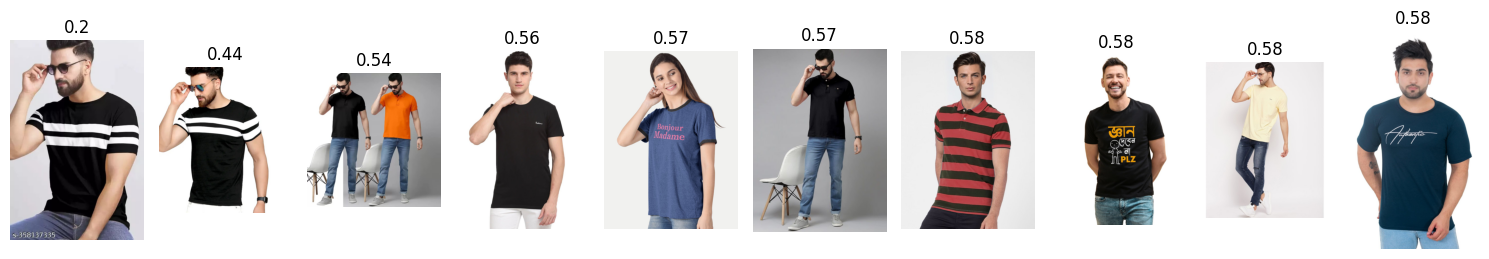

In [17]:
imgs = []
titles = []
for (index, distance) in zip(indices[0], distances[0]):
    response = requests.get(db[feature_list[index][0]].imageLinks[0])
    img = Image.open(BytesIO(response.content))
    imgs.append(img)
    titles.append(float("{:.2f}".format(distance)))
display_images(imgs,titles)